In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

In [2]:
import sys
import os

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

sys.path.append(parent_dir)

from config import input_columns, output_columns

print("Input columns:", input_columns)
print("Output columns:", output_columns)

Input columns: ['height', 'weight', 'gender', 'age', 'form']
Output columns: ['shoulder', 'sleeve', 'neck', 'chest', 'waist', 'stomach', 'hip', 'front_jacket', 'biceps', 'armhole', 'front_vest', 'back_length']


RAW DATA

In [3]:
df = pd.read_csv(Path(r"..\data\raw\dataset_measure.csv").resolve())

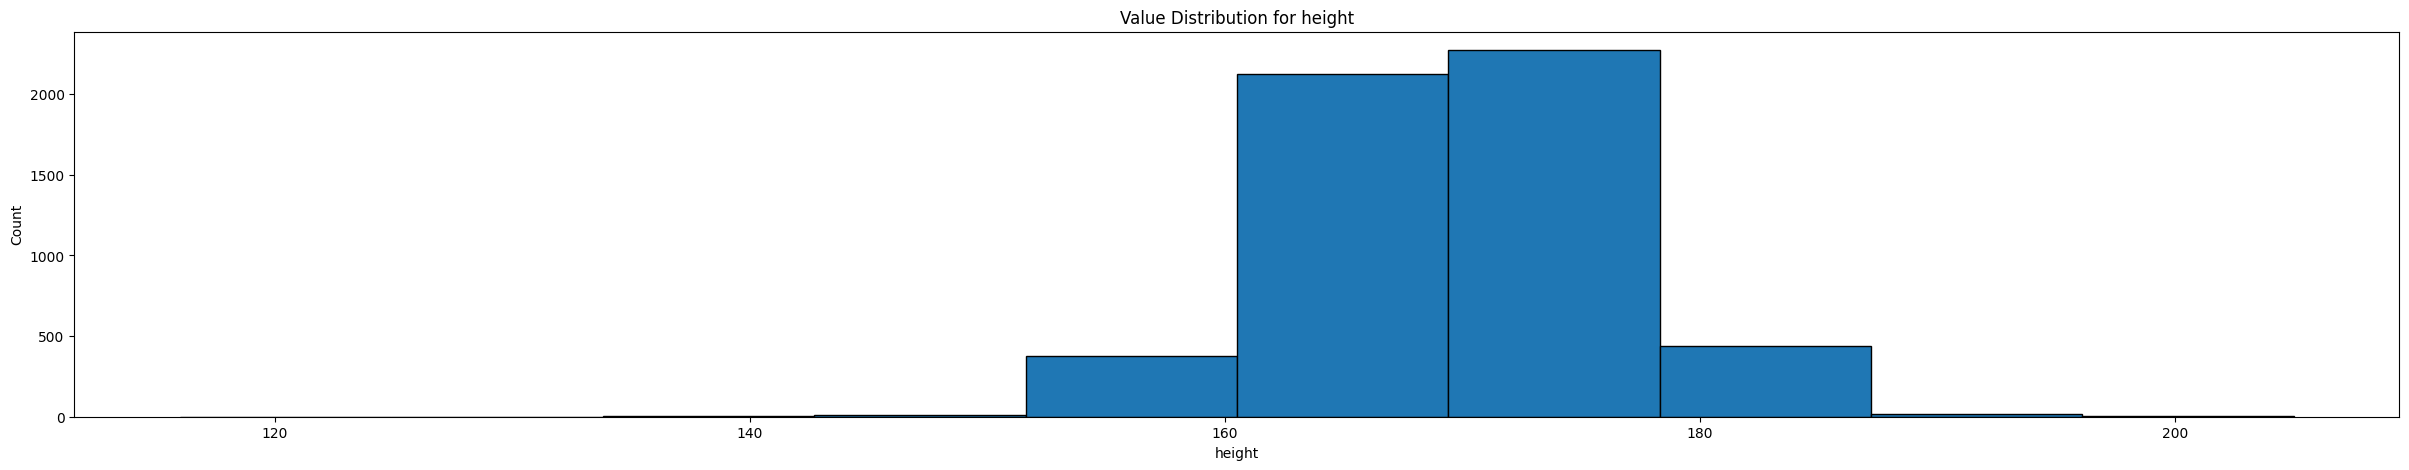

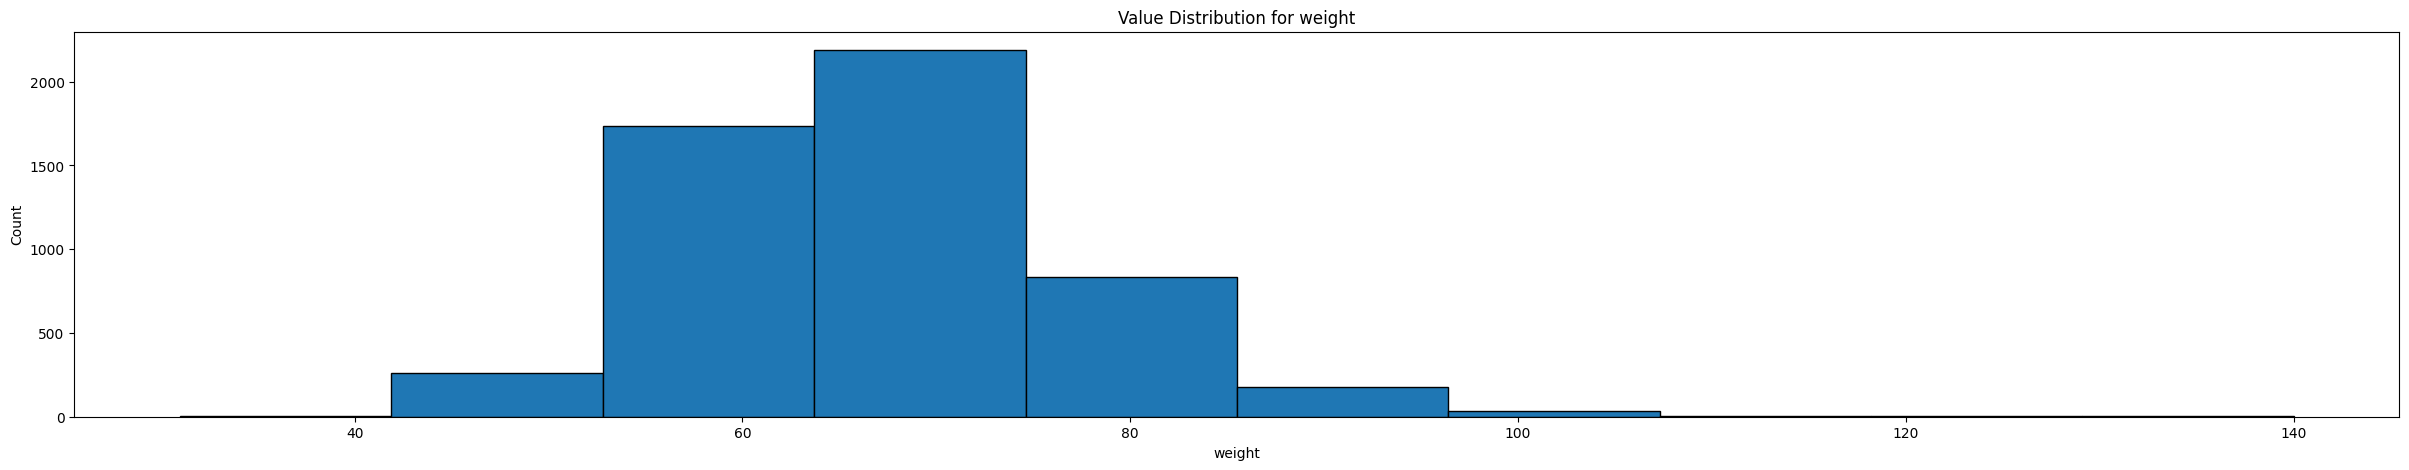

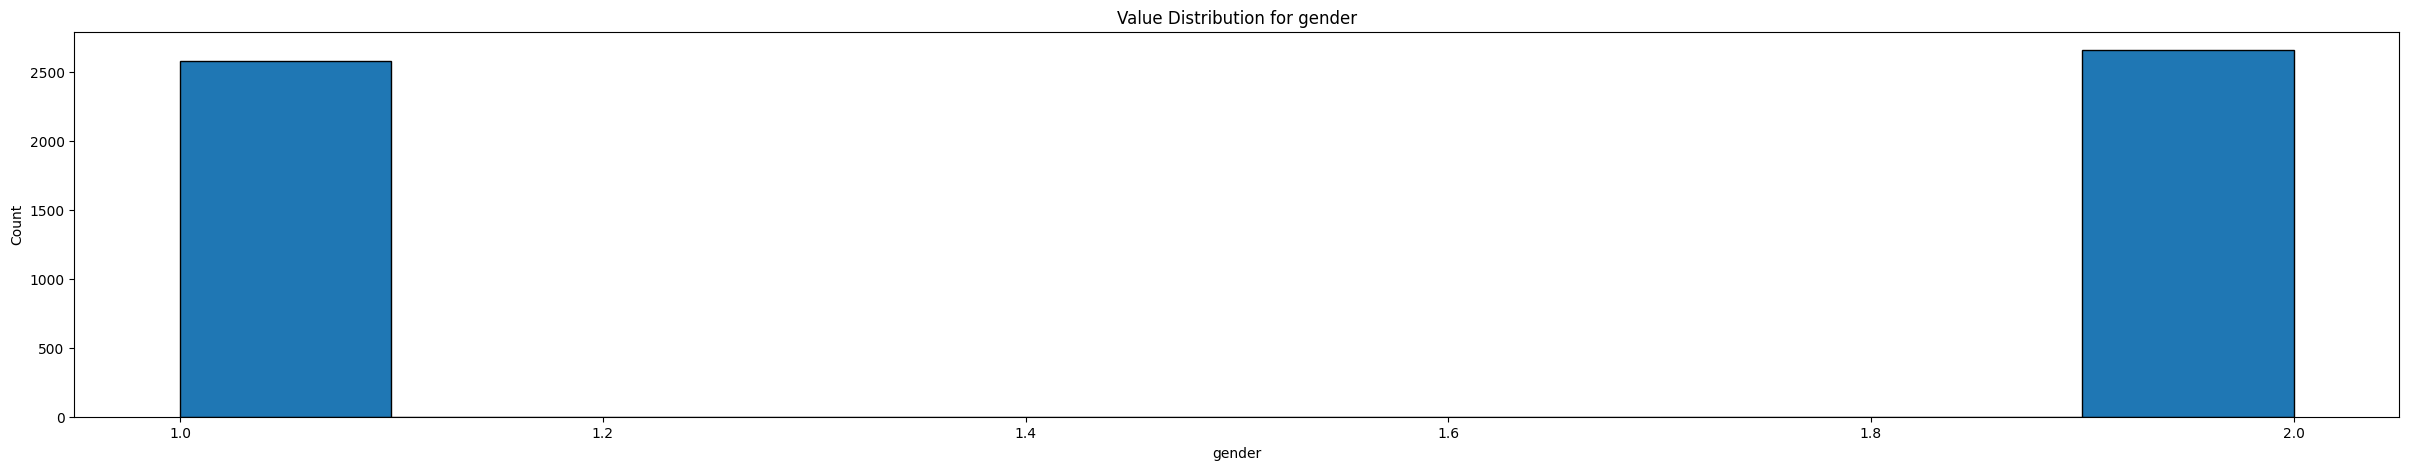

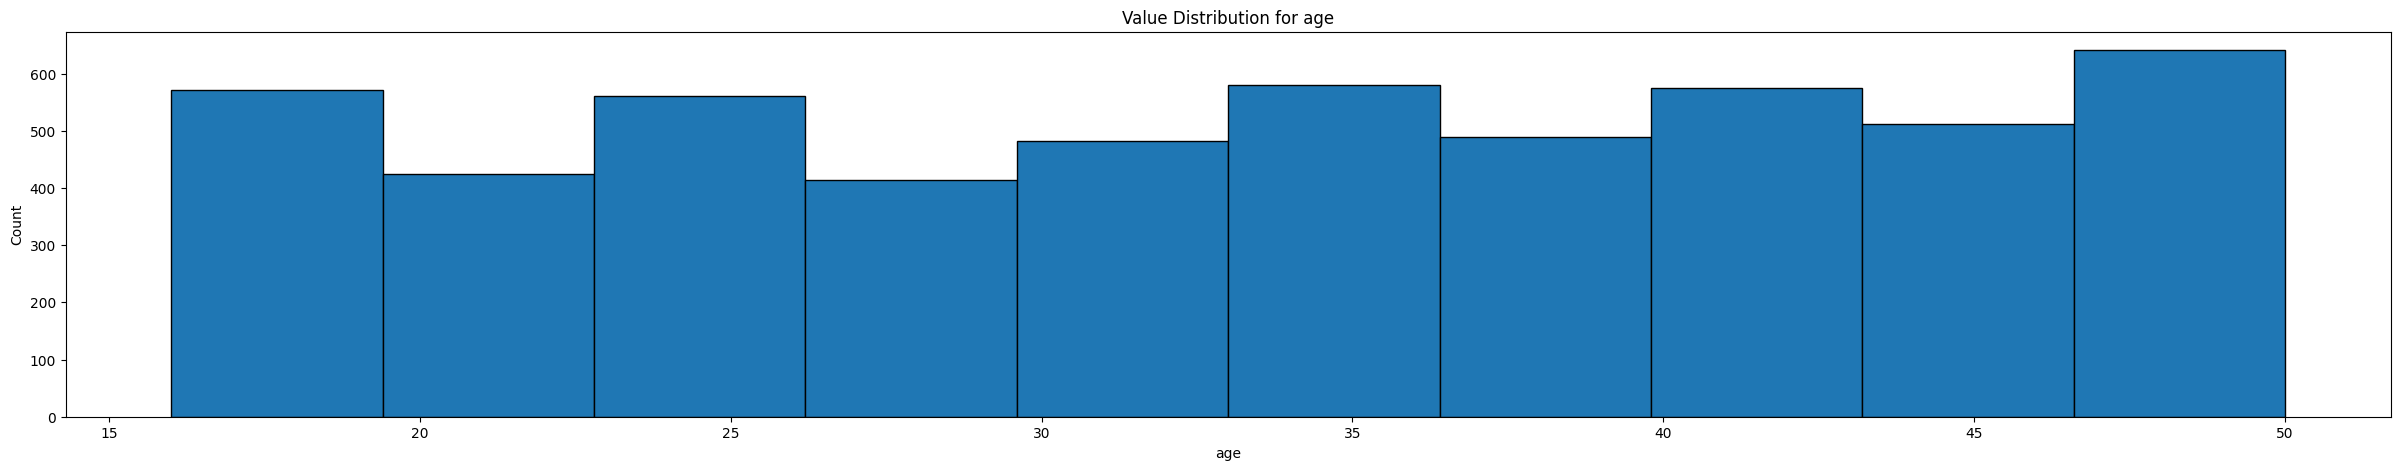

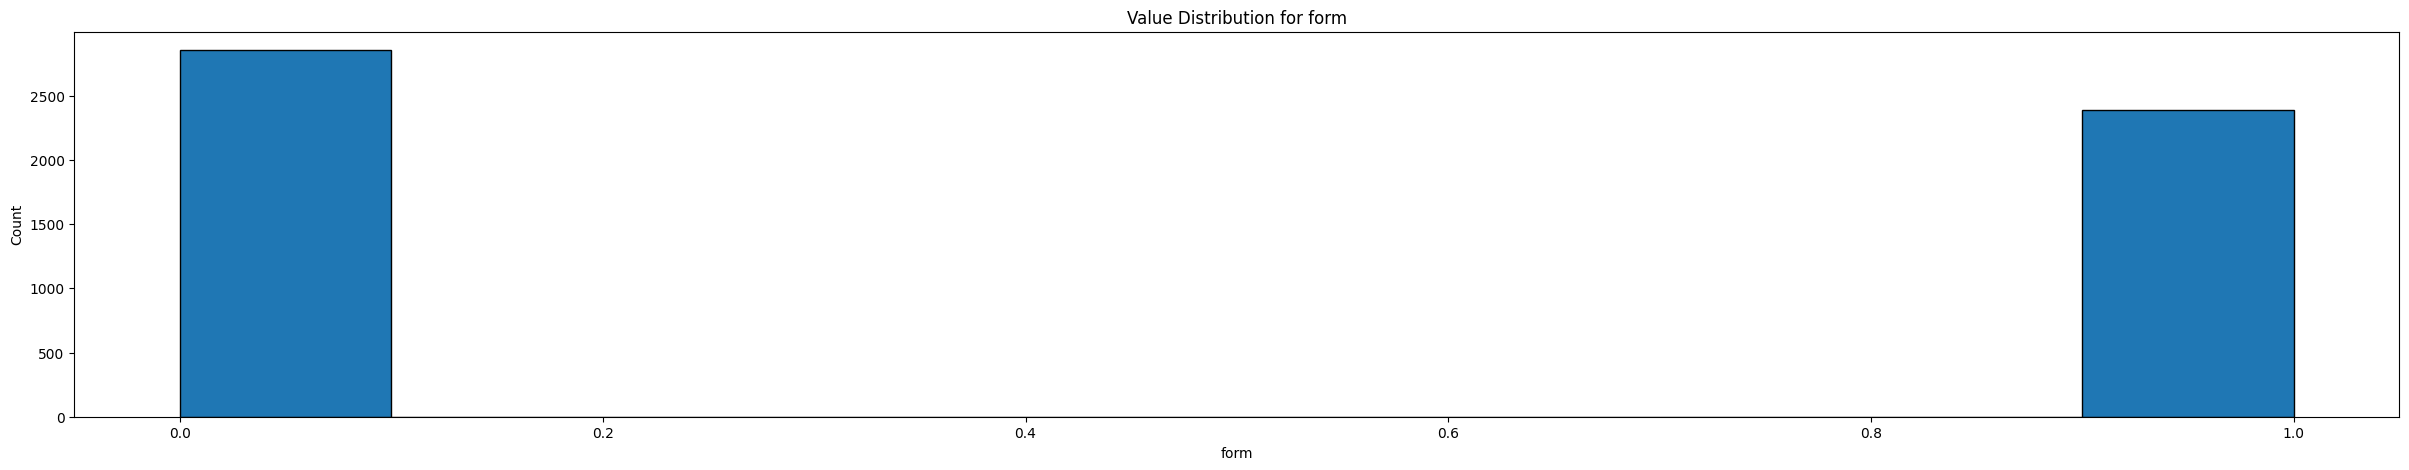

In [4]:
labels = input_columns

# Vẽ histogram cho từng cột
for label in labels:
    fig, ax = plt.subplots(figsize=(30, 5))

    # Vẽ histogram
    ax.hist(df[label].dropna(), bins=10, edgecolor='k')
    ax.set_xlabel(label)
    ax.set_ylabel('Count')
    ax.set_title('Value Distribution for ' + label)

    # Hiển thị biểu đồ
    plt.show()

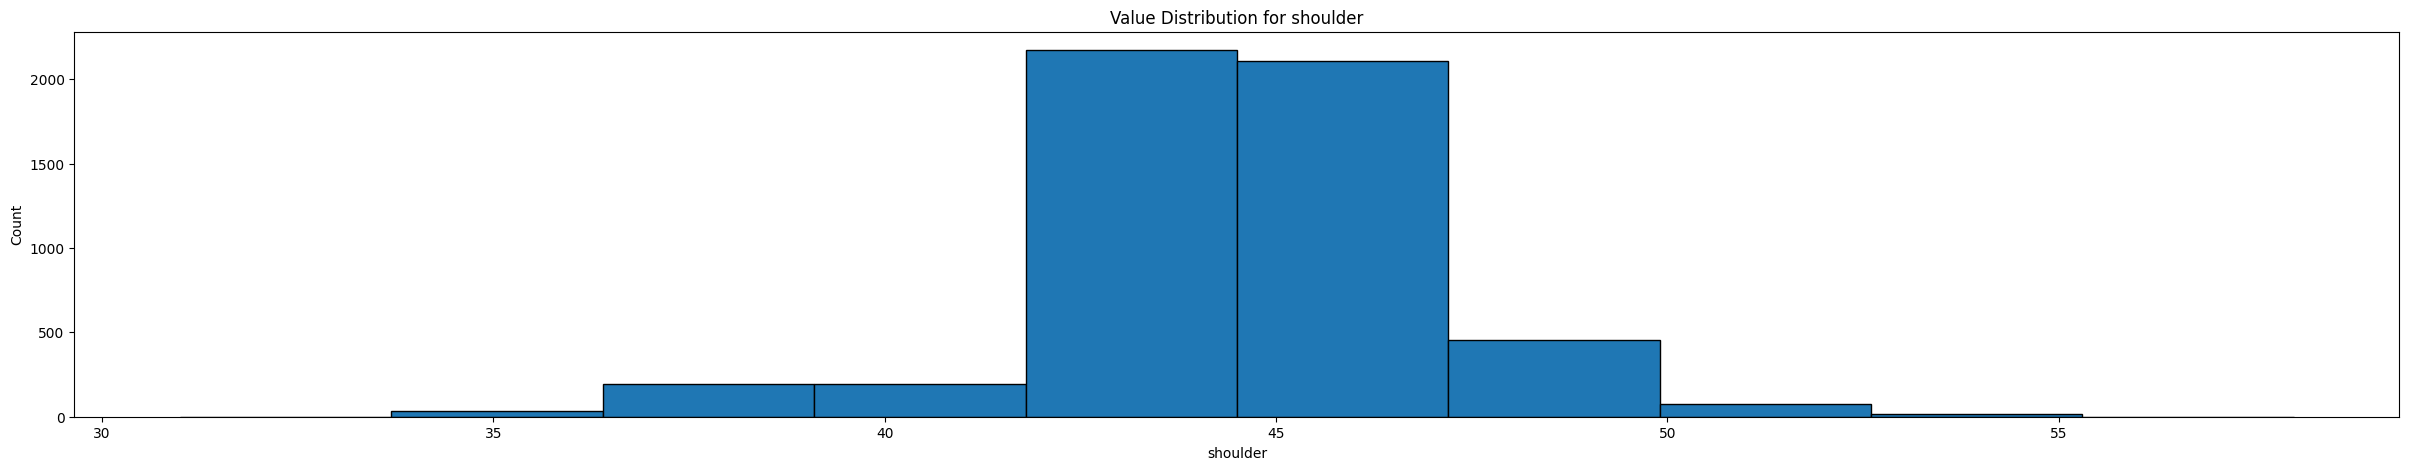

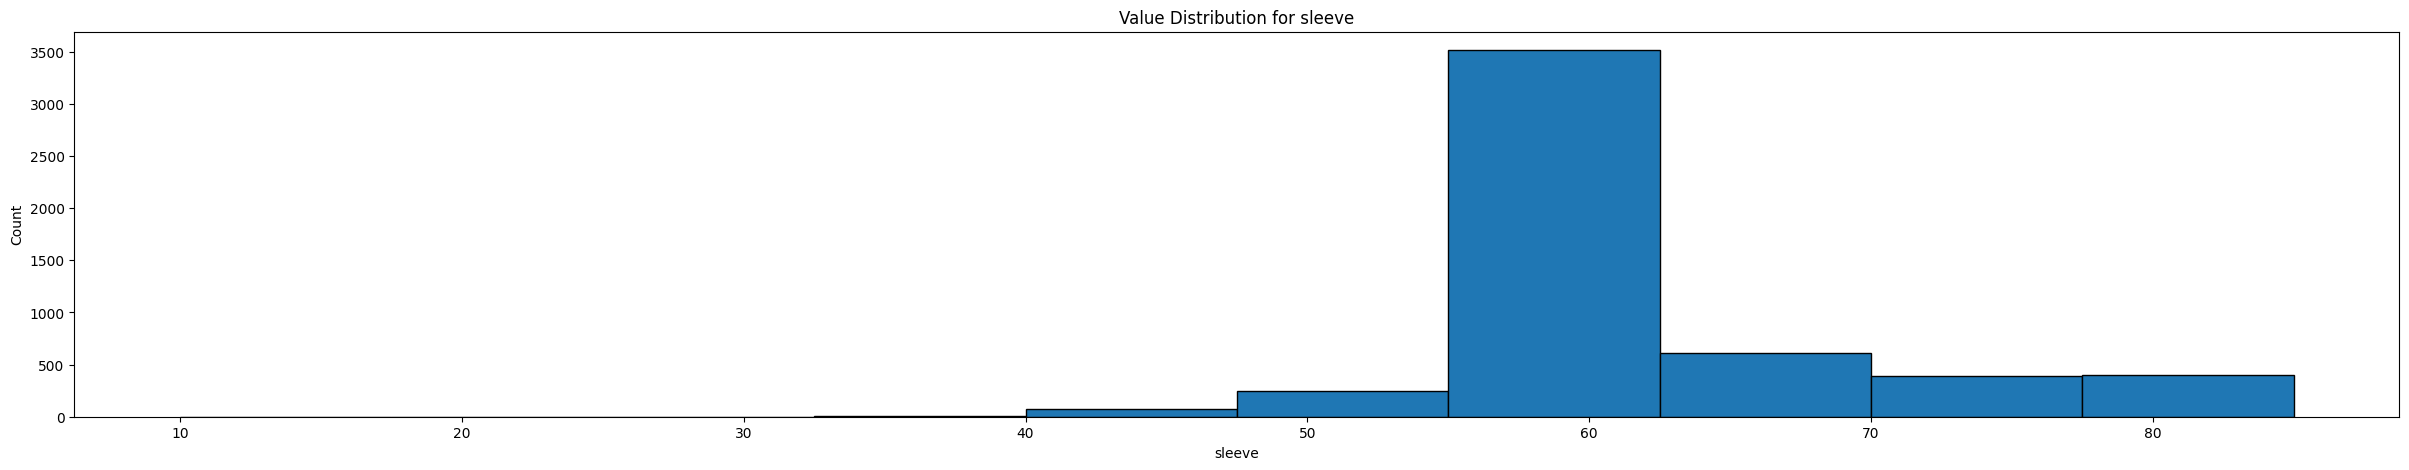

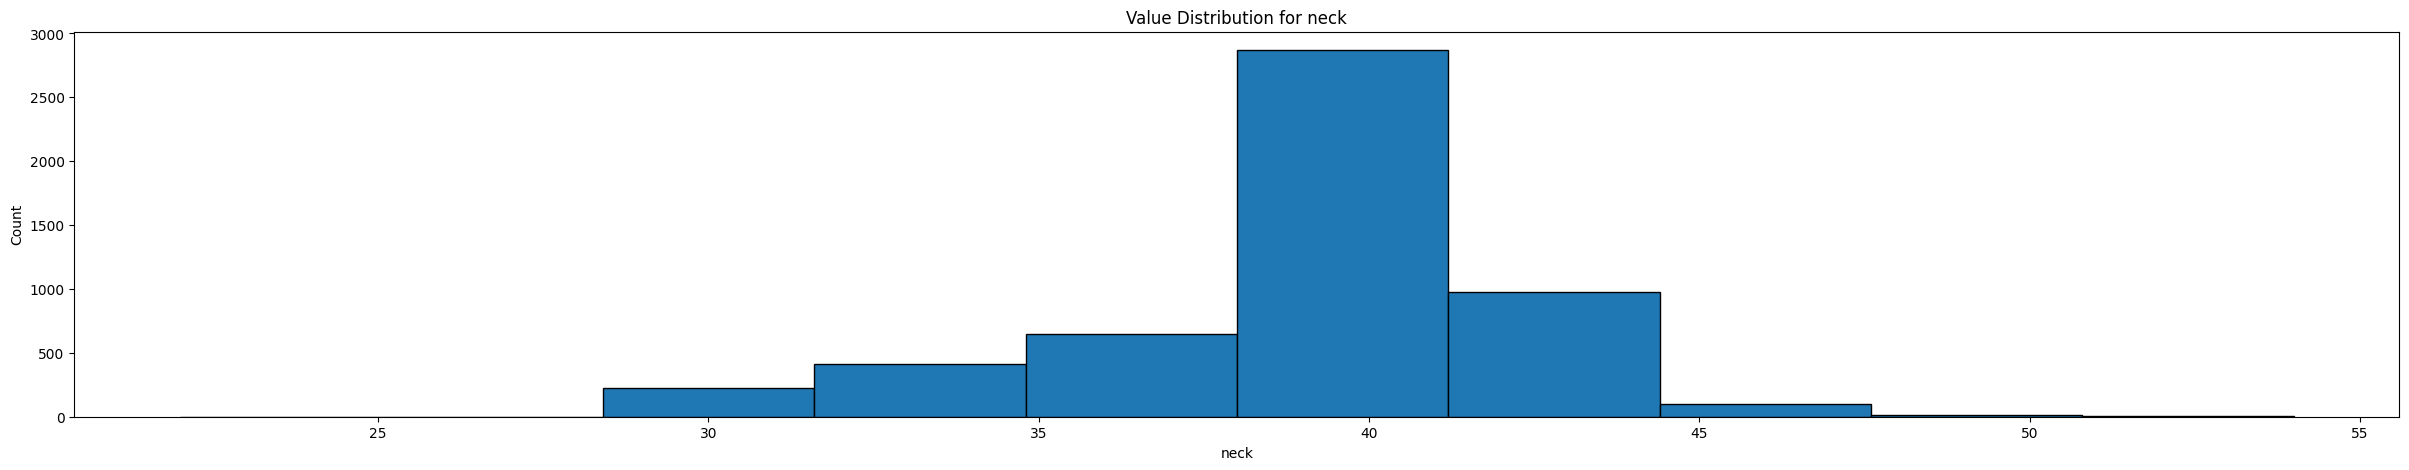

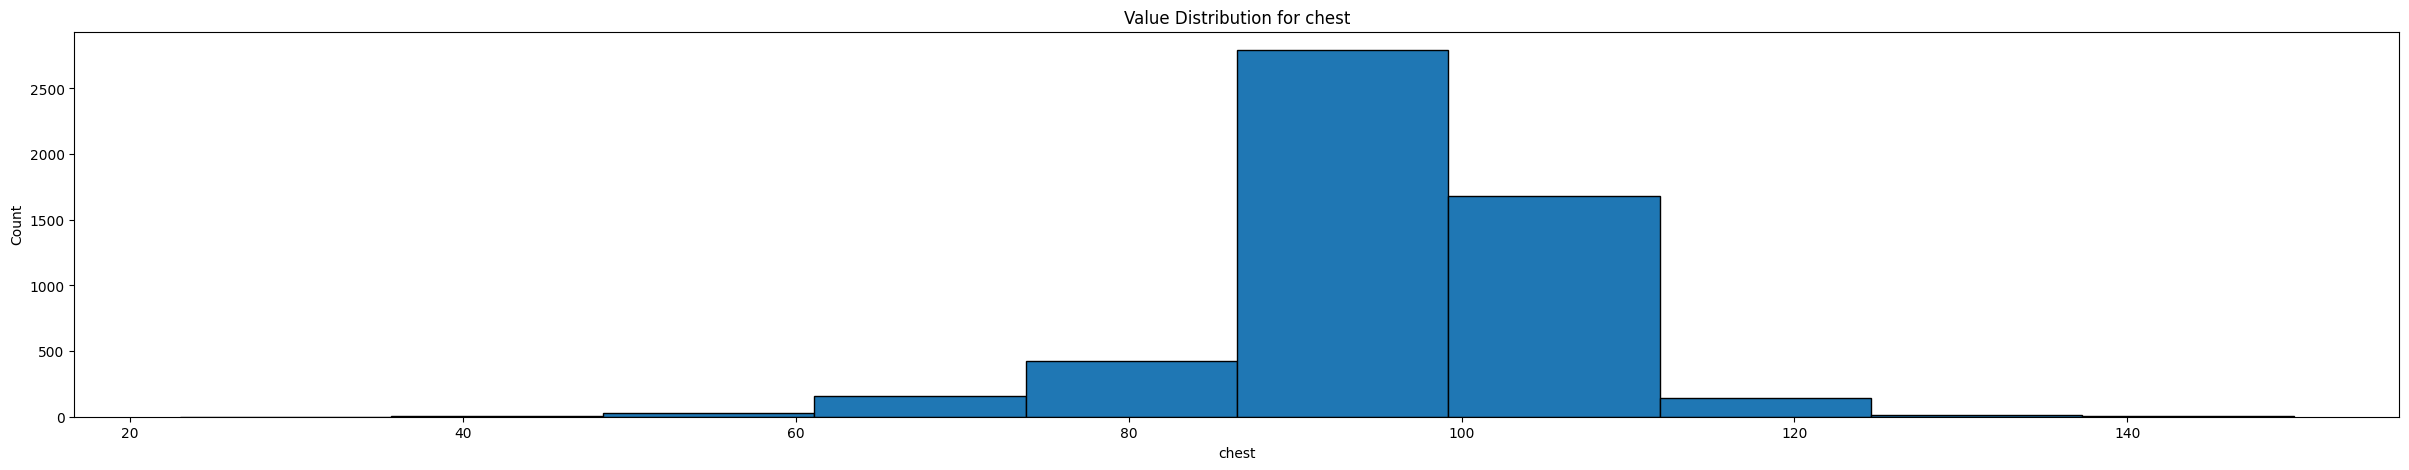

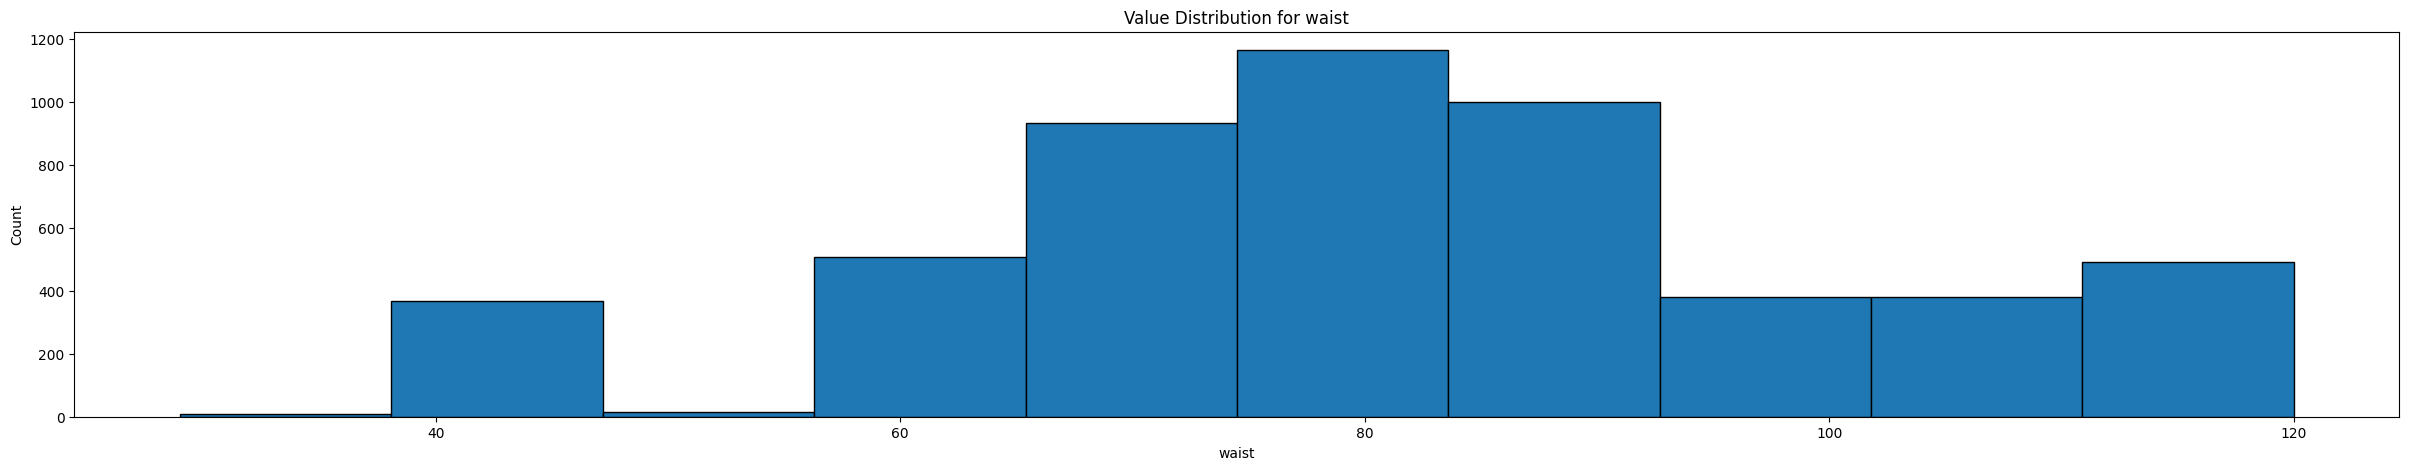

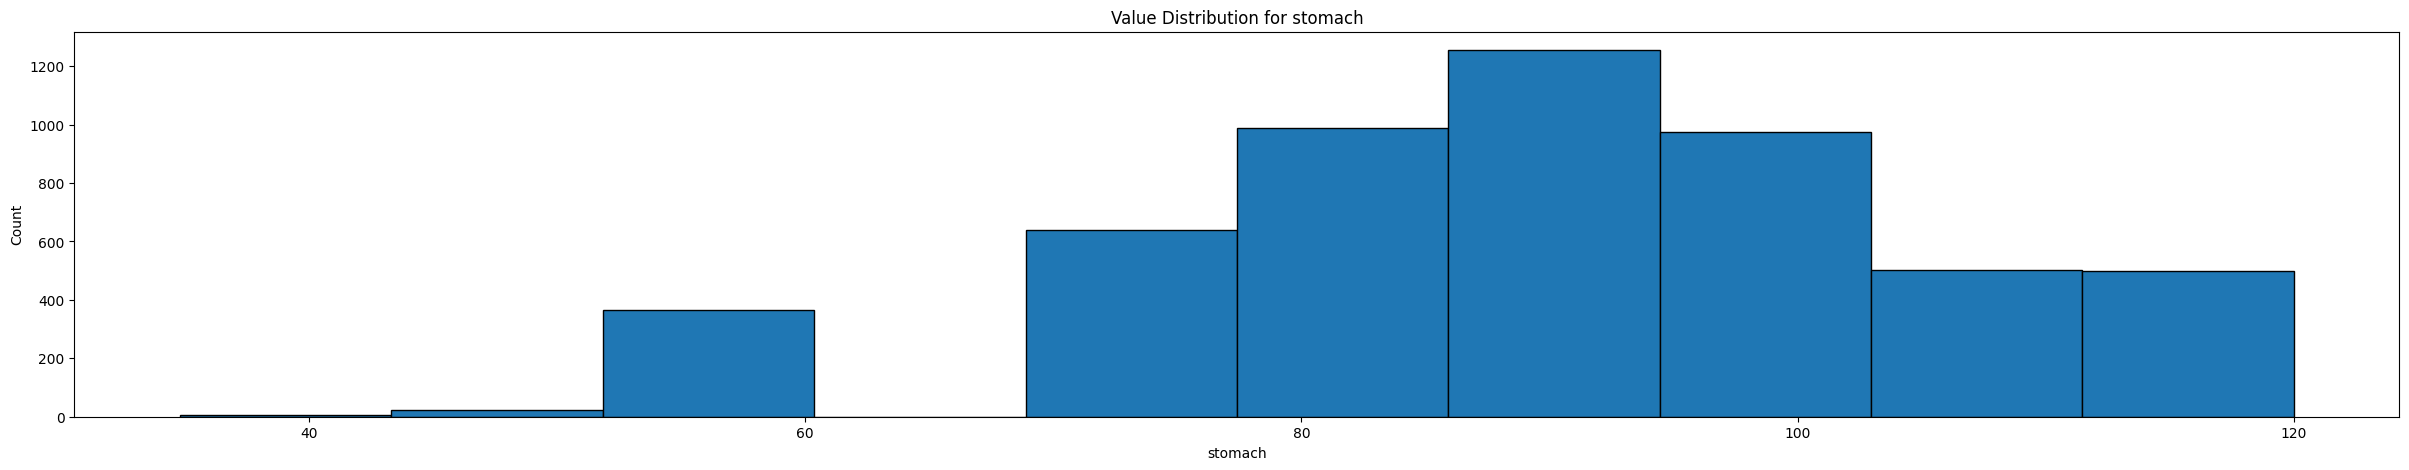

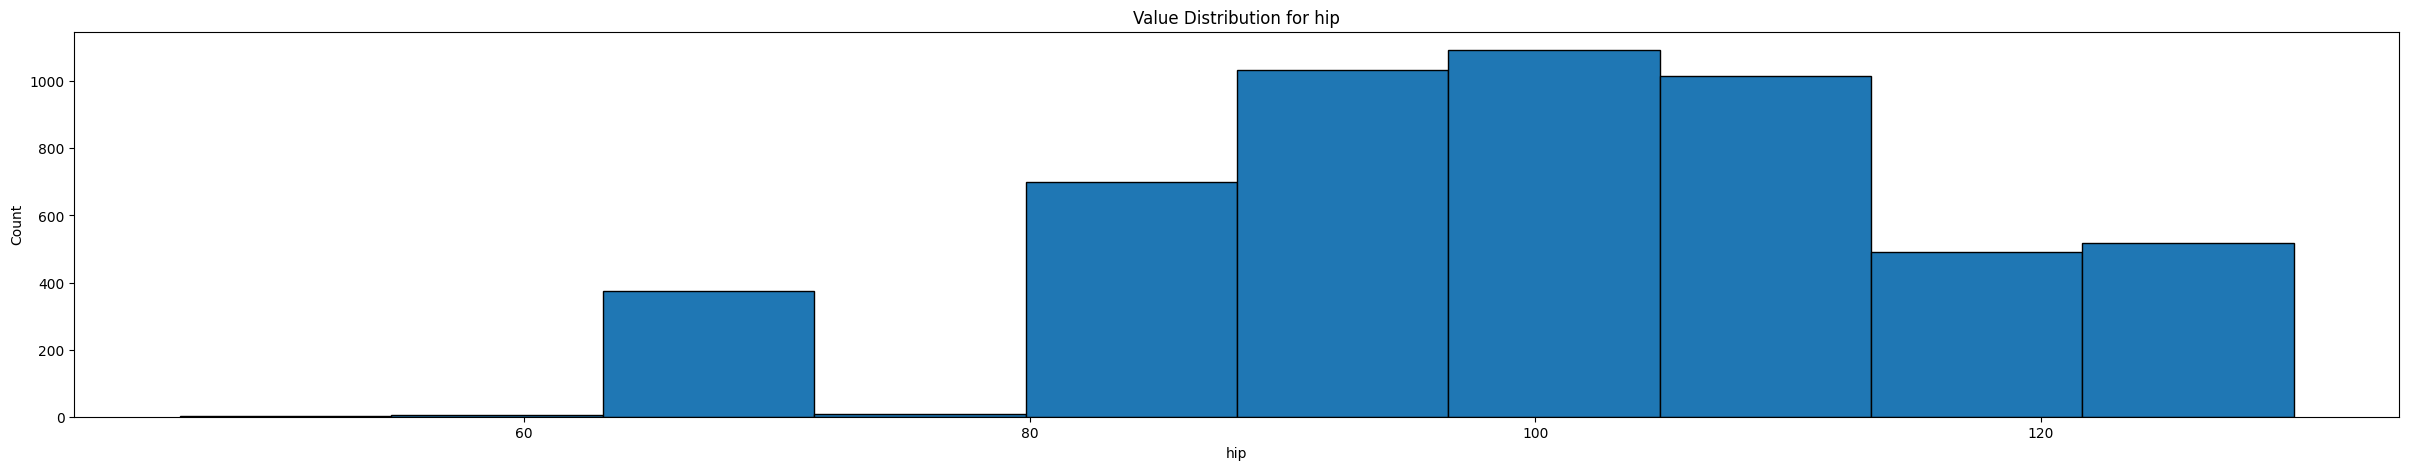

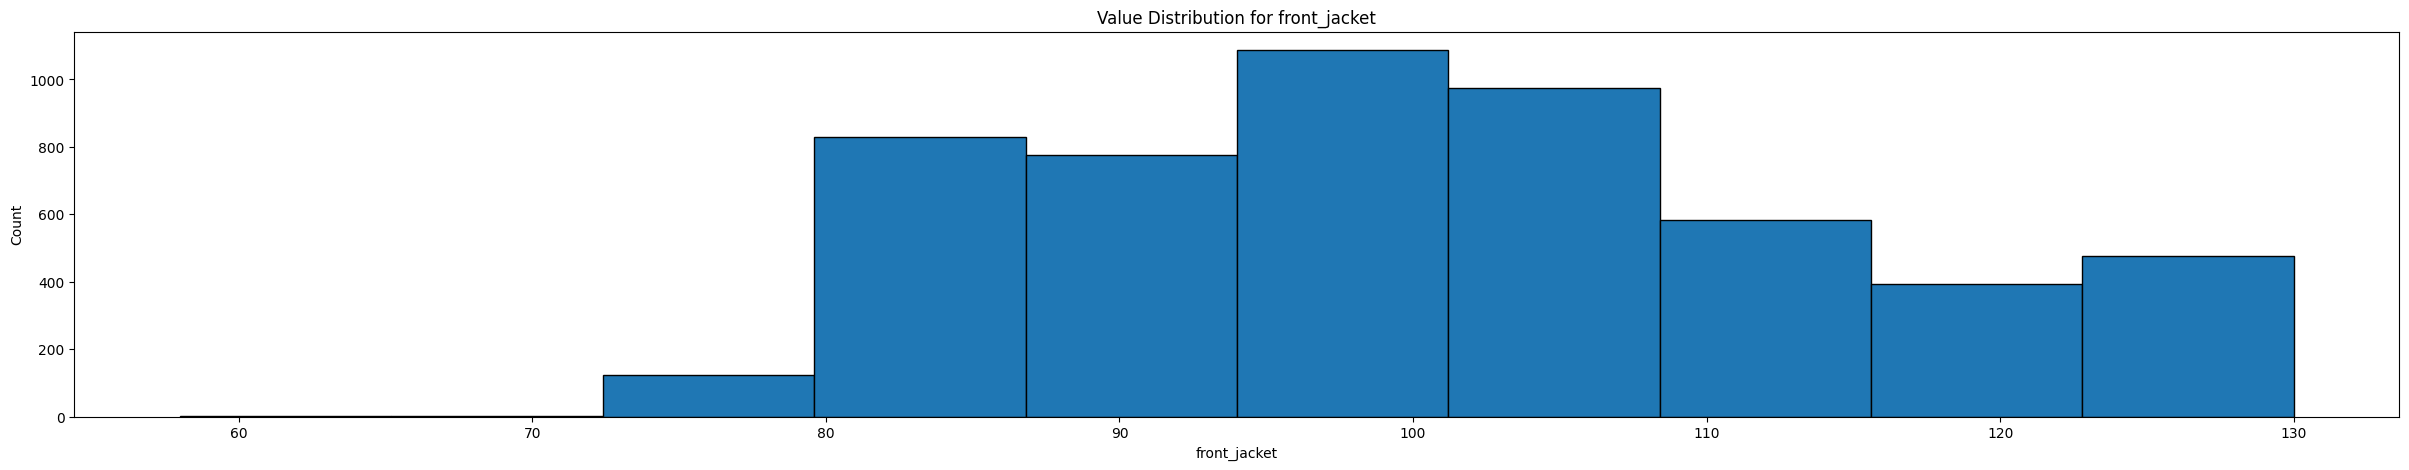

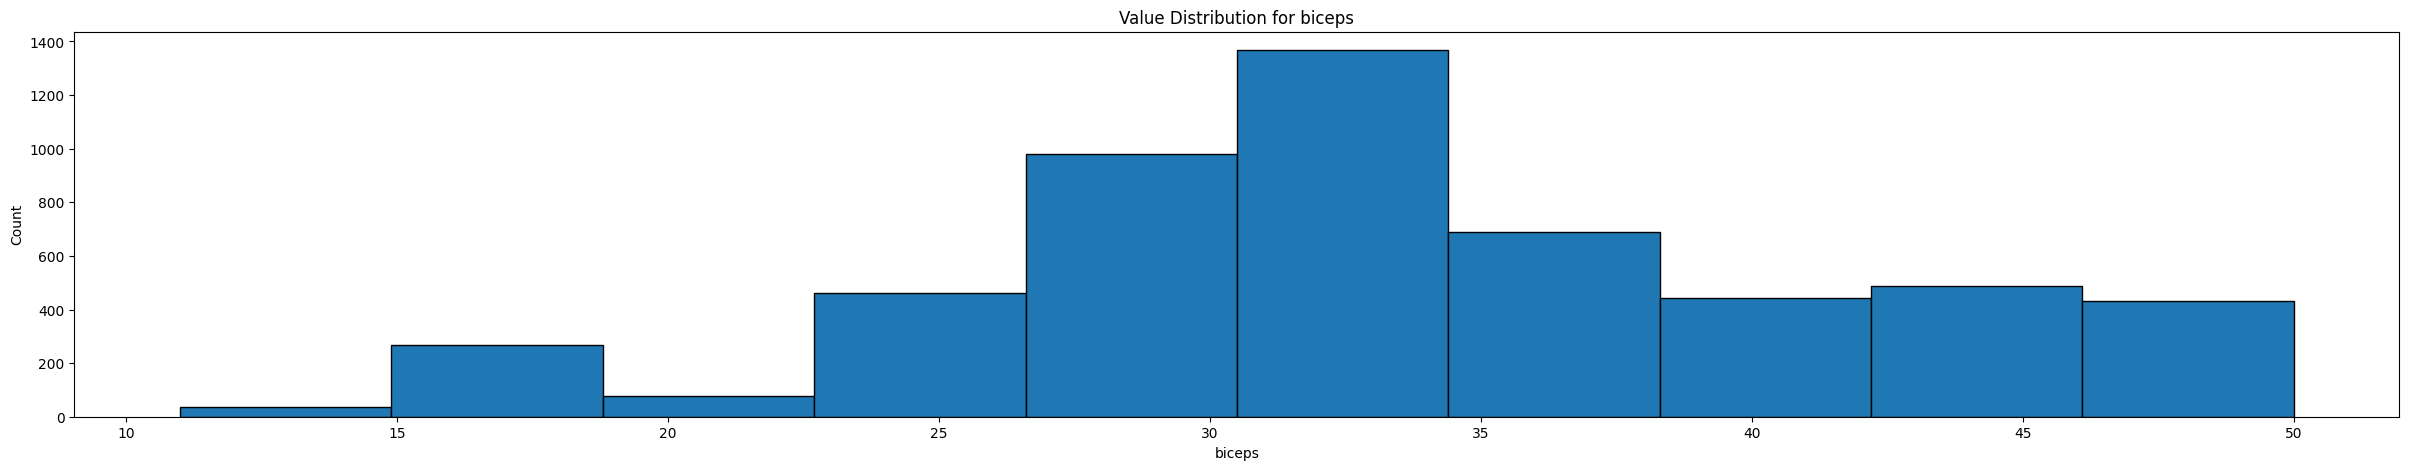

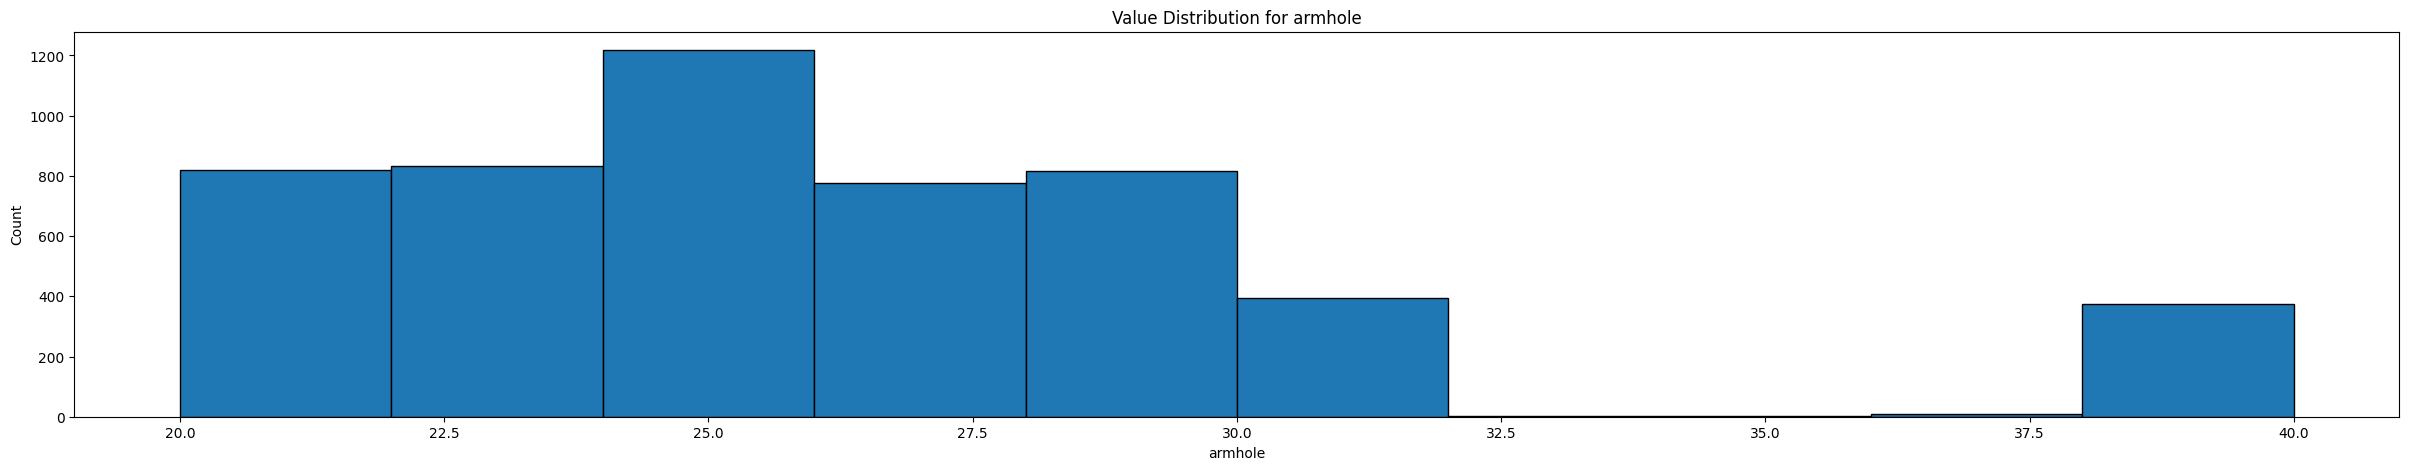

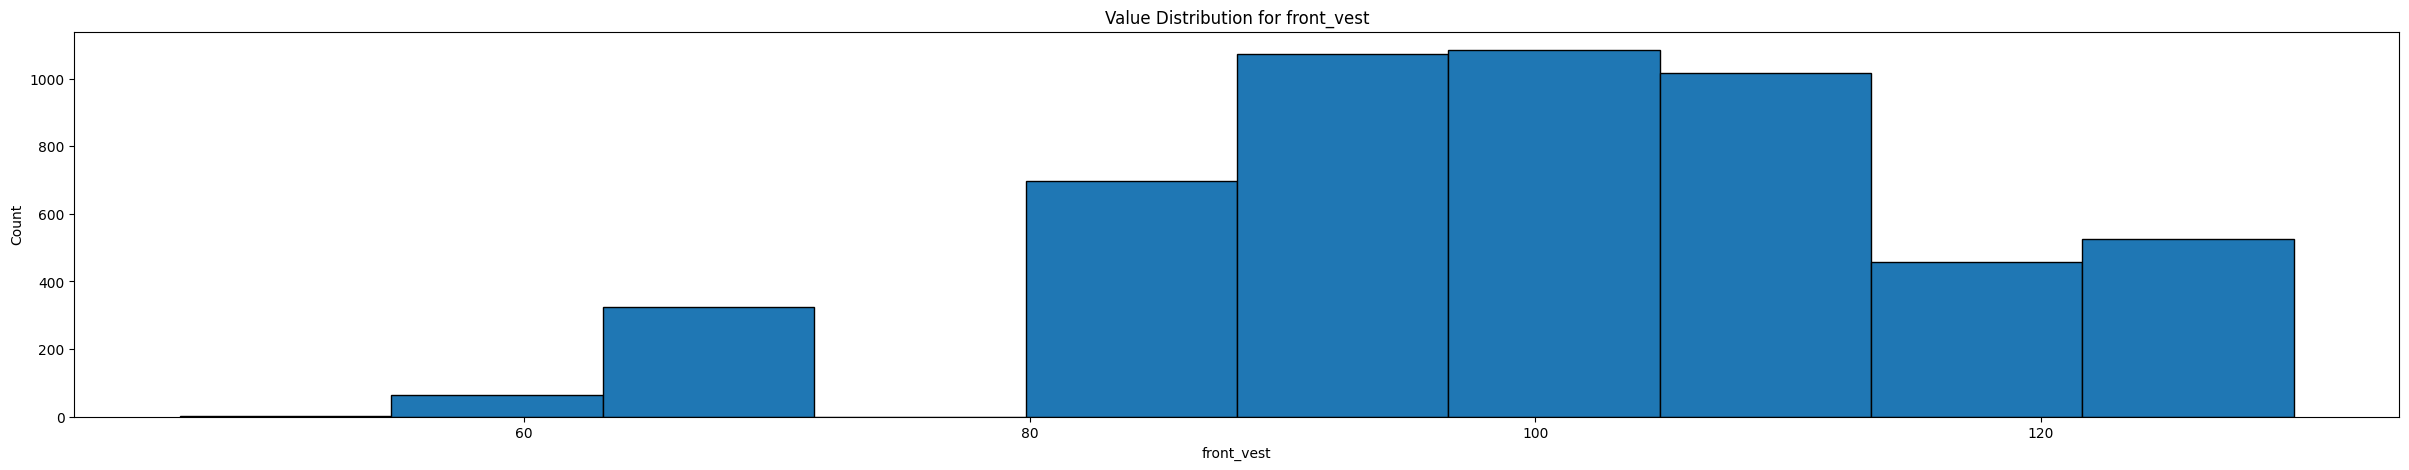

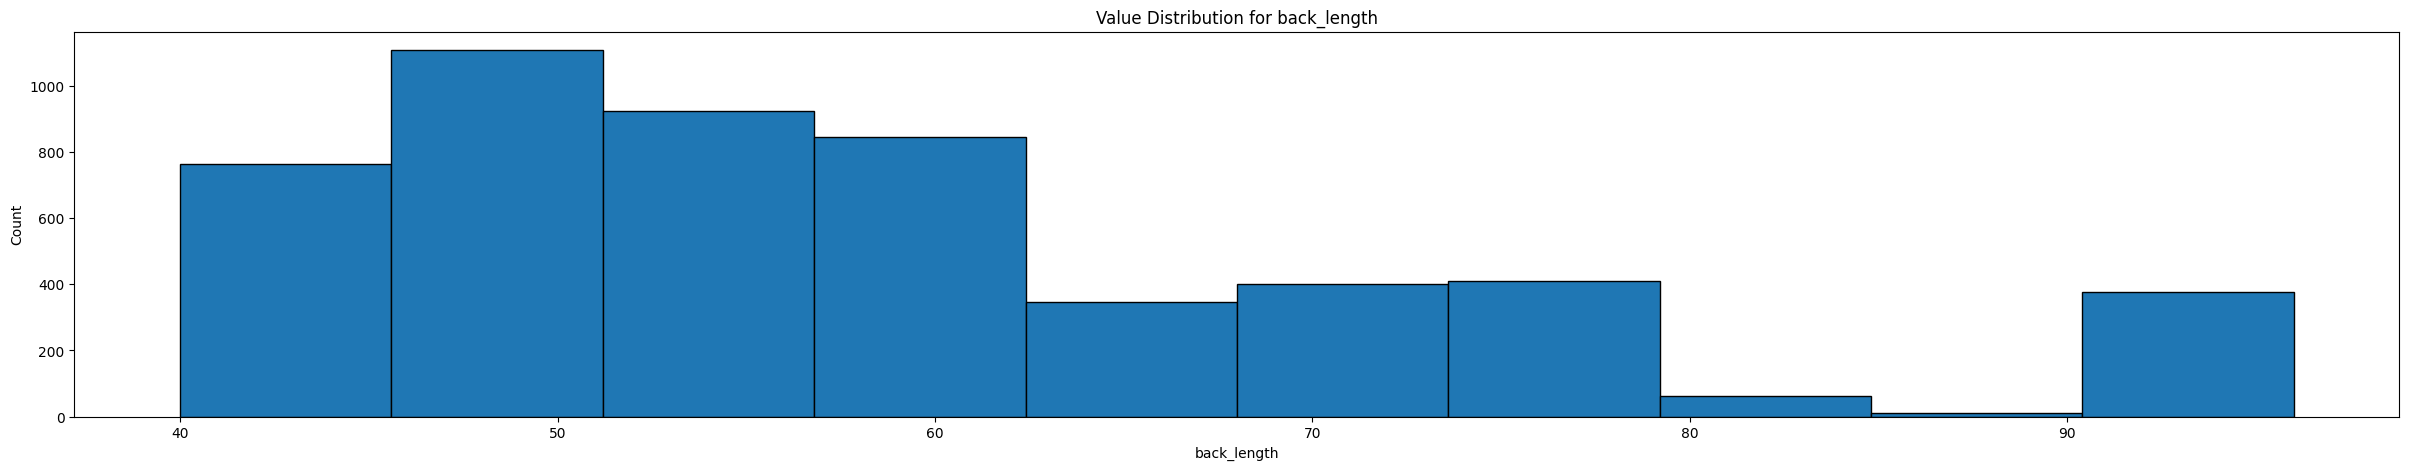

In [5]:
labels = output_columns

# Vẽ histogram cho từng cột
for label in labels:
    fig, ax = plt.subplots(figsize=(30, 5))

    # Vẽ histogram
    ax.hist(df[label].dropna(), bins=10, edgecolor='k')
    ax.set_xlabel(label)
    ax.set_ylabel('Count')
    ax.set_title('Value Distribution for ' + label)

    # Hiển thị biểu đồ
    plt.show()

PROCESSED DATA

In [6]:
df = pd.read_csv(Path(r"..\data\processed\dataset_measure.csv").resolve())

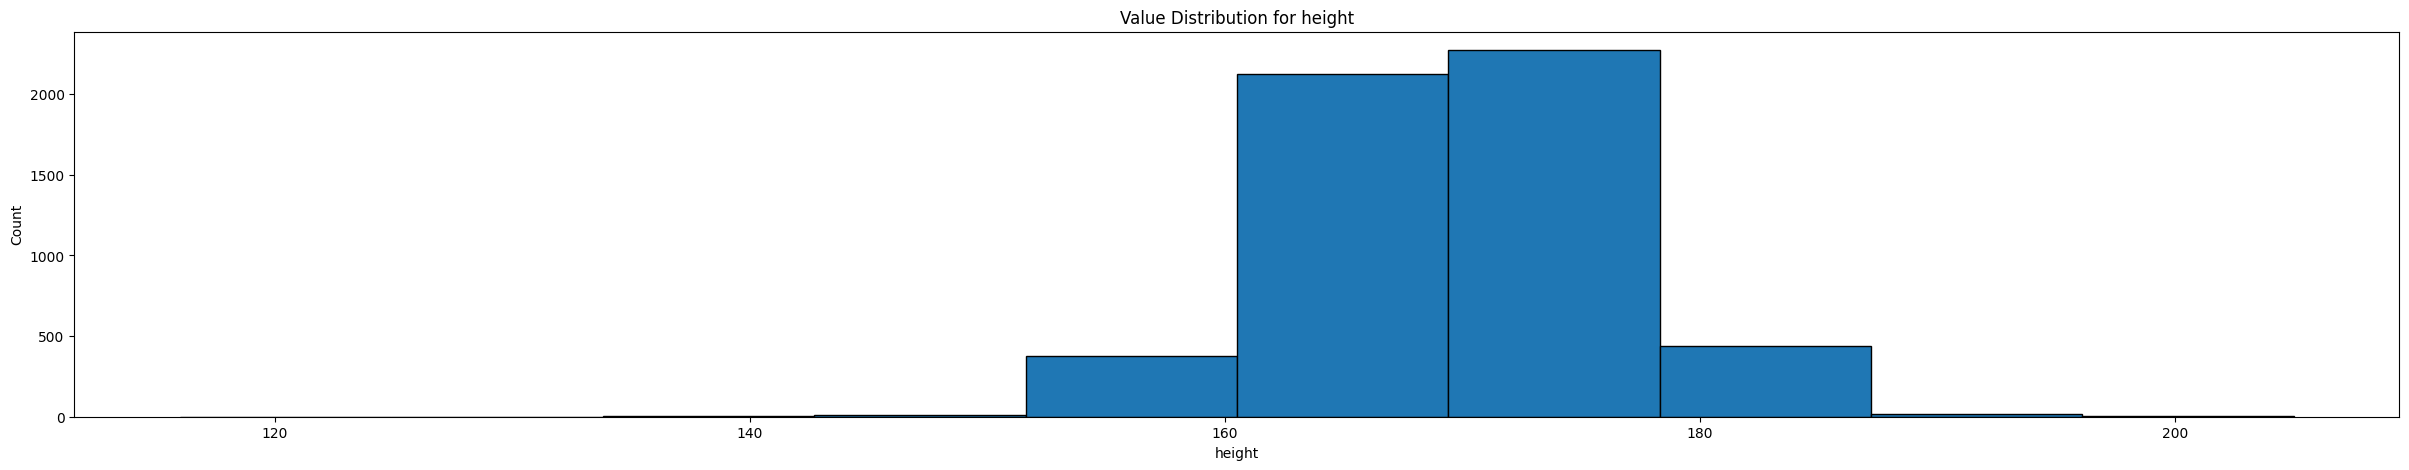

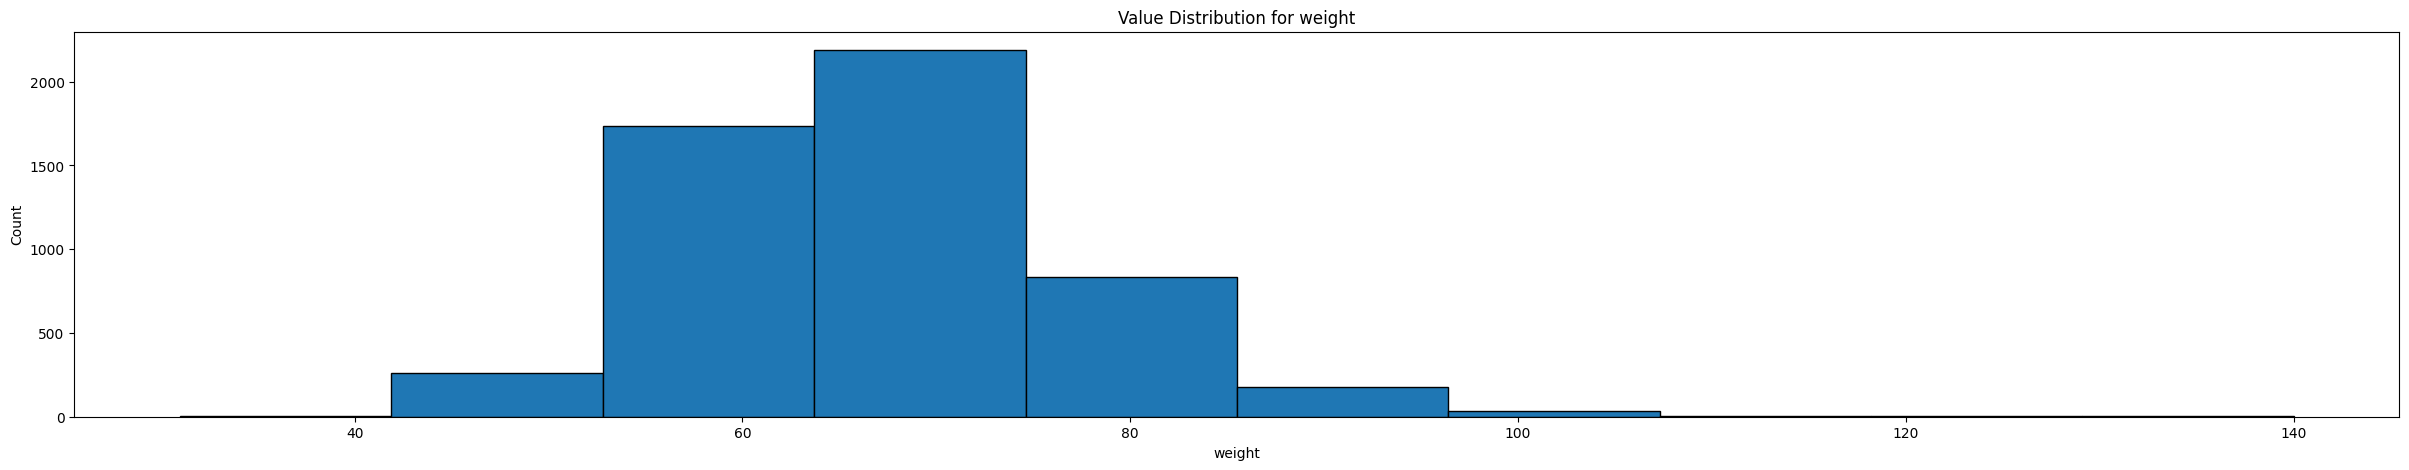

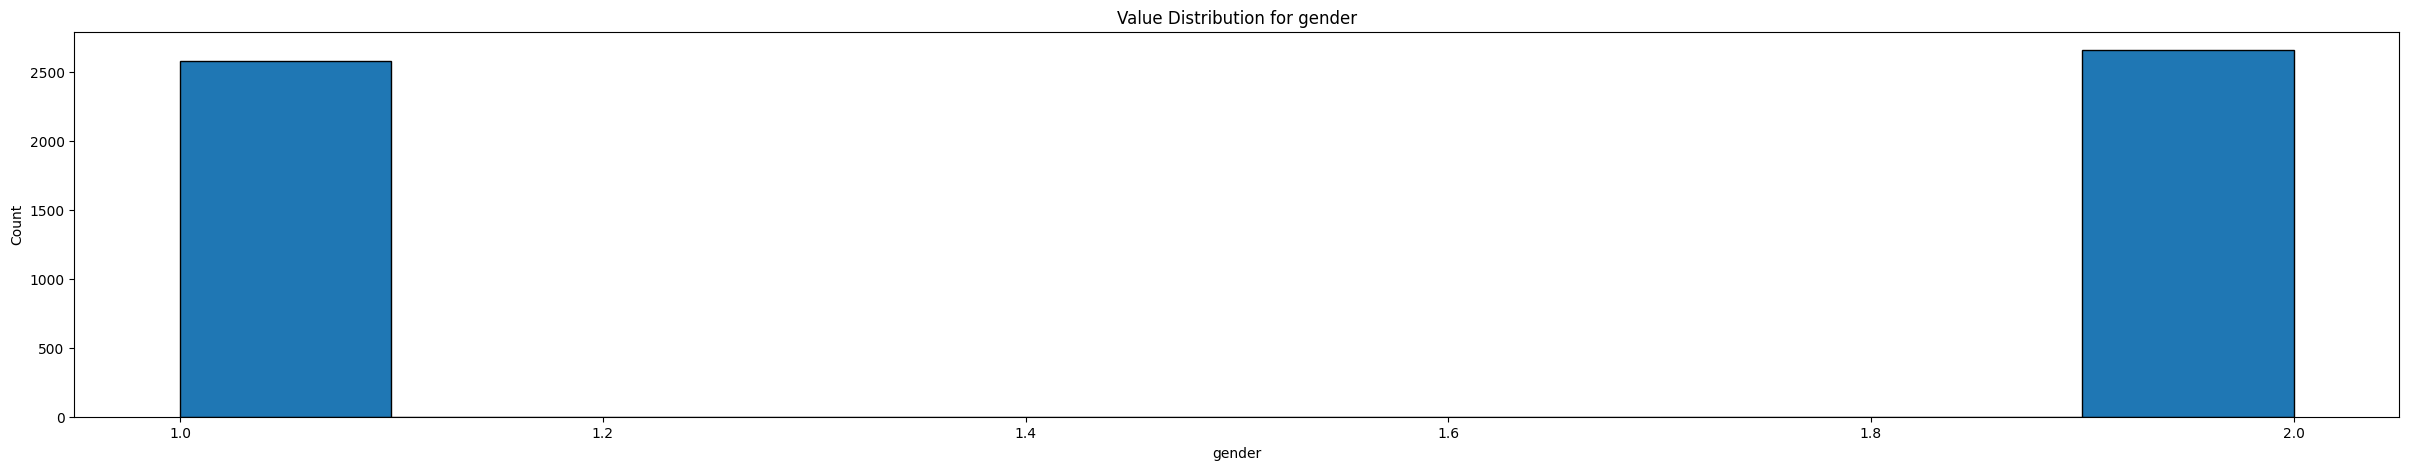

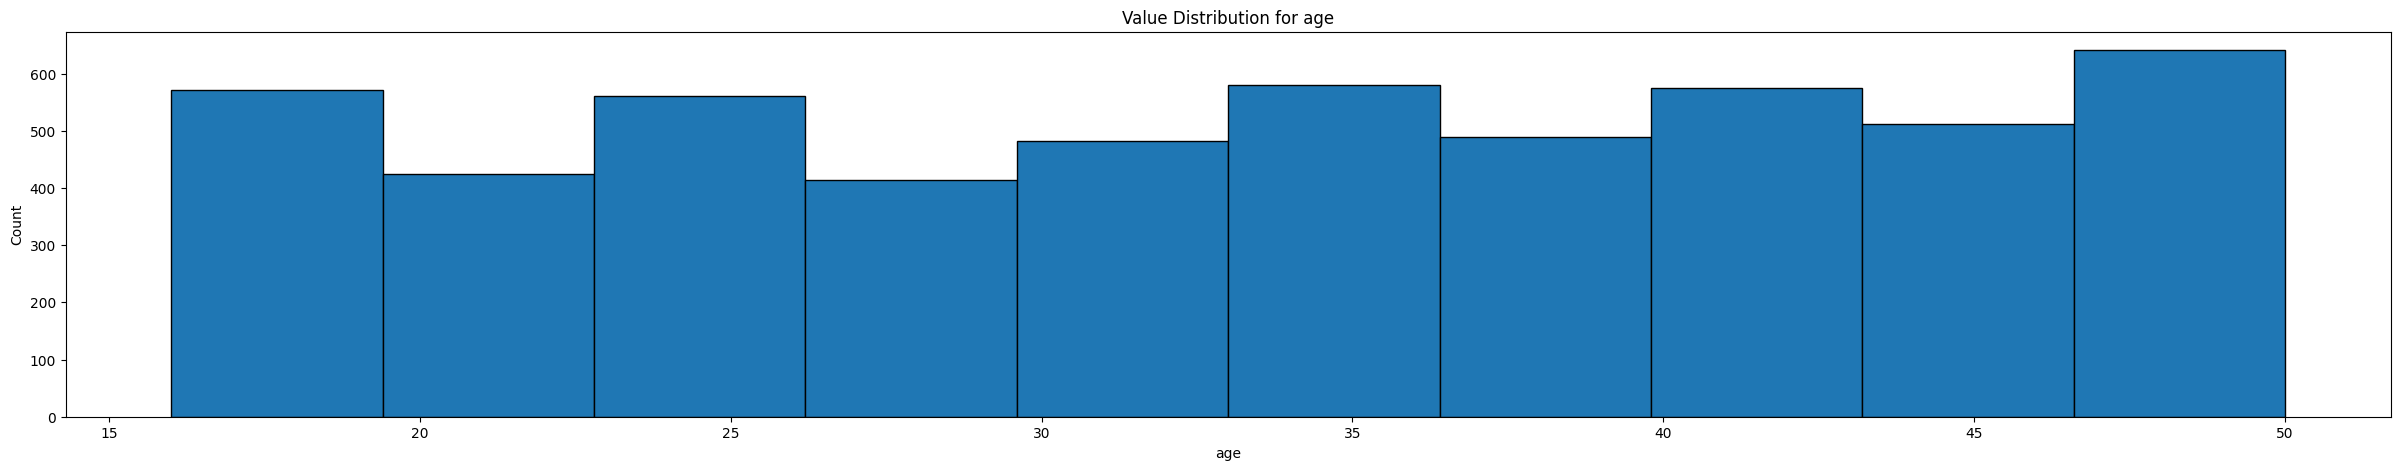

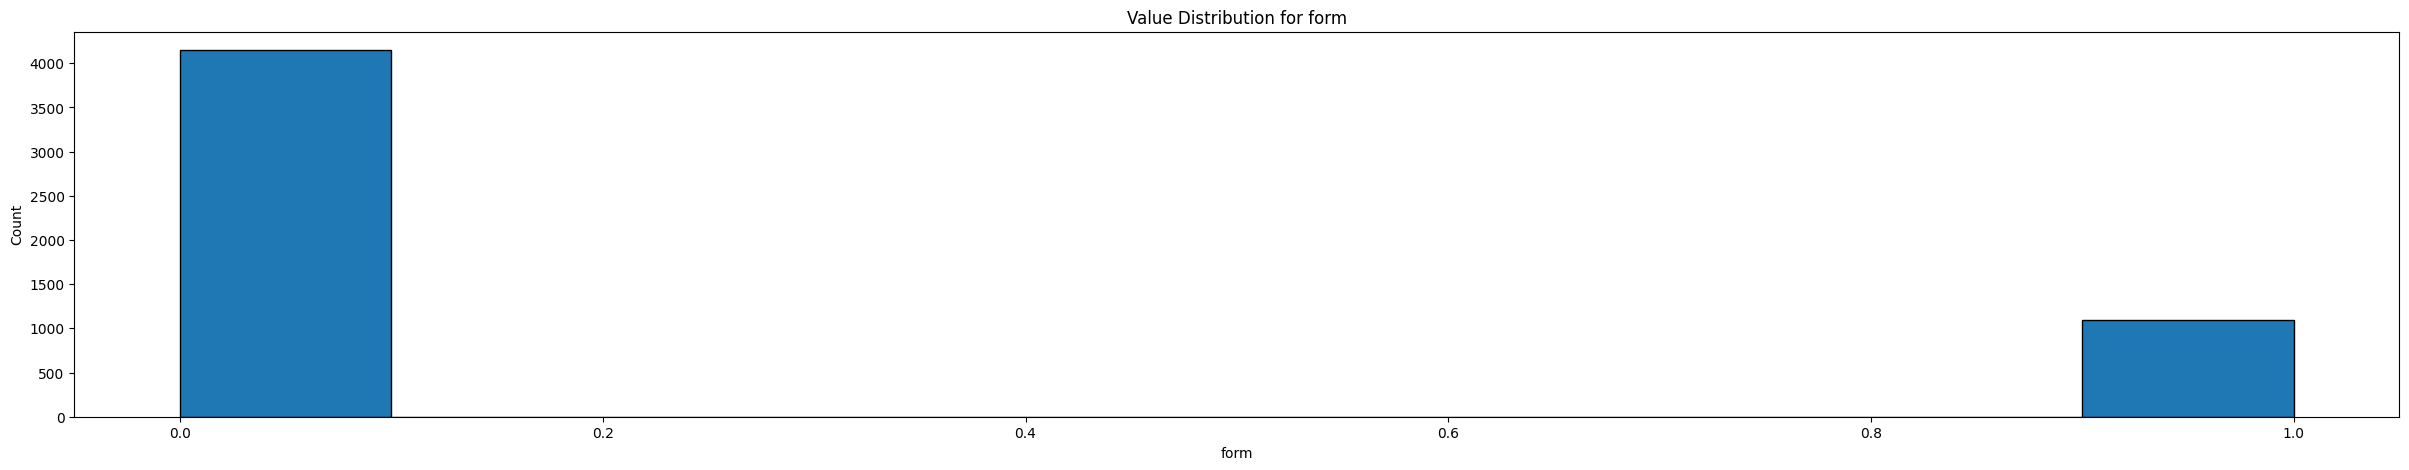

In [7]:
labels = input_columns

# Vẽ histogram cho từng cột
for label in labels:
    fig, ax = plt.subplots(figsize=(30, 5))

    # Vẽ histogram
    ax.hist(df[label].dropna(), bins=10, edgecolor='k')
    ax.set_xlabel(label)
    ax.set_ylabel('Count')
    ax.set_title('Value Distribution for ' + label)

    # Hiển thị biểu đồ
    plt.show()

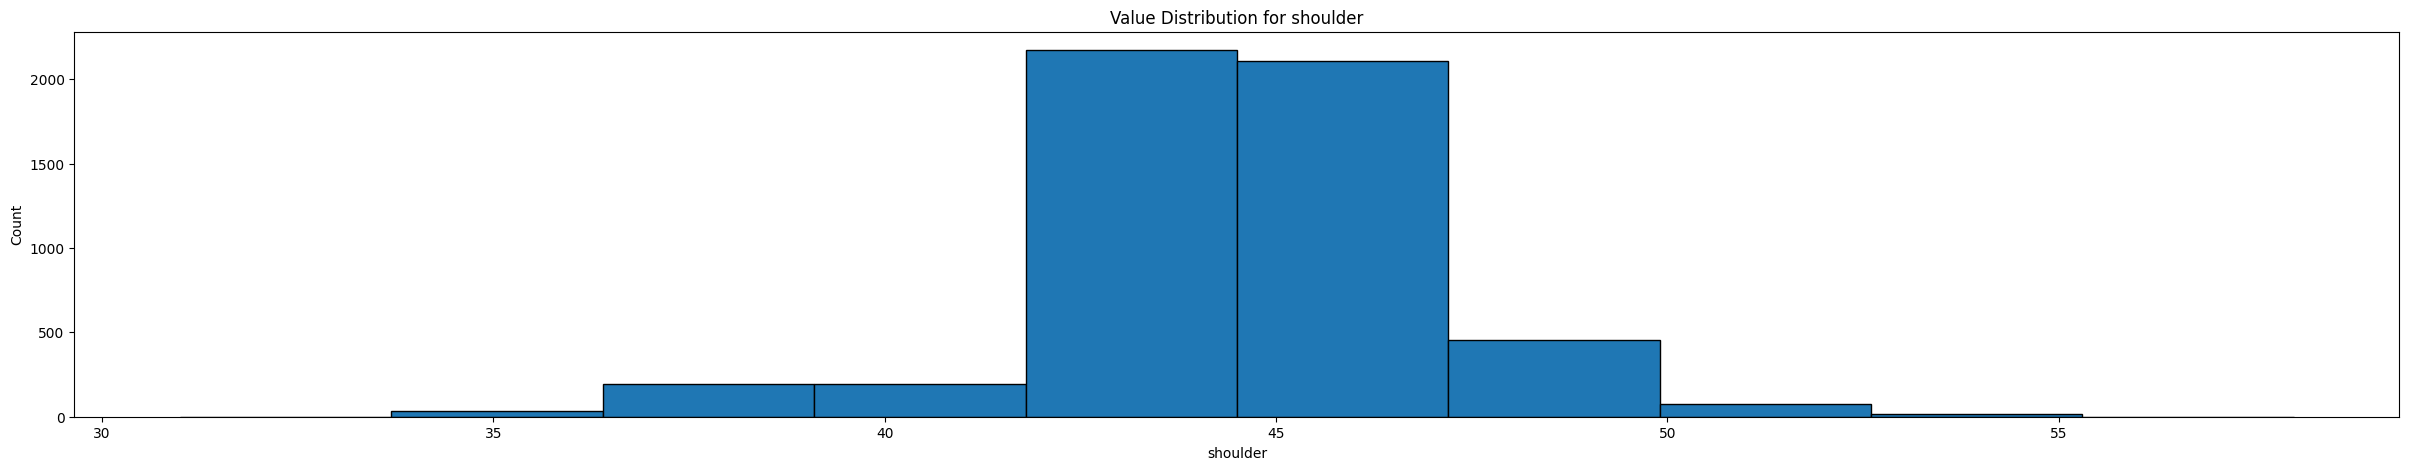

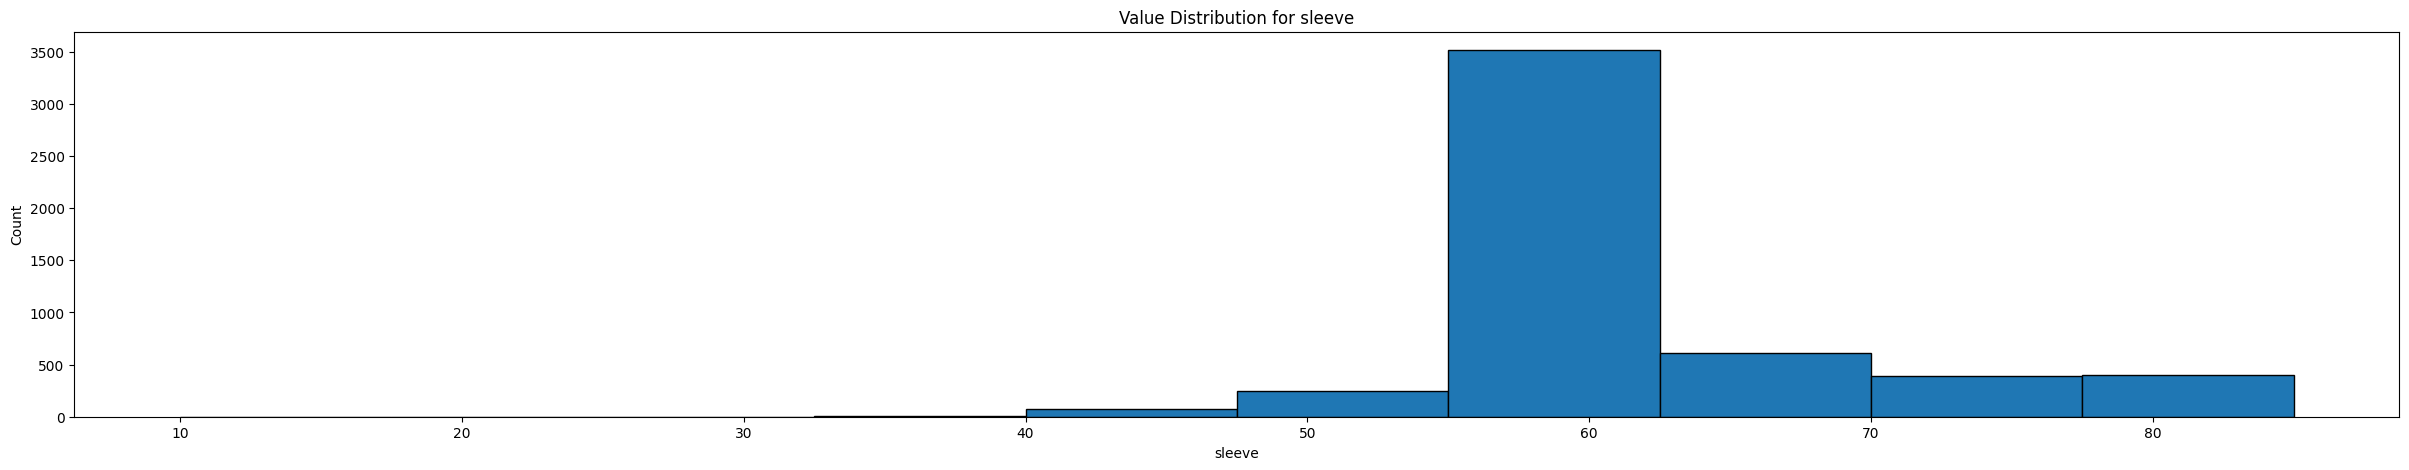

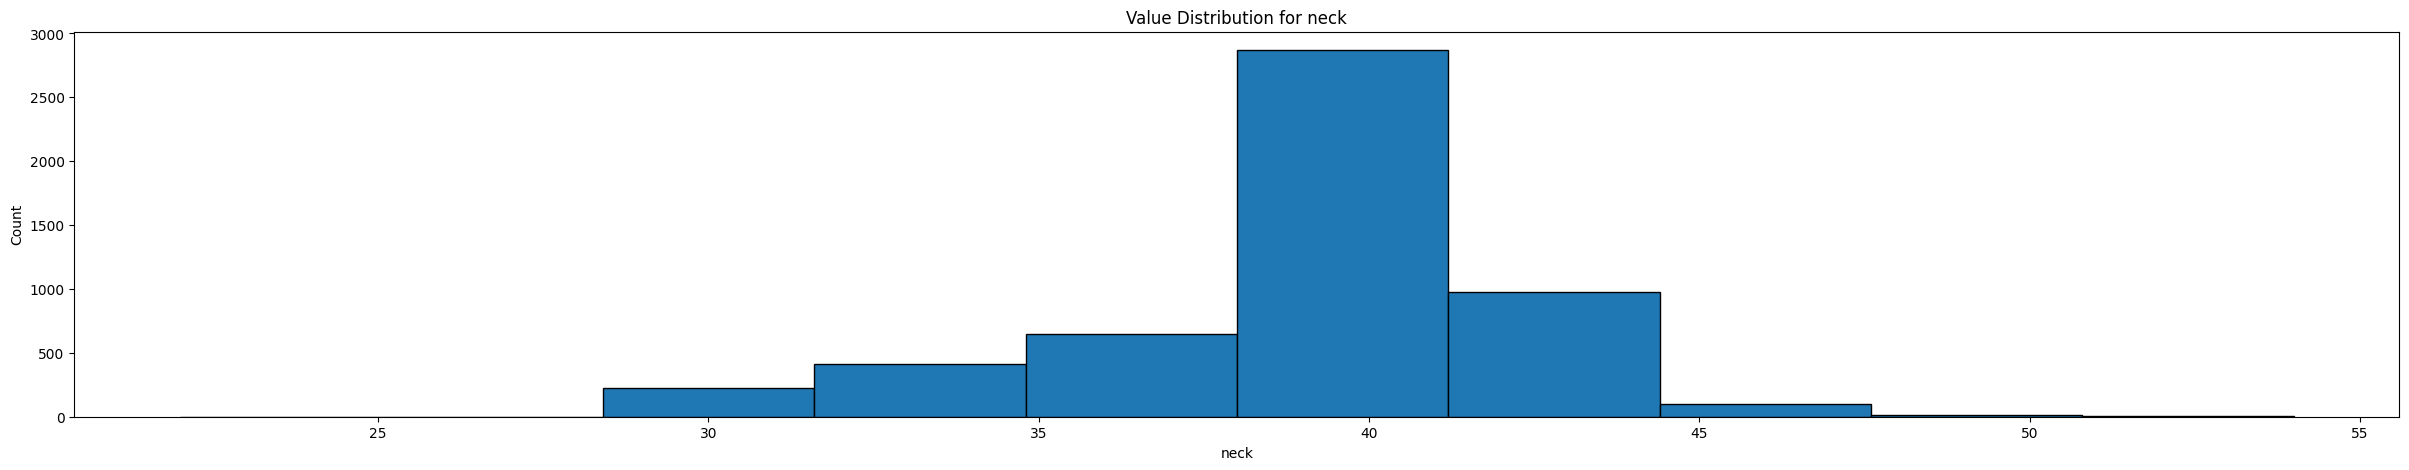

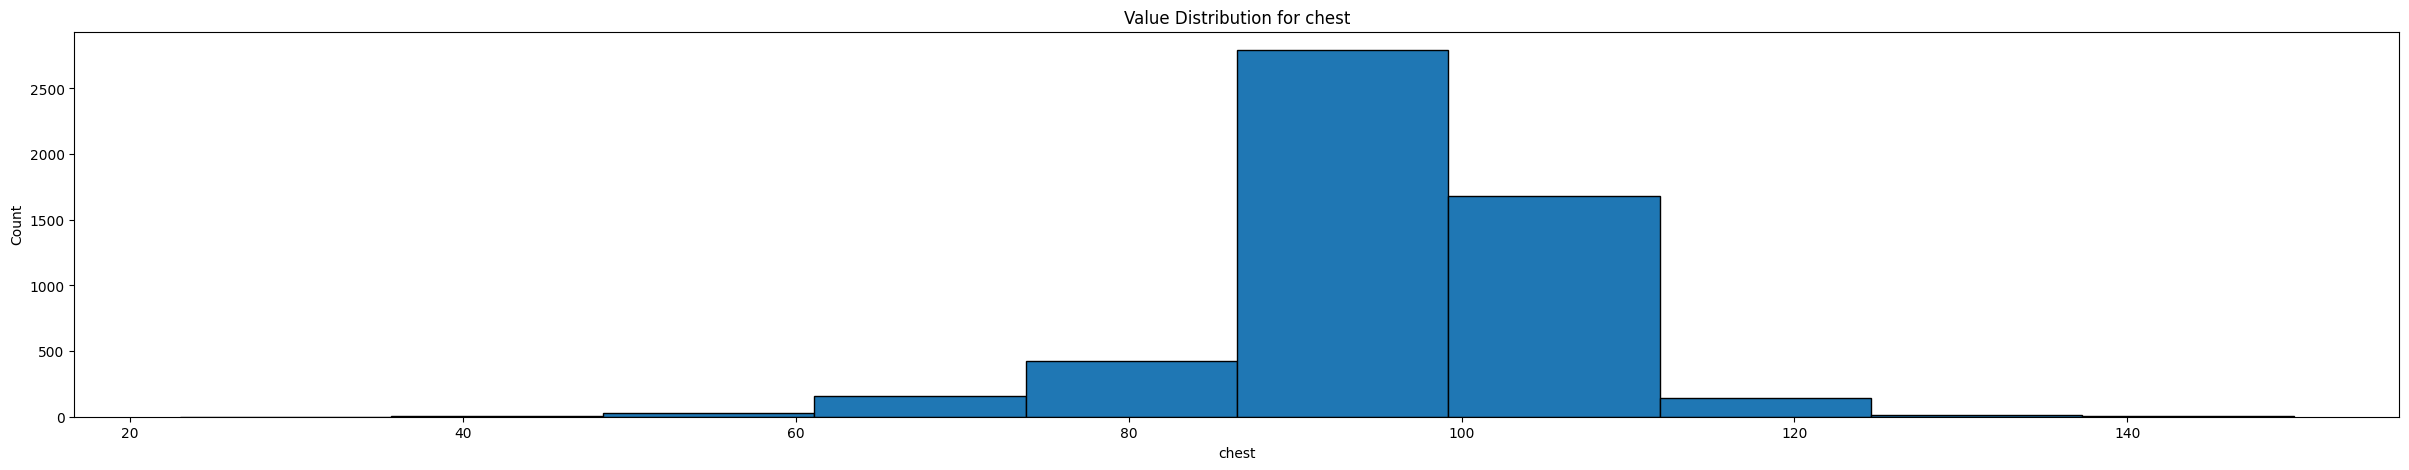

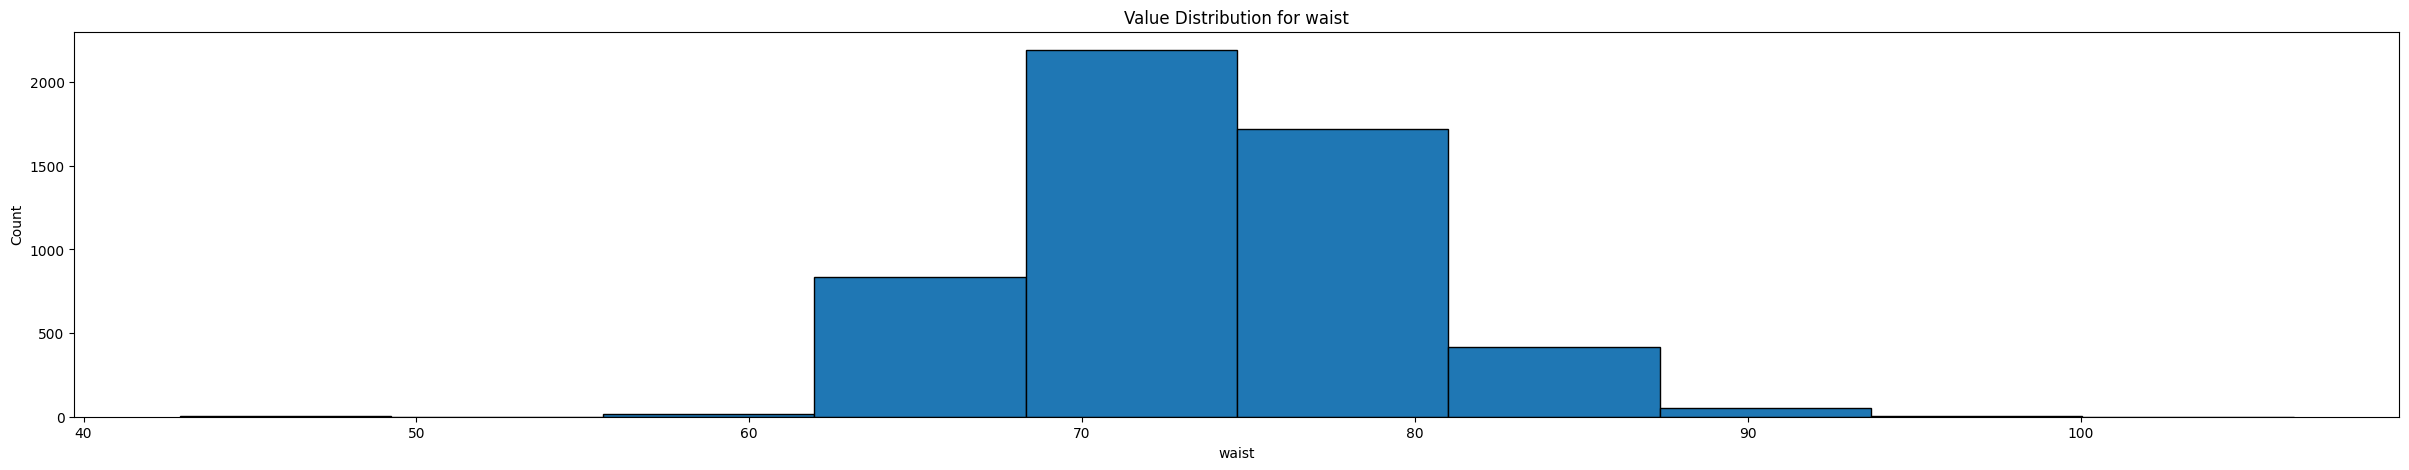

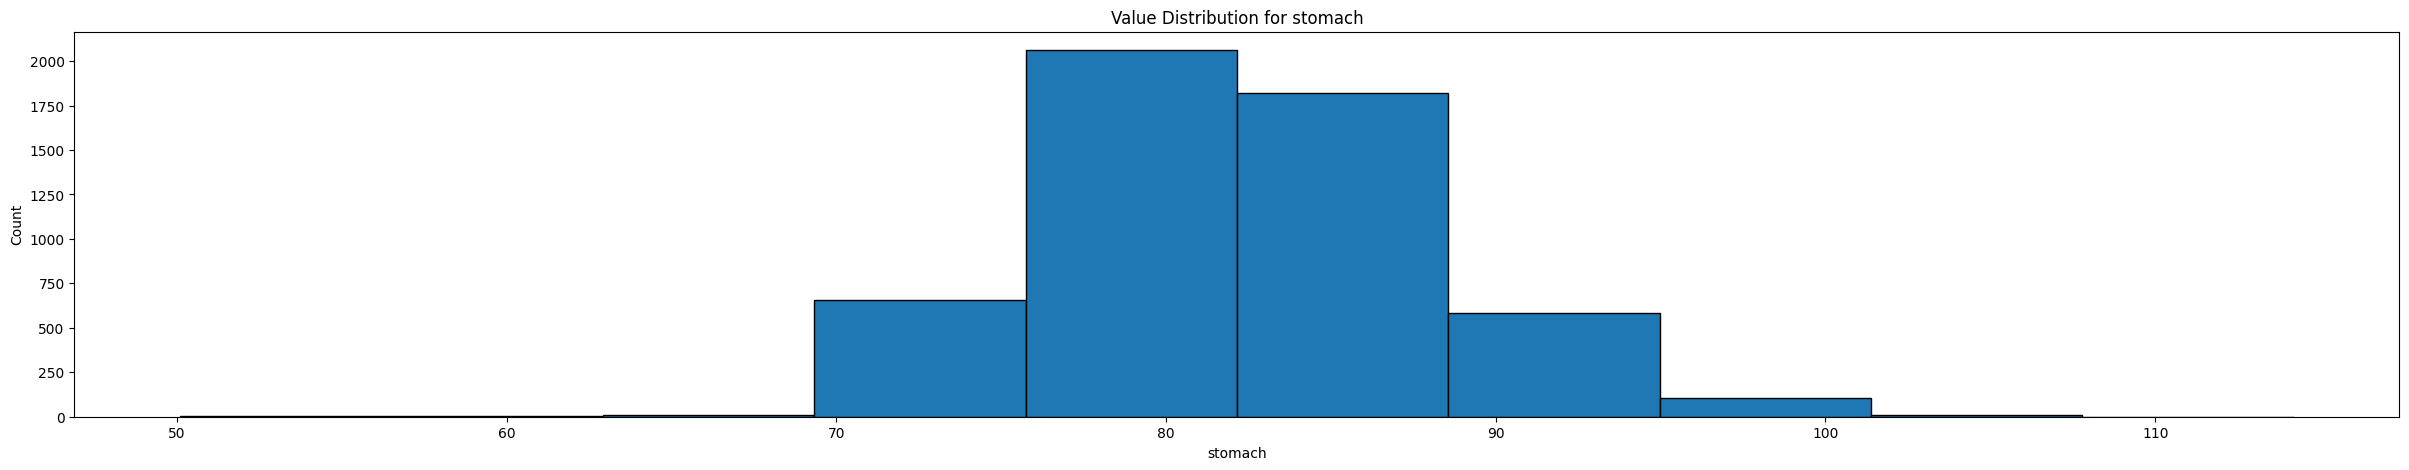

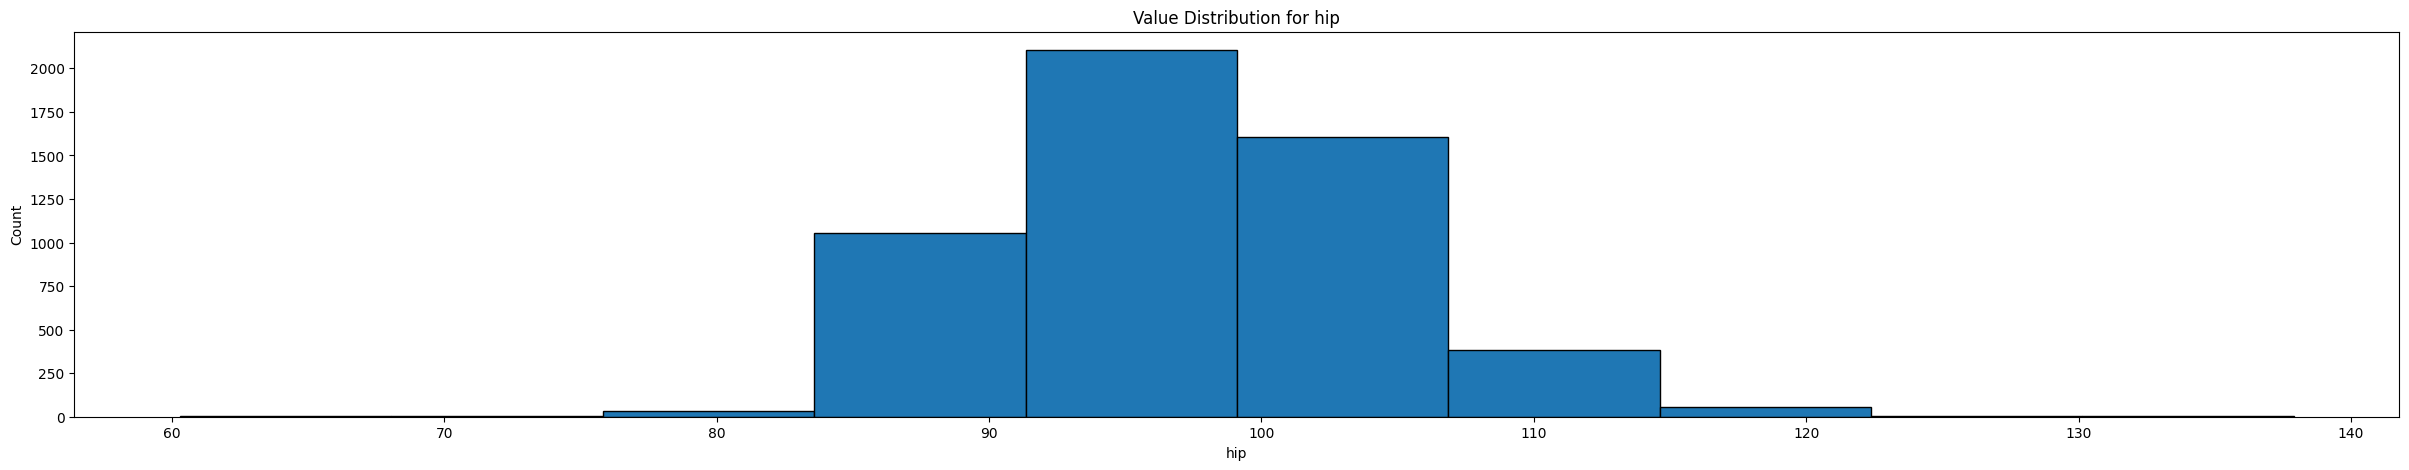

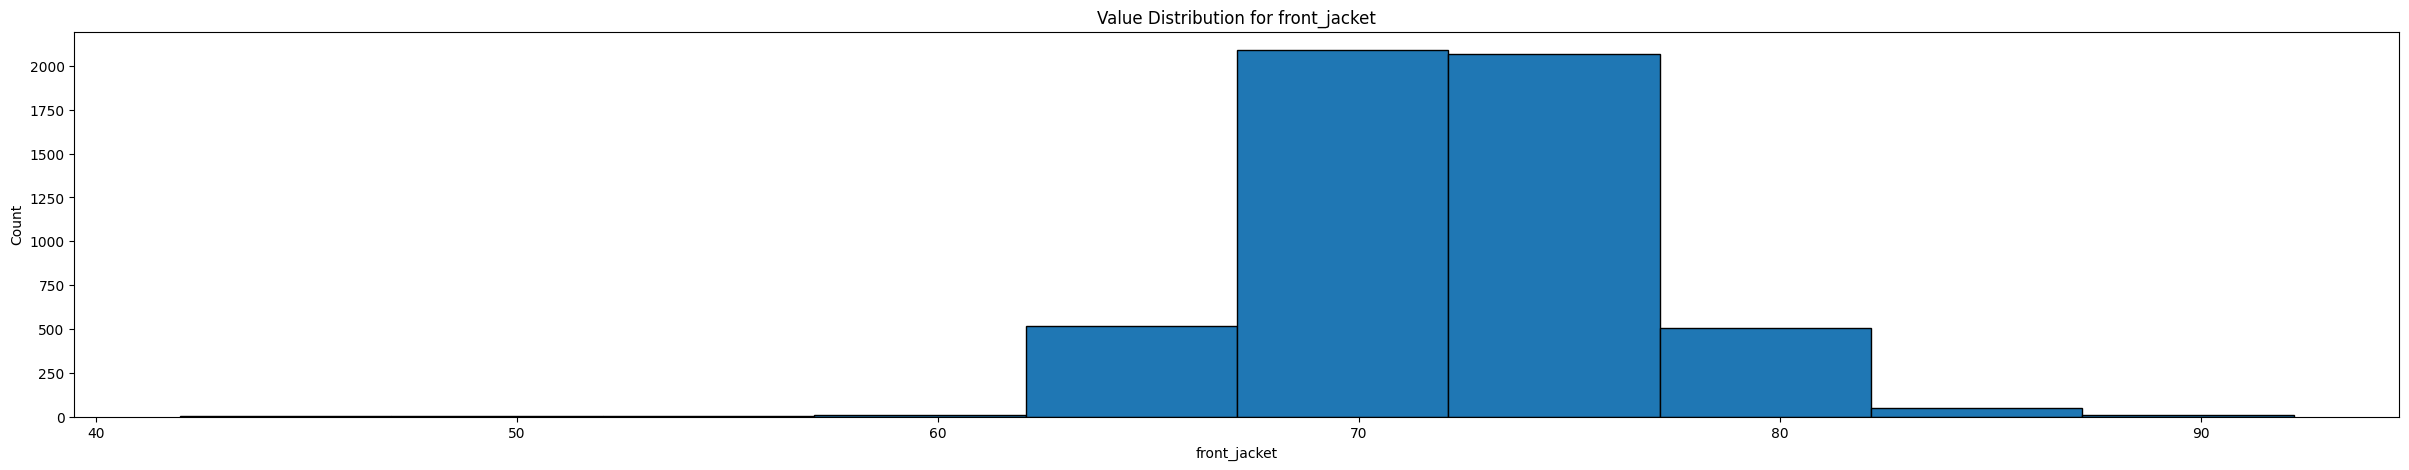

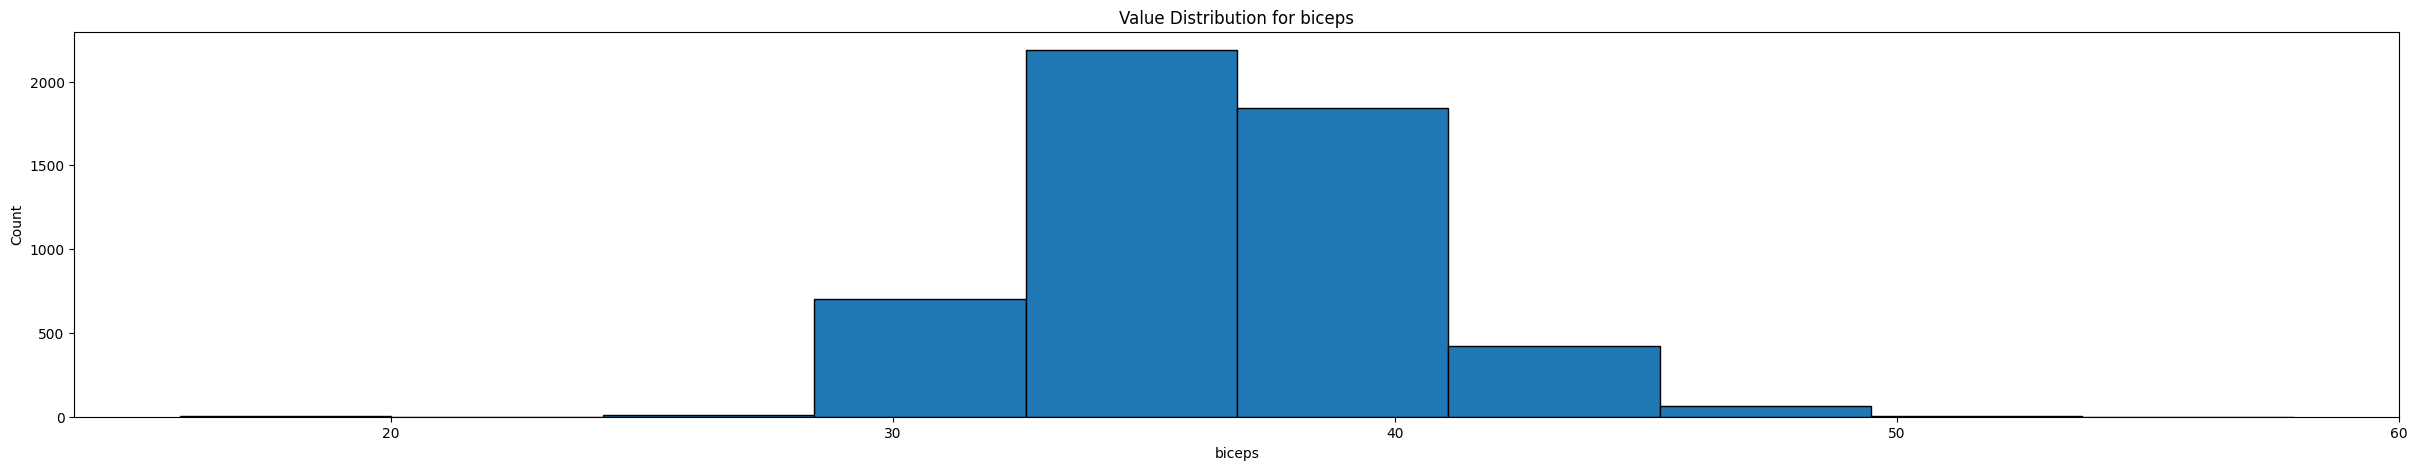

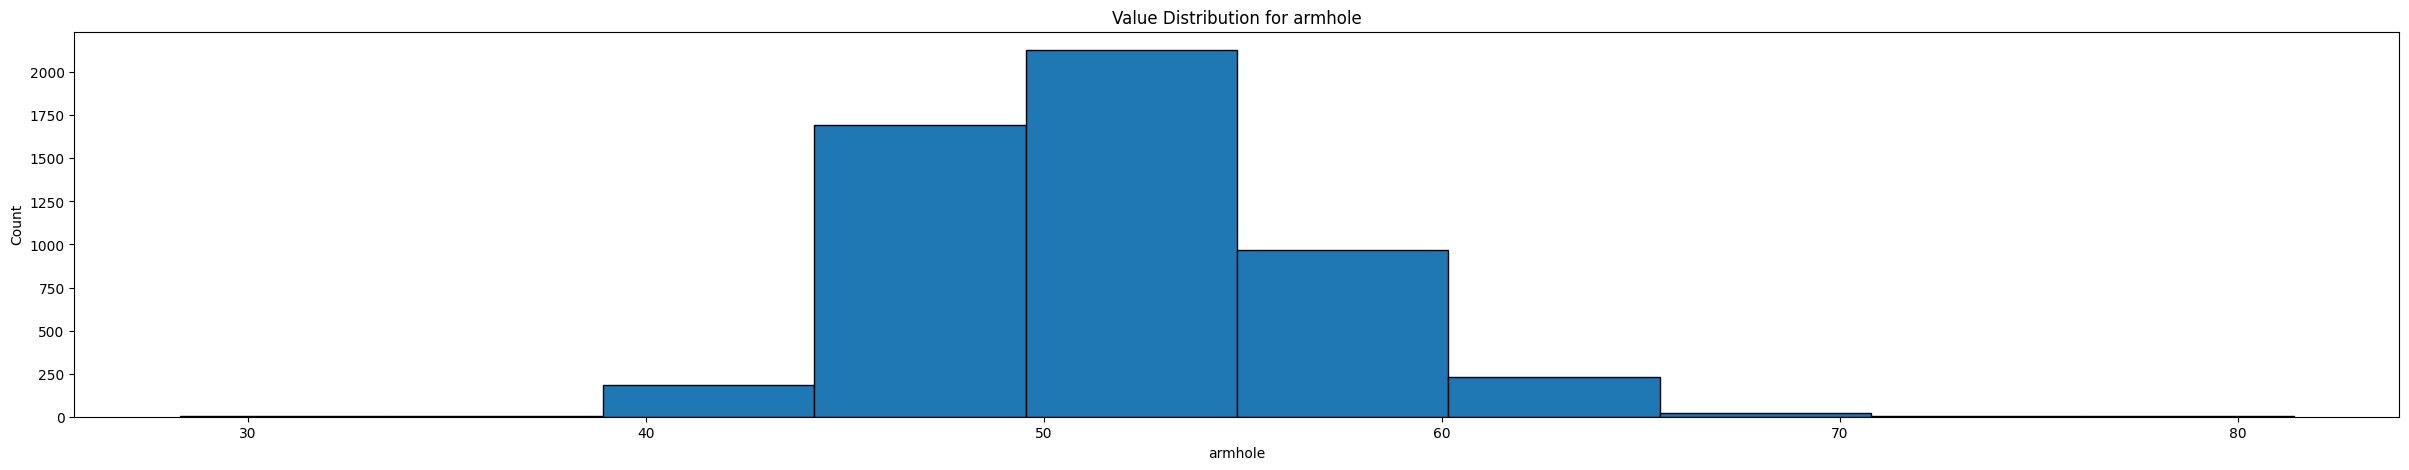

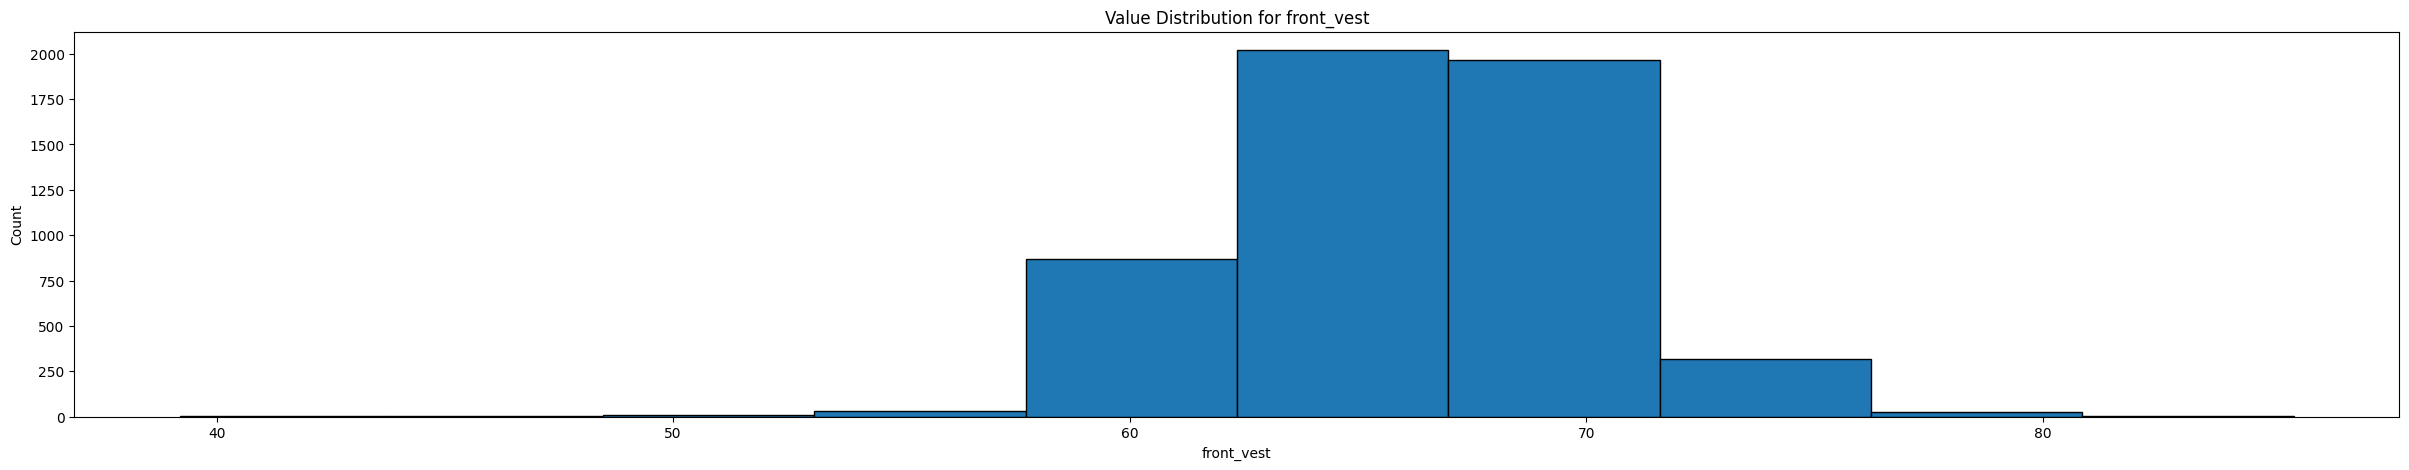

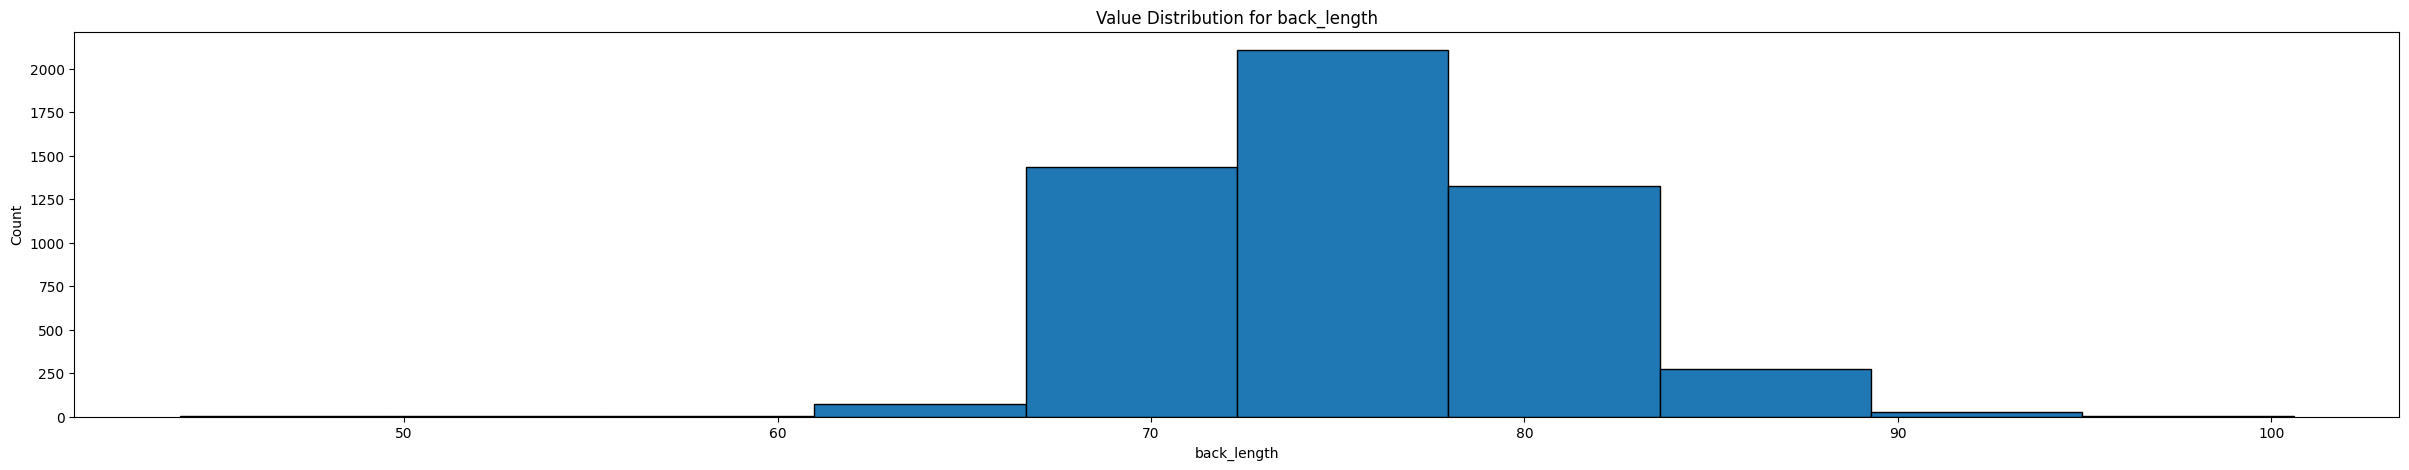

In [8]:
labels = output_columns

# Vẽ histogram cho từng cột
for label in labels:
    fig, ax = plt.subplots(figsize=(30, 5))

    # Vẽ histogram
    ax.hist(df[label].dropna(), bins=10, edgecolor='k')
    ax.set_xlabel(label)
    ax.set_ylabel('Count')
    ax.set_title('Value Distribution for ' + label)

    # Hiển thị biểu đồ
    plt.show()

EVALUATION

In [9]:
metrics = pd.read_csv(Path(r"..\results\metrics\metric.csv").resolve())

In [10]:
metrics

Input  \
0                   height, weight, gender, age, form   
1         height, weight, gender, age, form, shoulder   
2   height, weight, gender, age, form, shoulder, s...   
3   height, weight, gender, age, form, shoulder, s...   
4   height, weight, gender, age, form, shoulder, s...   
5   height, weight, gender, age, form, shoulder, s...   
6   height, weight, gender, age, form, shoulder, s...   
7   height, weight, gender, age, form, shoulder, s...   
8   height, weight, gender, age, form, shoulder, s...   
9   height, weight, gender, age, form, shoulder, s...   
10  height, weight, gender, age, form, shoulder, s...   
11  height, weight, gender, age, form, shoulder, s...   

                                               Output       MAE        MSE  \
0   shoulder, sleeve, neck, chest, waist, stomach,...  1.649798  12.309166   
1   sleeve, neck, chest, waist, stomach, hip, fron...  1.571495  11.615961   
2   neck, chest, waist, stomach, hip, front_jacket...  1.176786   6.649950   
3   chest, waist, stomach, hip, front_jacket, bice...  1.087353   6.544413   
4   waist, stomach, hip, front_jacket, biceps, arm...  0.617372   0.576155   
5   stomach, hip, front_jacket, biceps, armhole, f...  0.556672   0.450423   
6   hip, front_jacket, biceps, armhole, front_vest...  0.530796   0.408308   
7   front_jacket, biceps, armhole, front_vest, bac...  0.546515   0.421223   
8            biceps, armhole, front_vest, back_length  0.531759   0.397753   
9                    armhole, front_vest, back_length  0.529168   0.389246   
10                            front_vest, back_length  0.527929   0.381756   
11                                        back_length  0.531310   0.383426   

        RMSE        R2  
0   3.508442  0.970531  
1   3.408220  0.971486  
2   2.578750  0.984790  
3   2.558205  0.982495  
4   0.759049  0.998243  
5   0.671136  0.998775  
6   0.638990  0.998948  
7   0.649017  0.998154  
8   0.630676  0.998323  
9   0.623895  0.996671  
10  0.617864  0.990817  
11  0.619214  0.984112

In [11]:
test = pd.read_csv(Path(r"..\results\dataframe\test.csv").resolve())


import glob

csv_files = glob.glob(str(Path(r"..\results\dataframe\pred\*.csv").resolve()))
pred_list = [pd.read_csv(file) for file in csv_files]

In [12]:
figure_path = Path(r"..\results\figures").resolve()

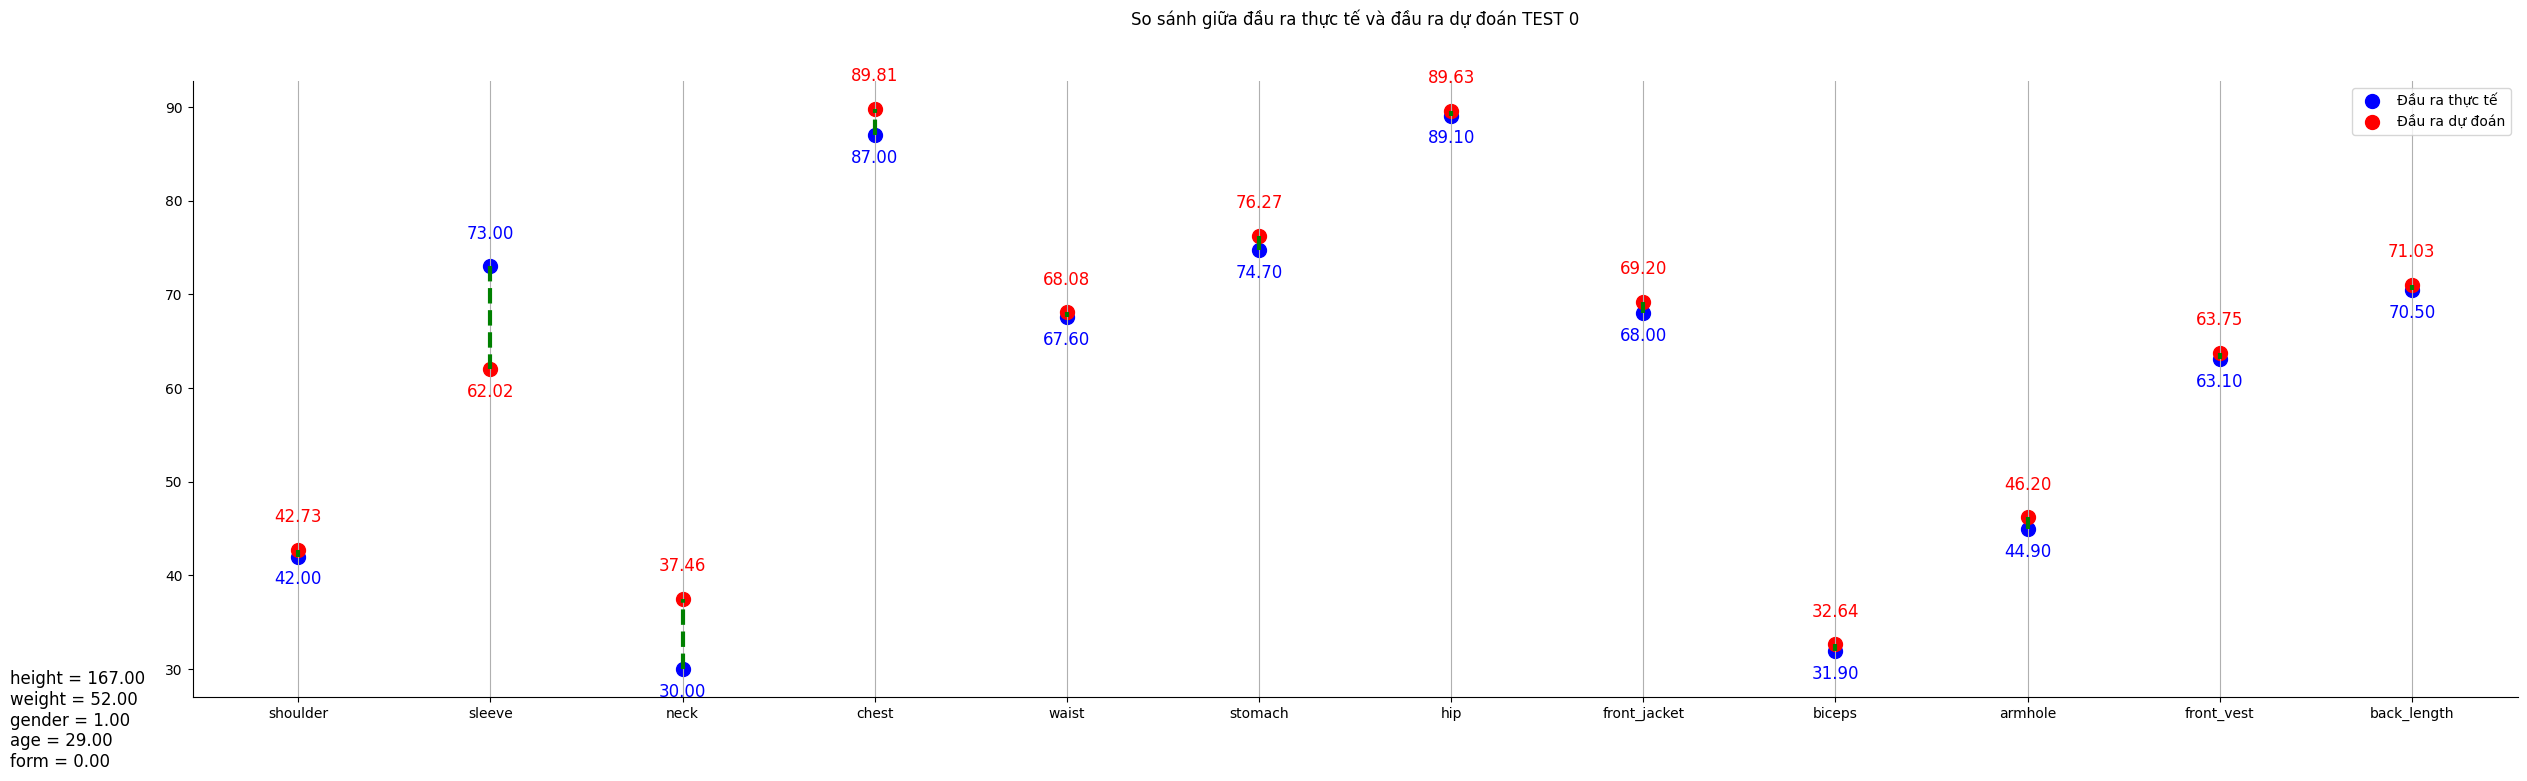

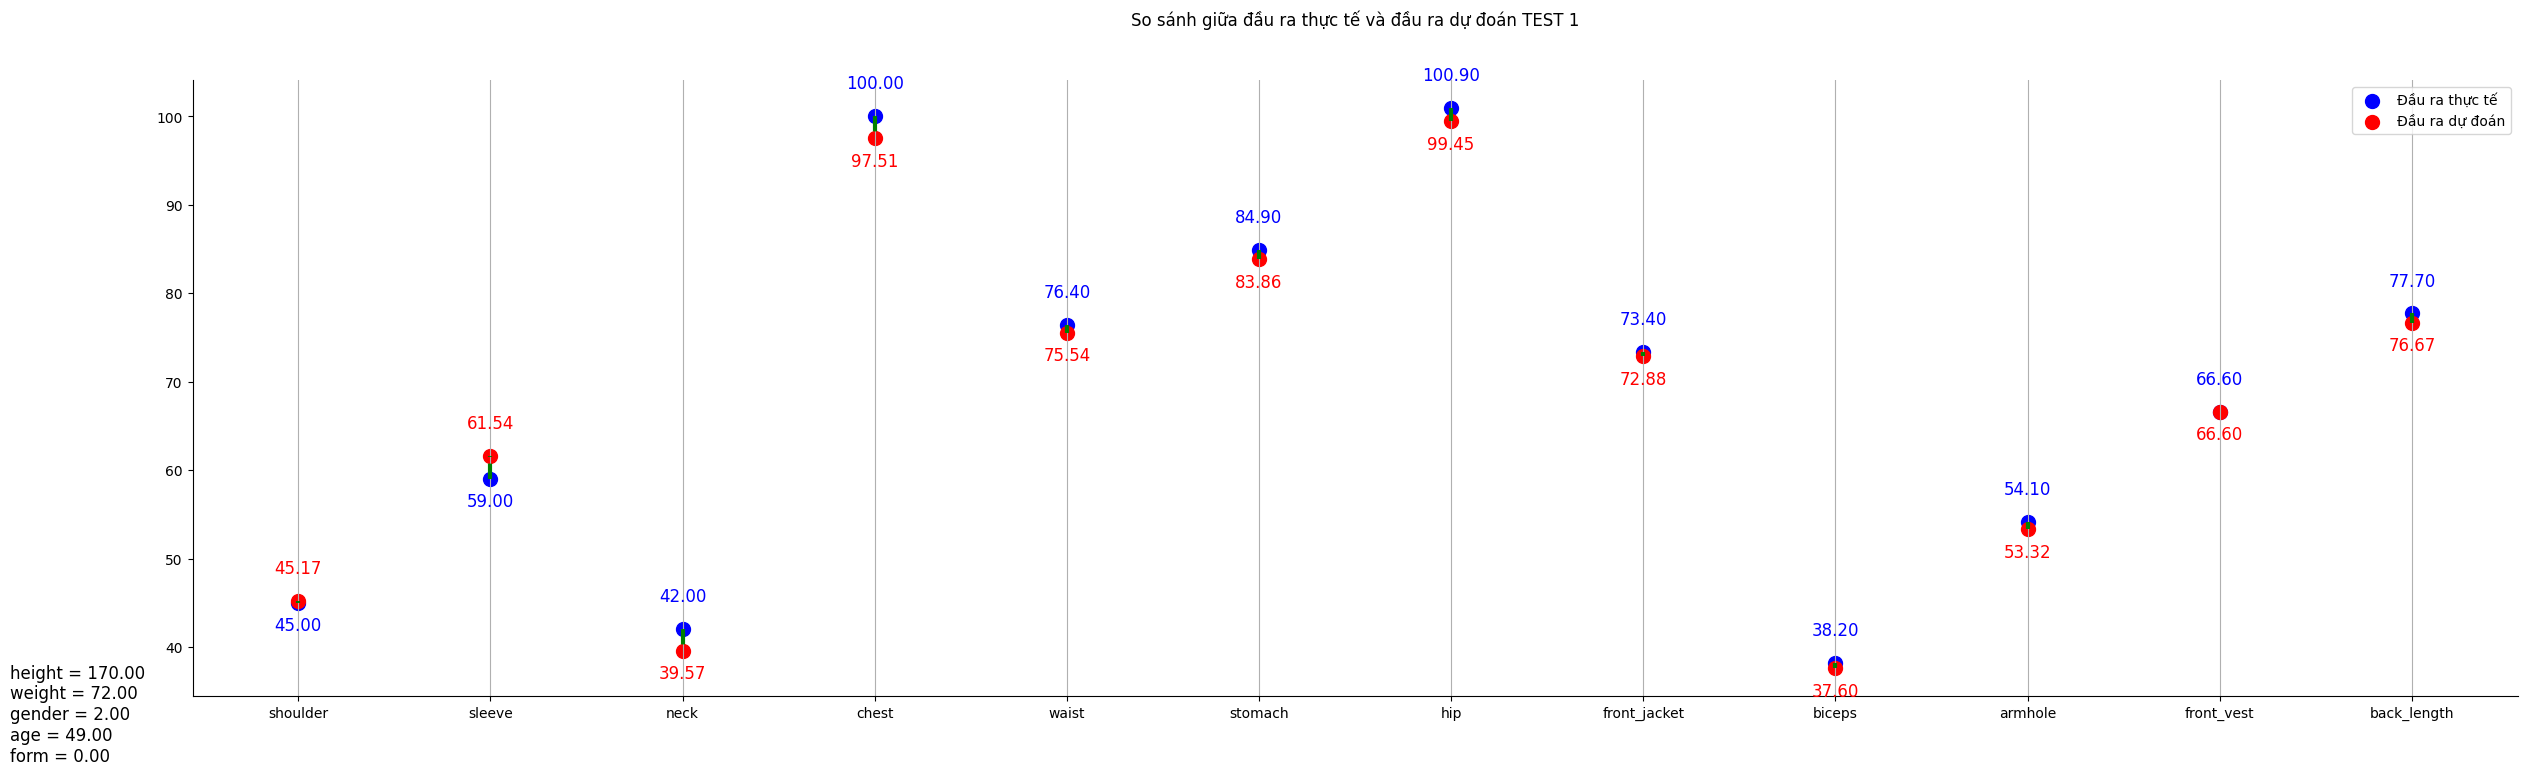

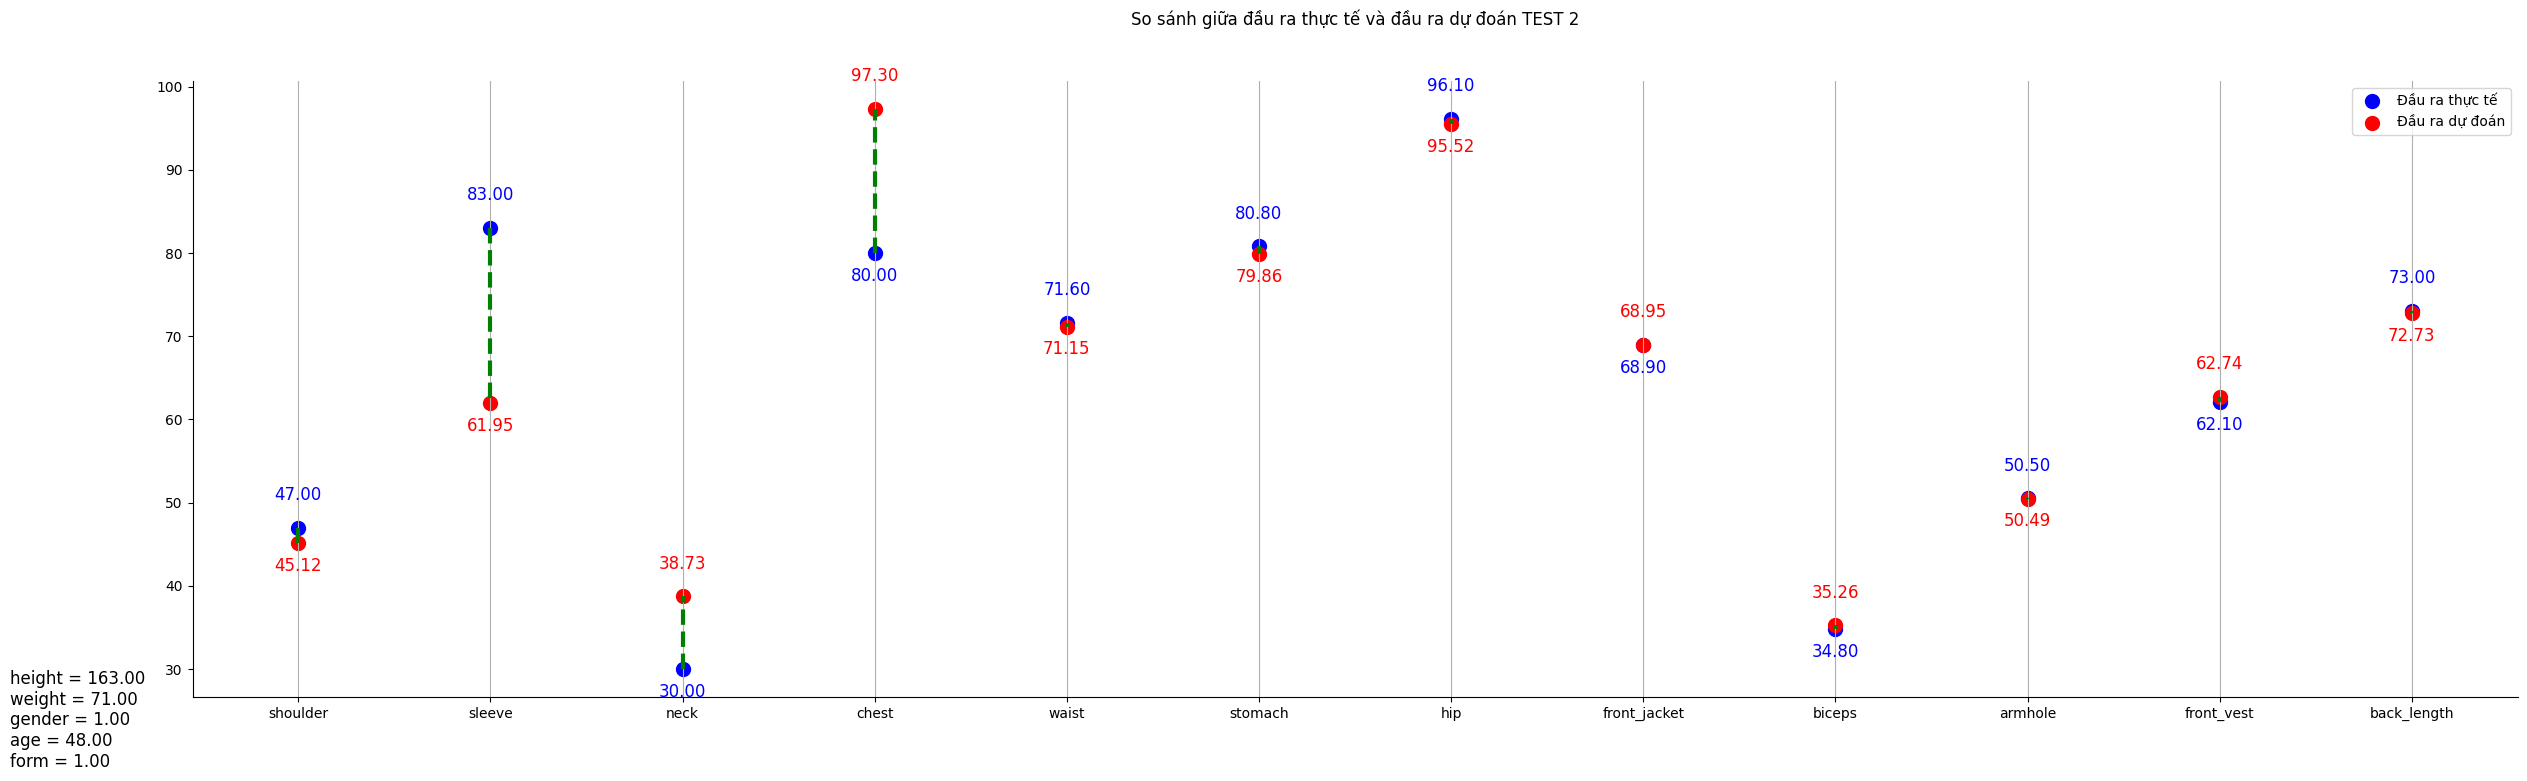

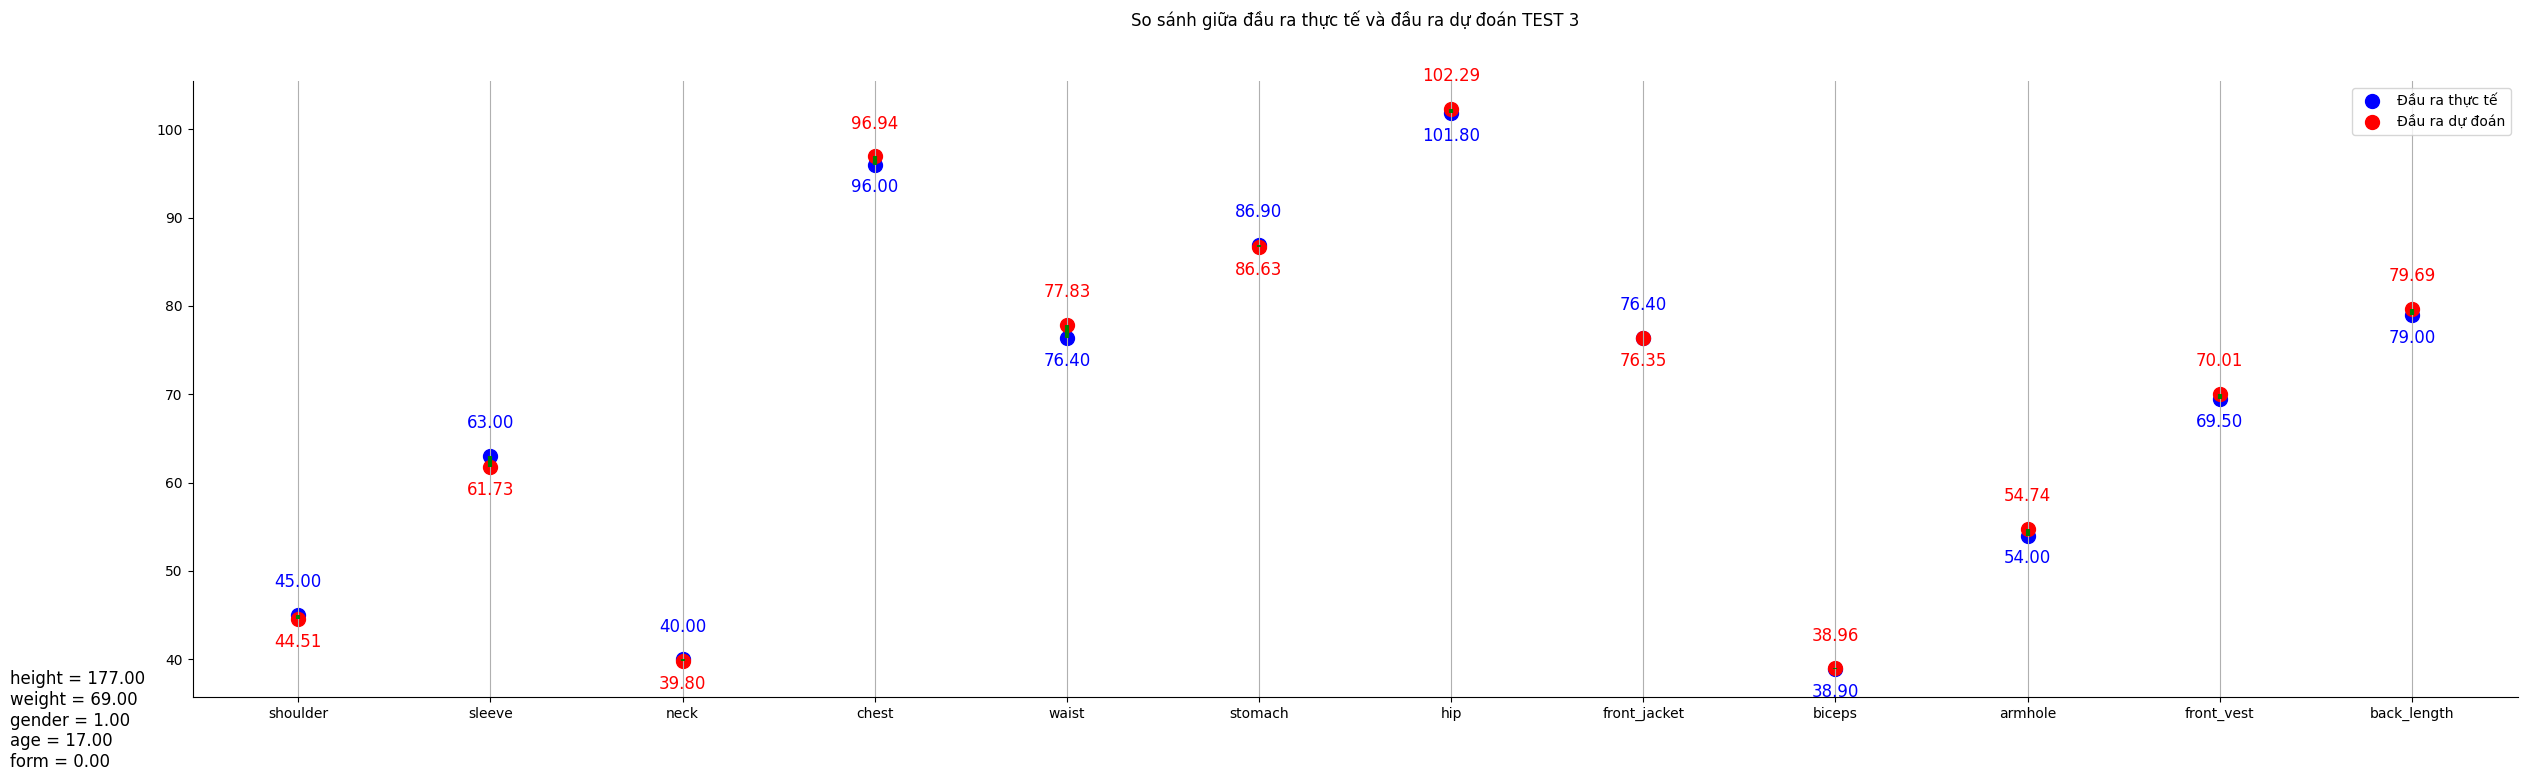

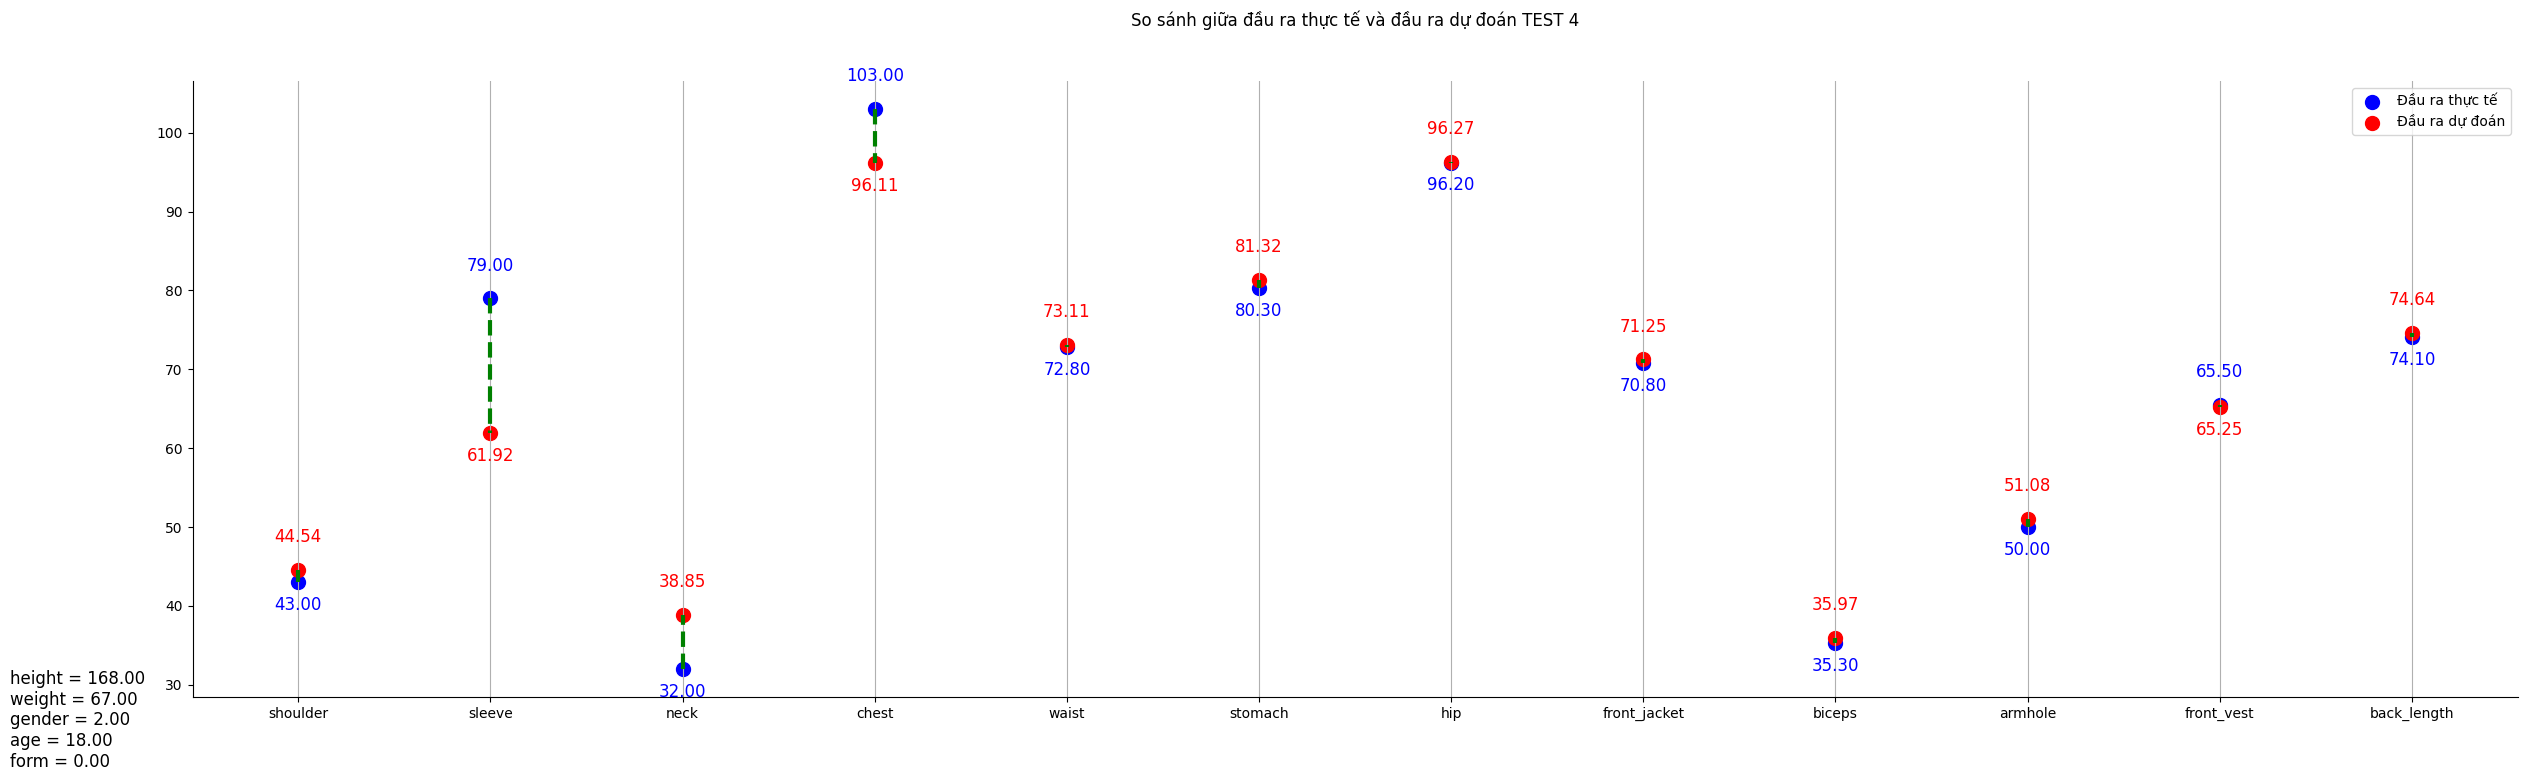

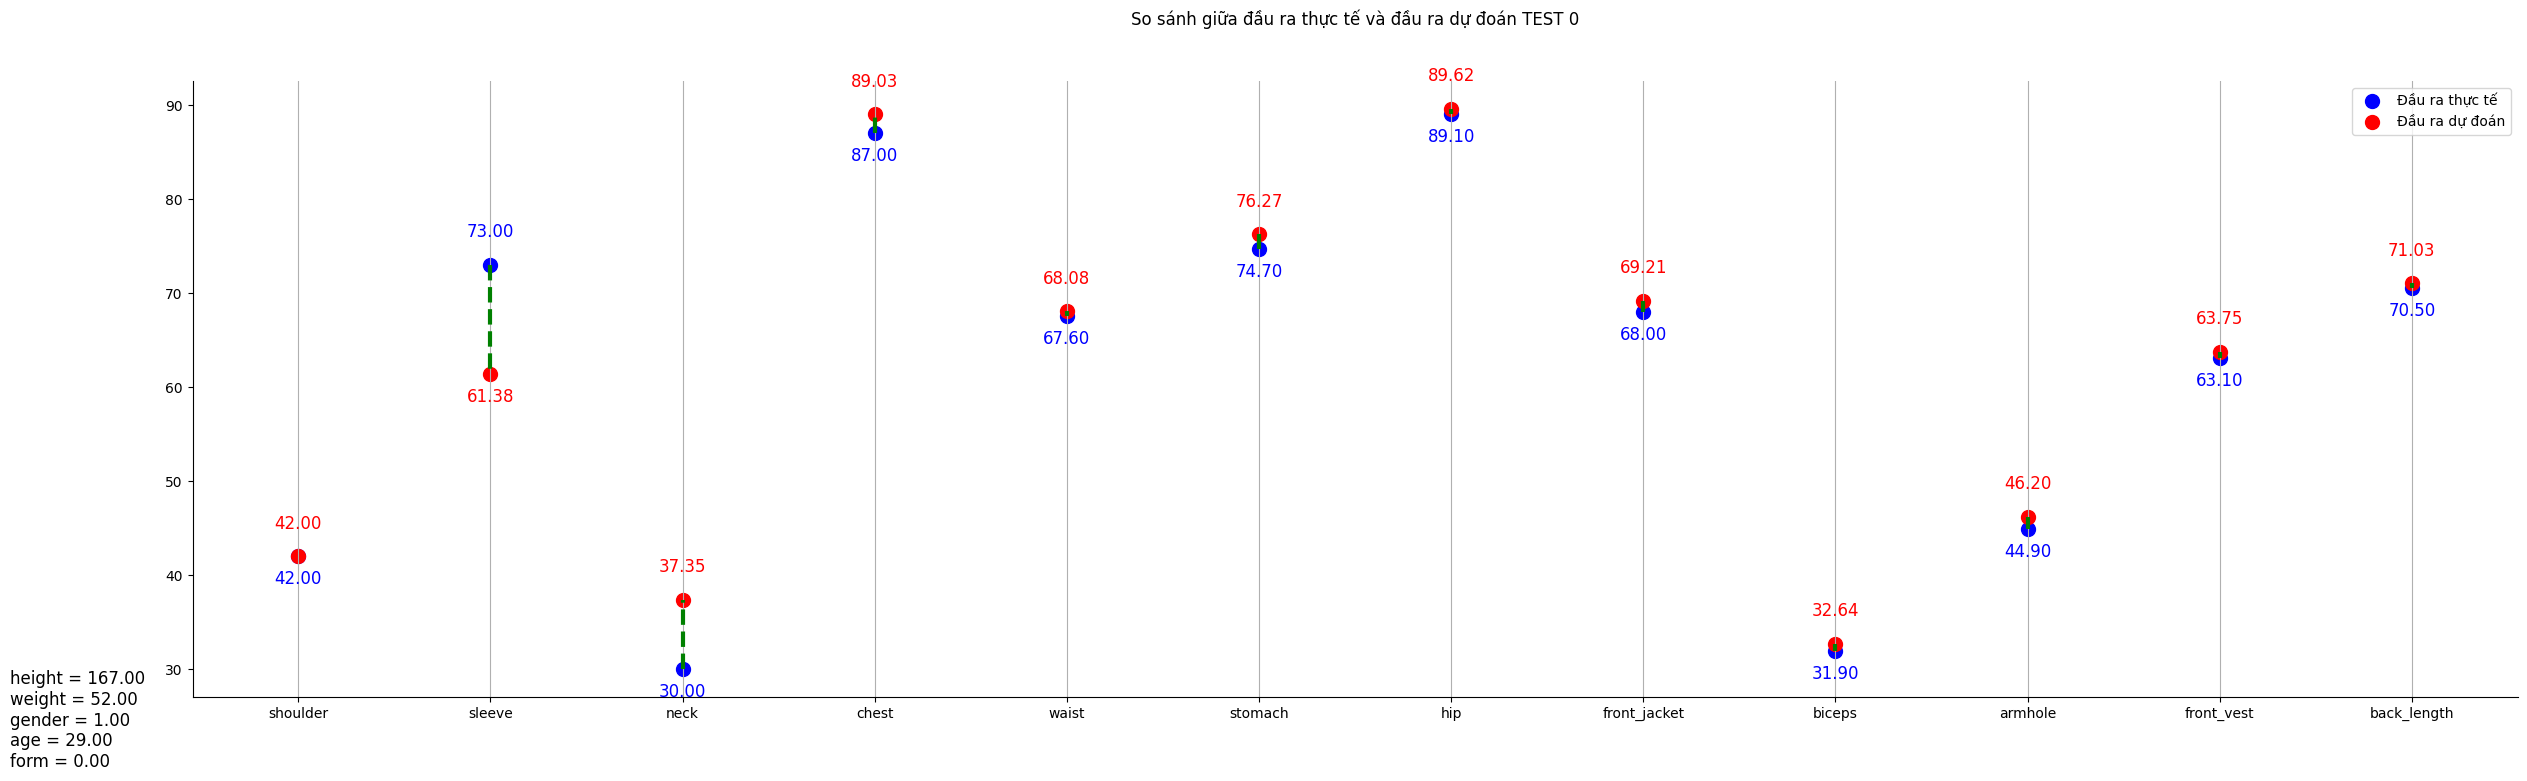

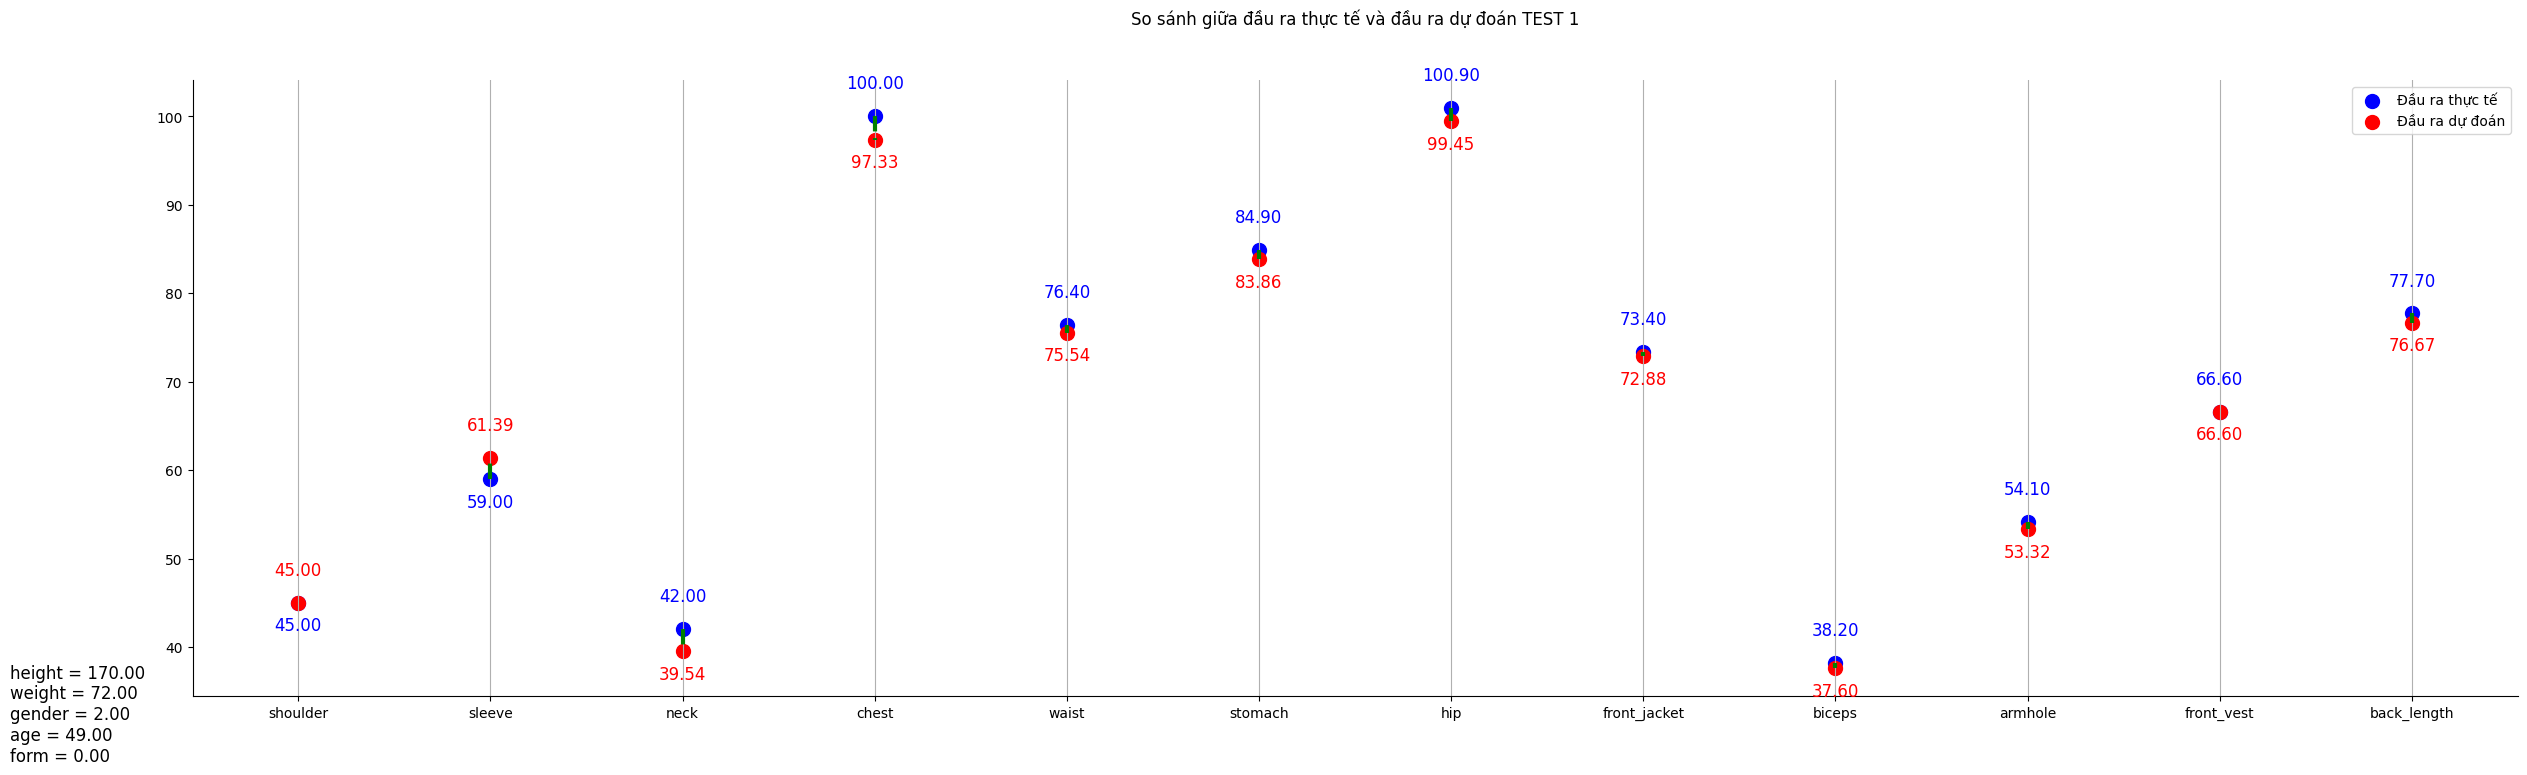

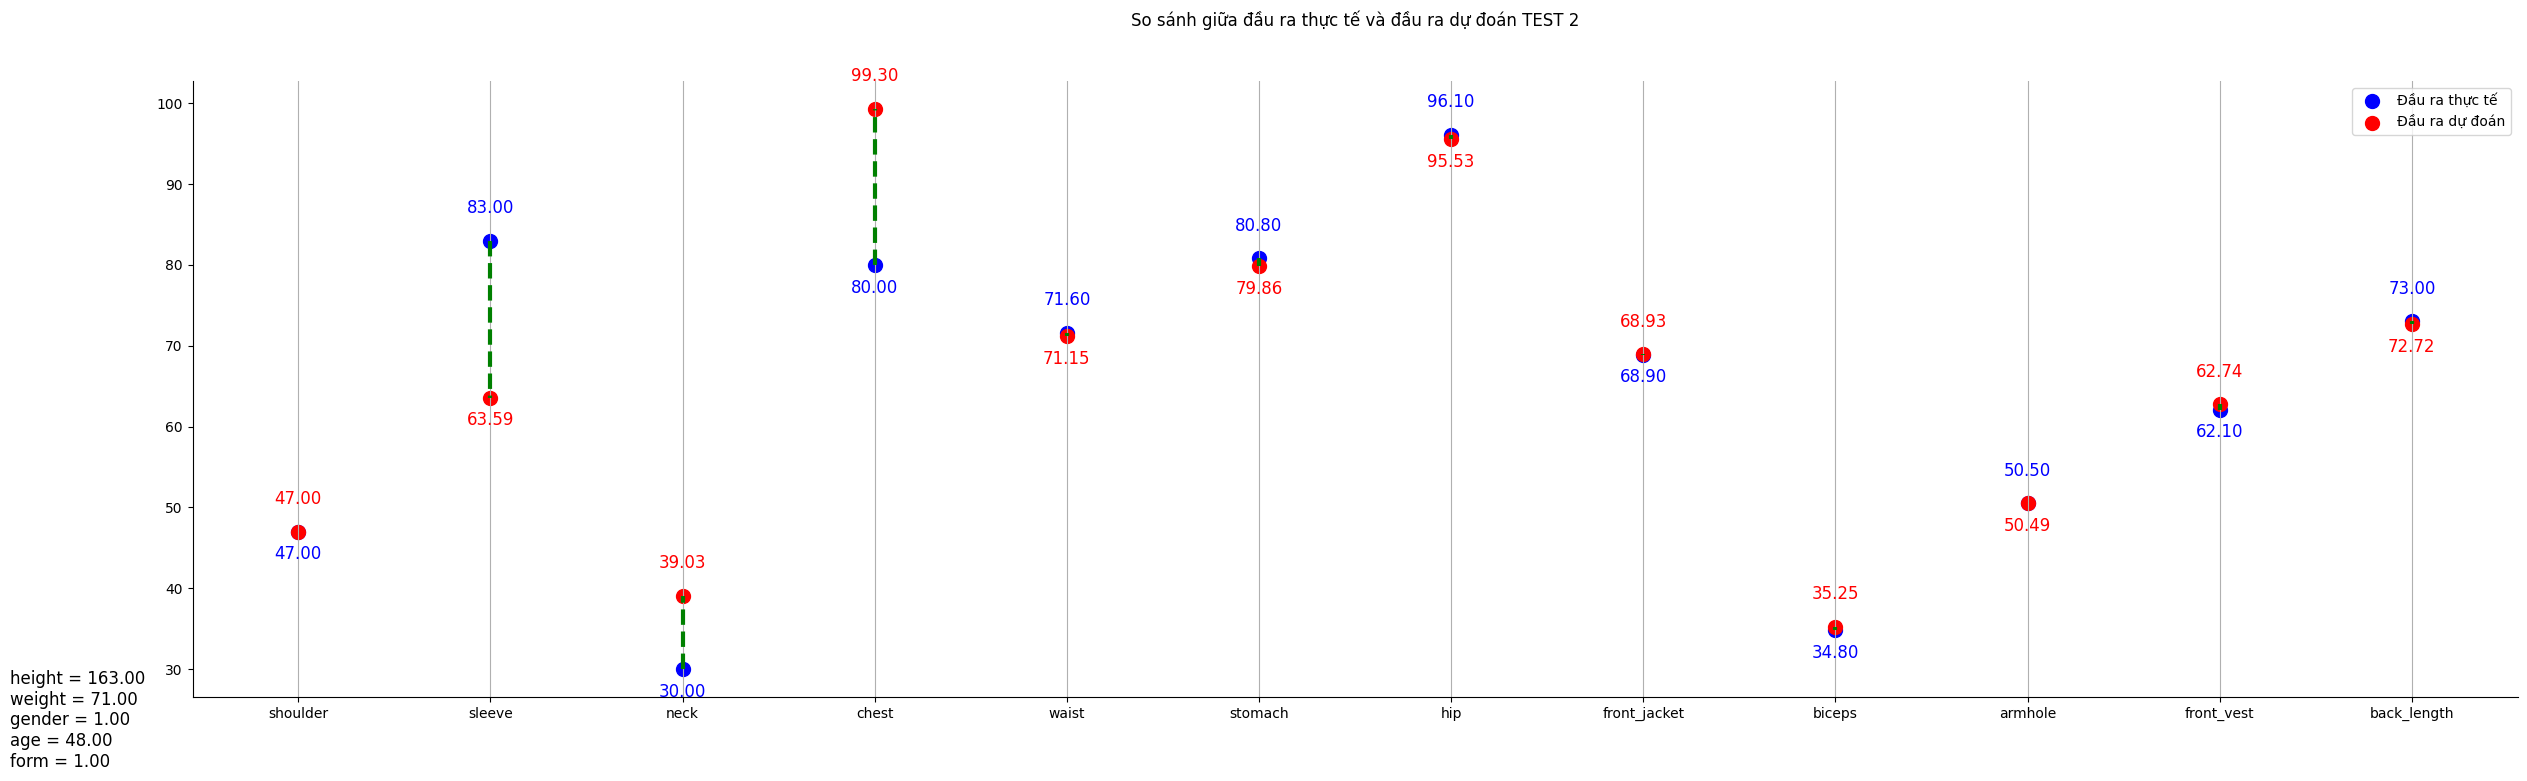

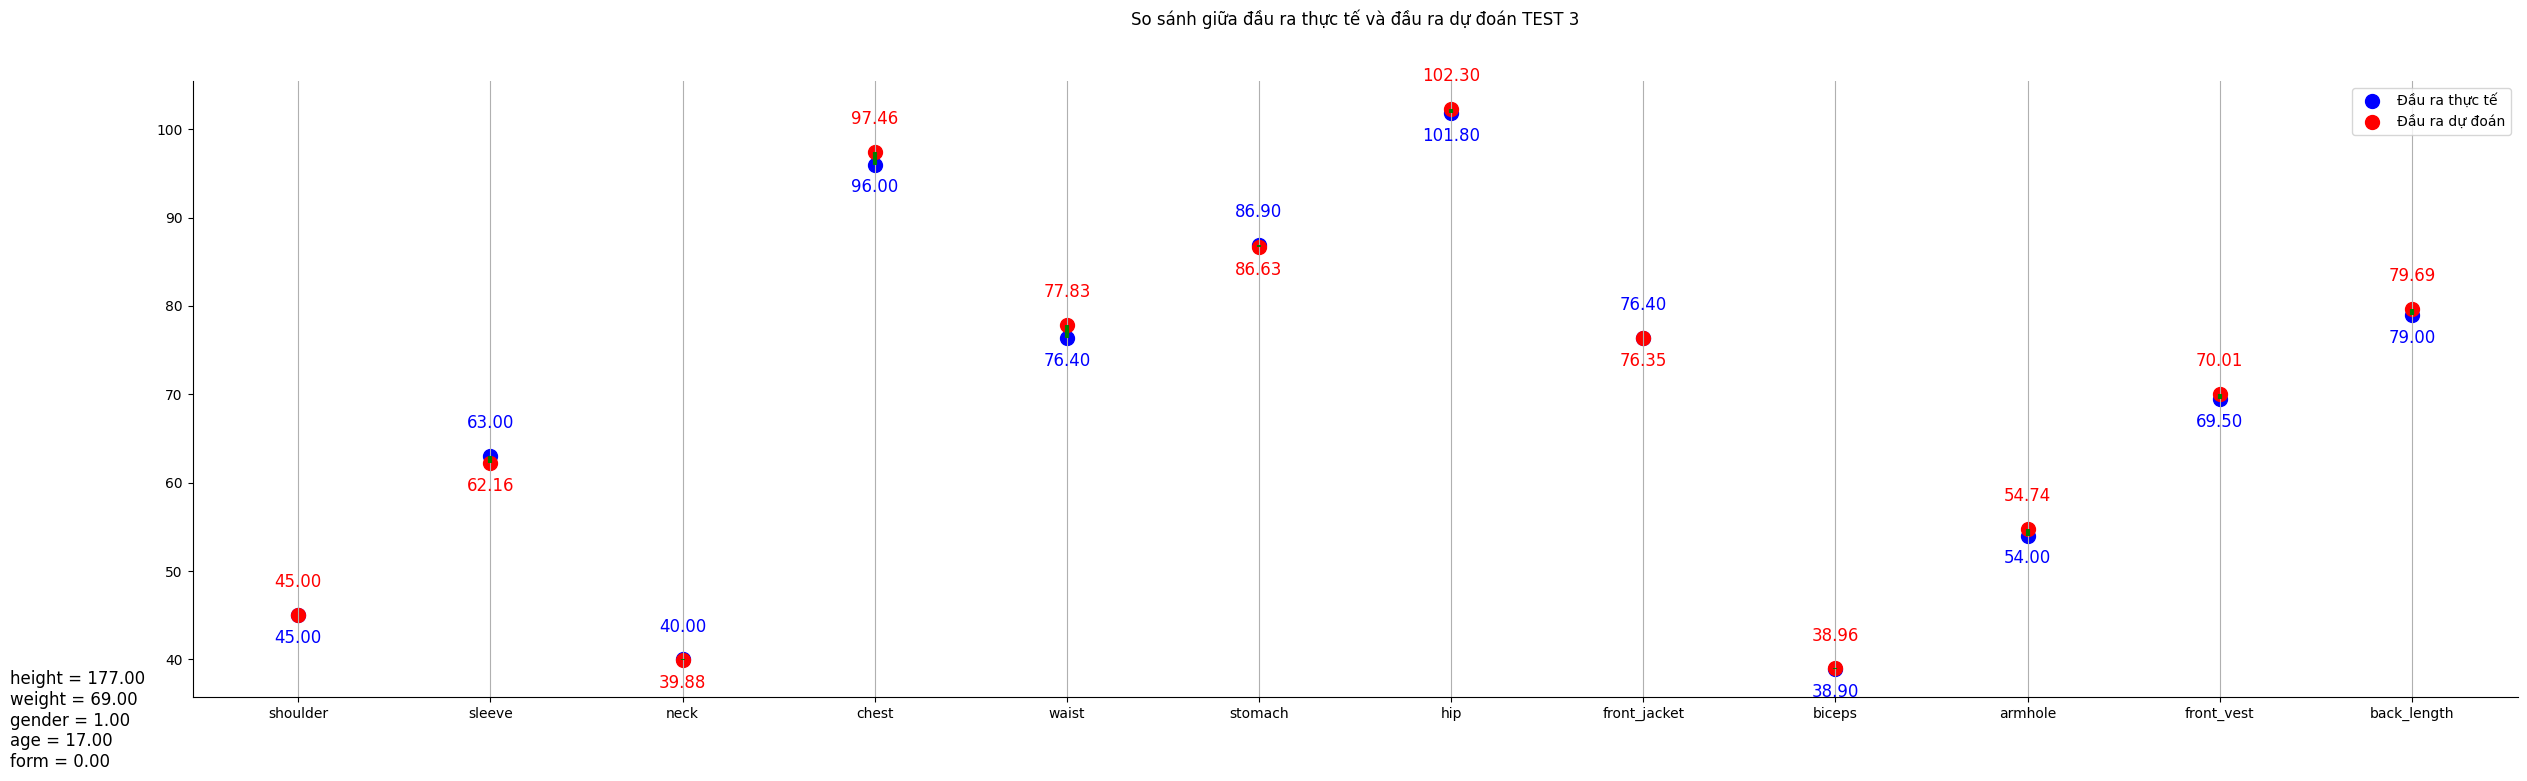

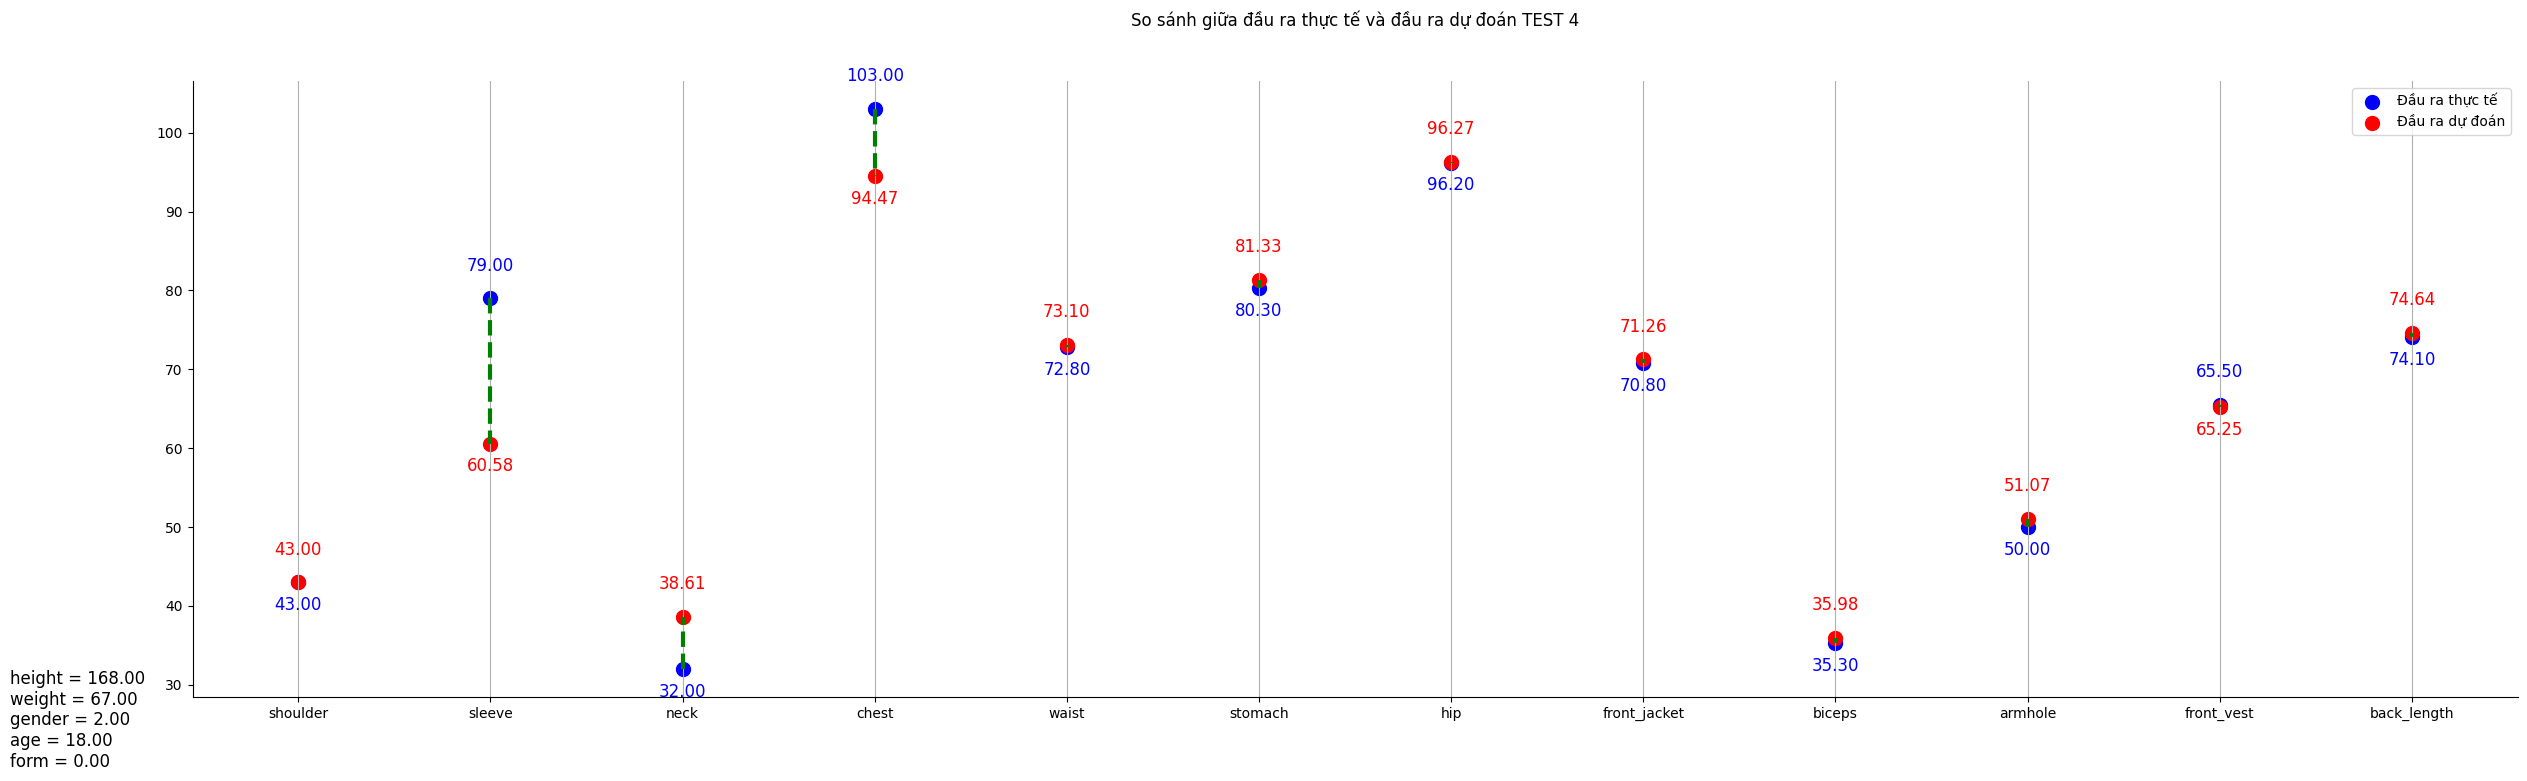

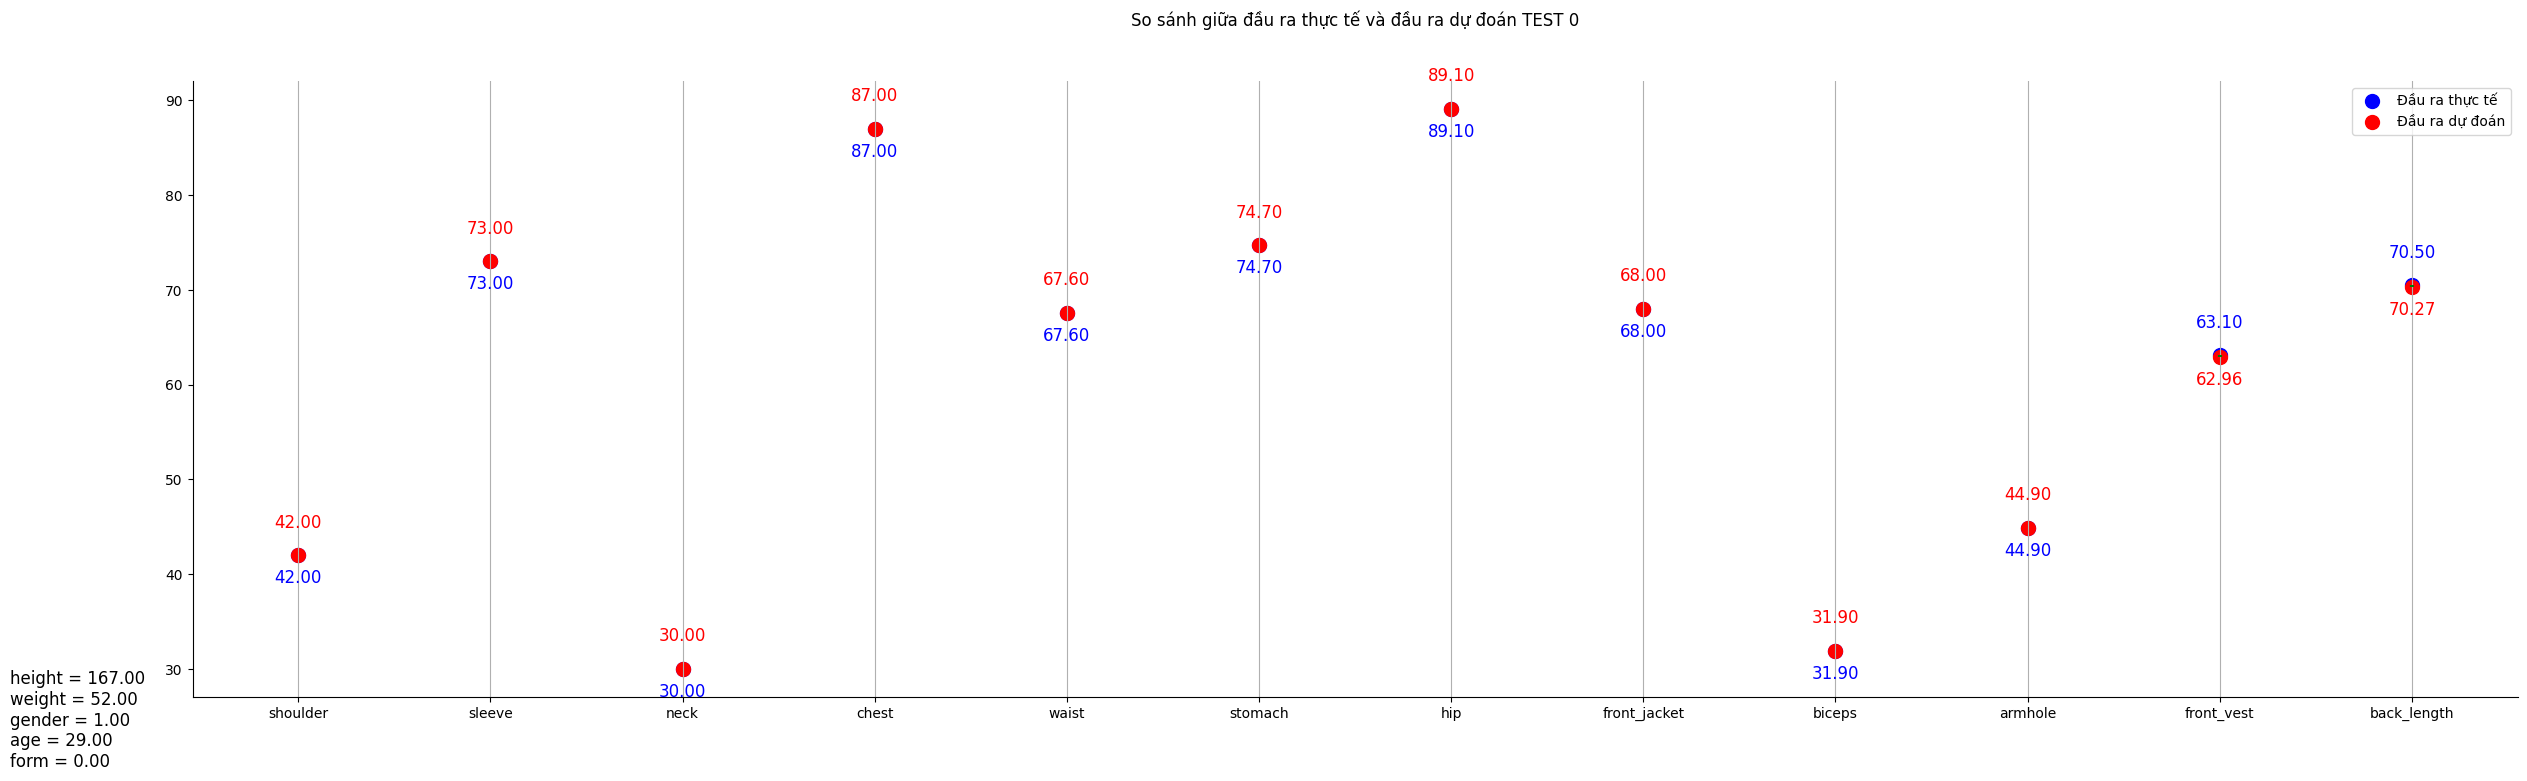

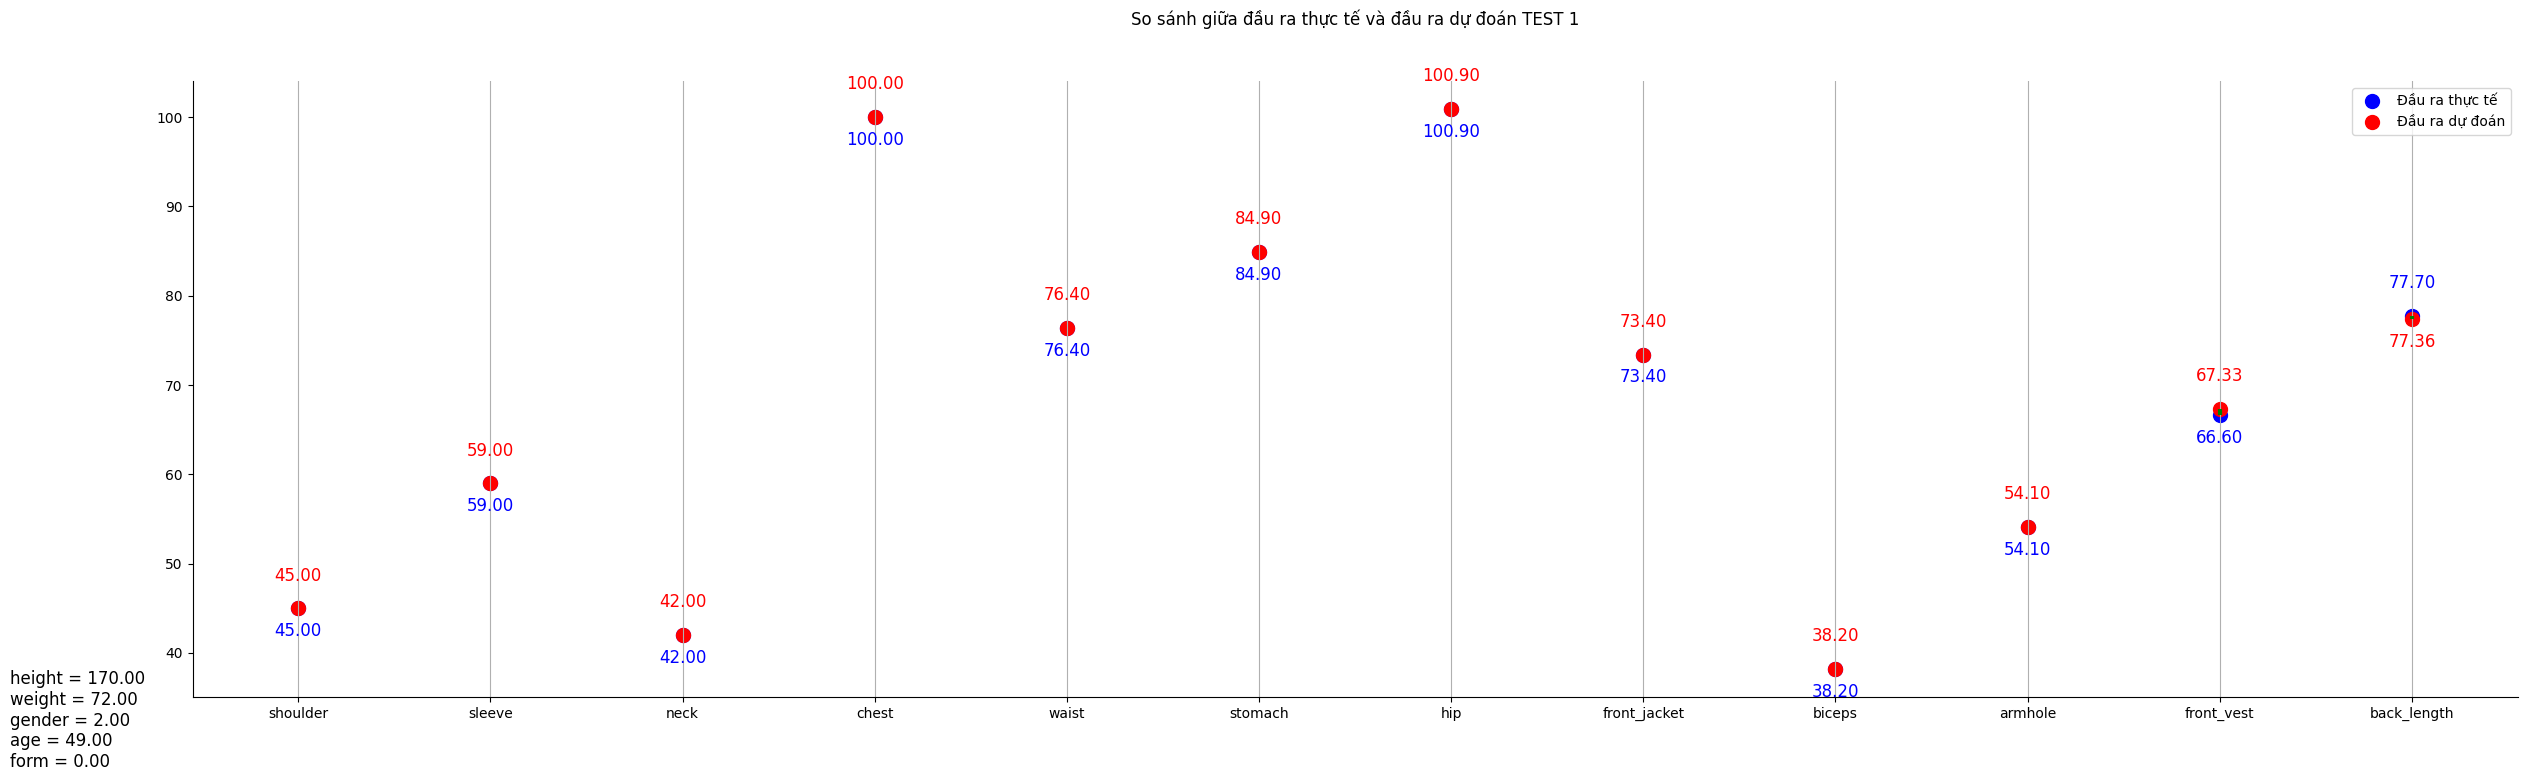

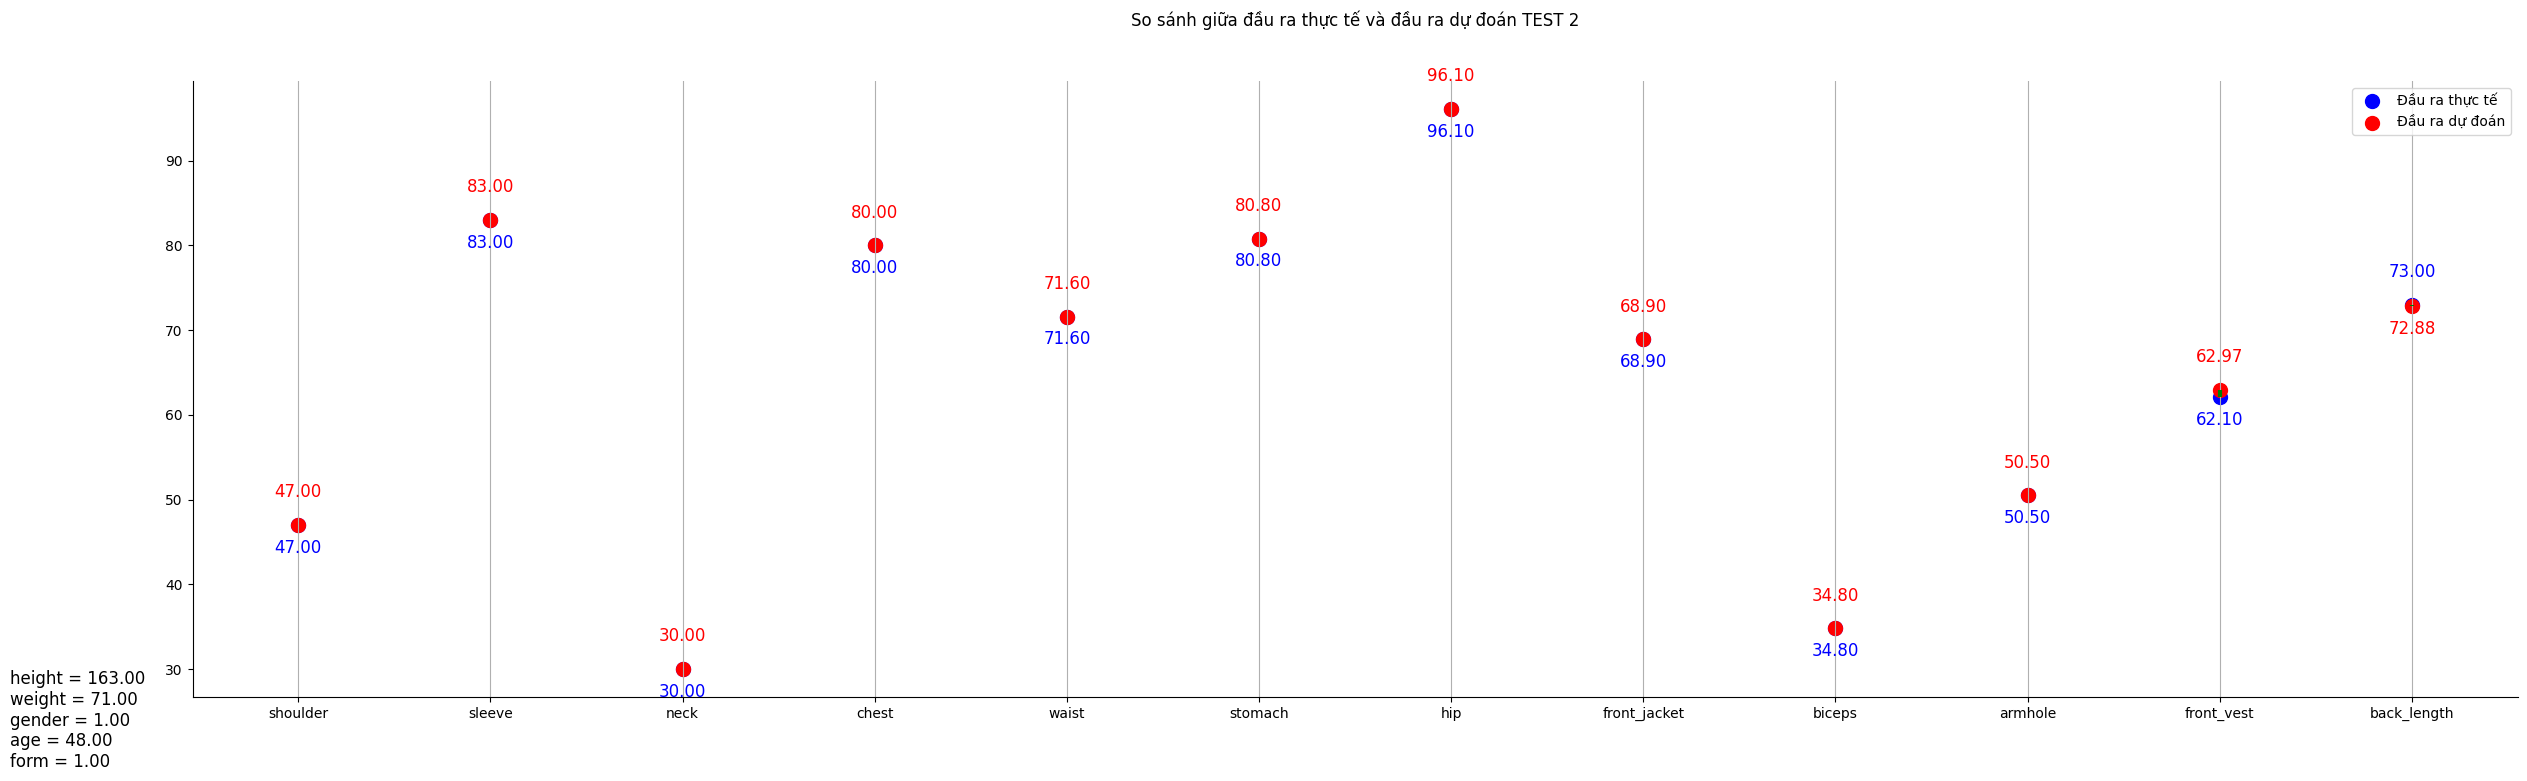

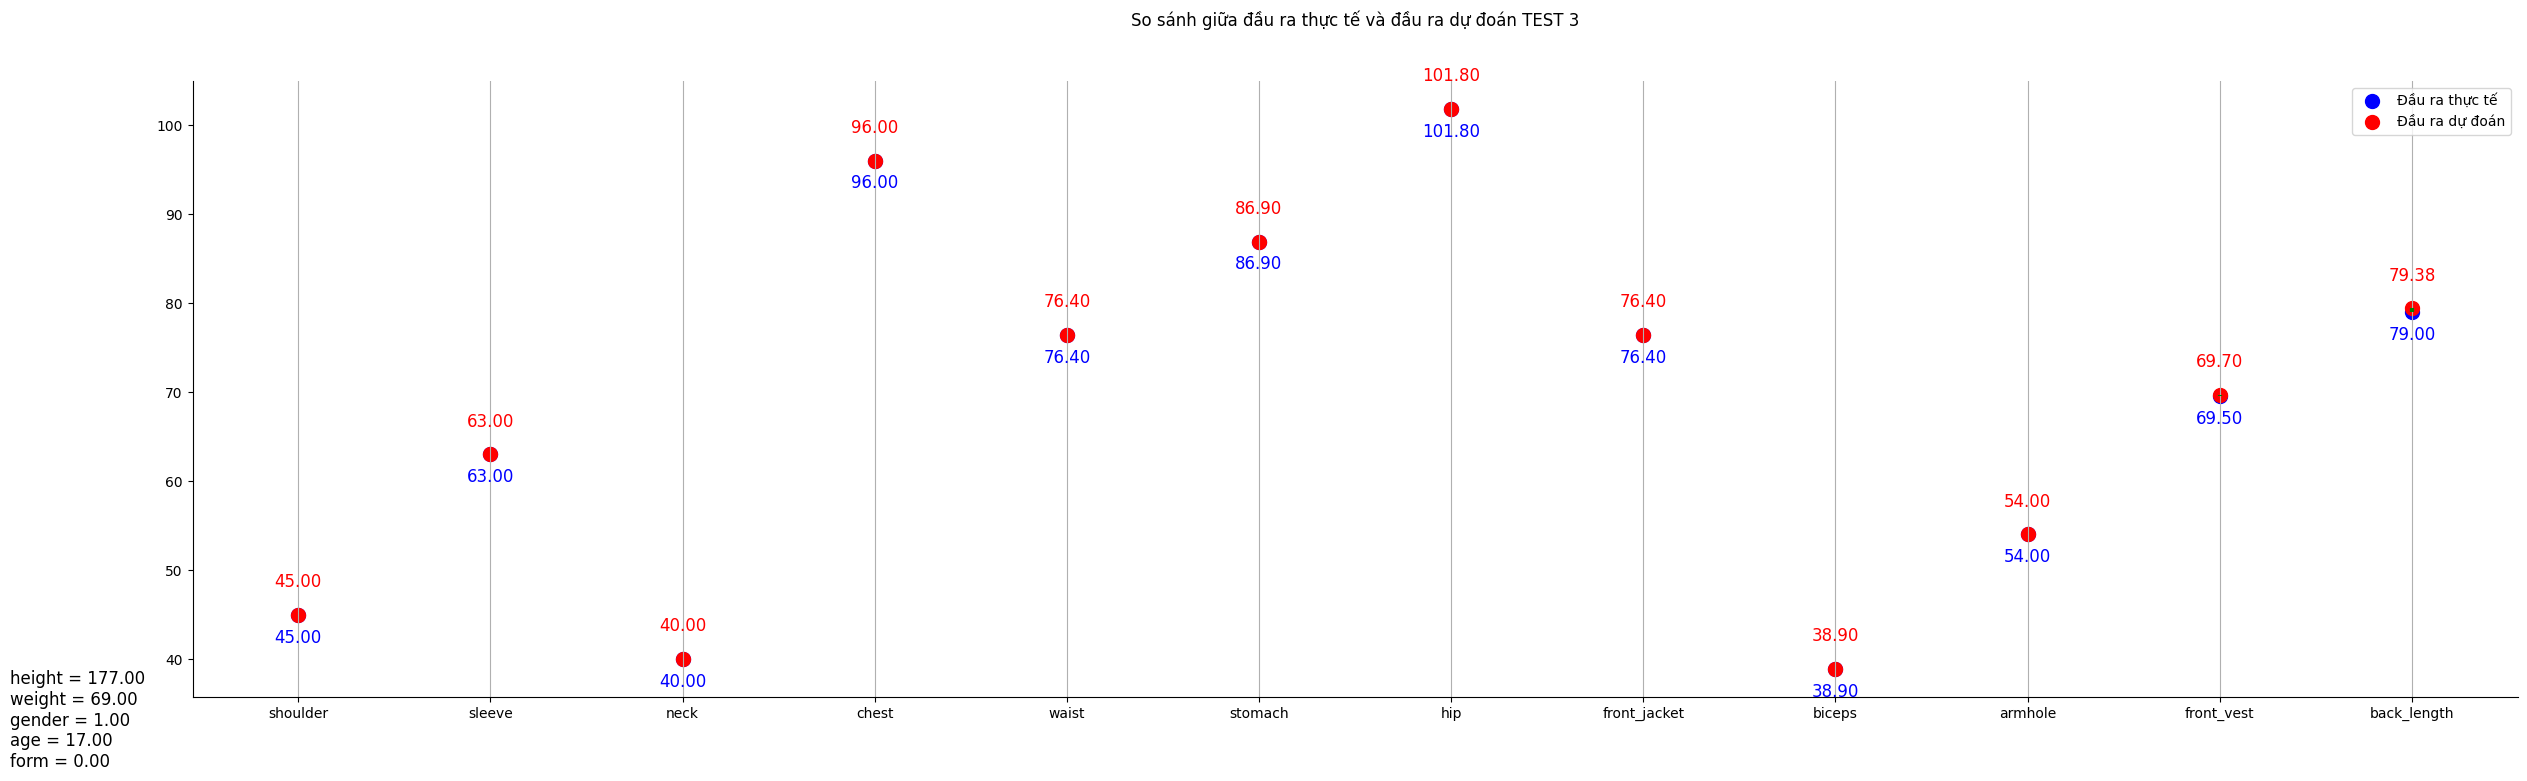

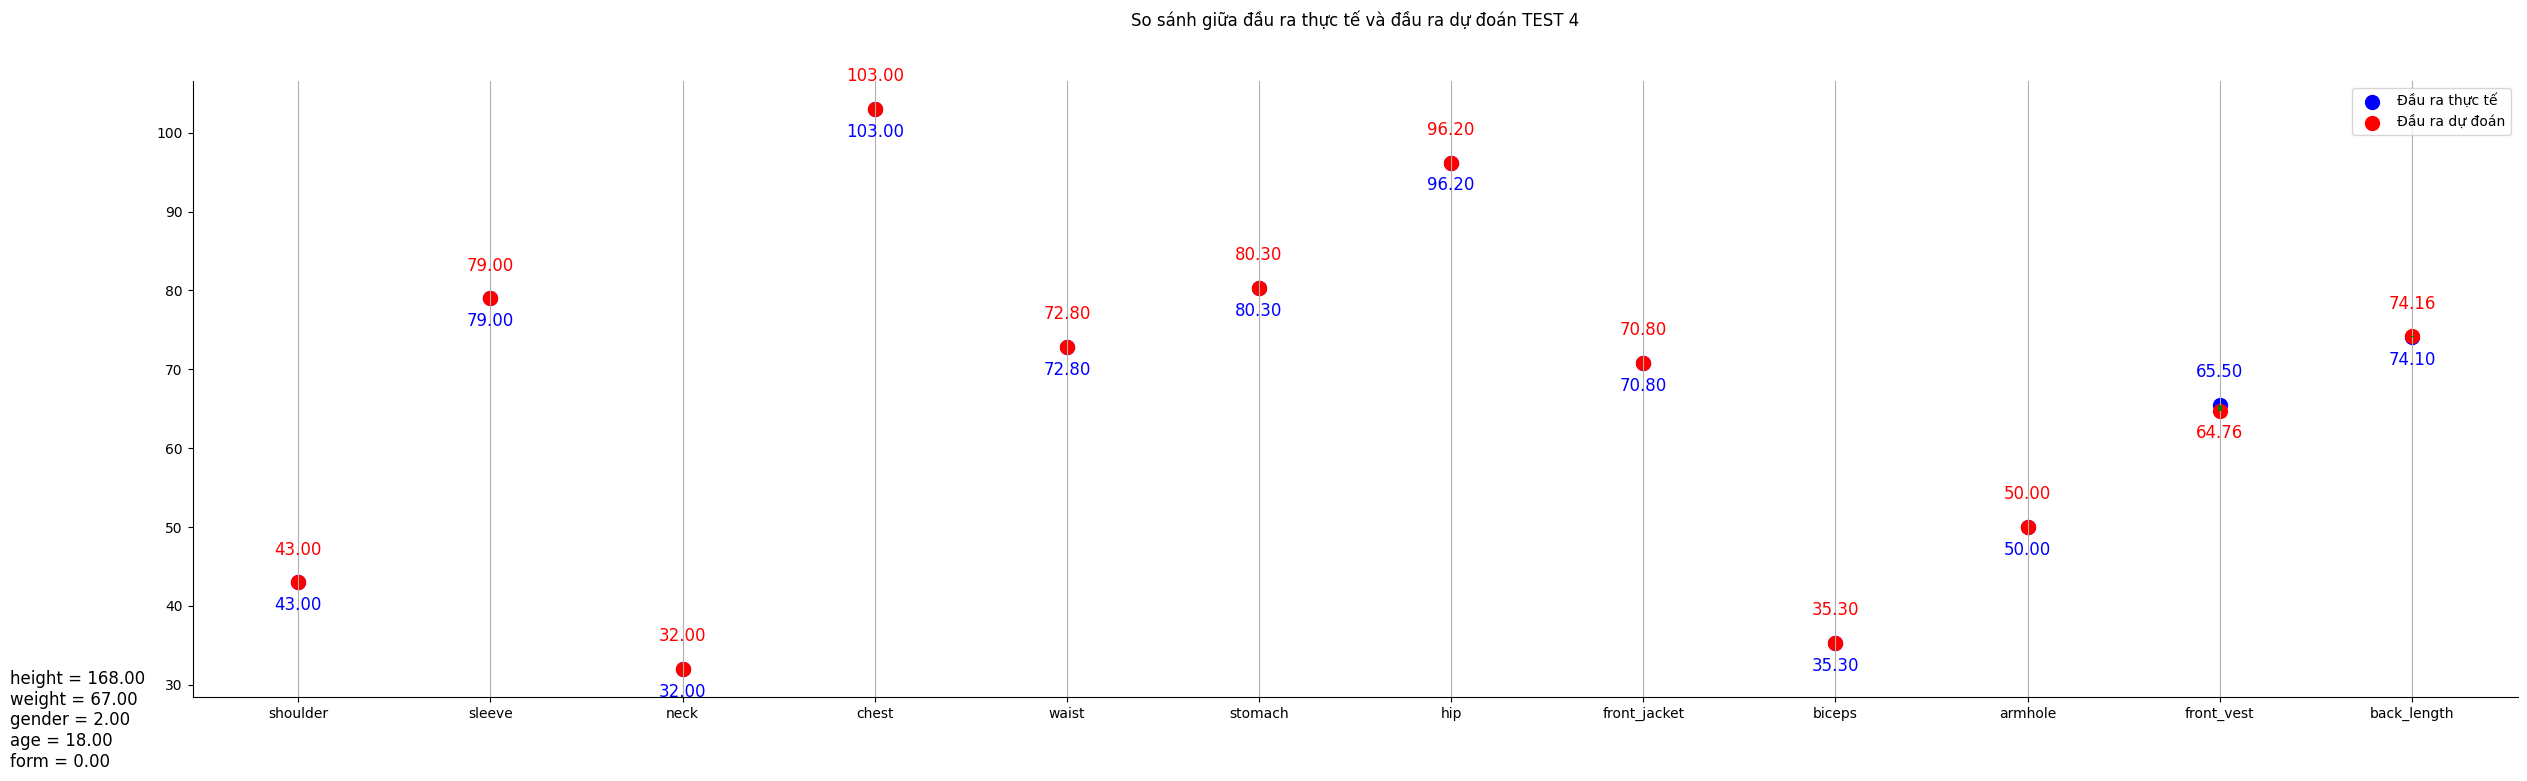

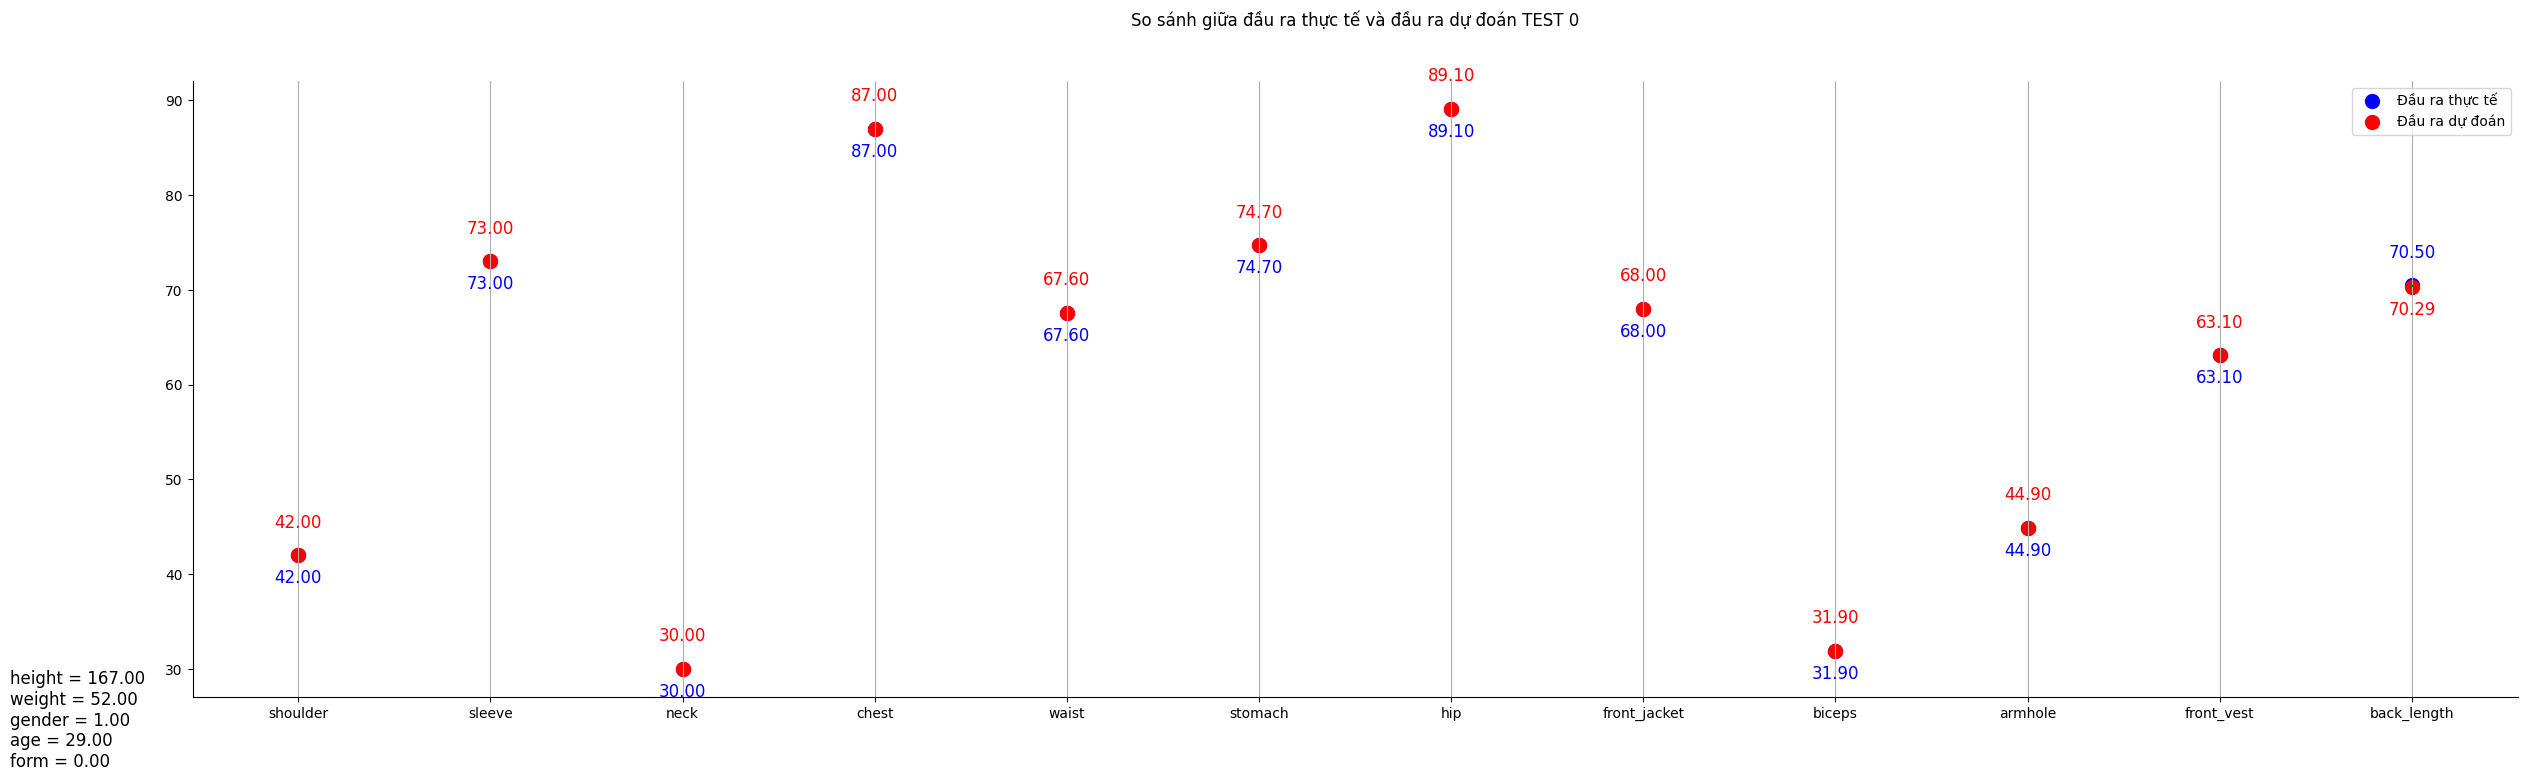

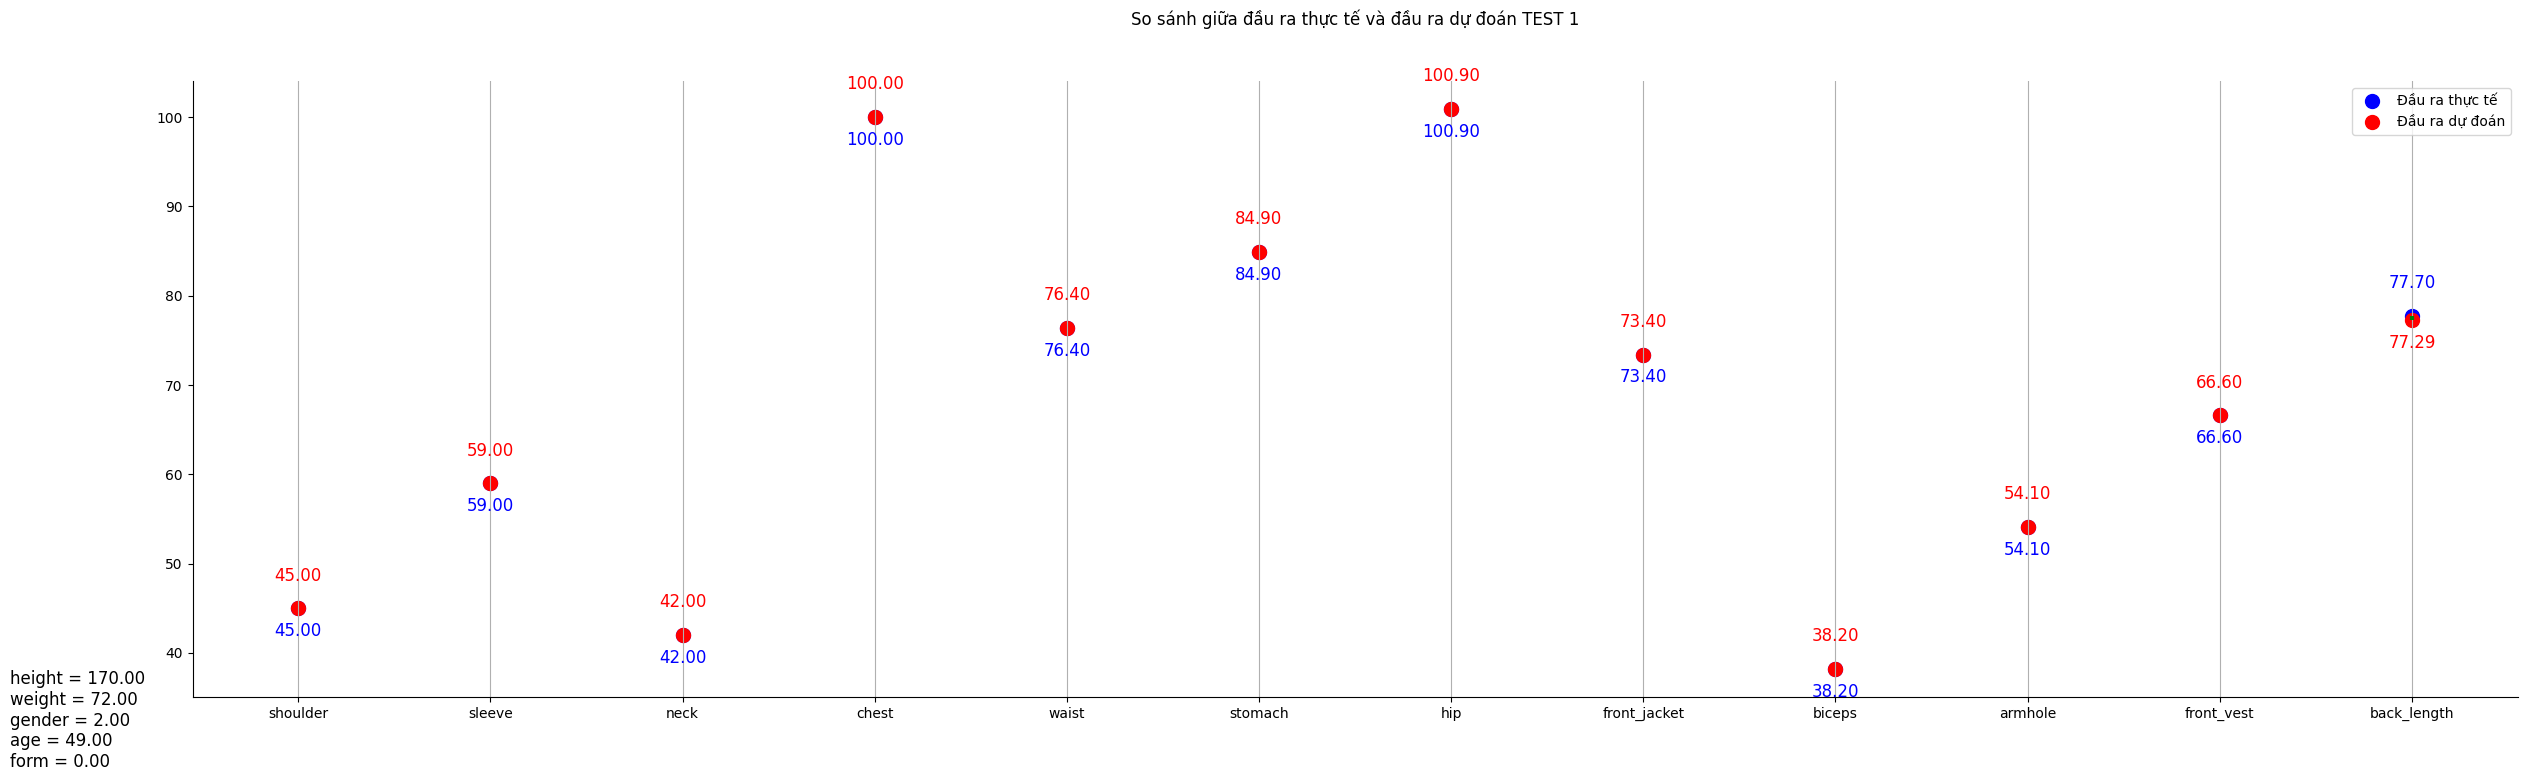

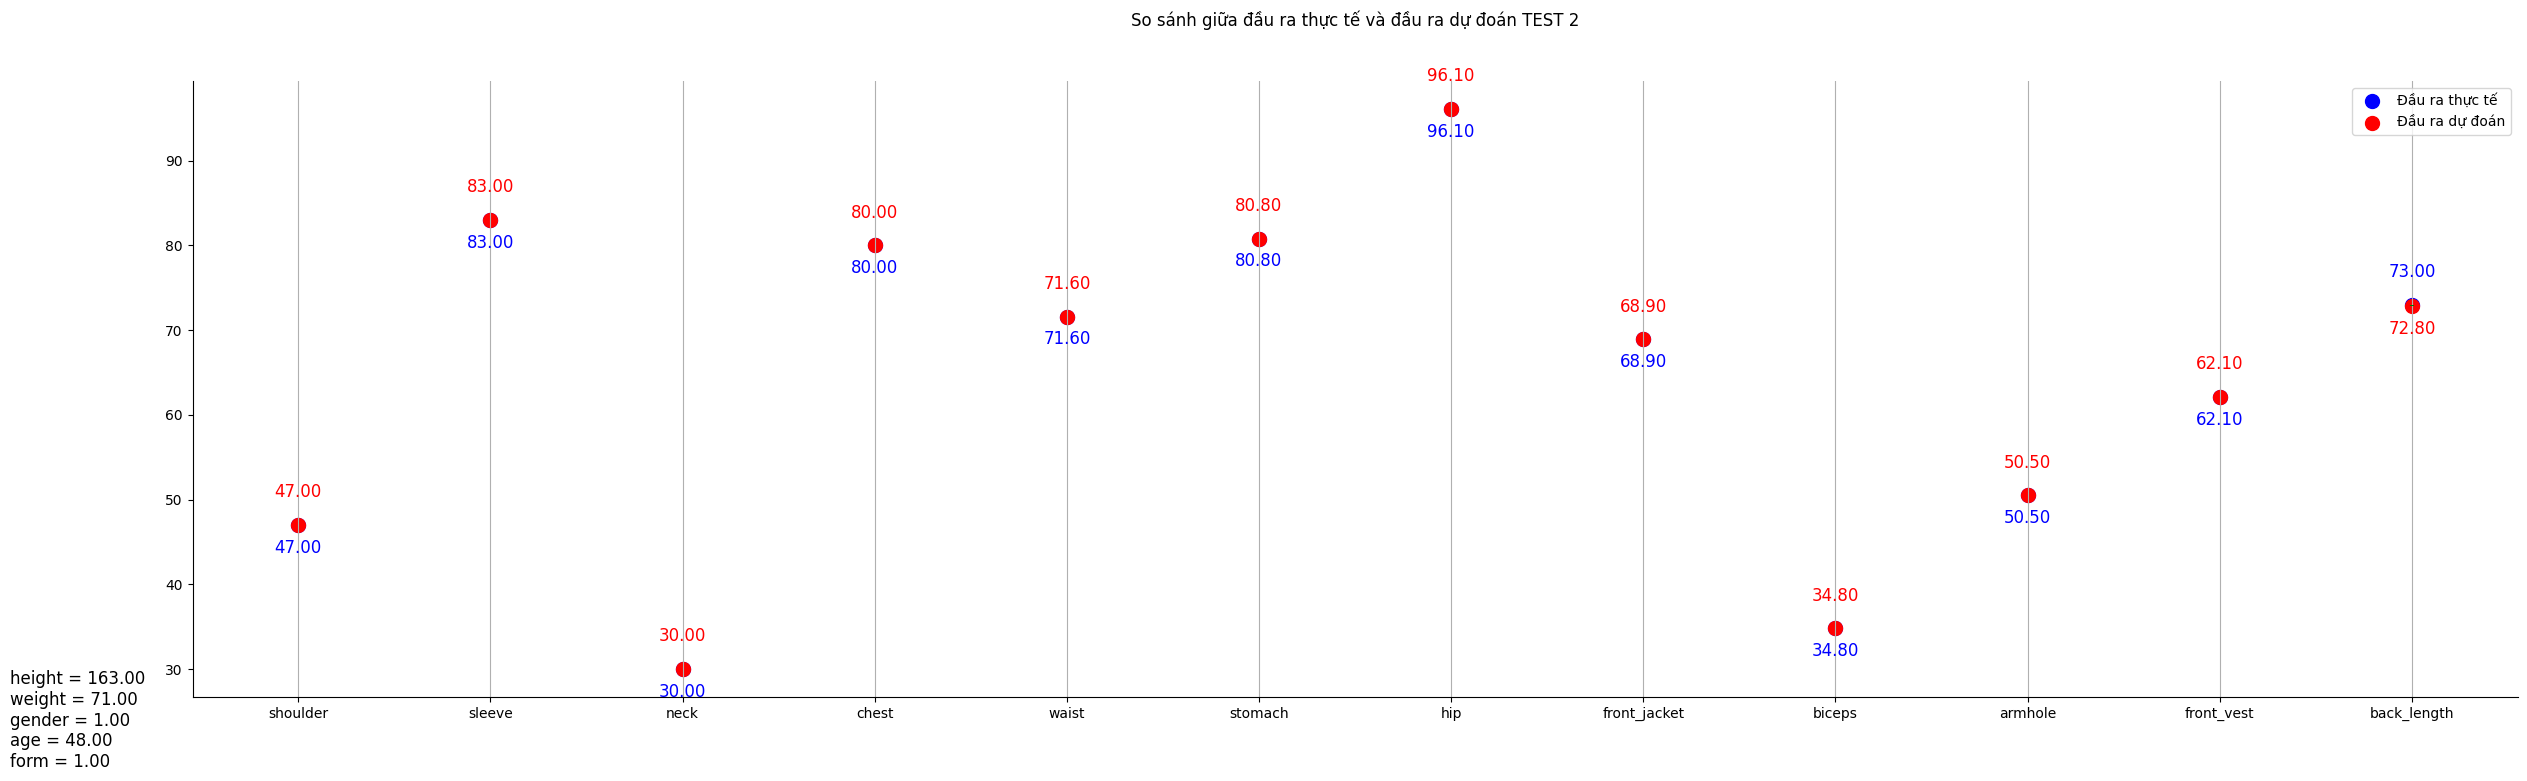

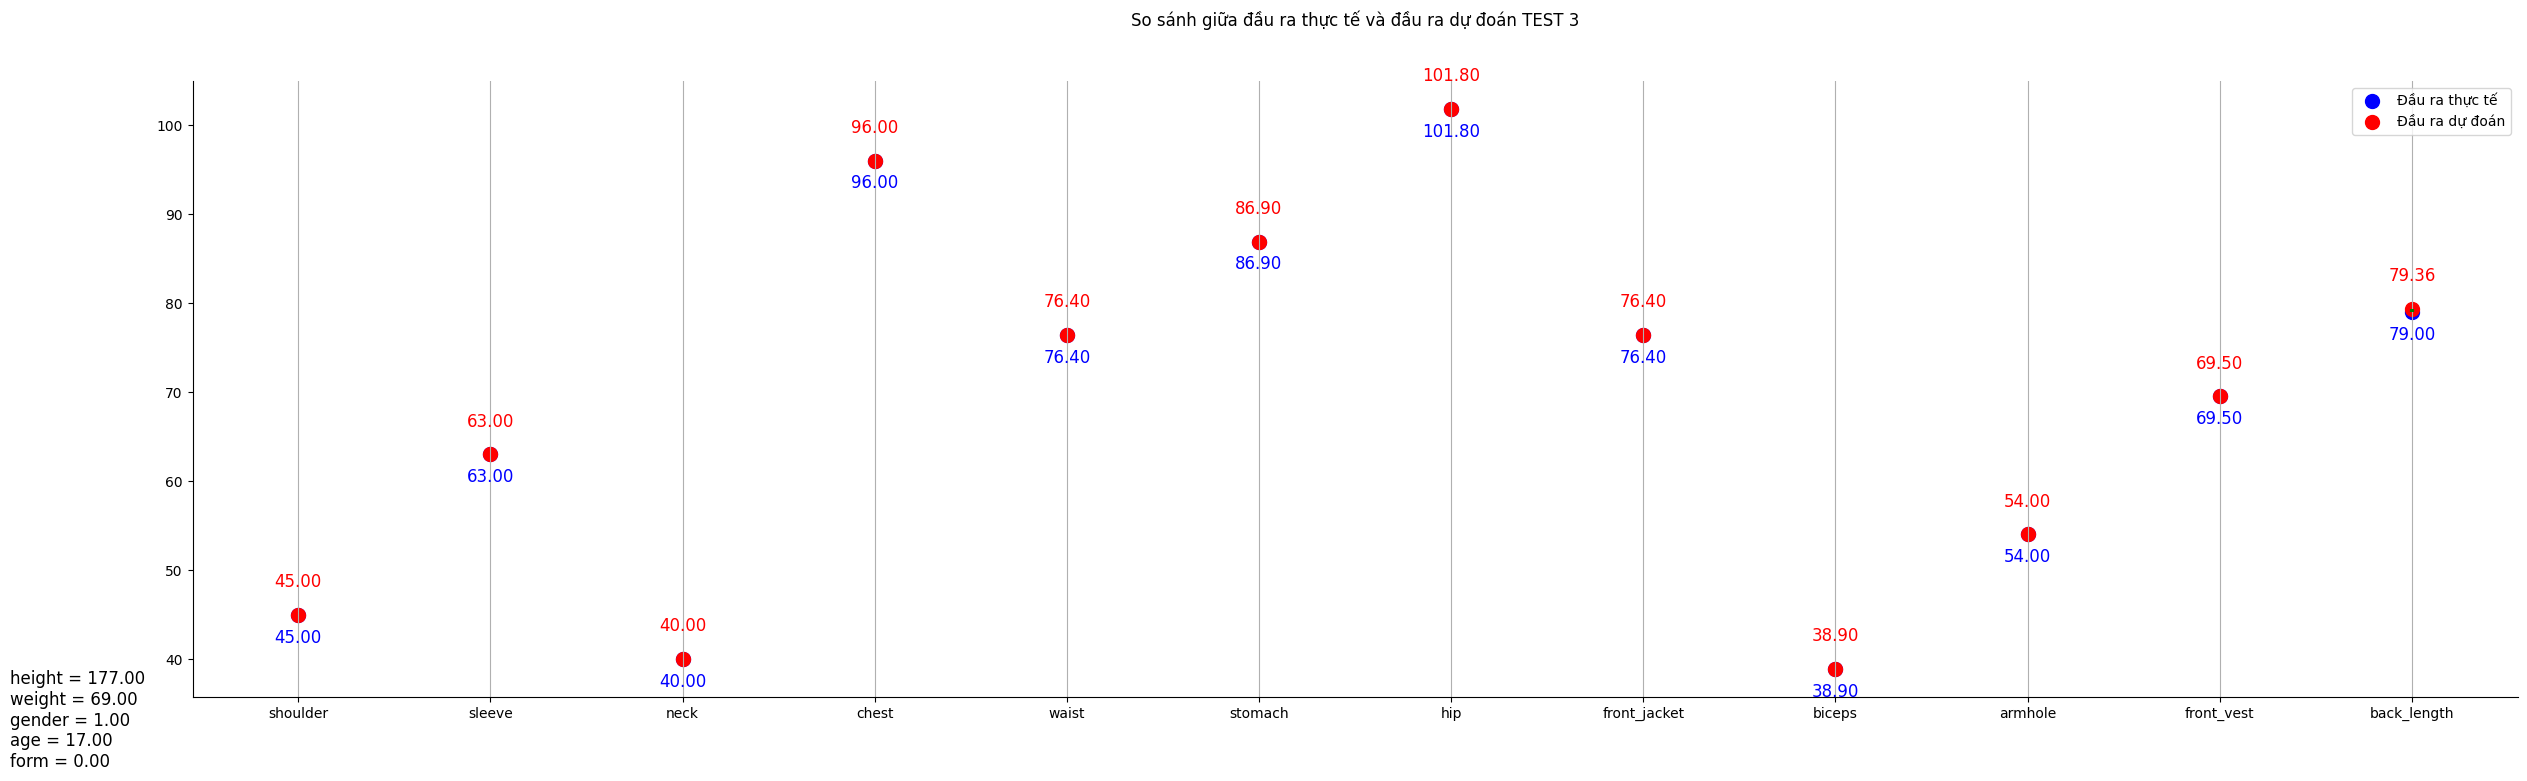

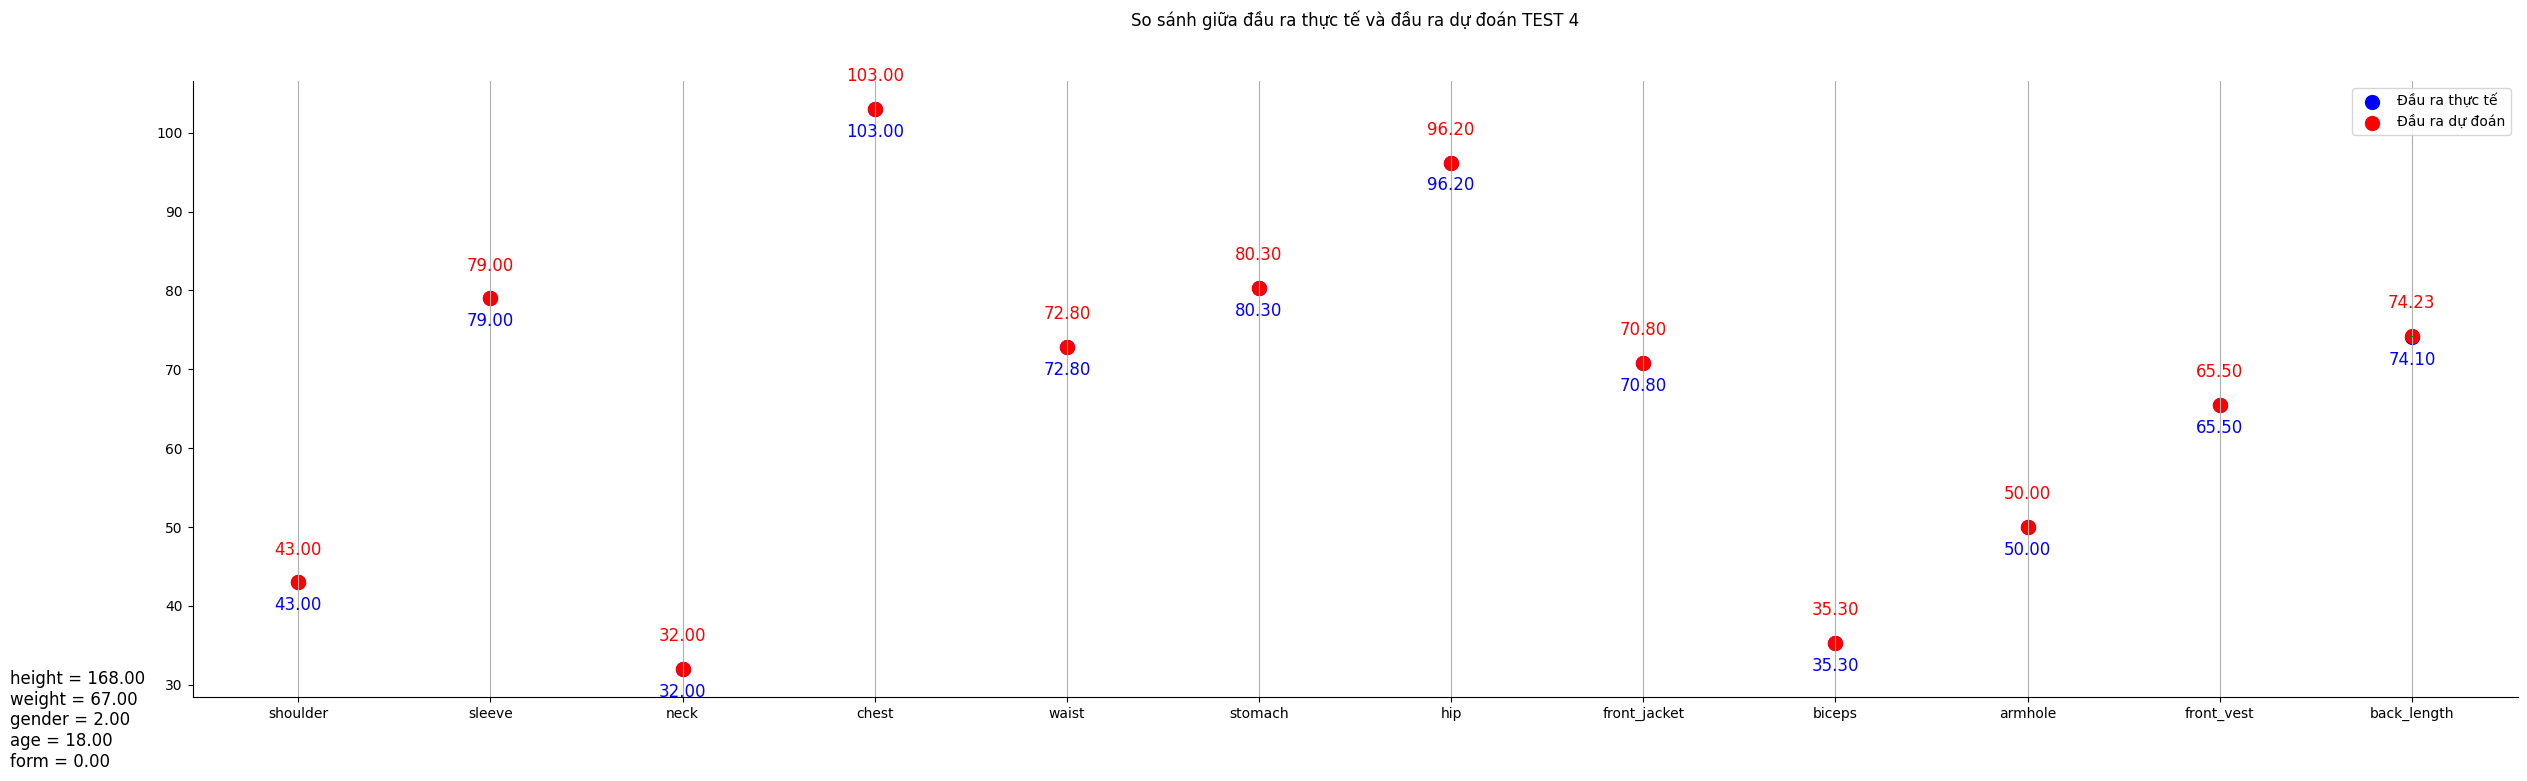

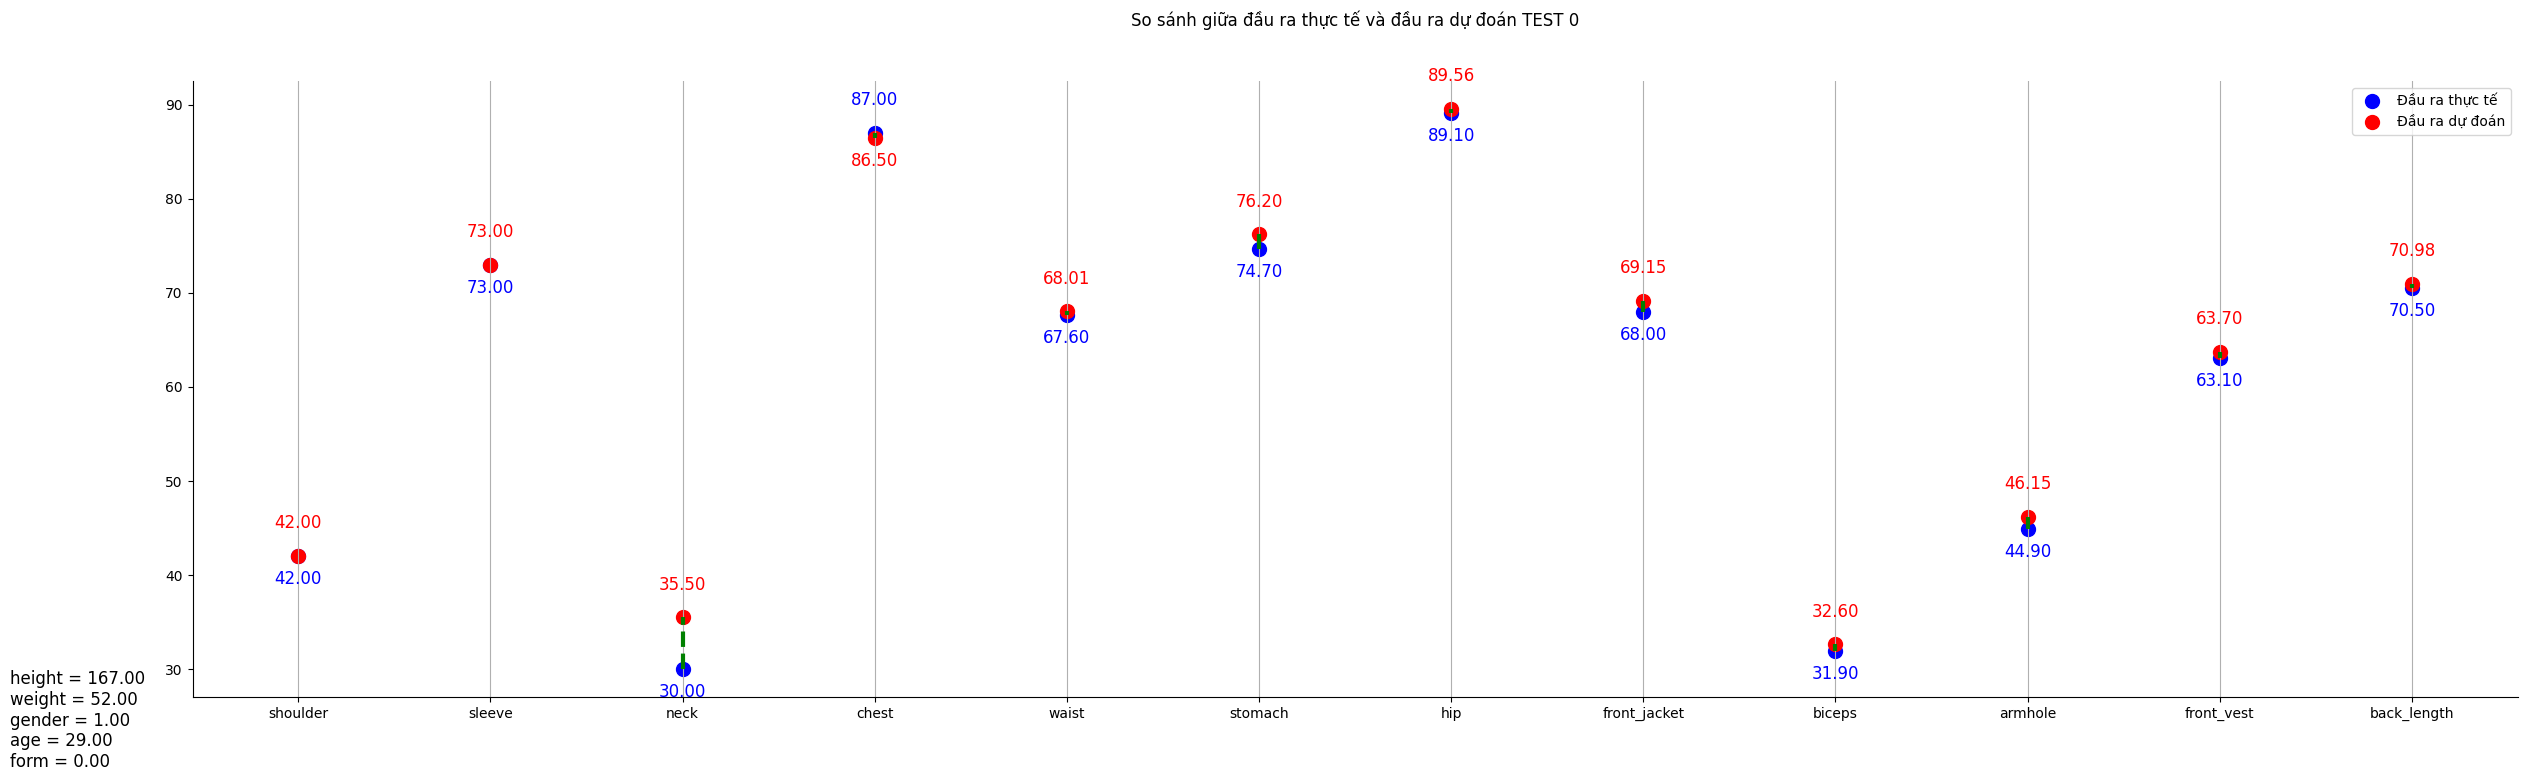

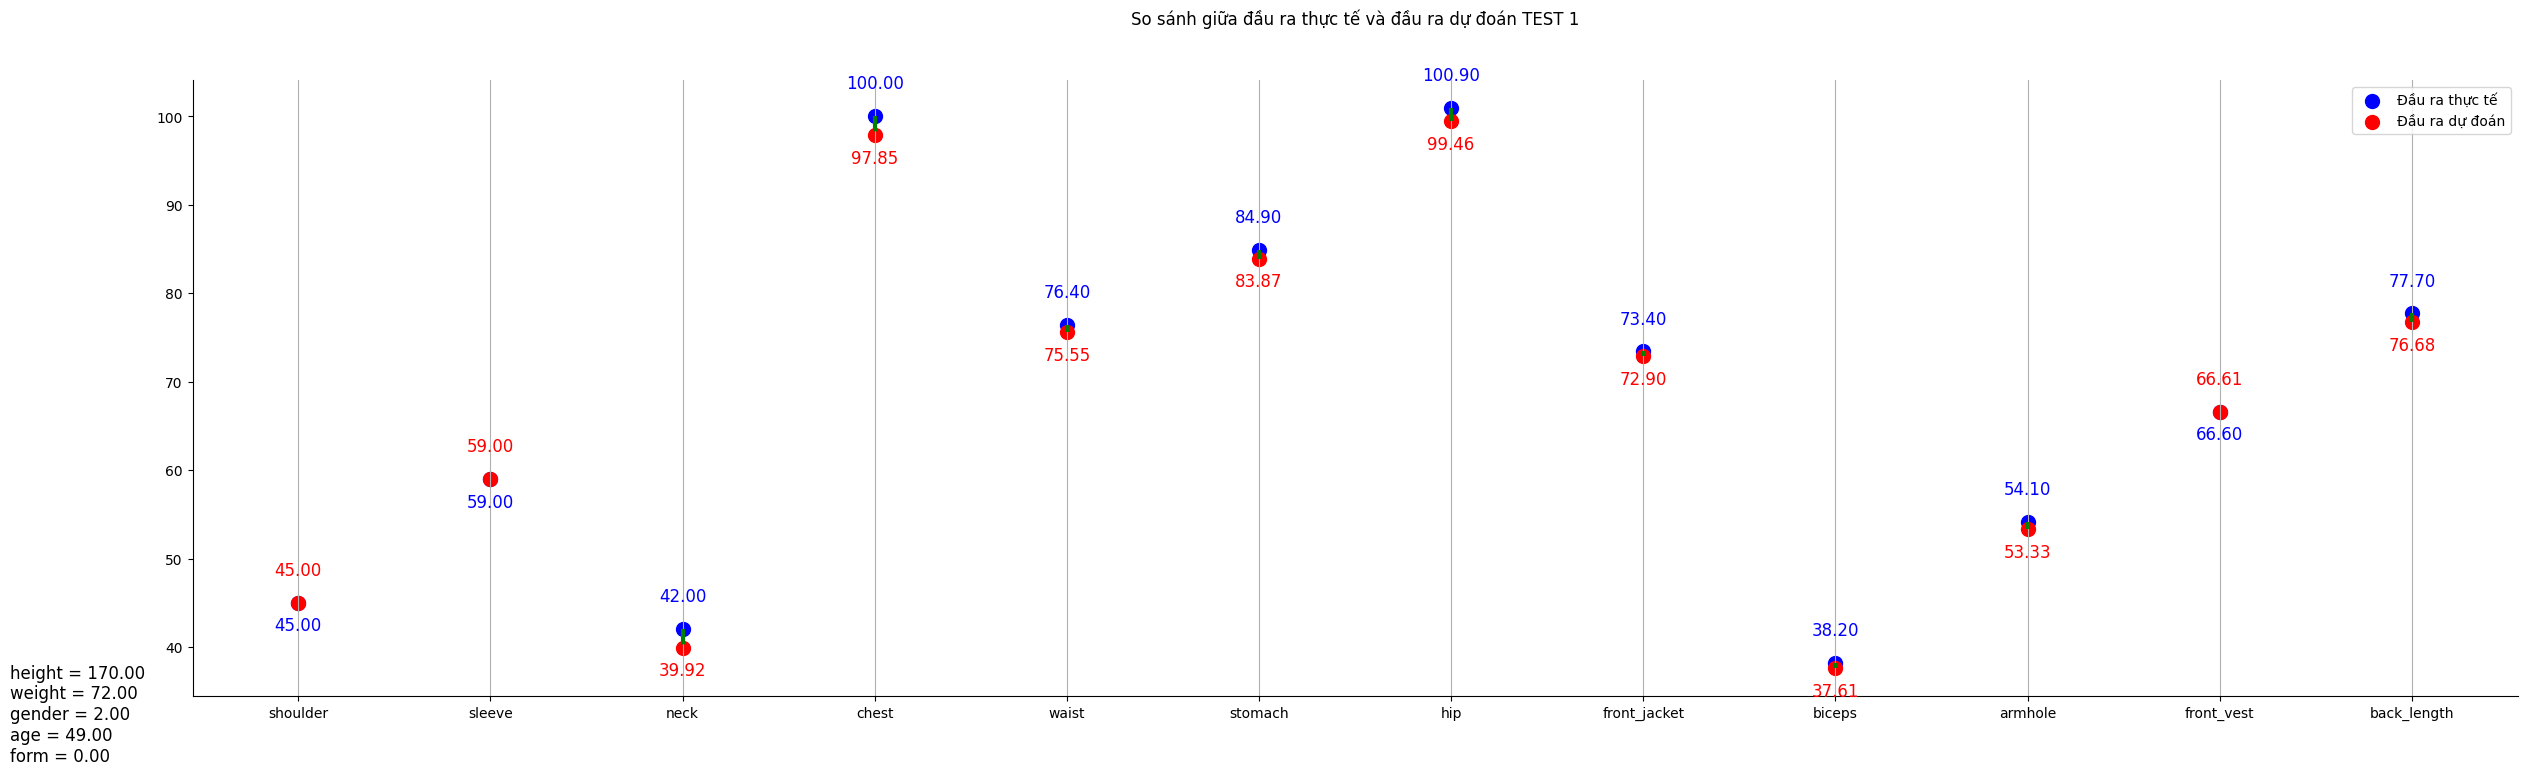

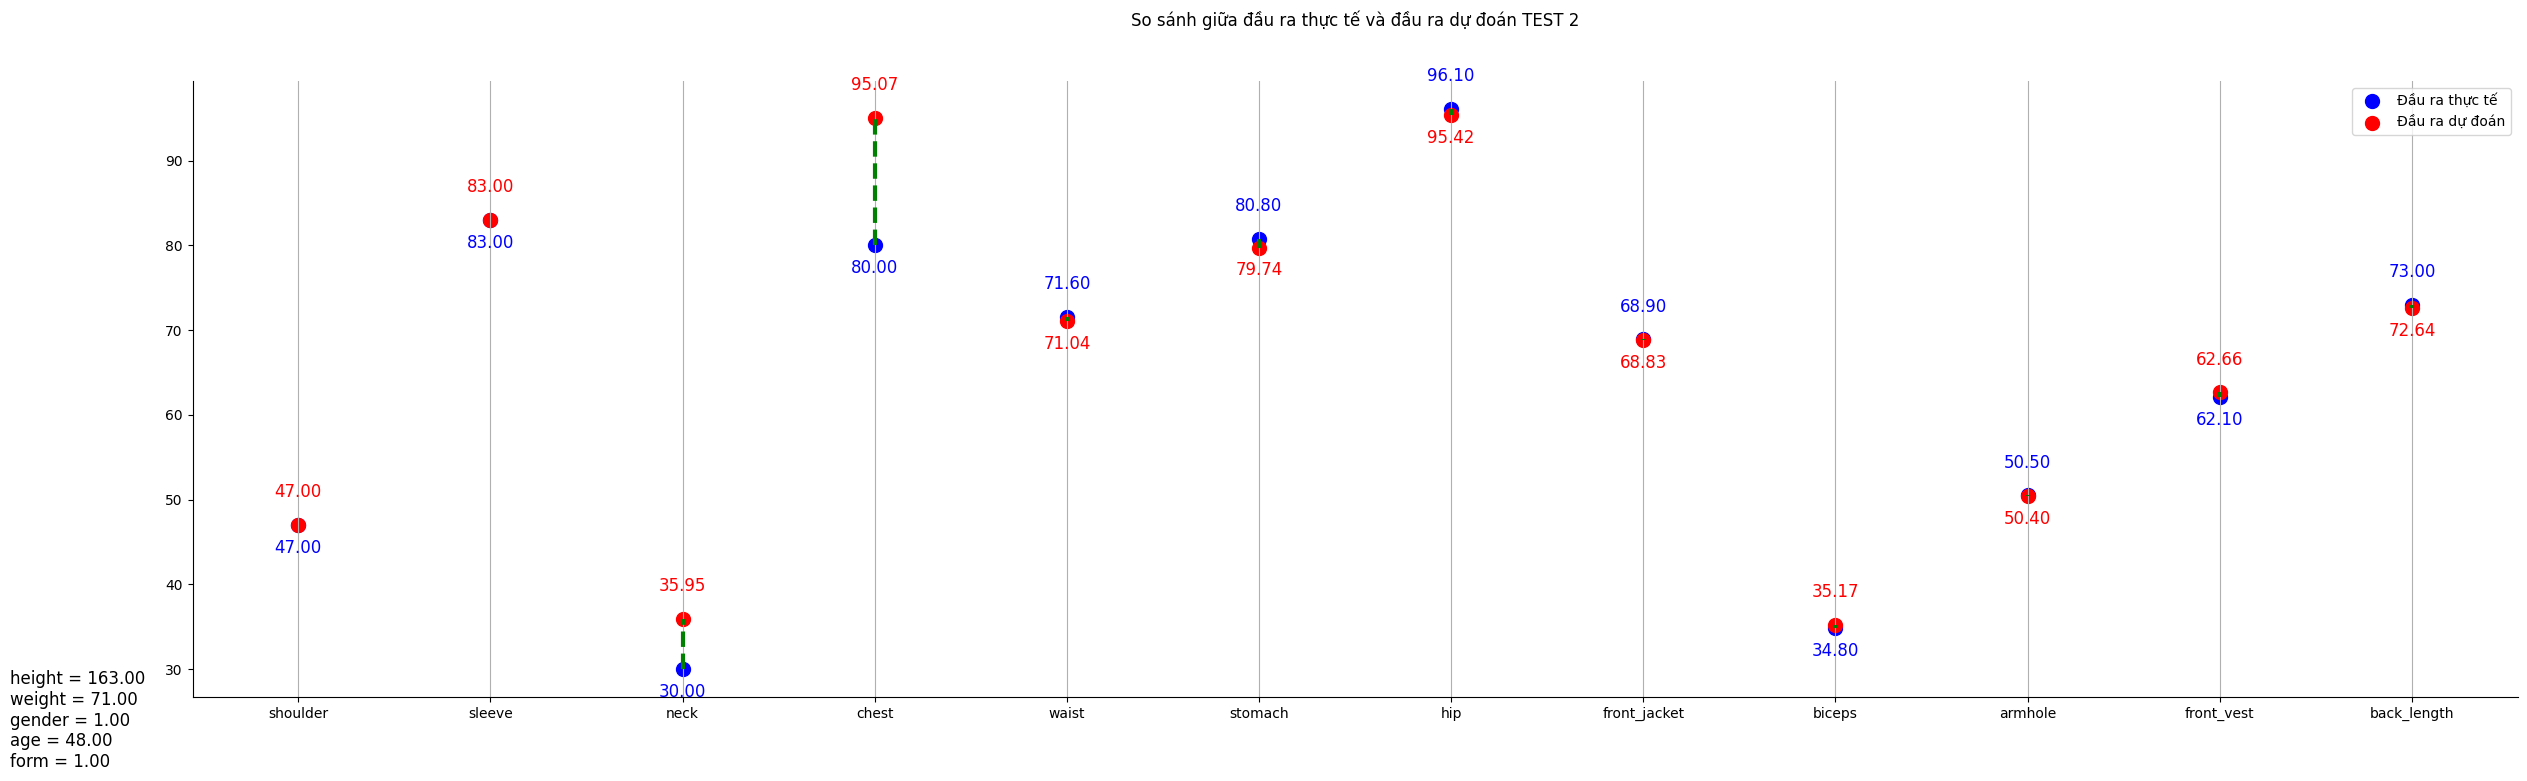

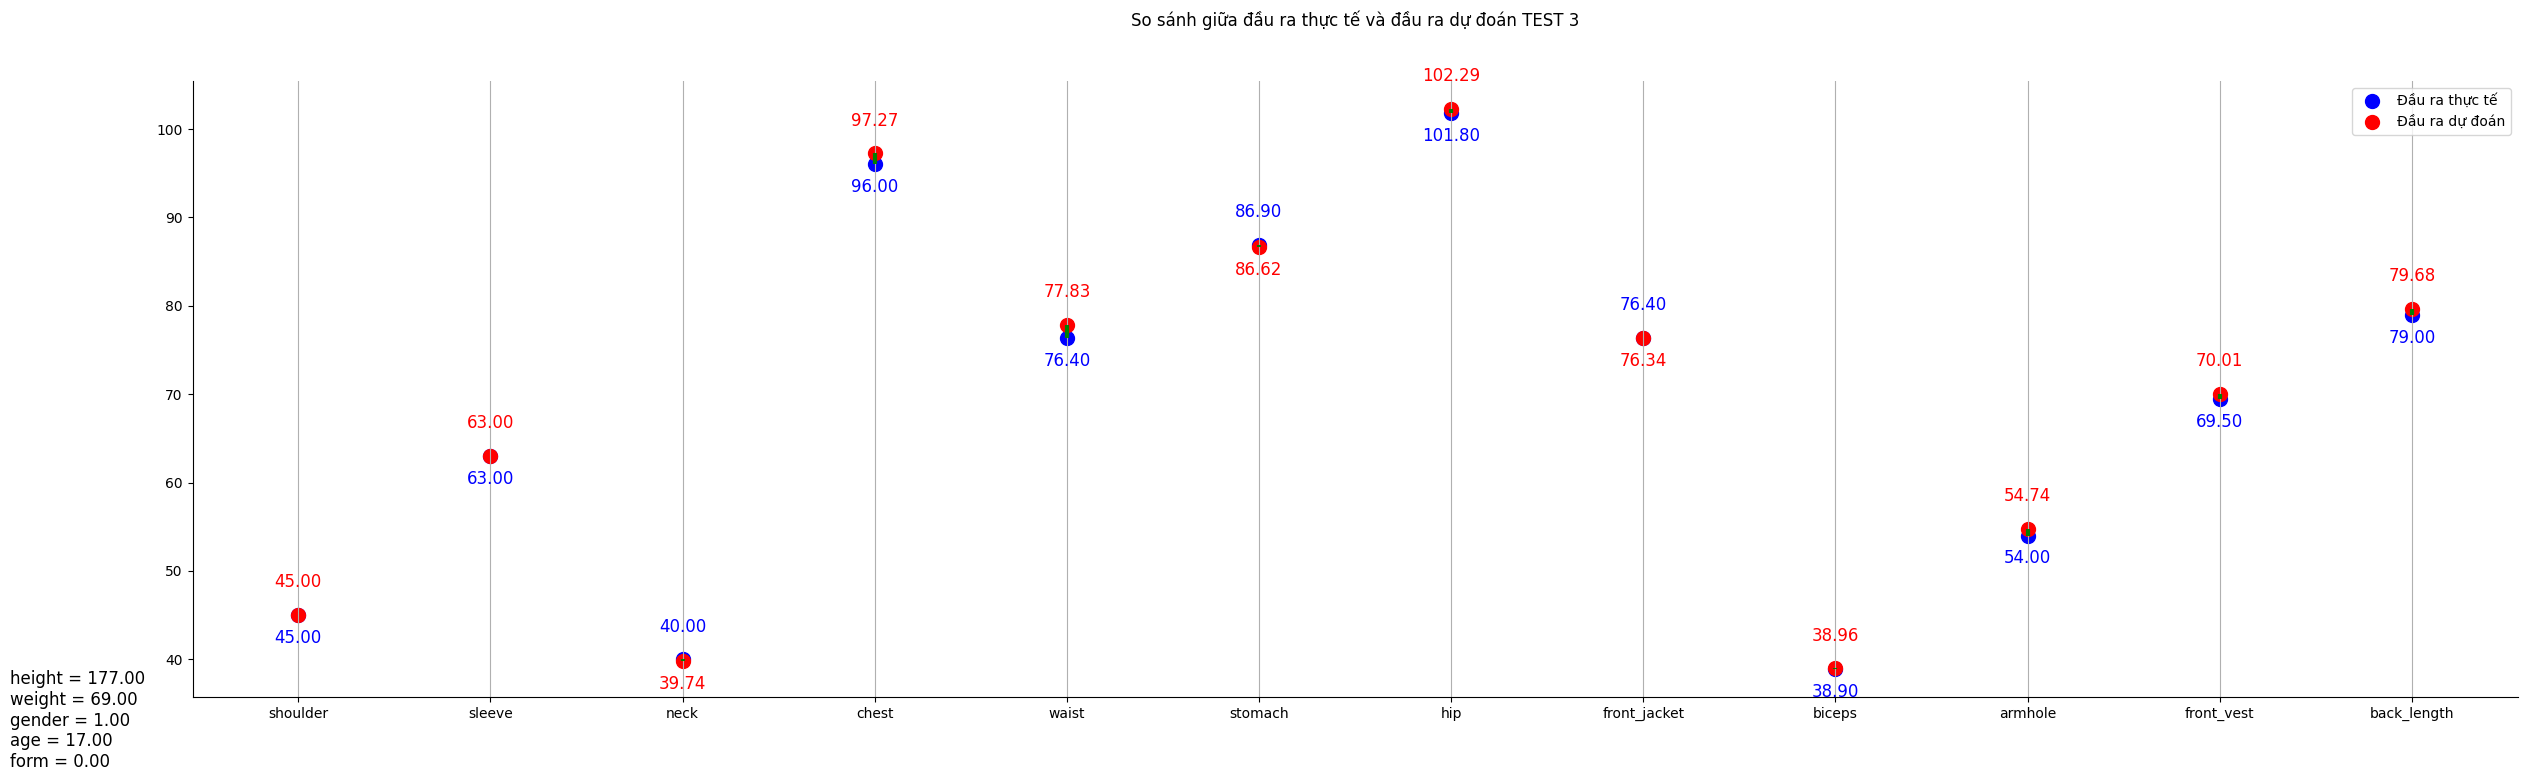

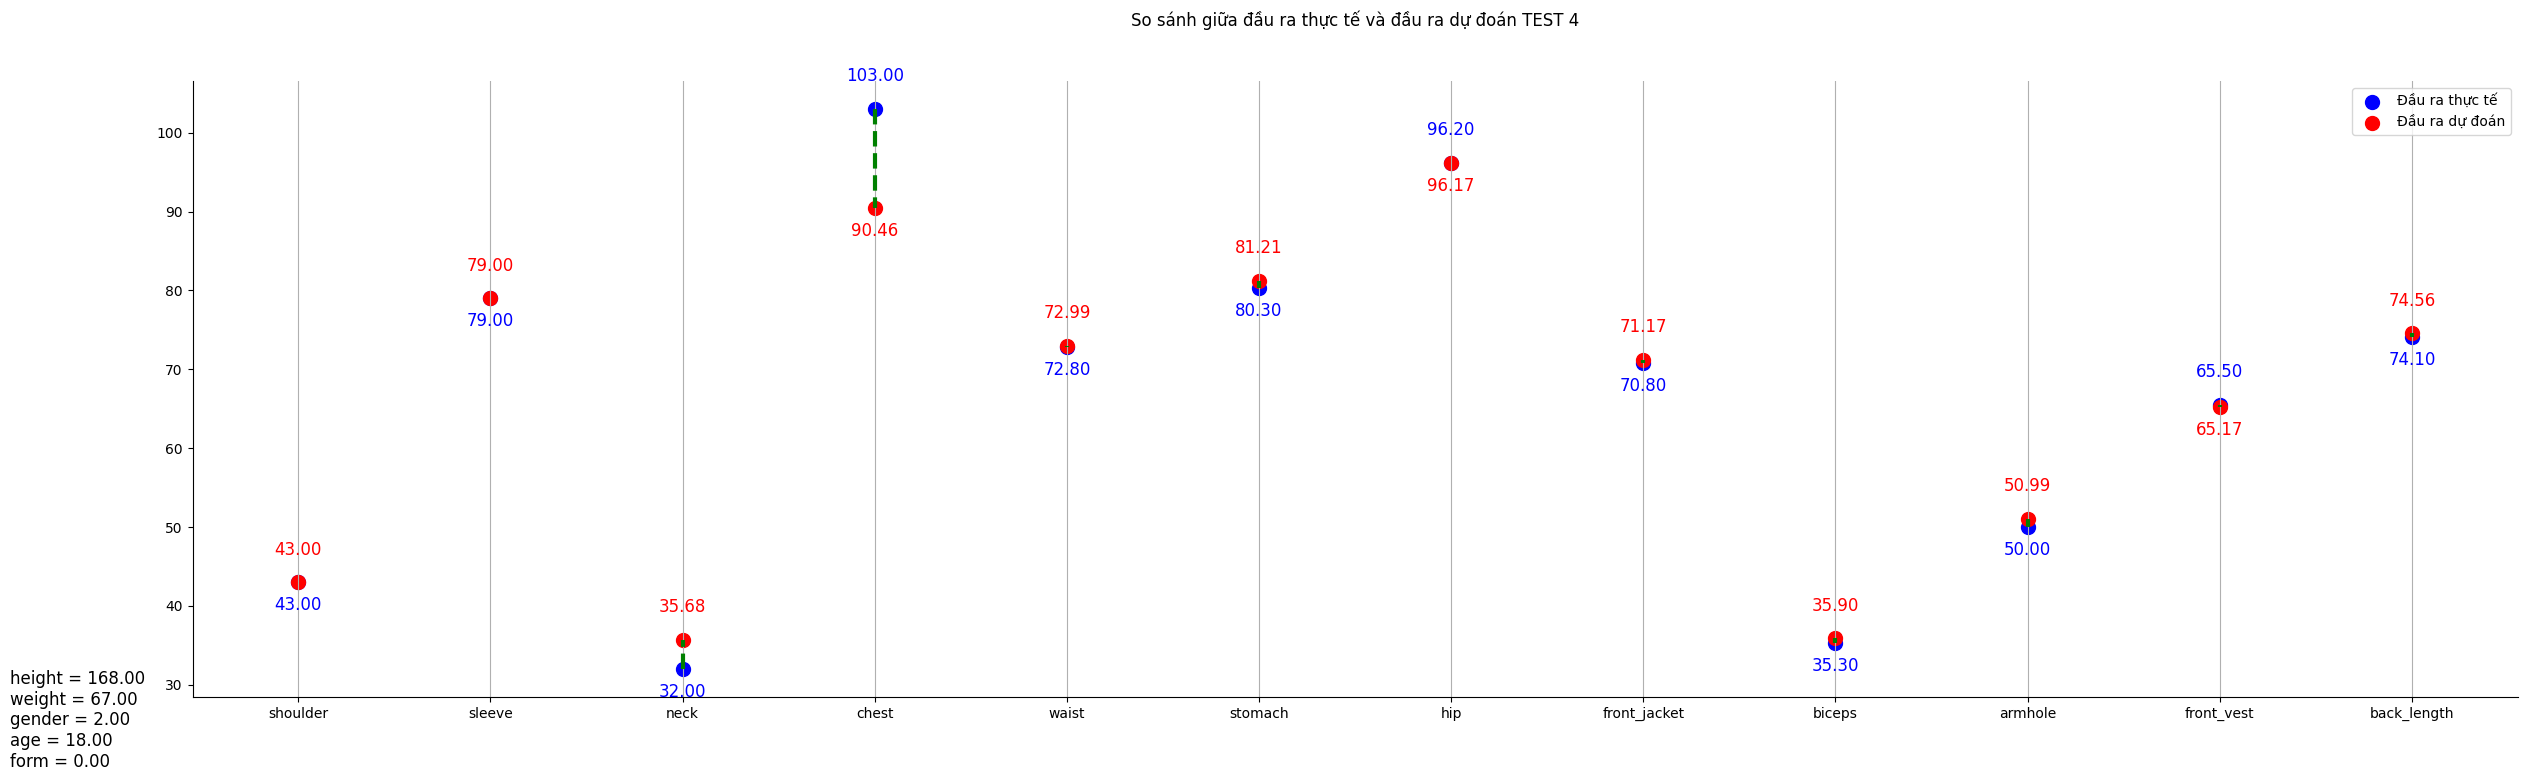

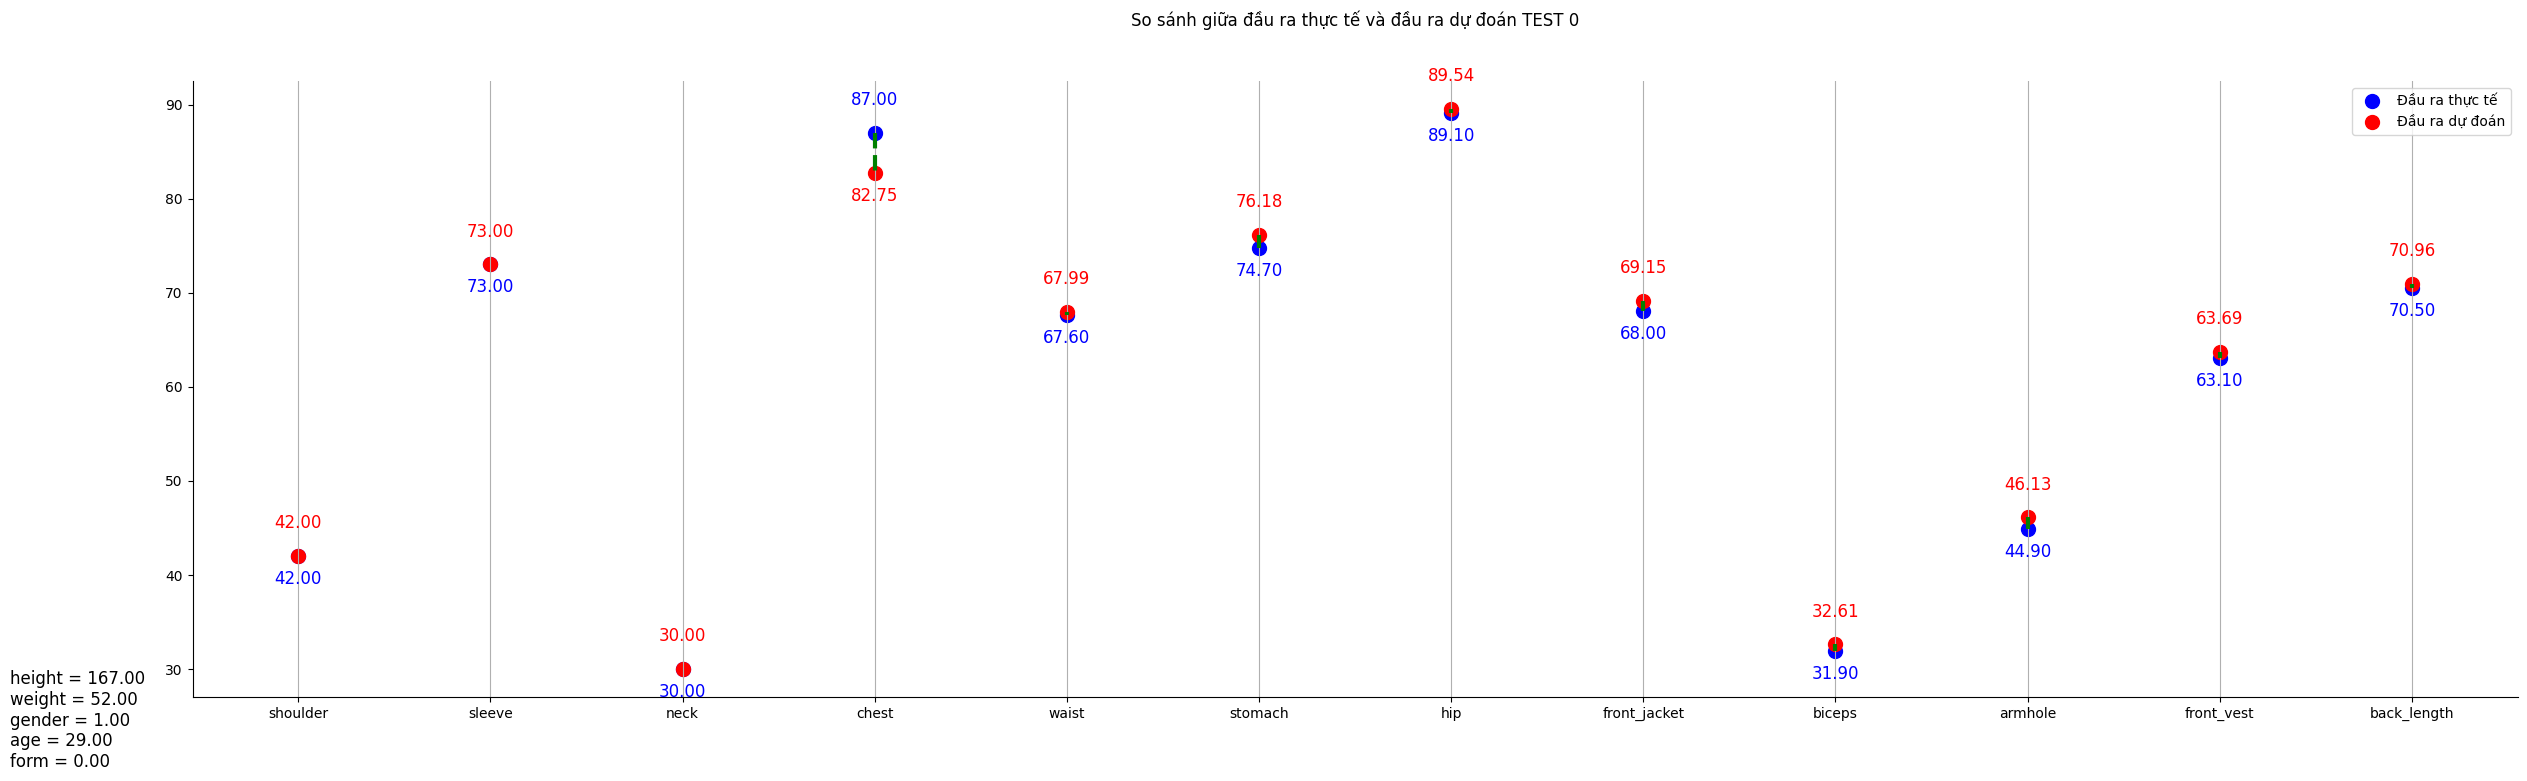

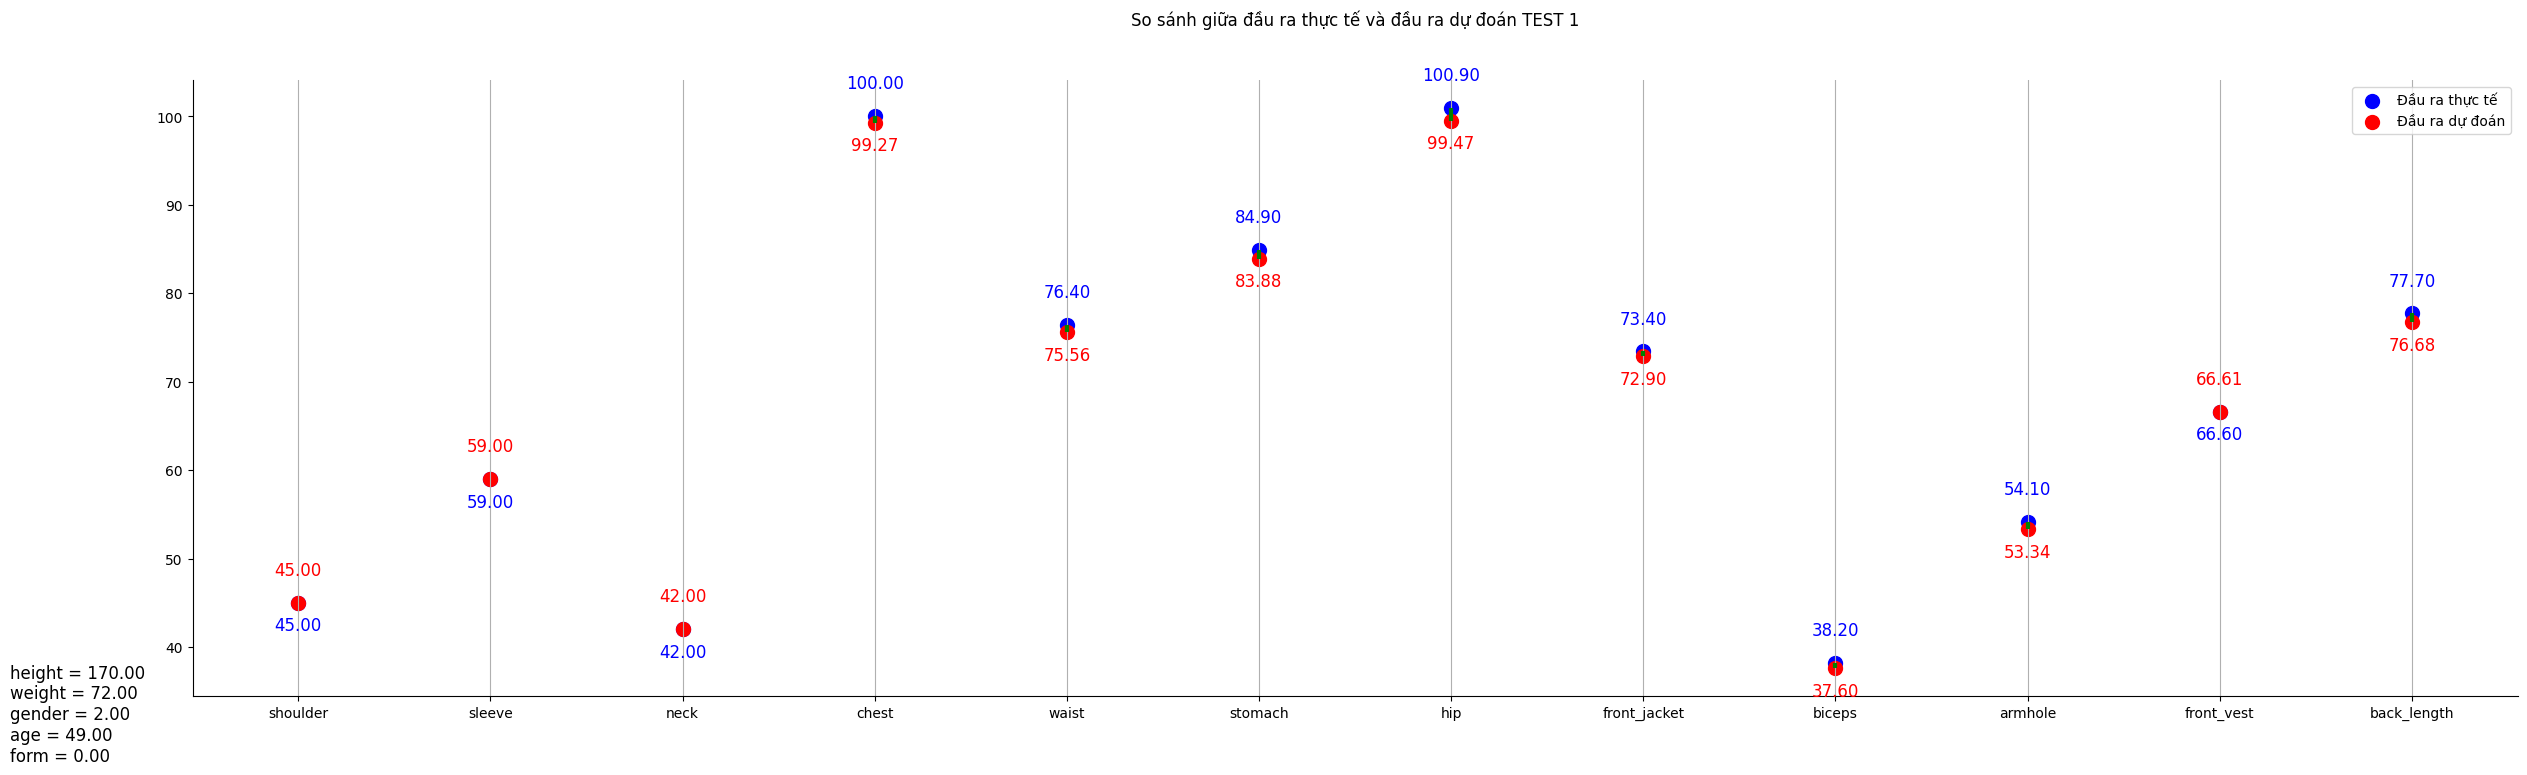

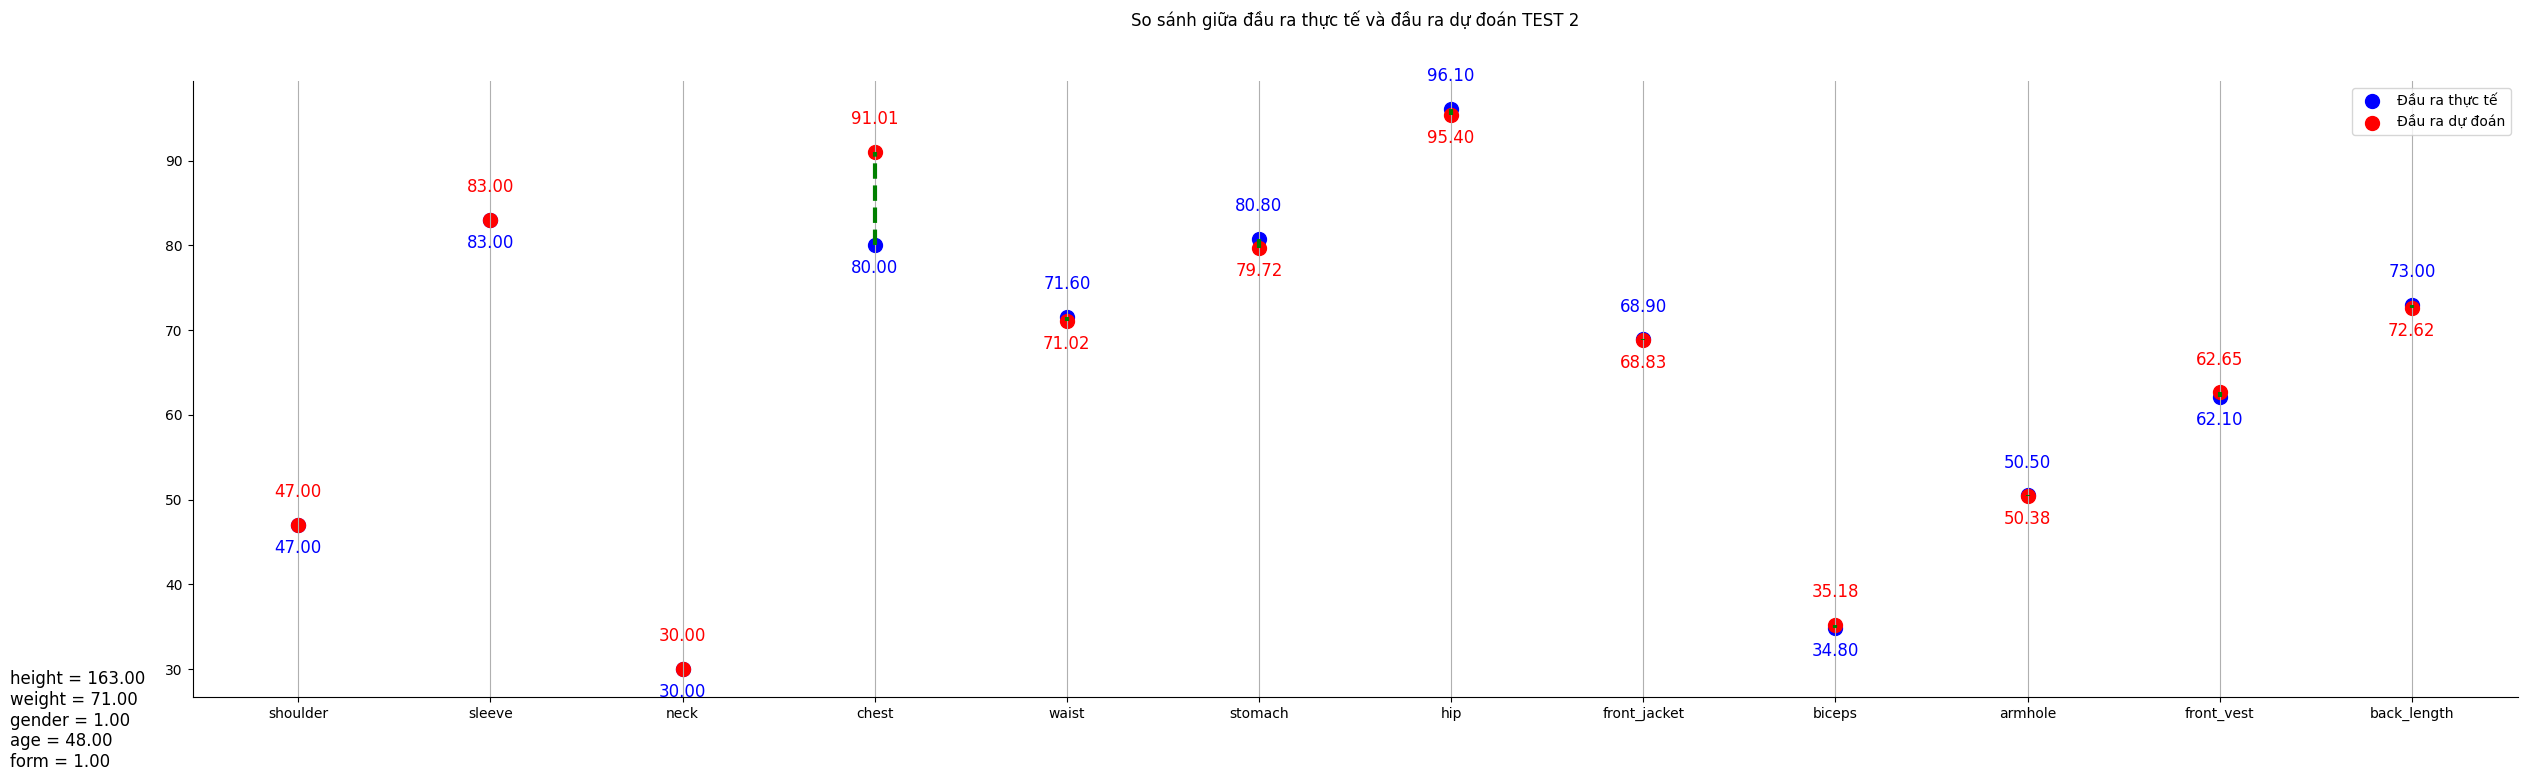

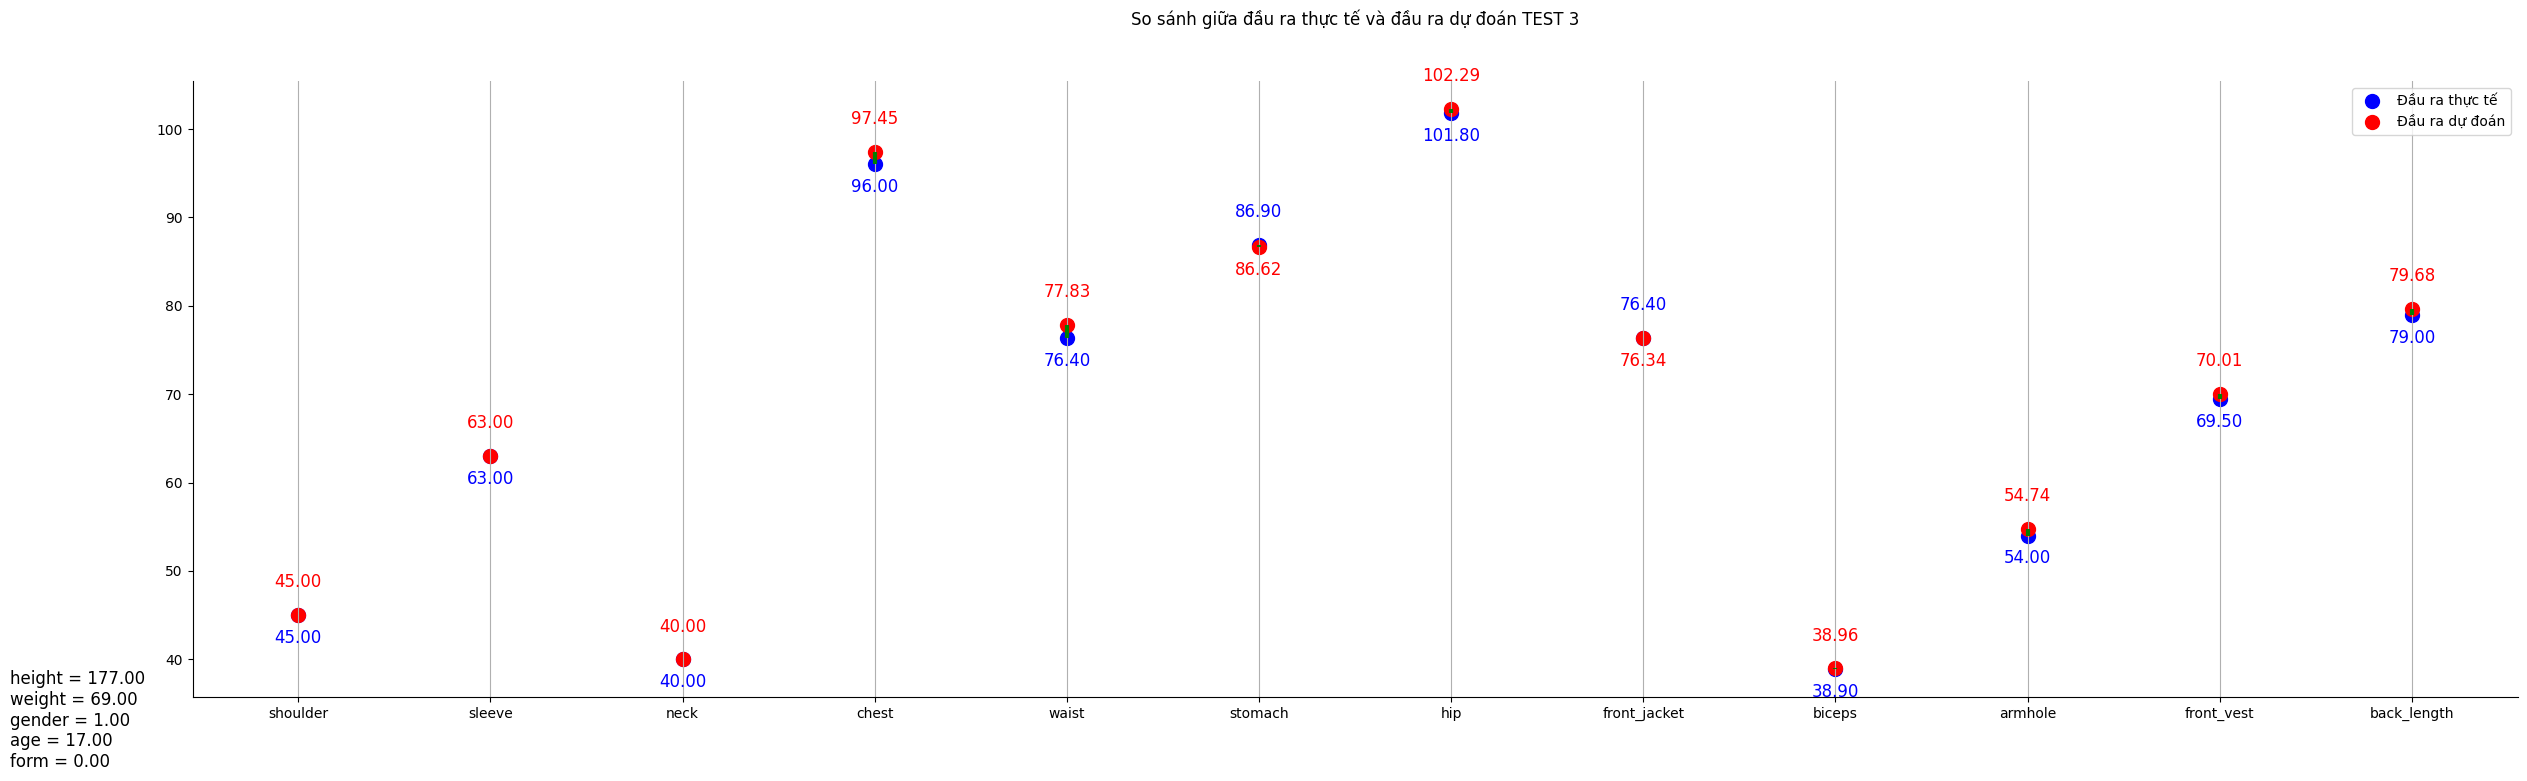

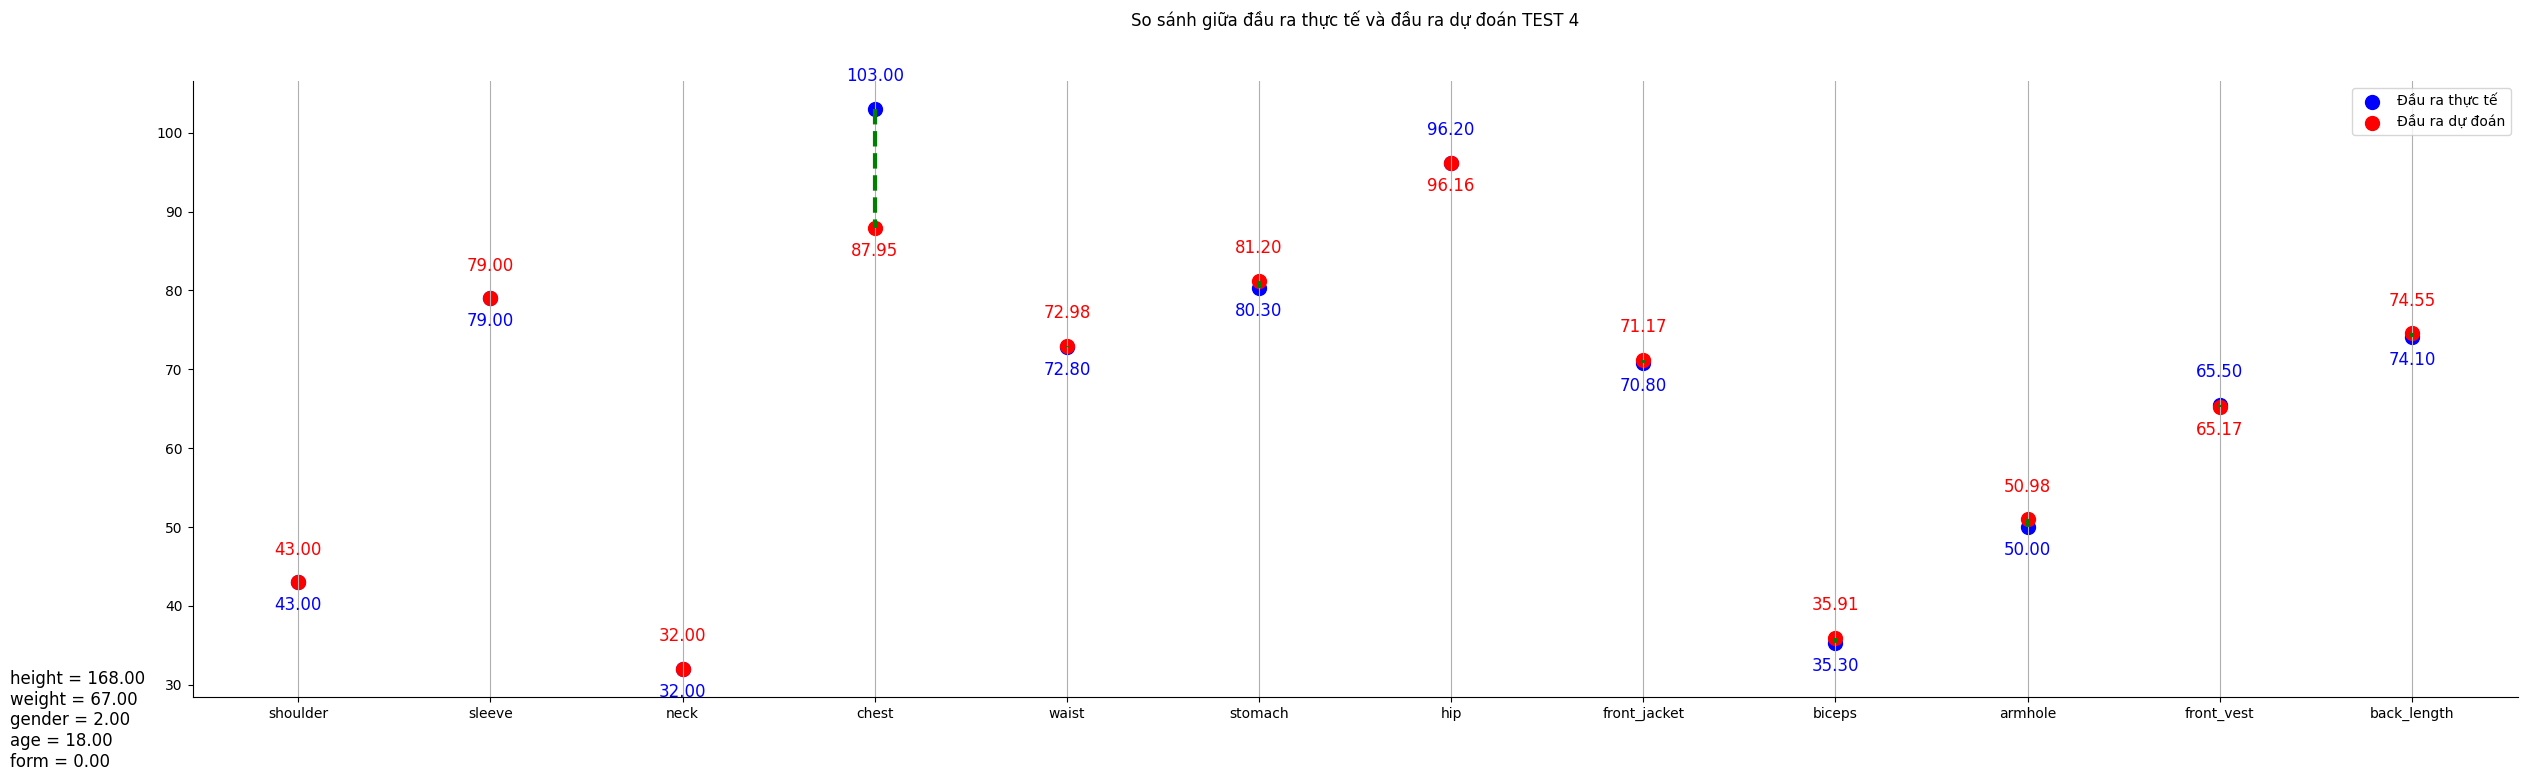

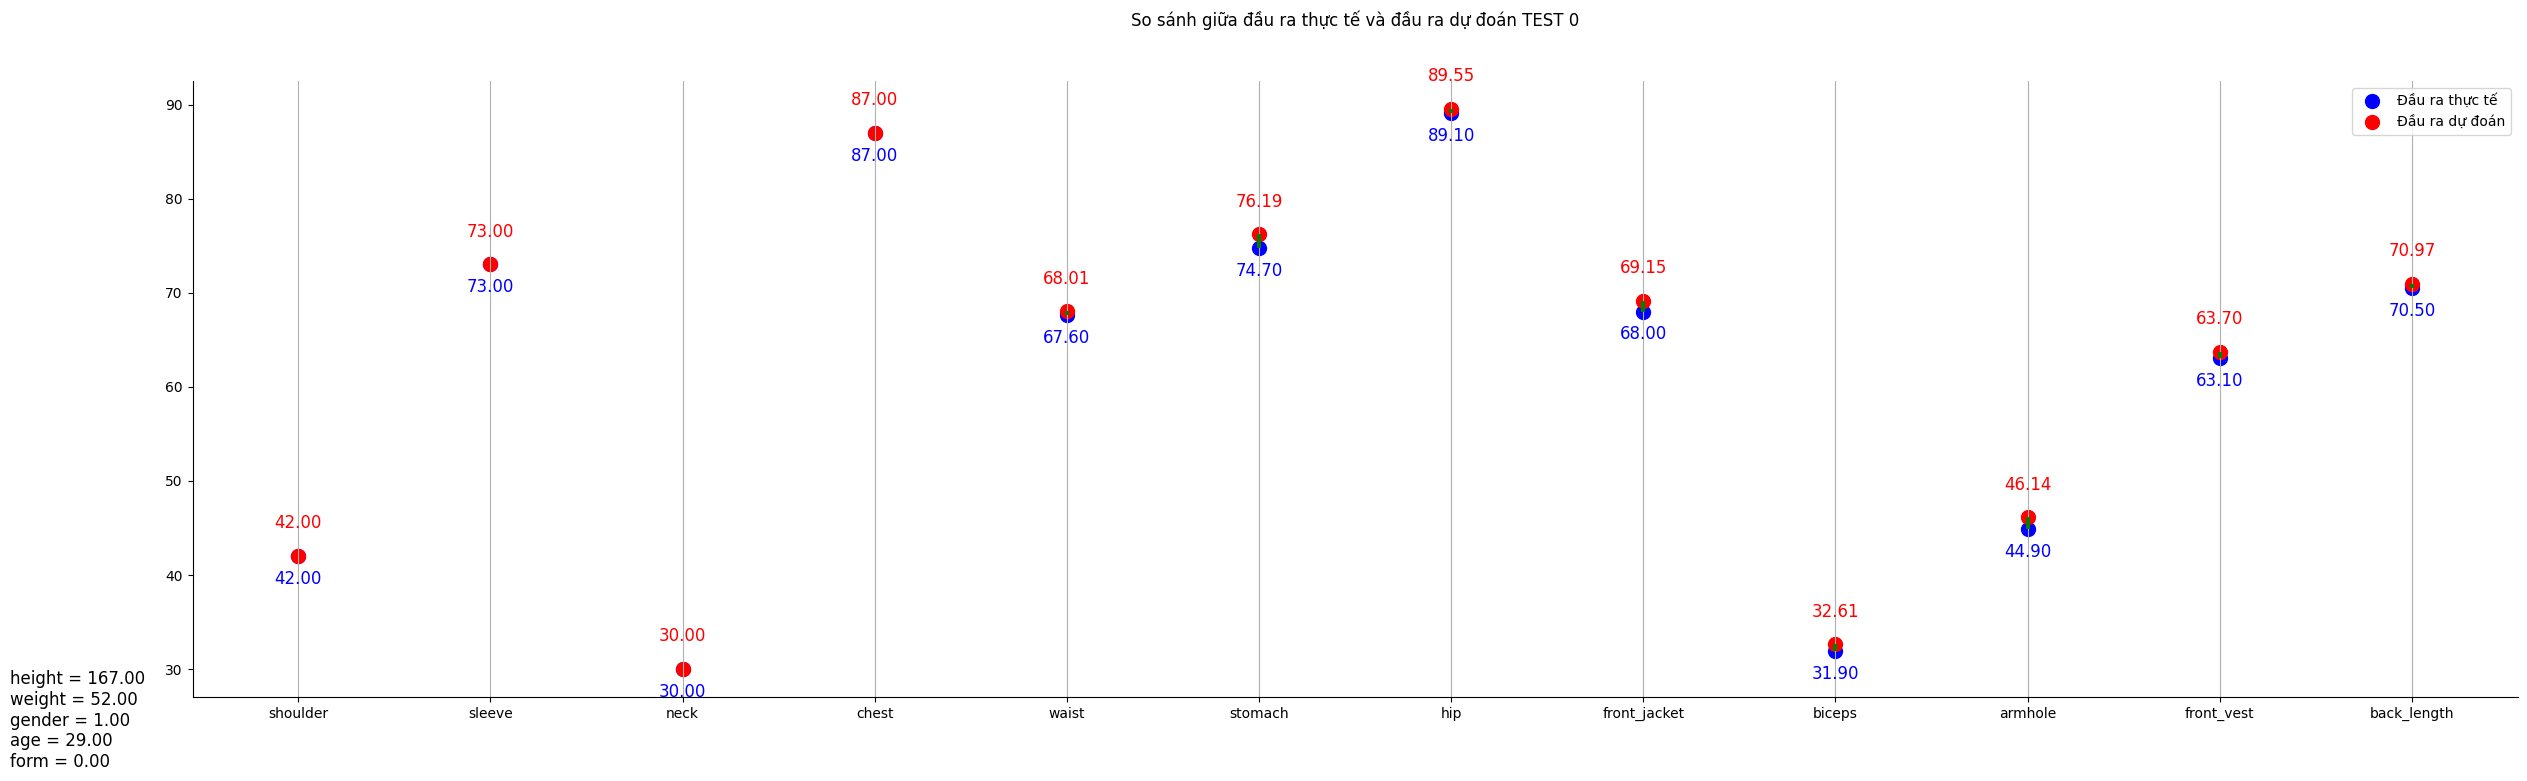

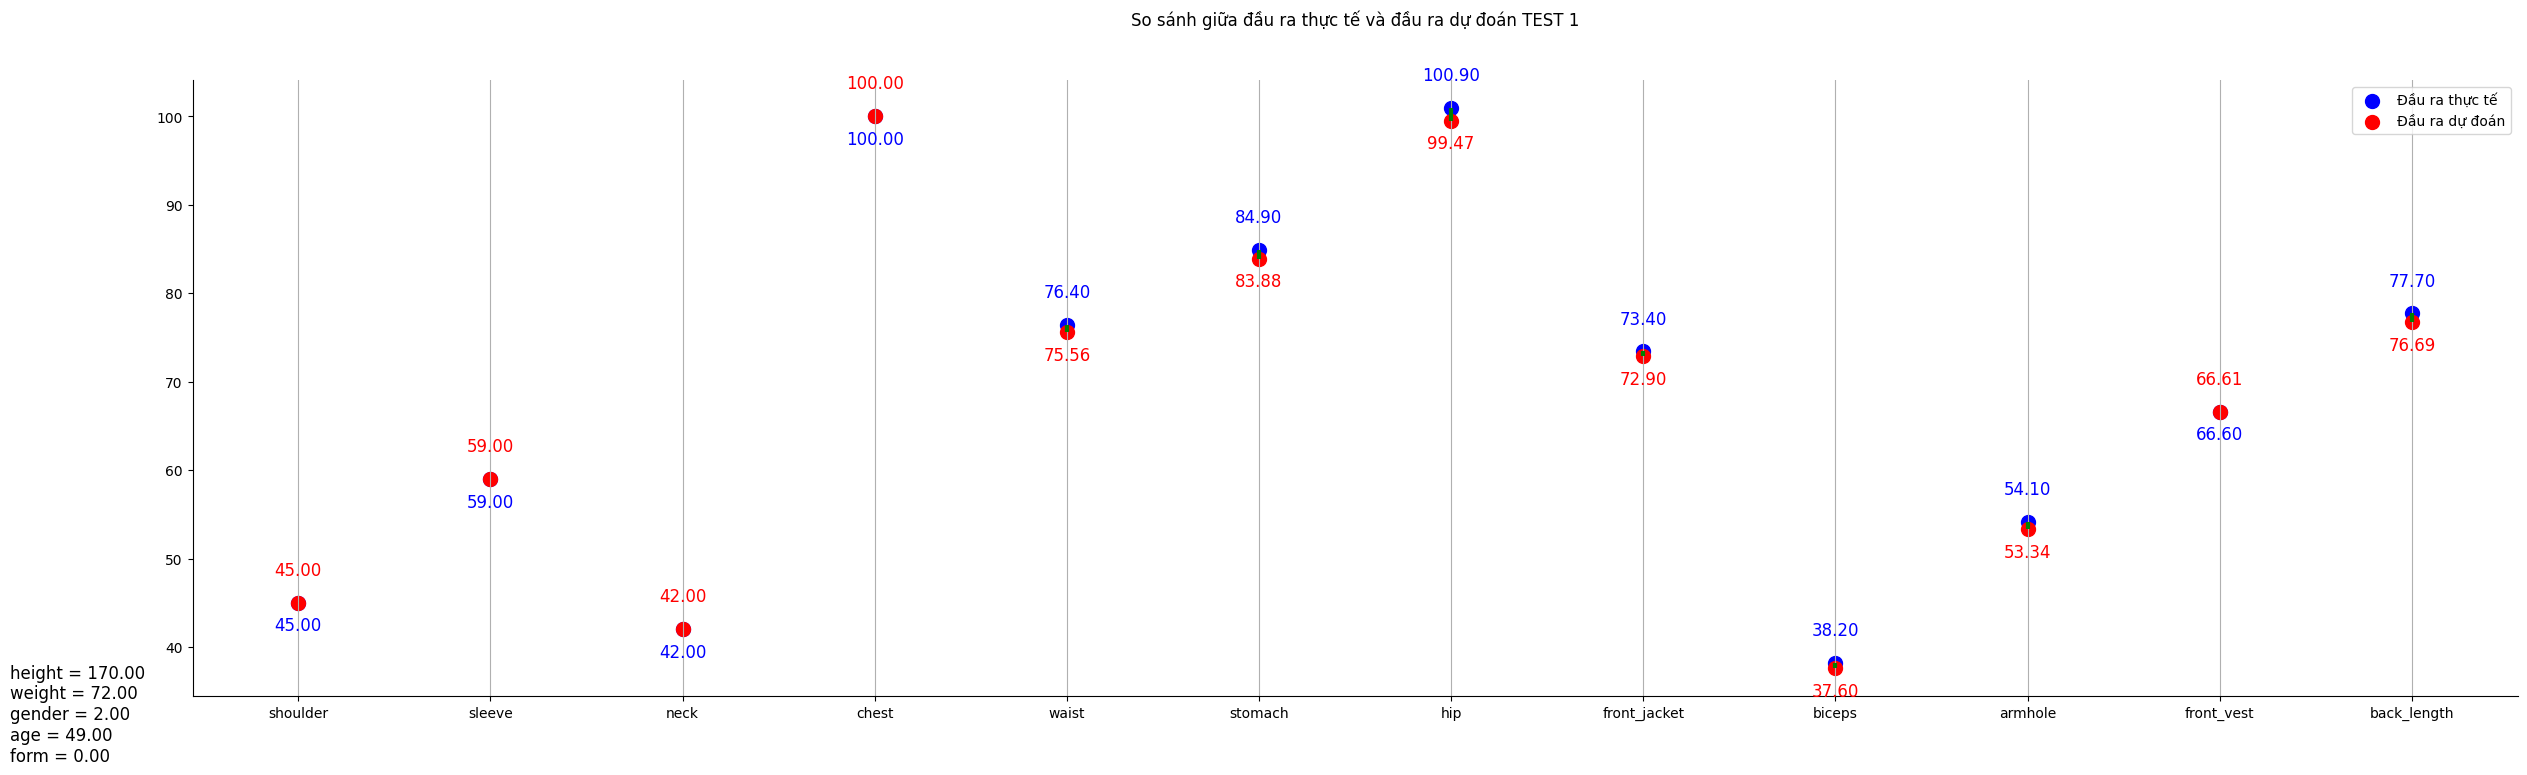

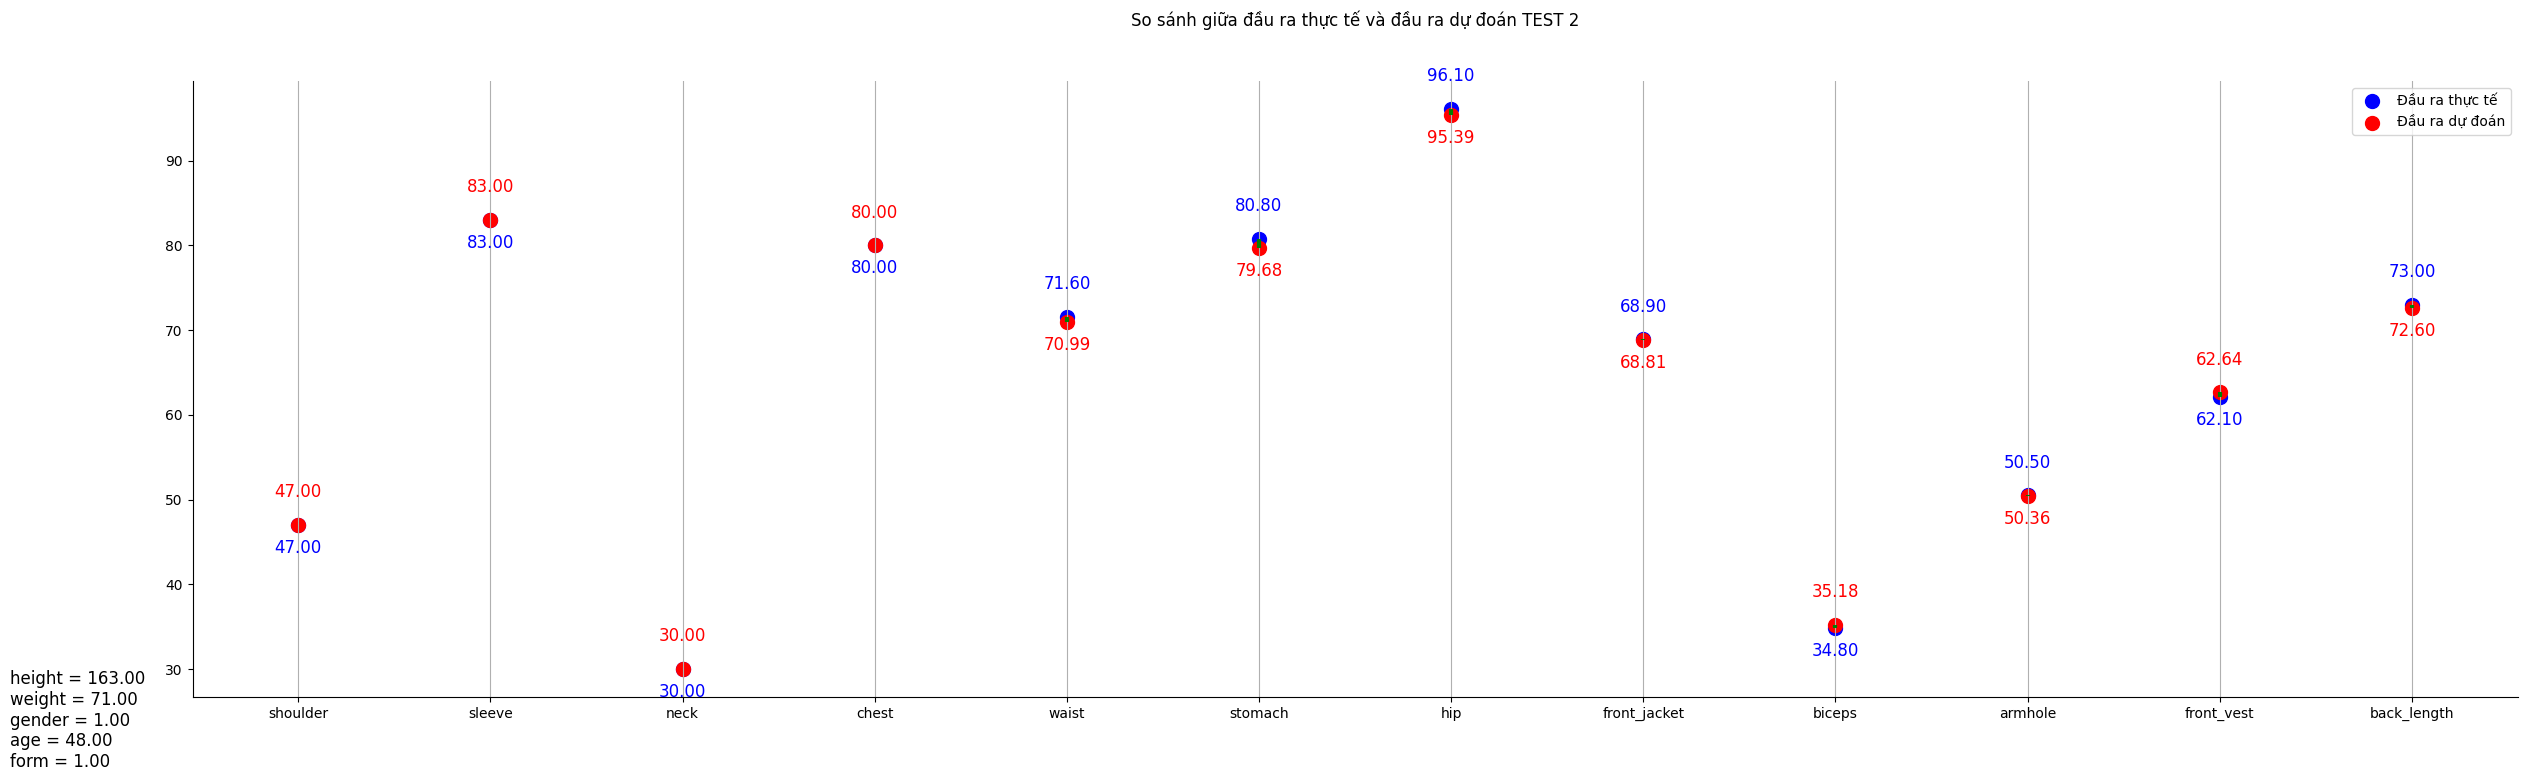

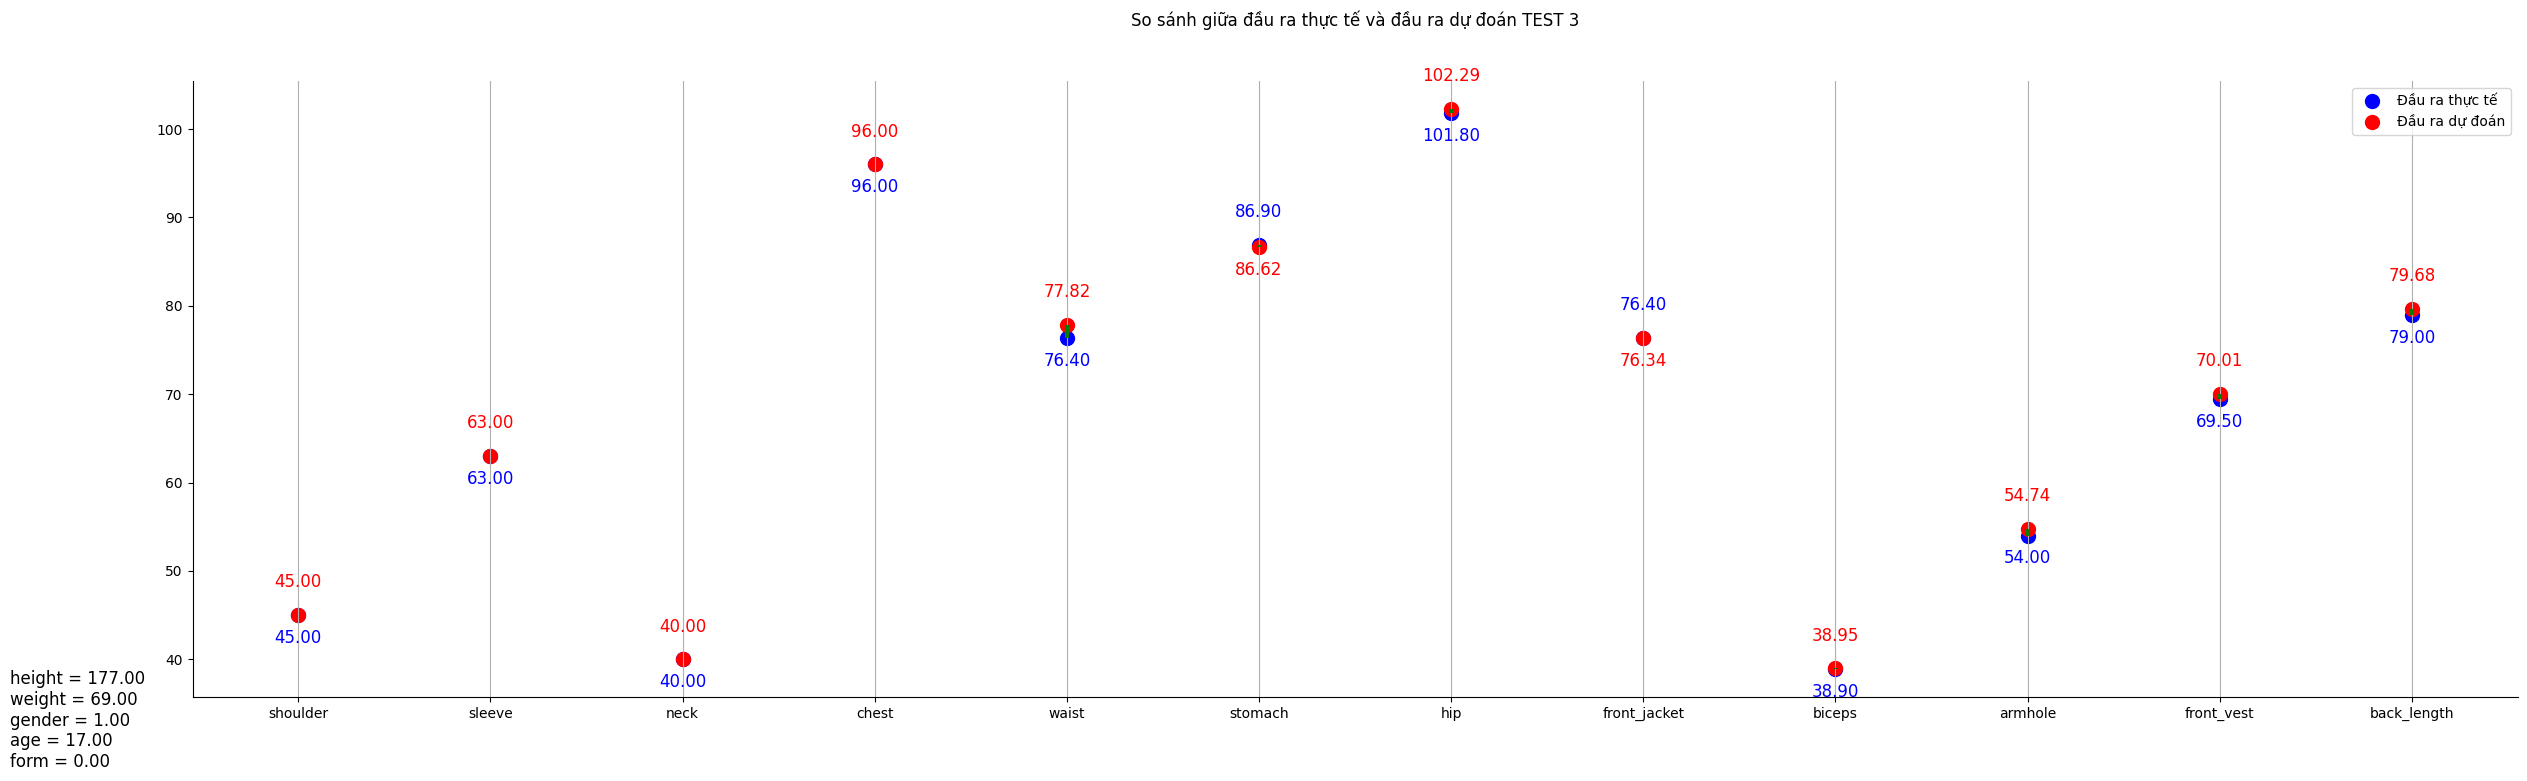

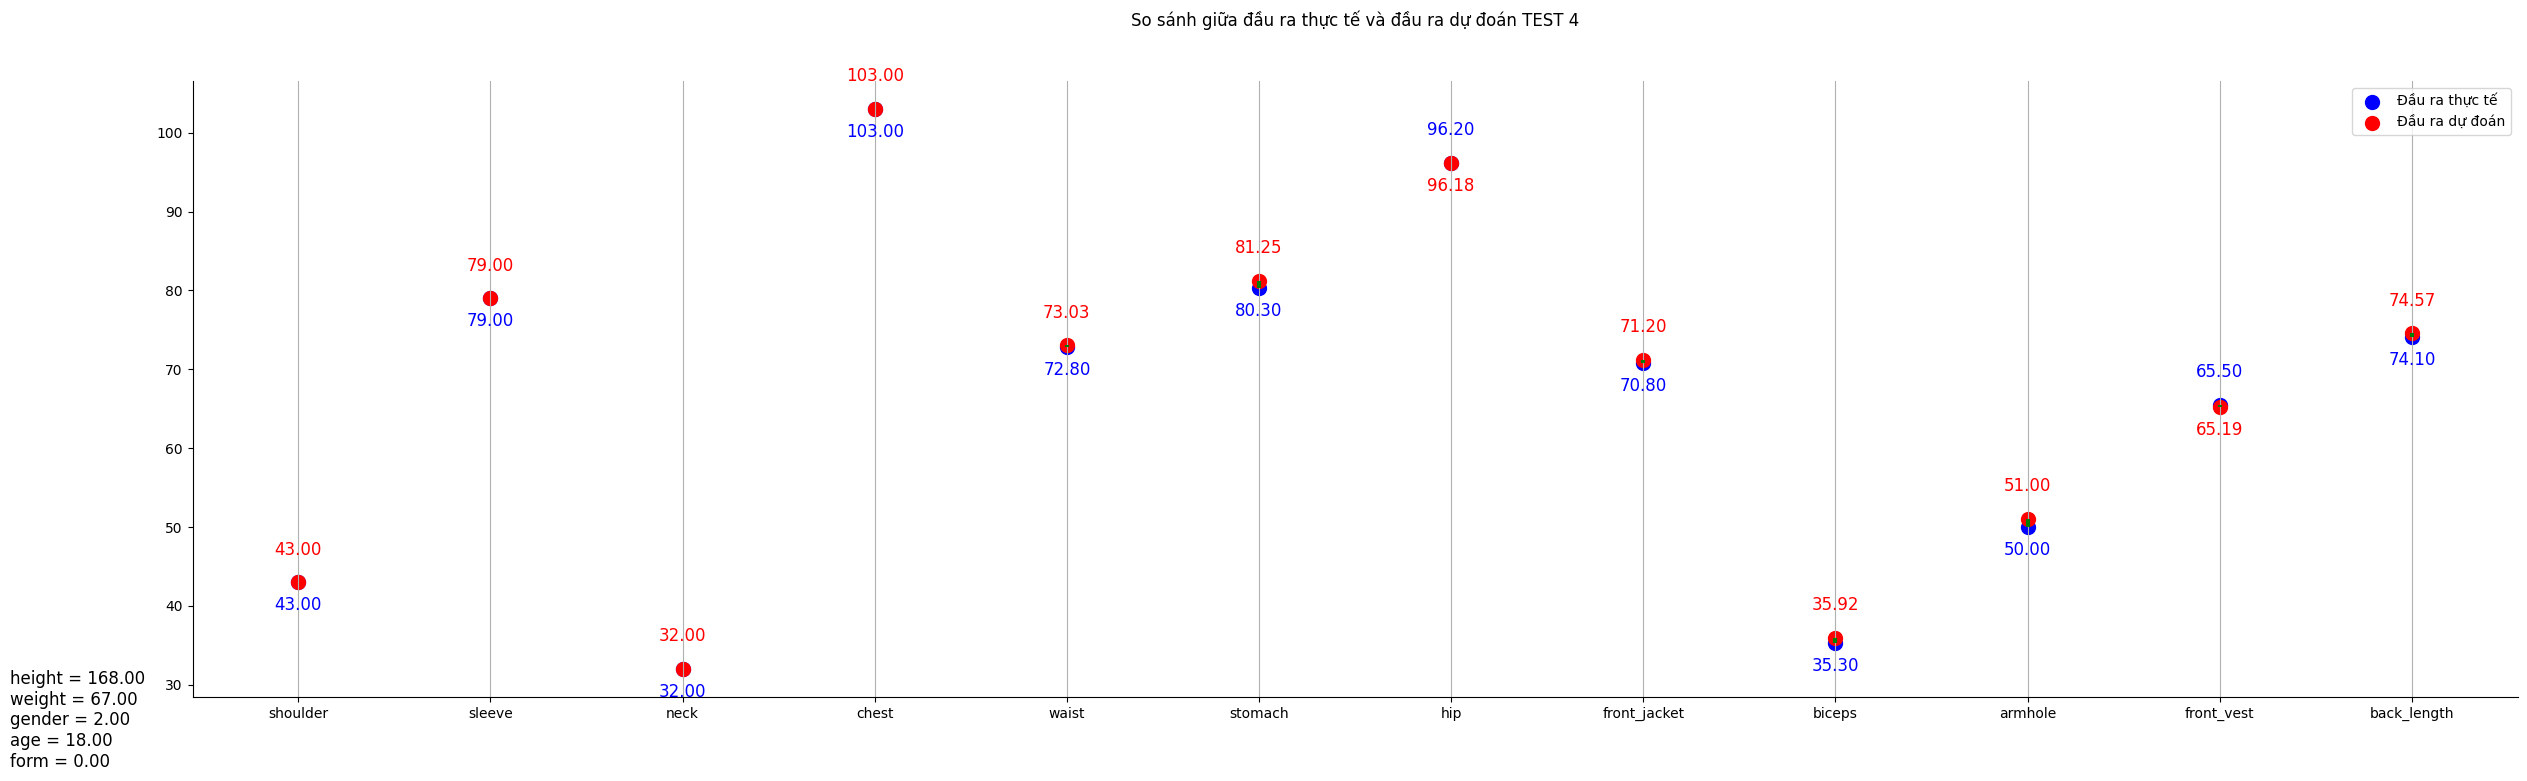

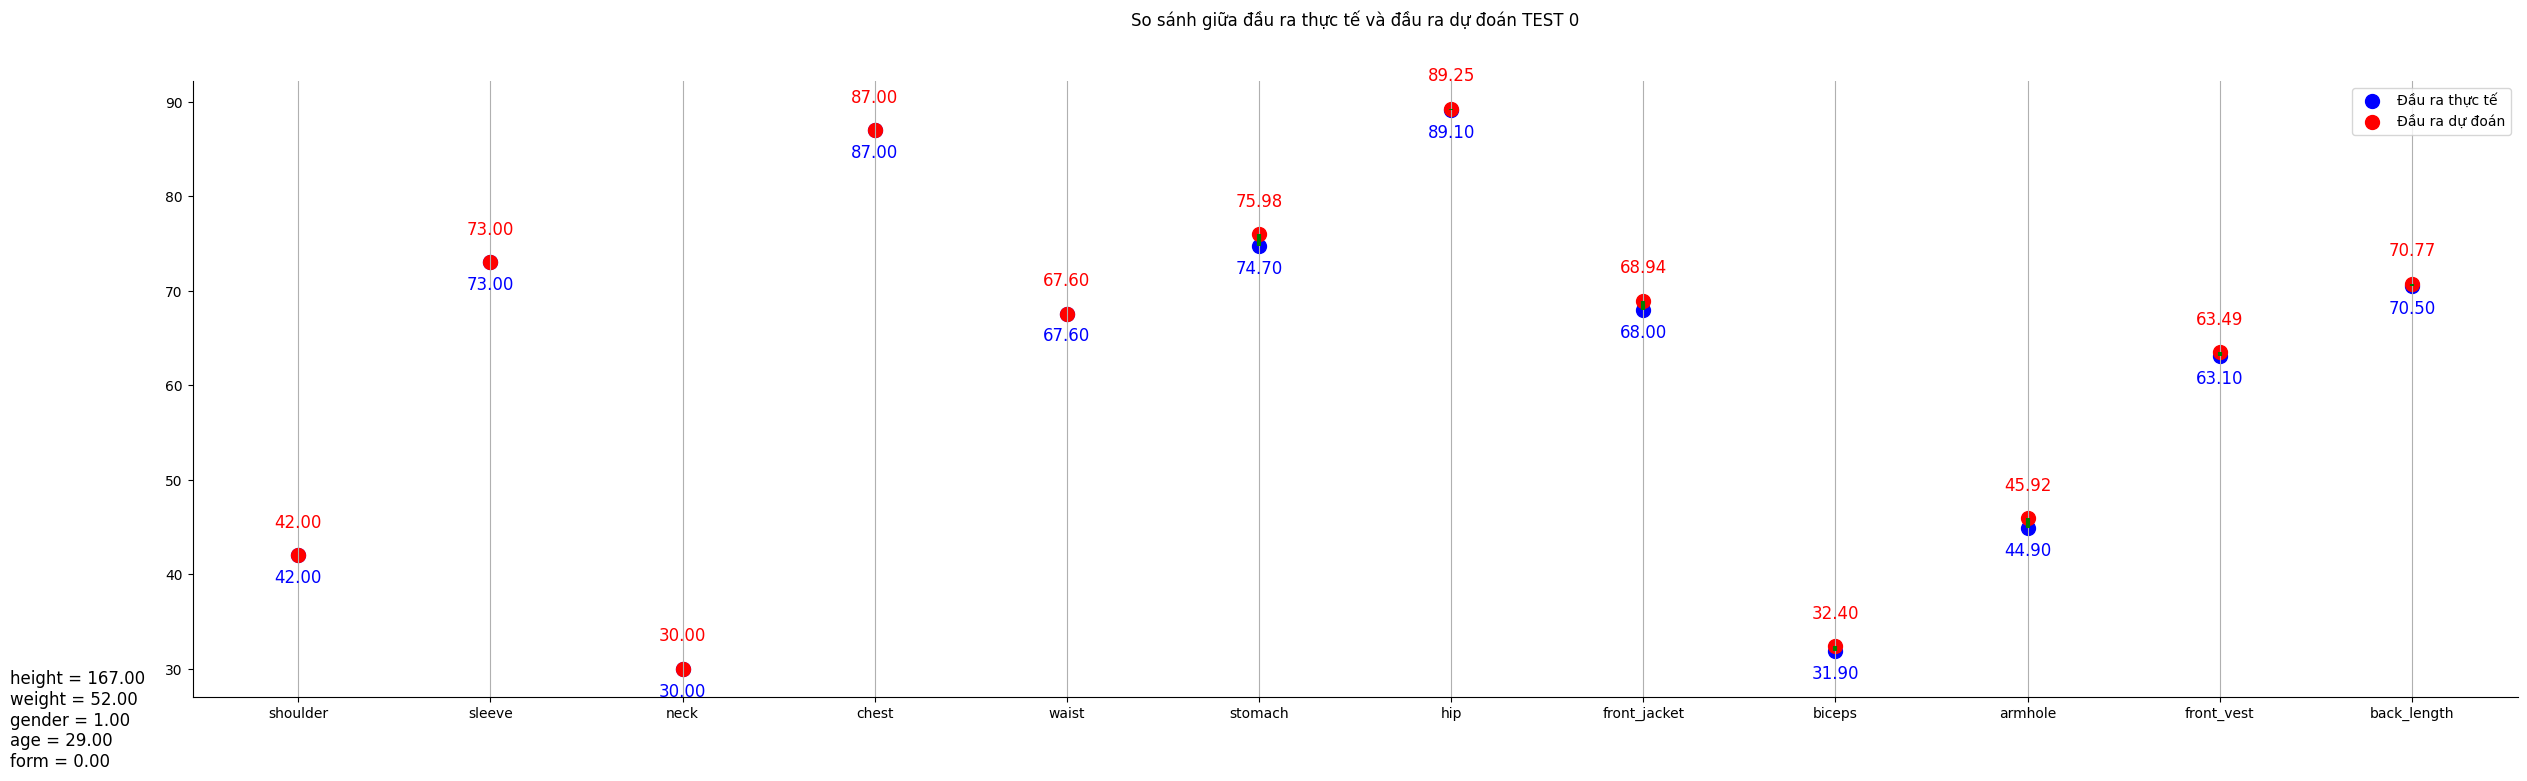

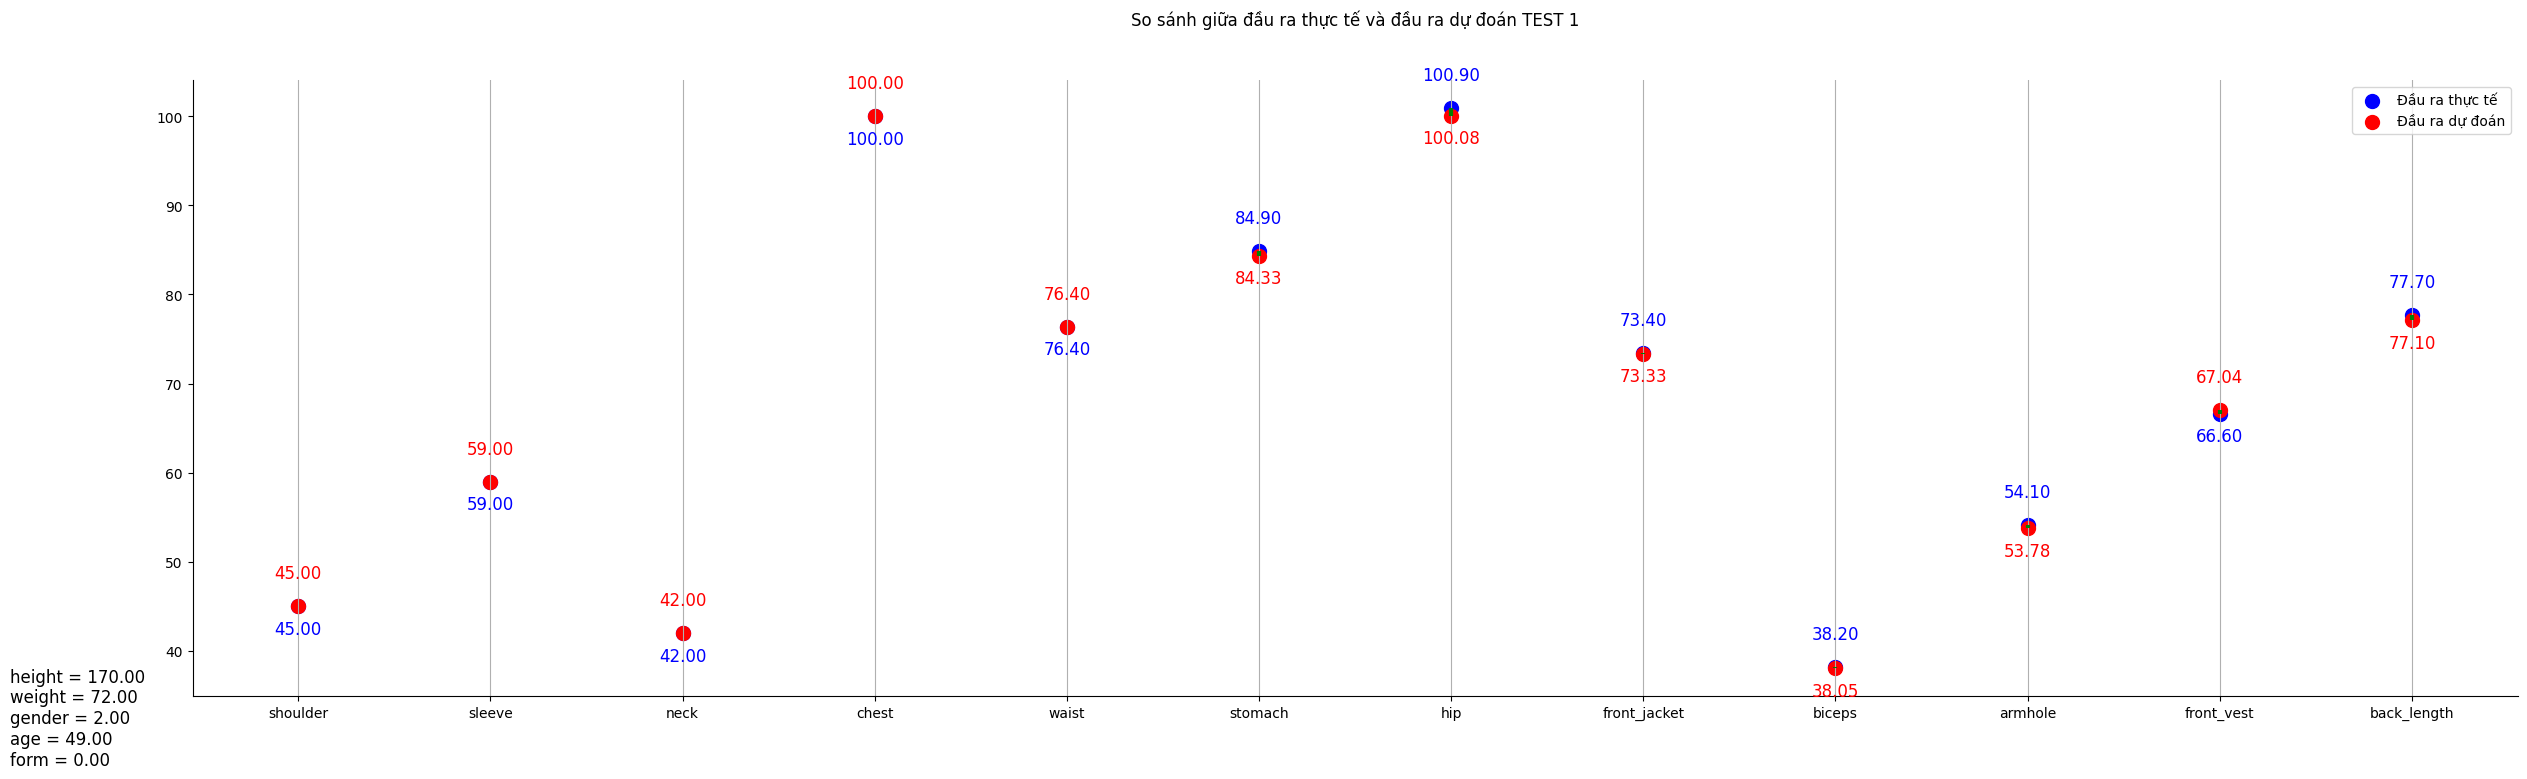

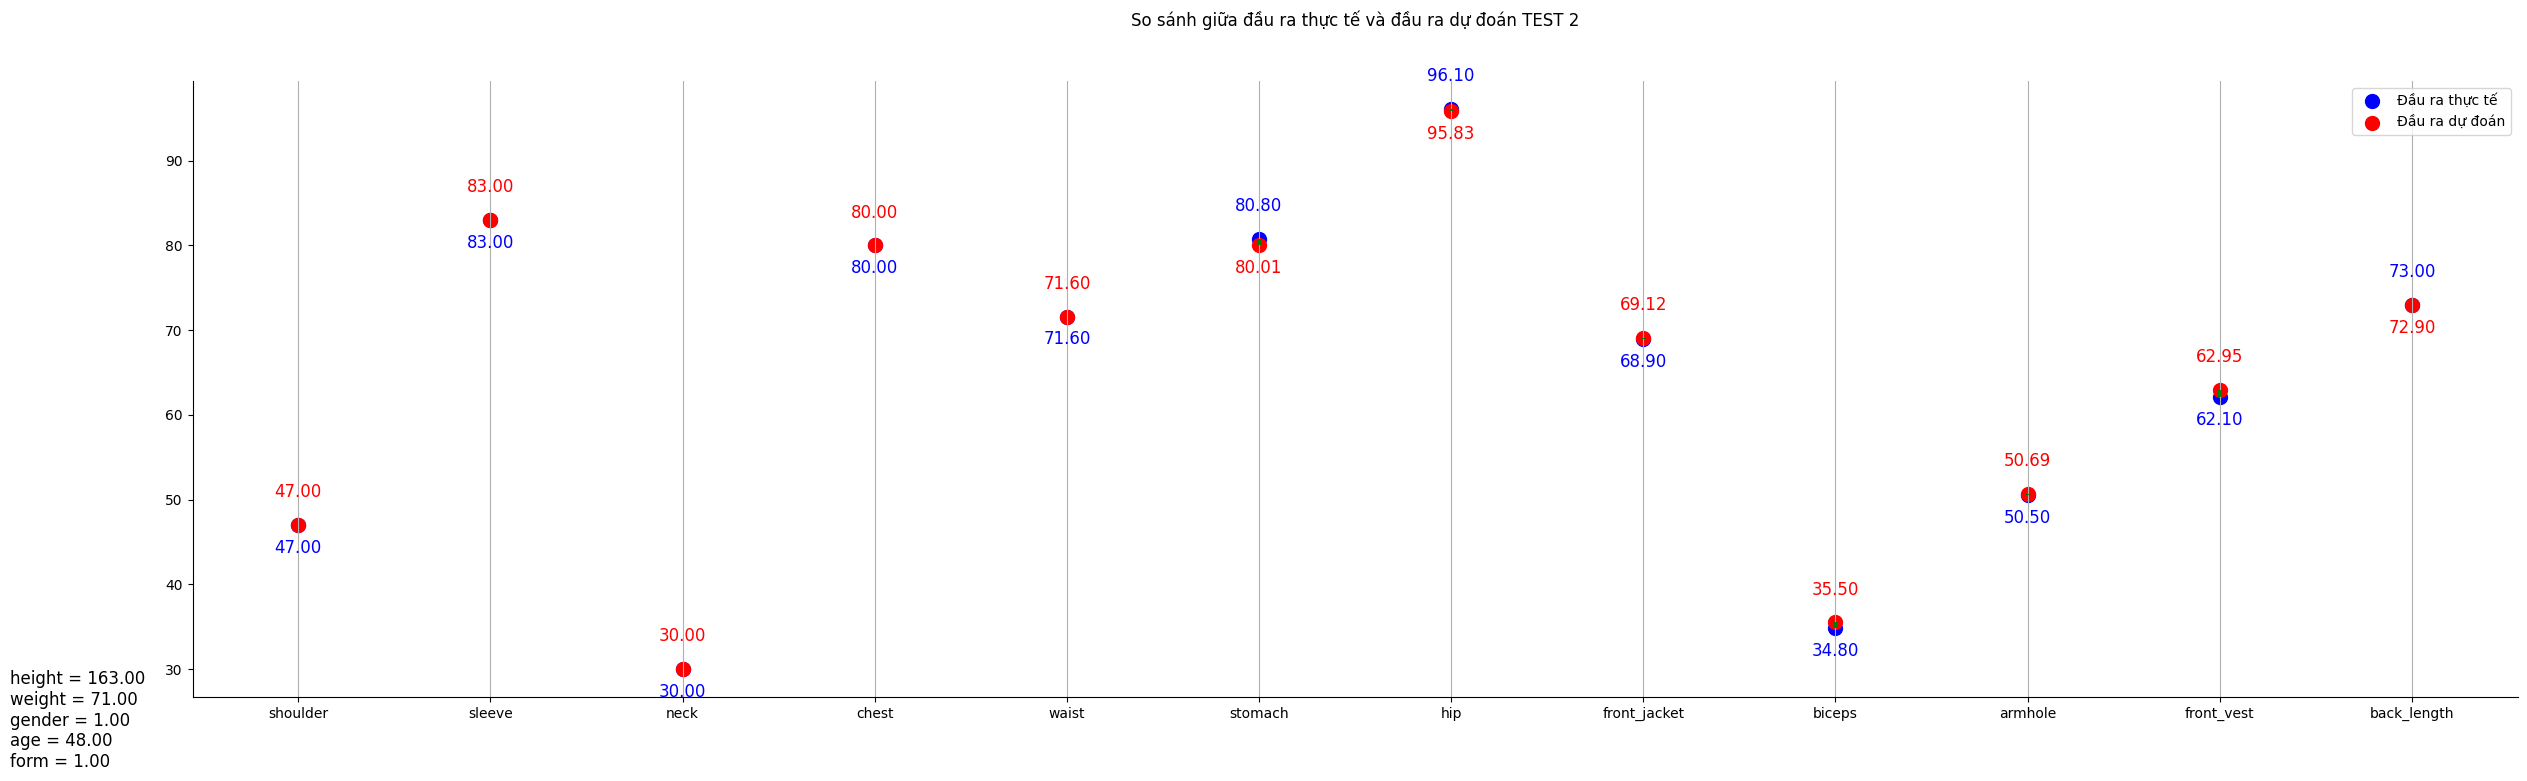

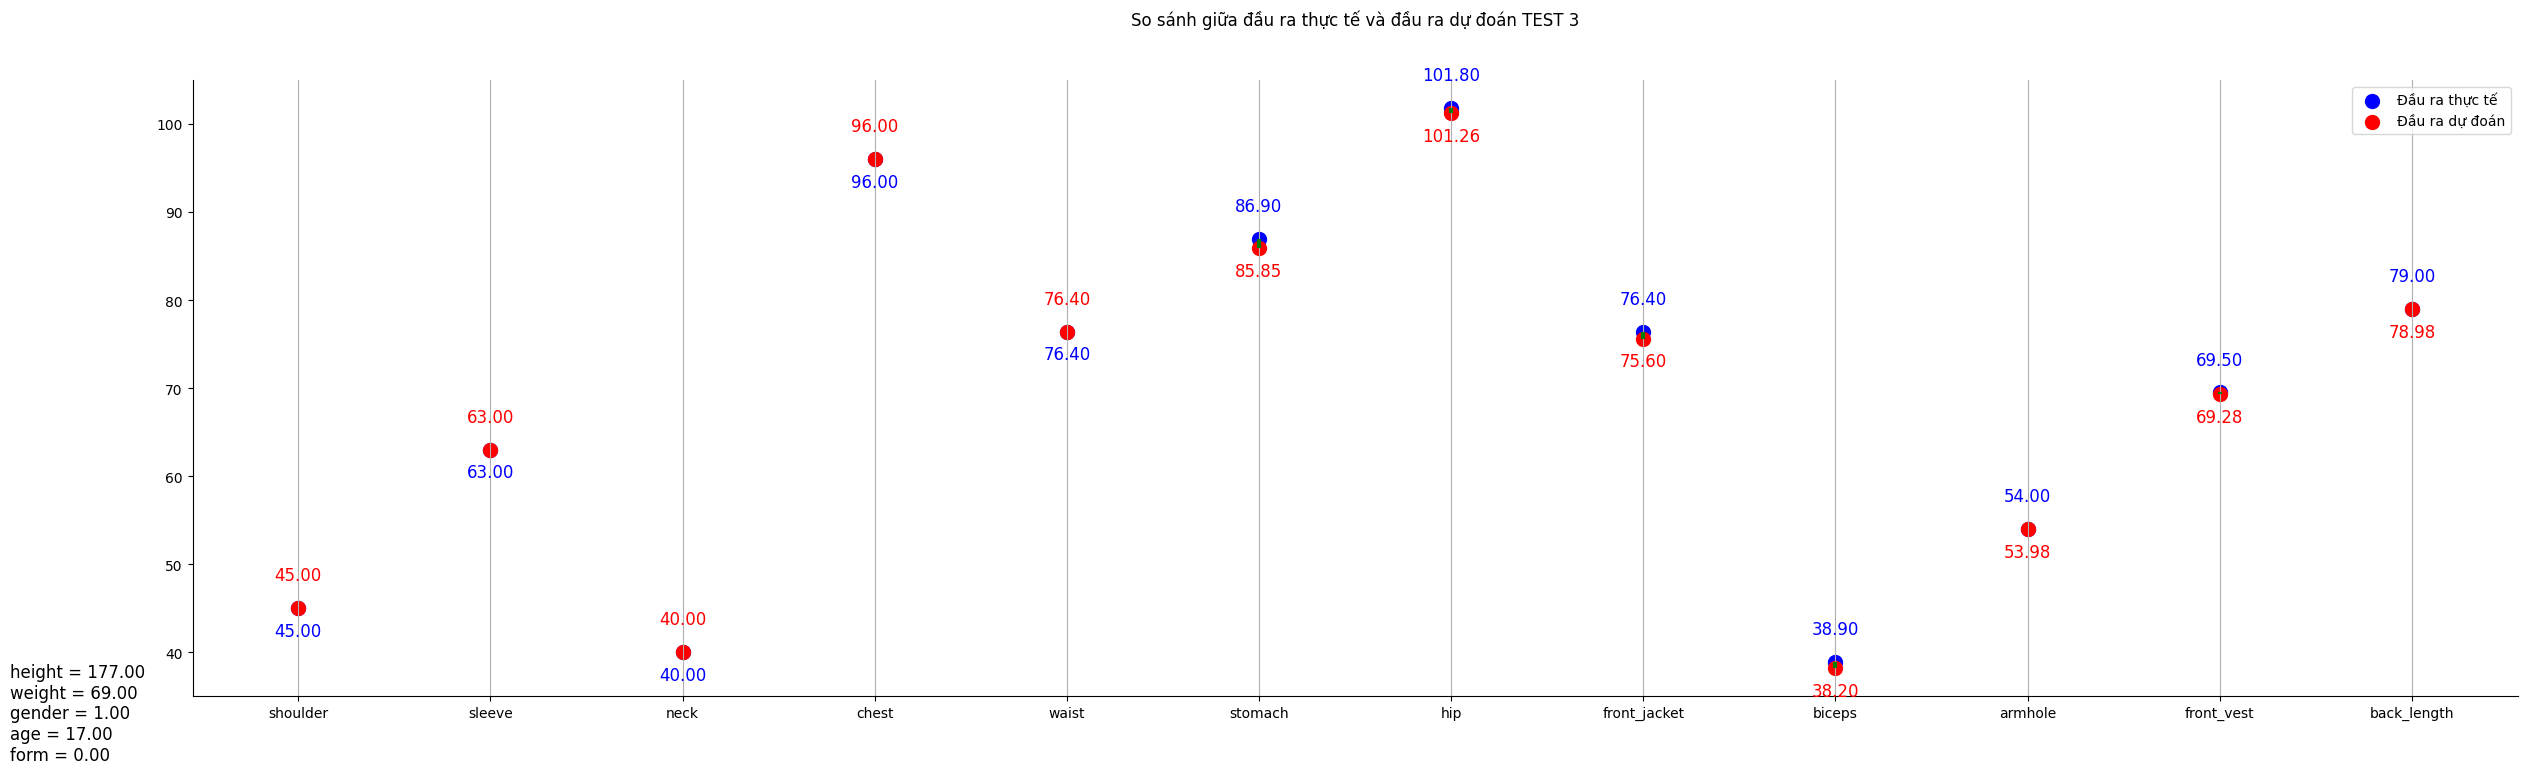

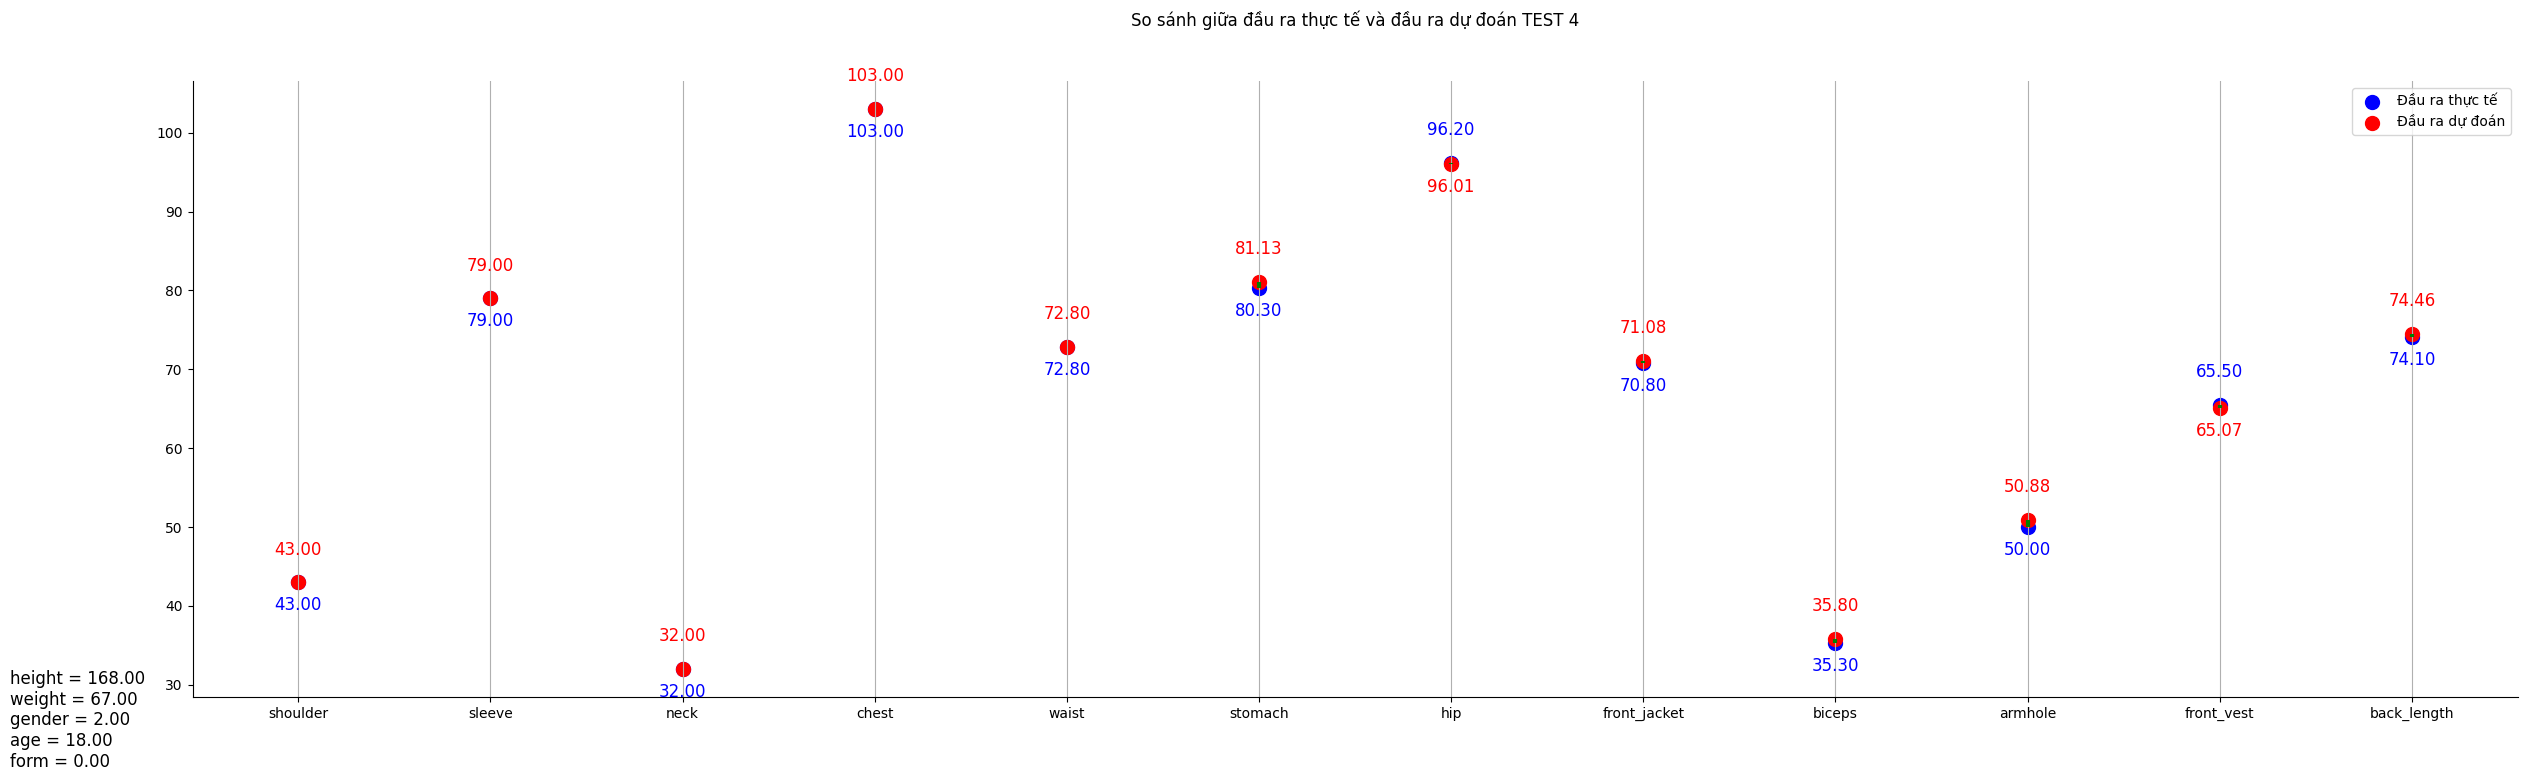

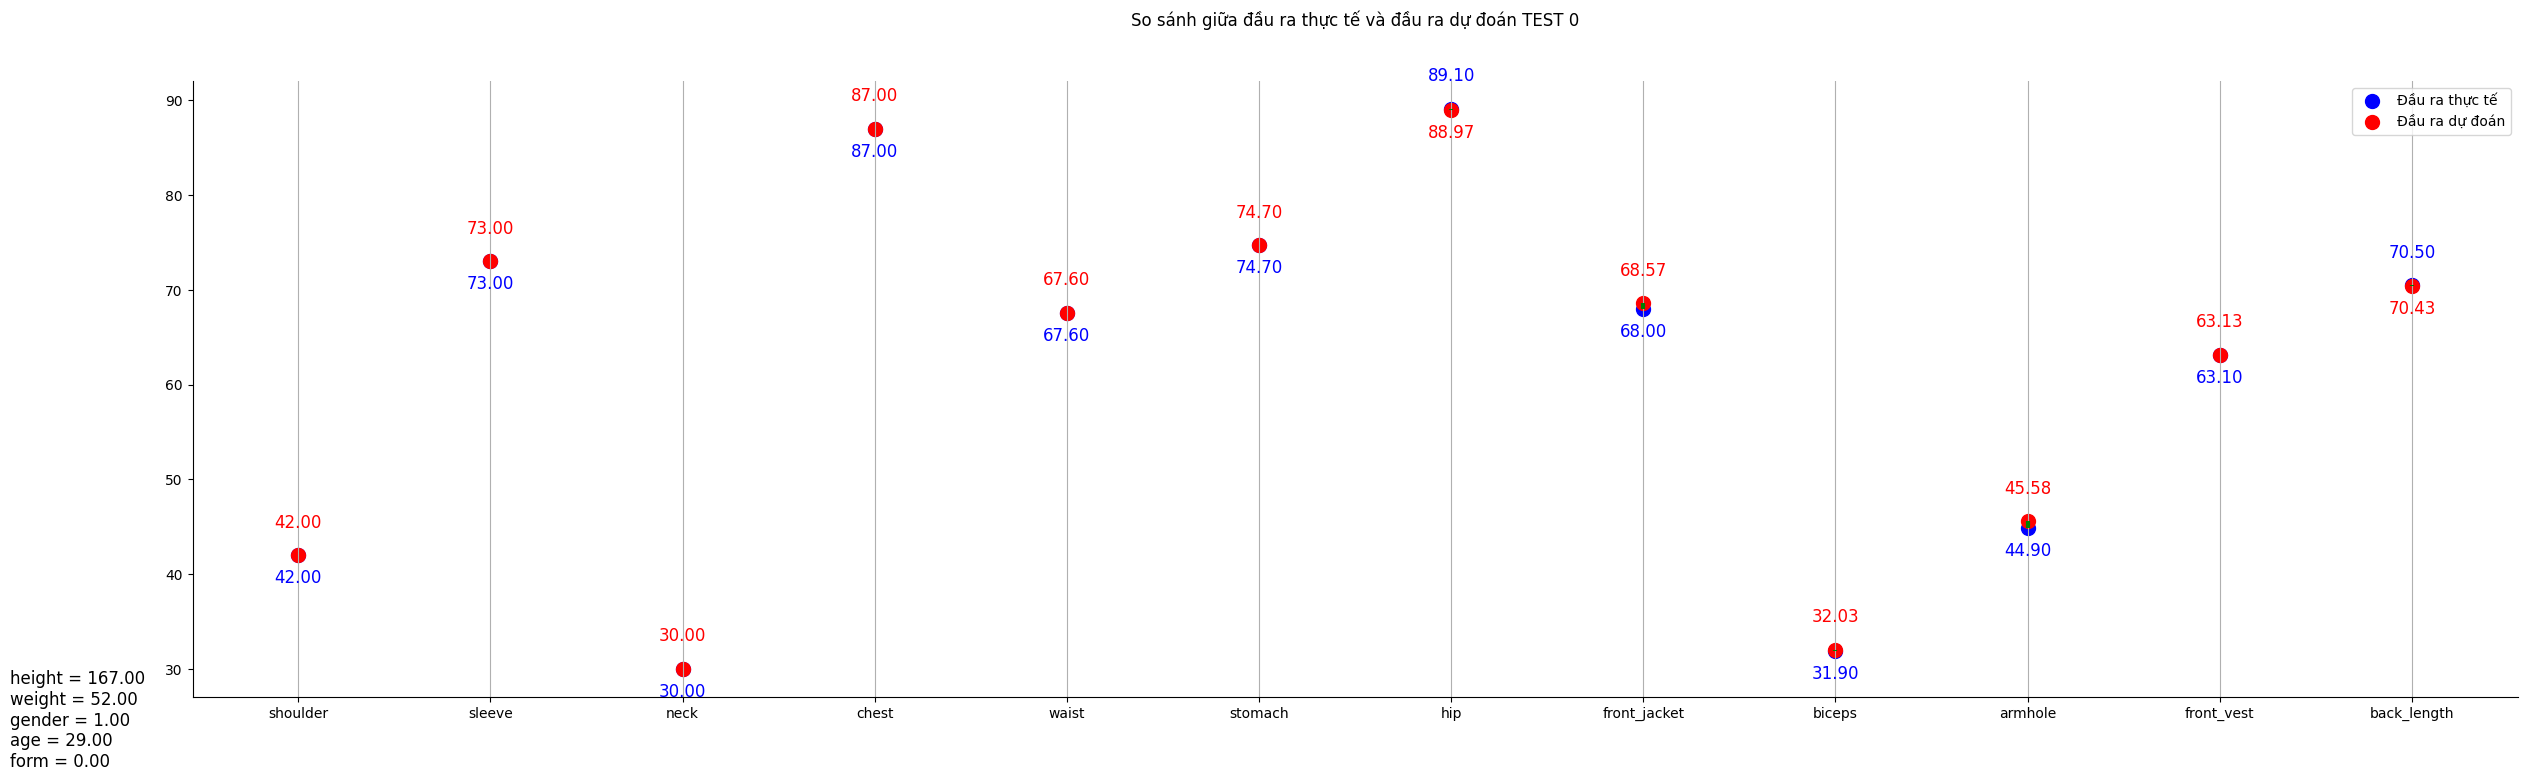

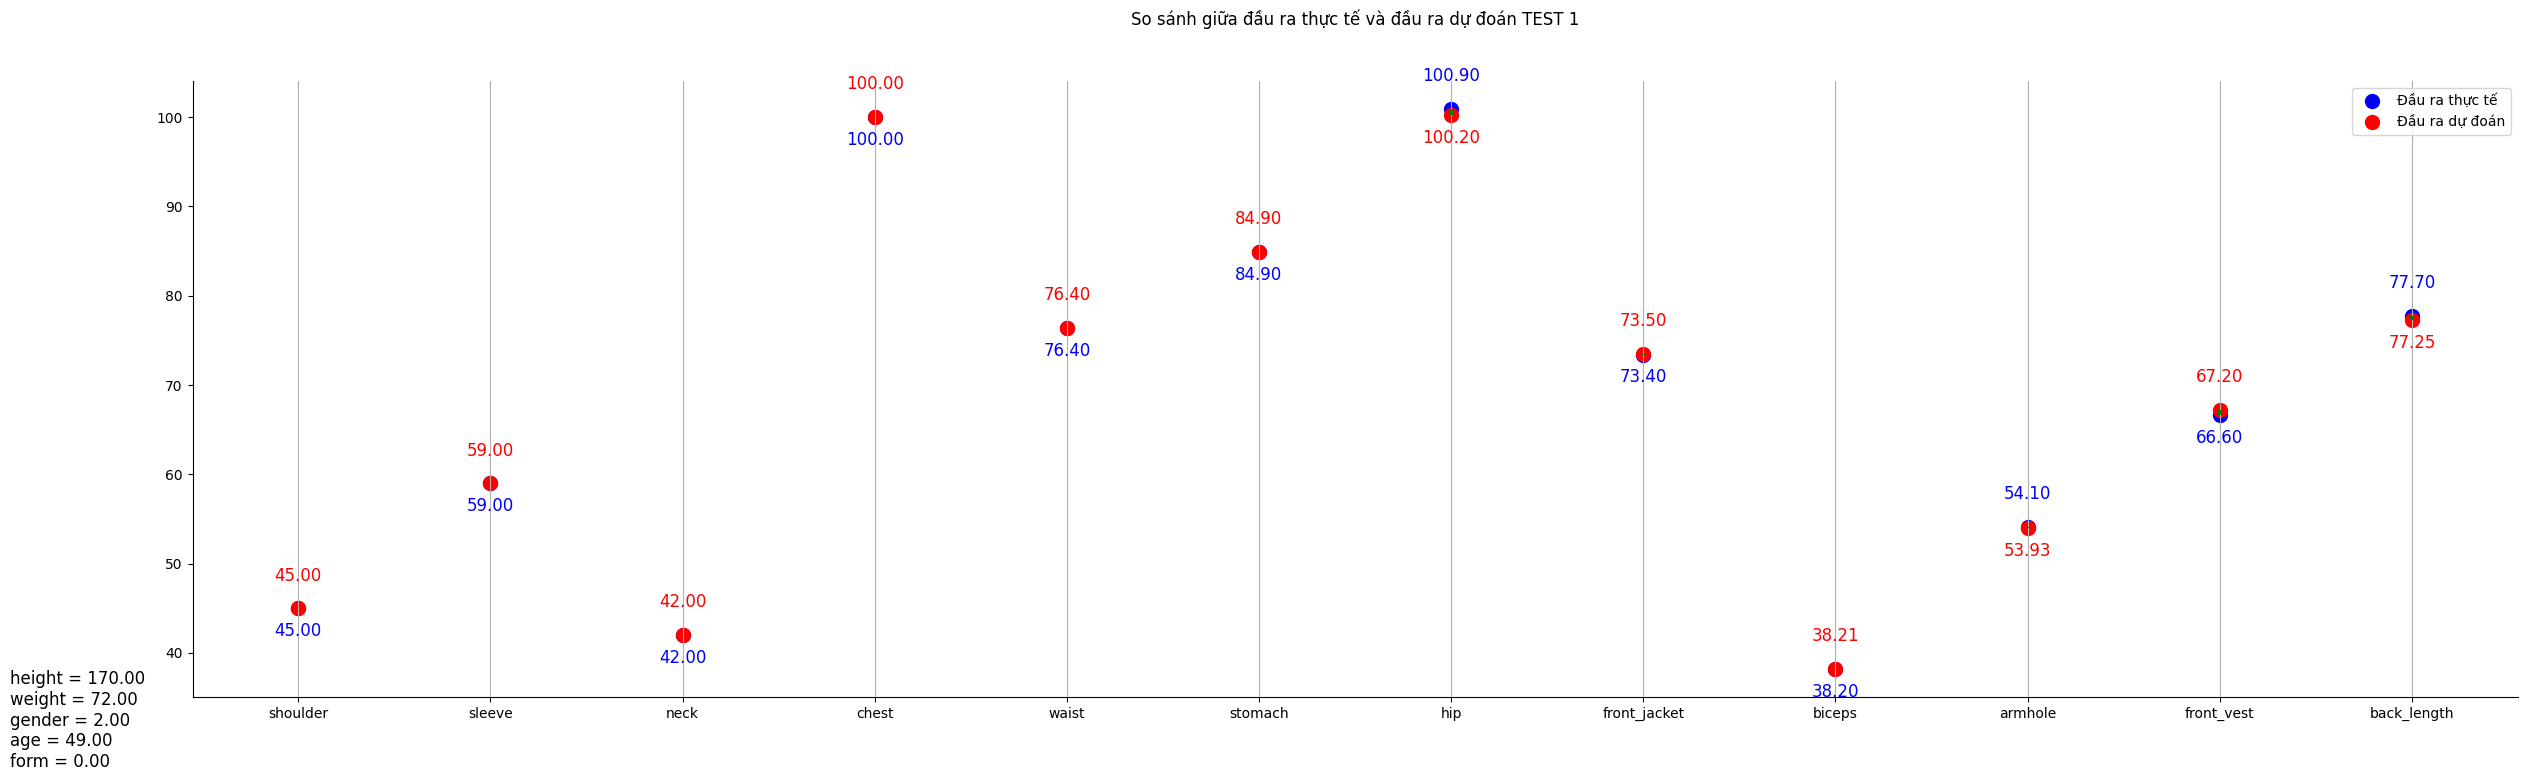

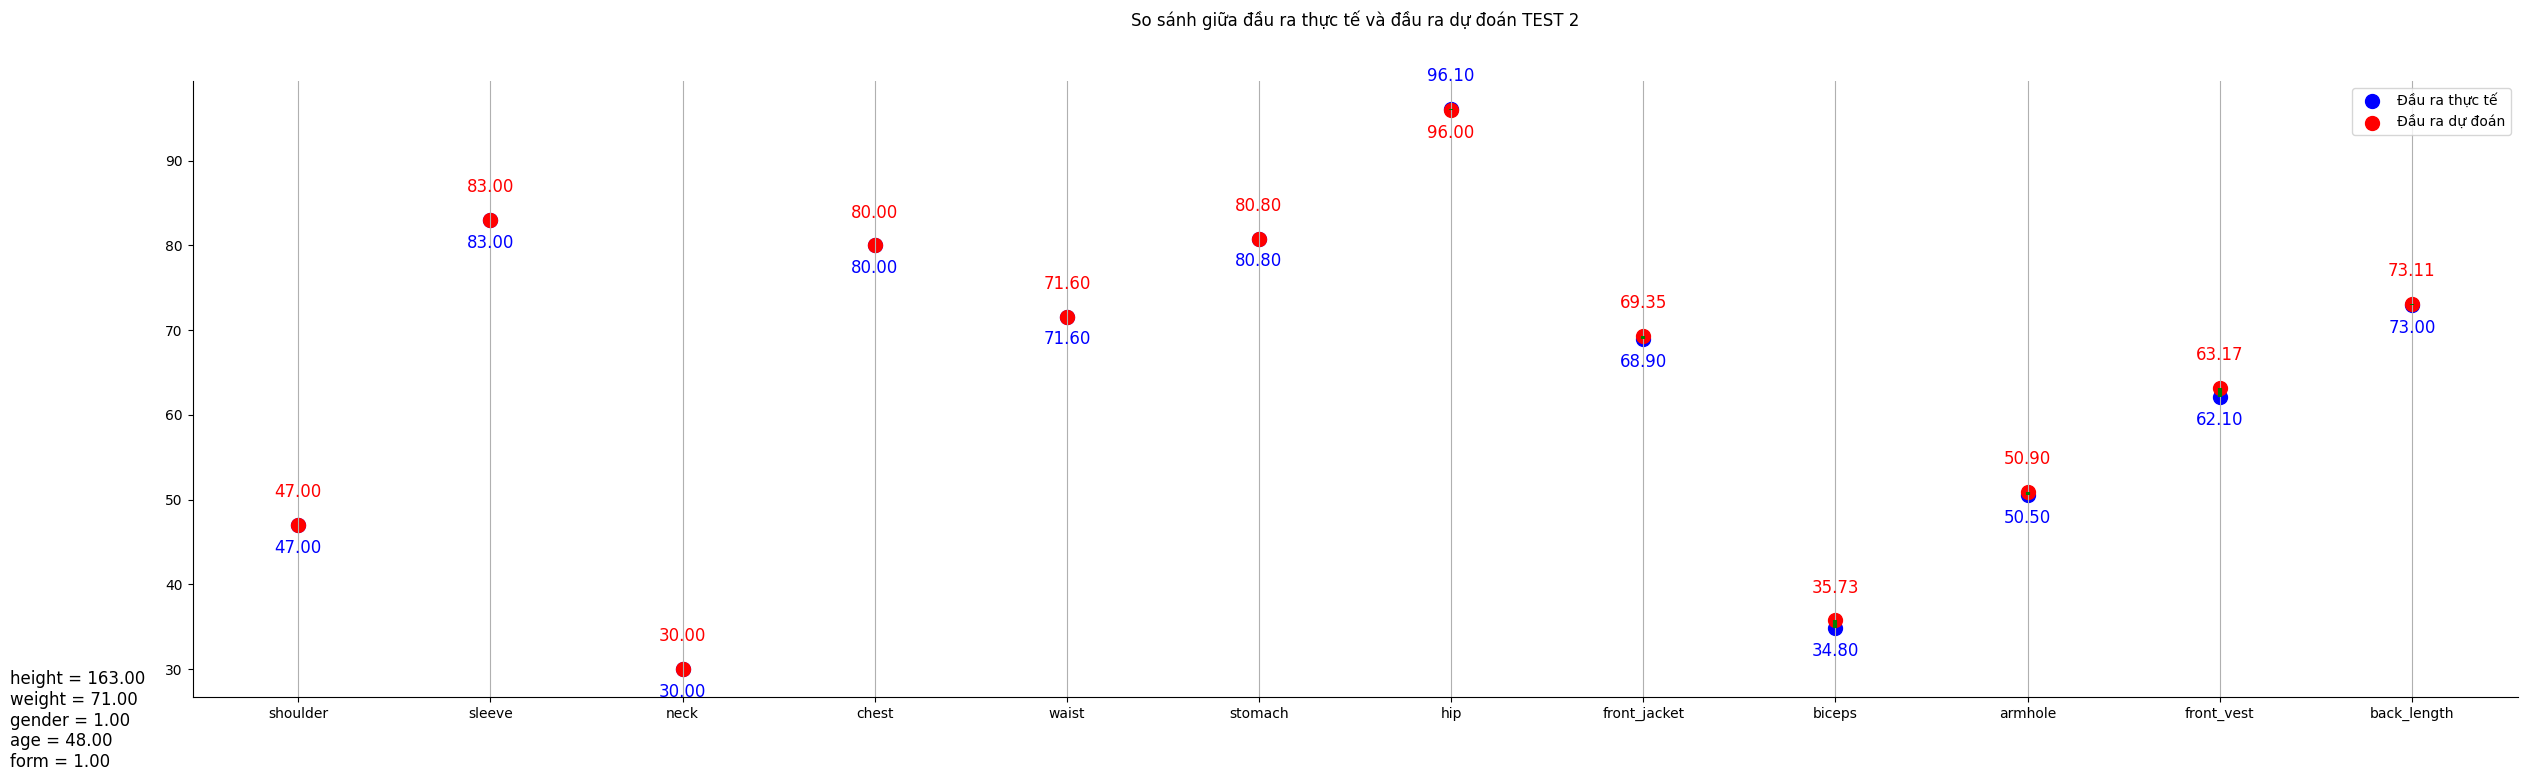

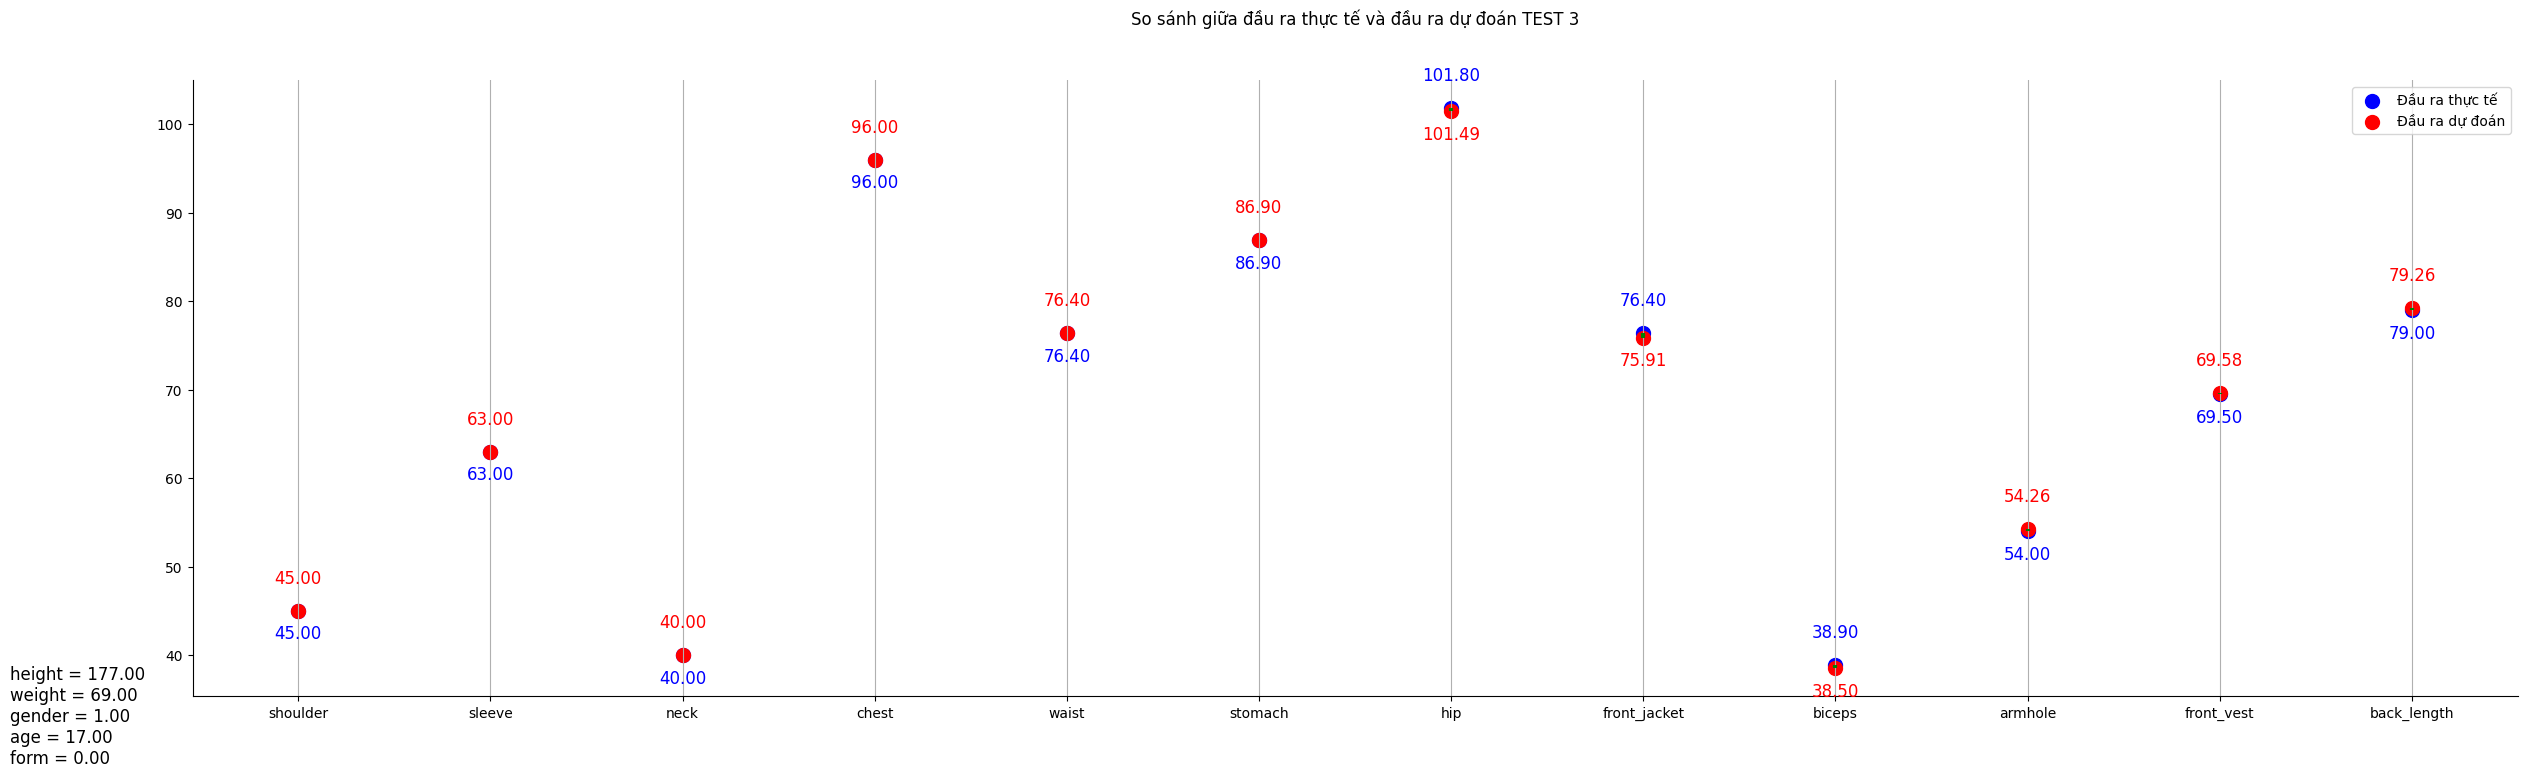

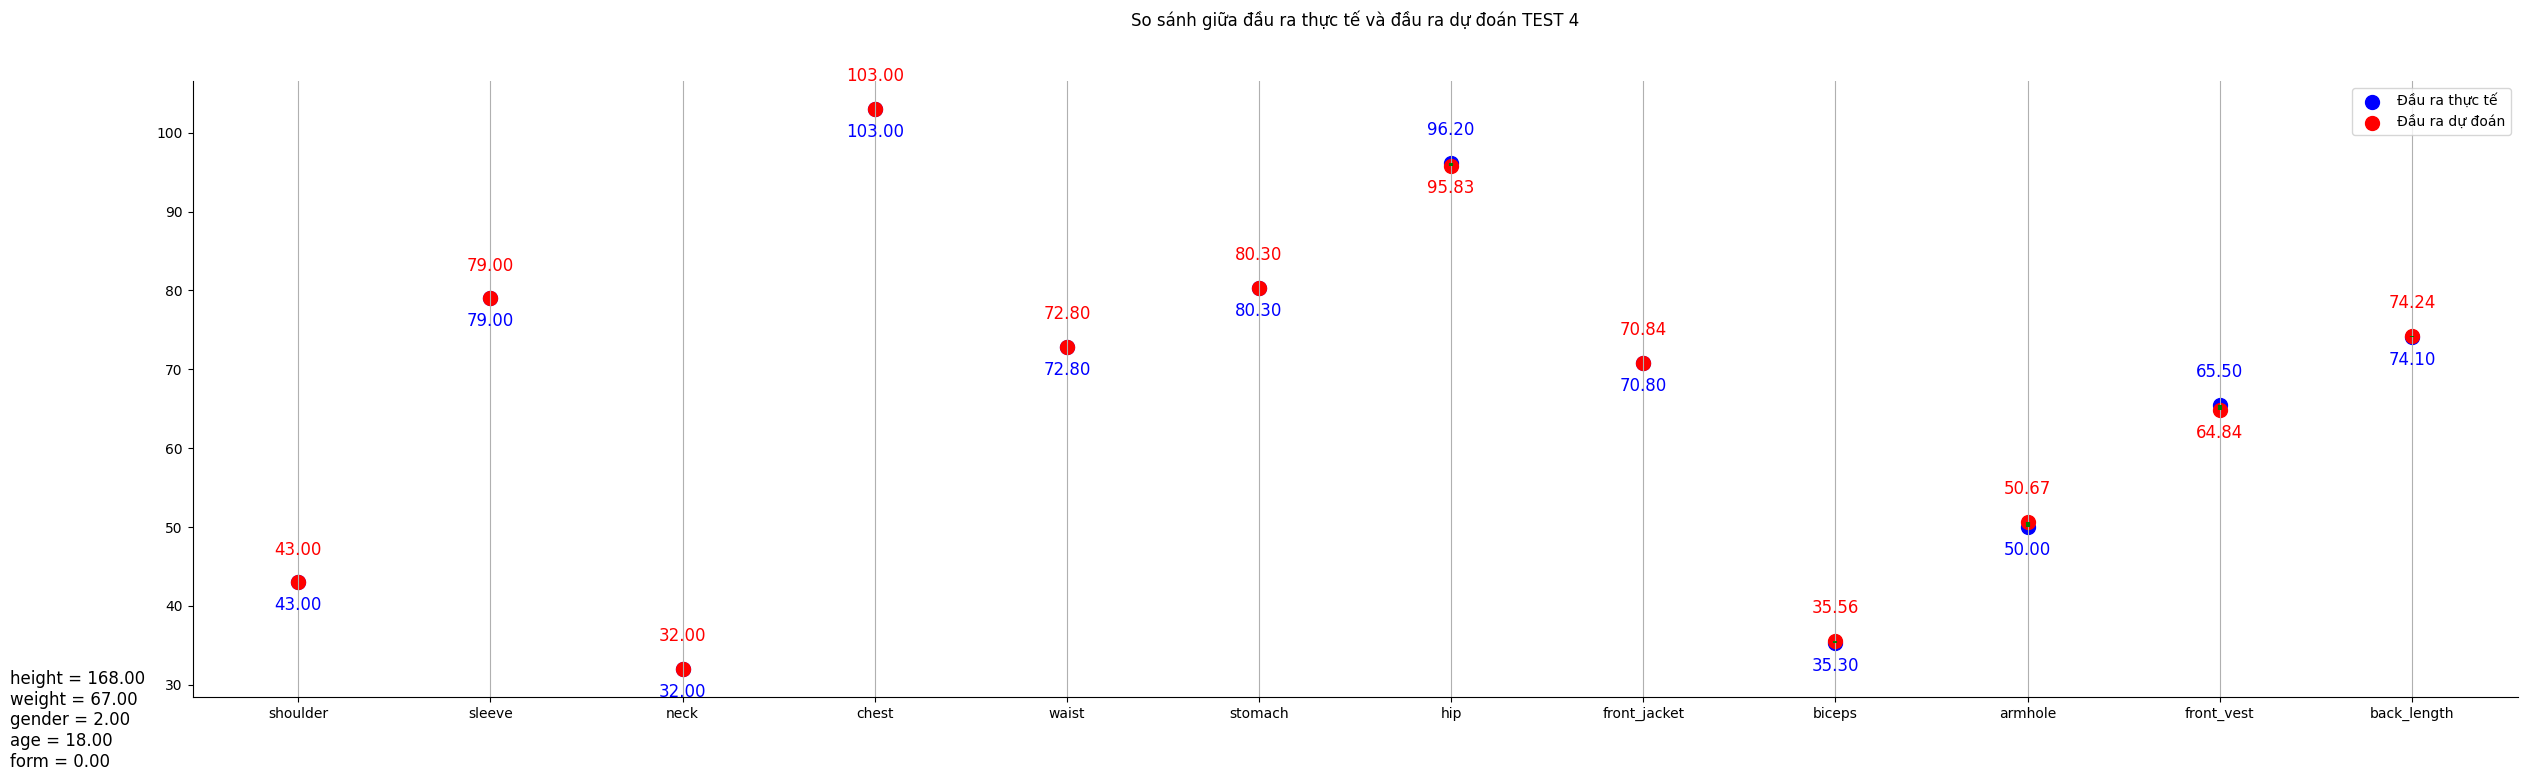

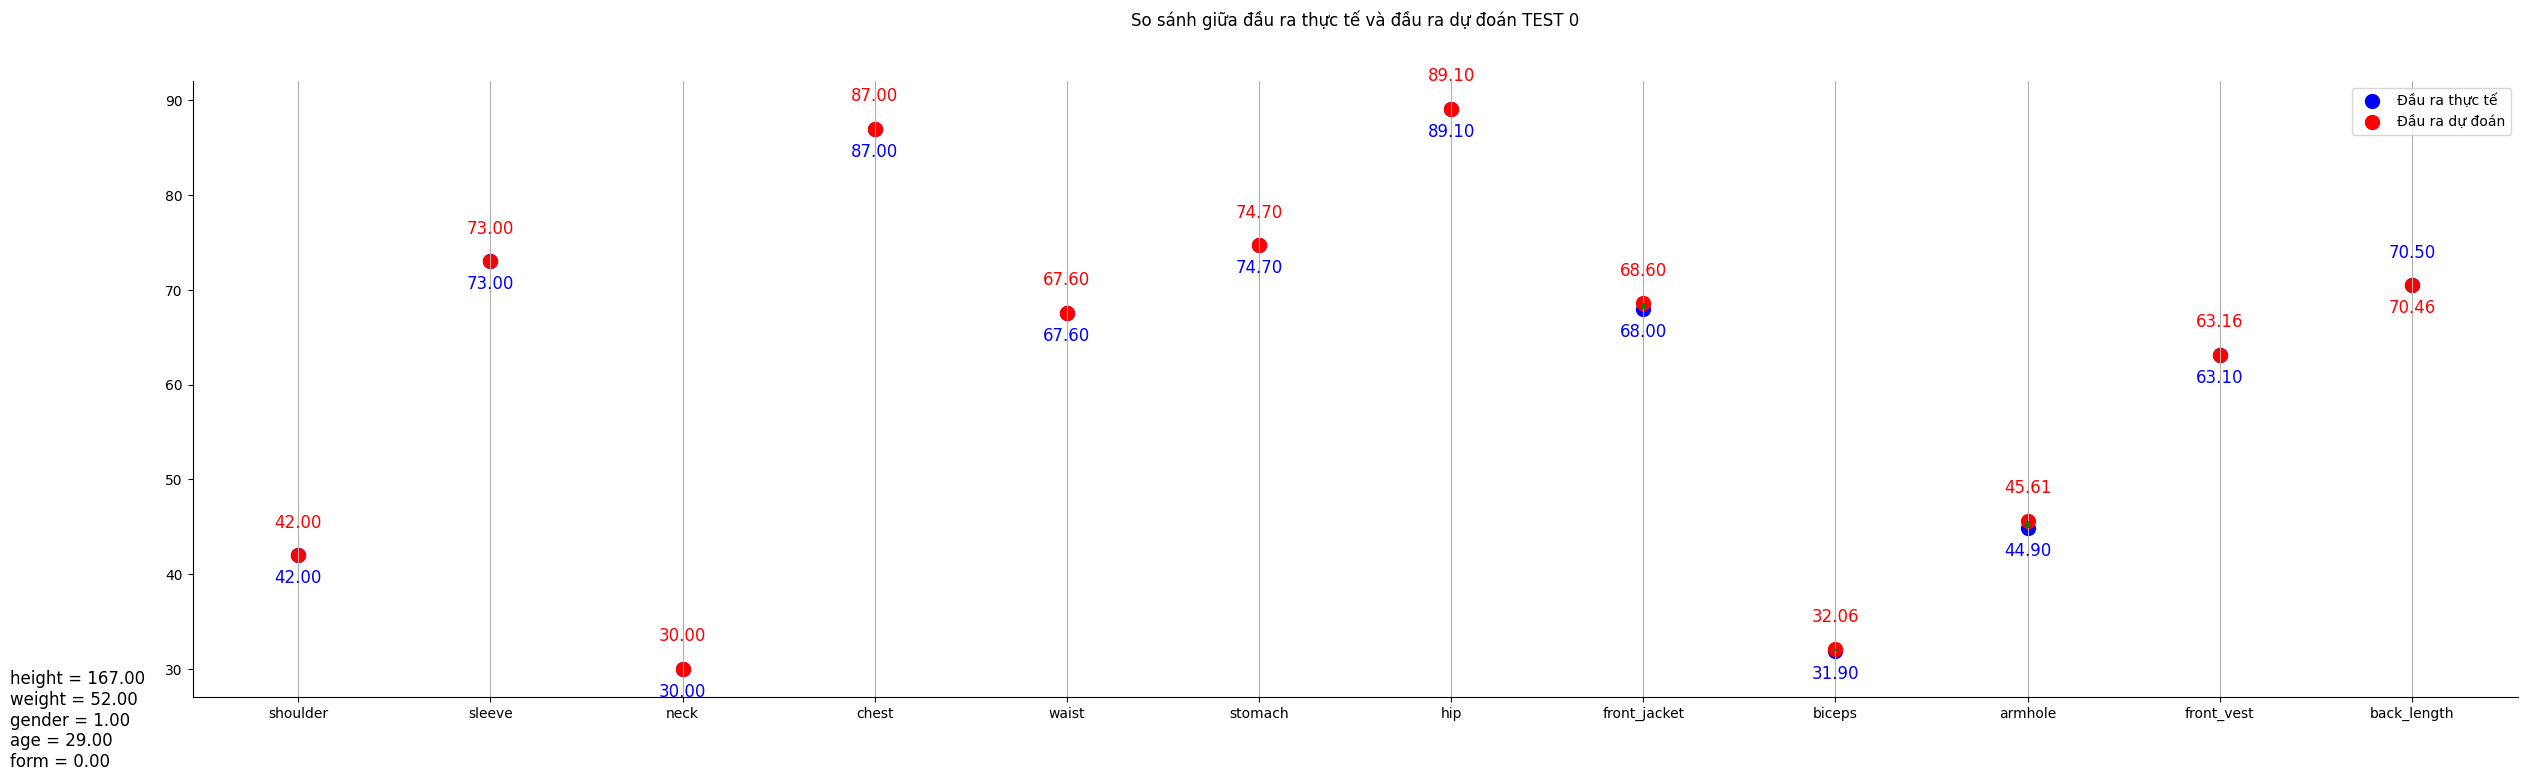

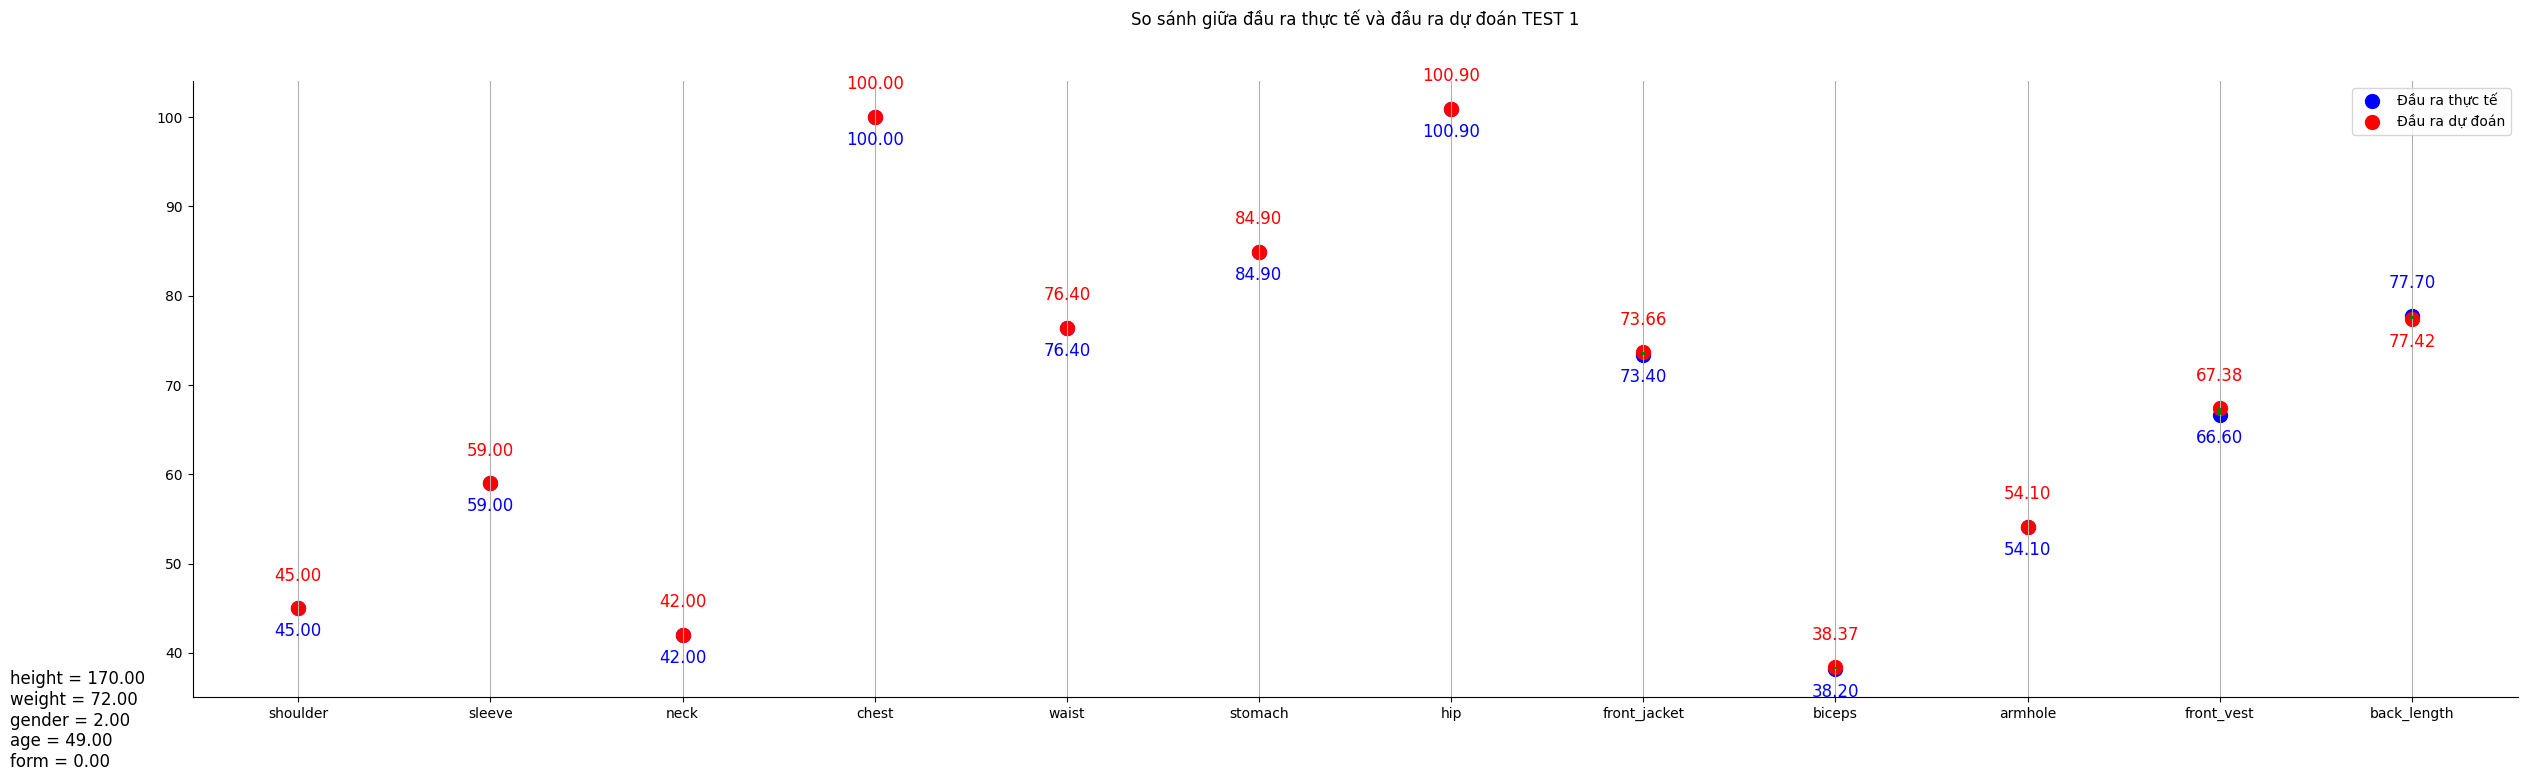

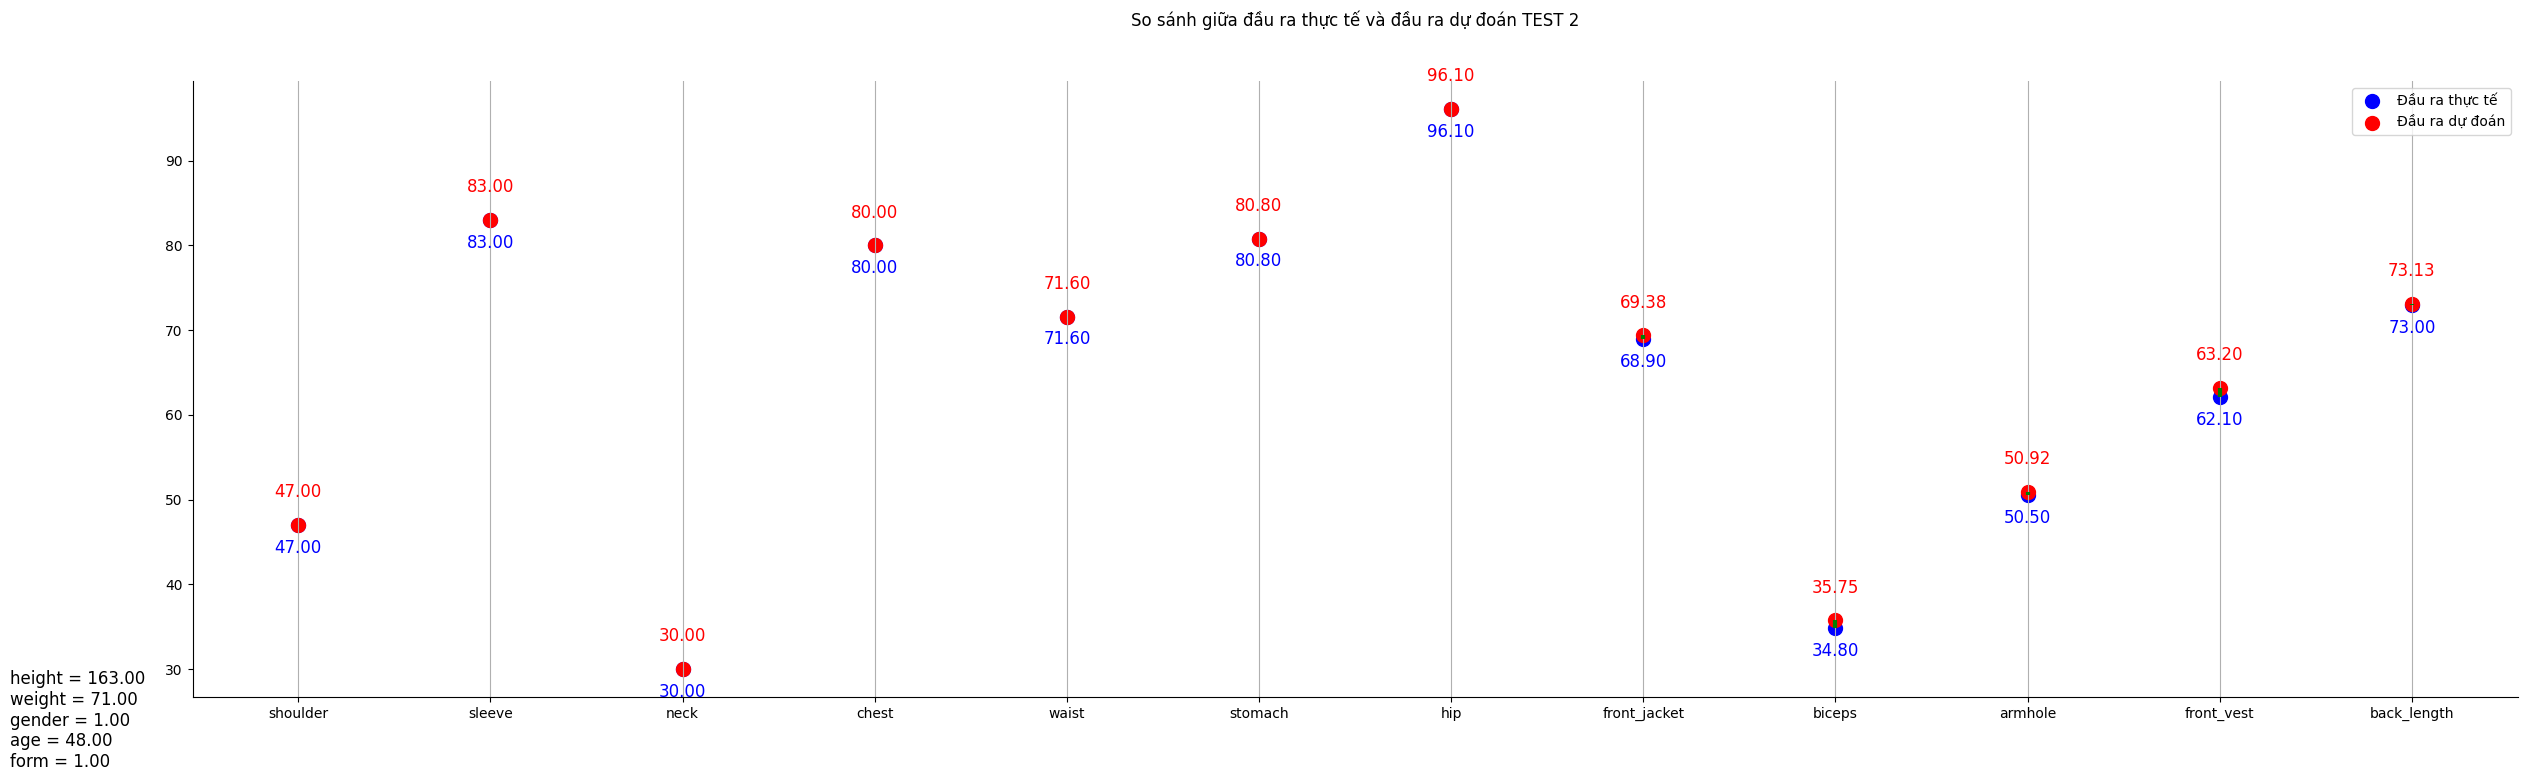

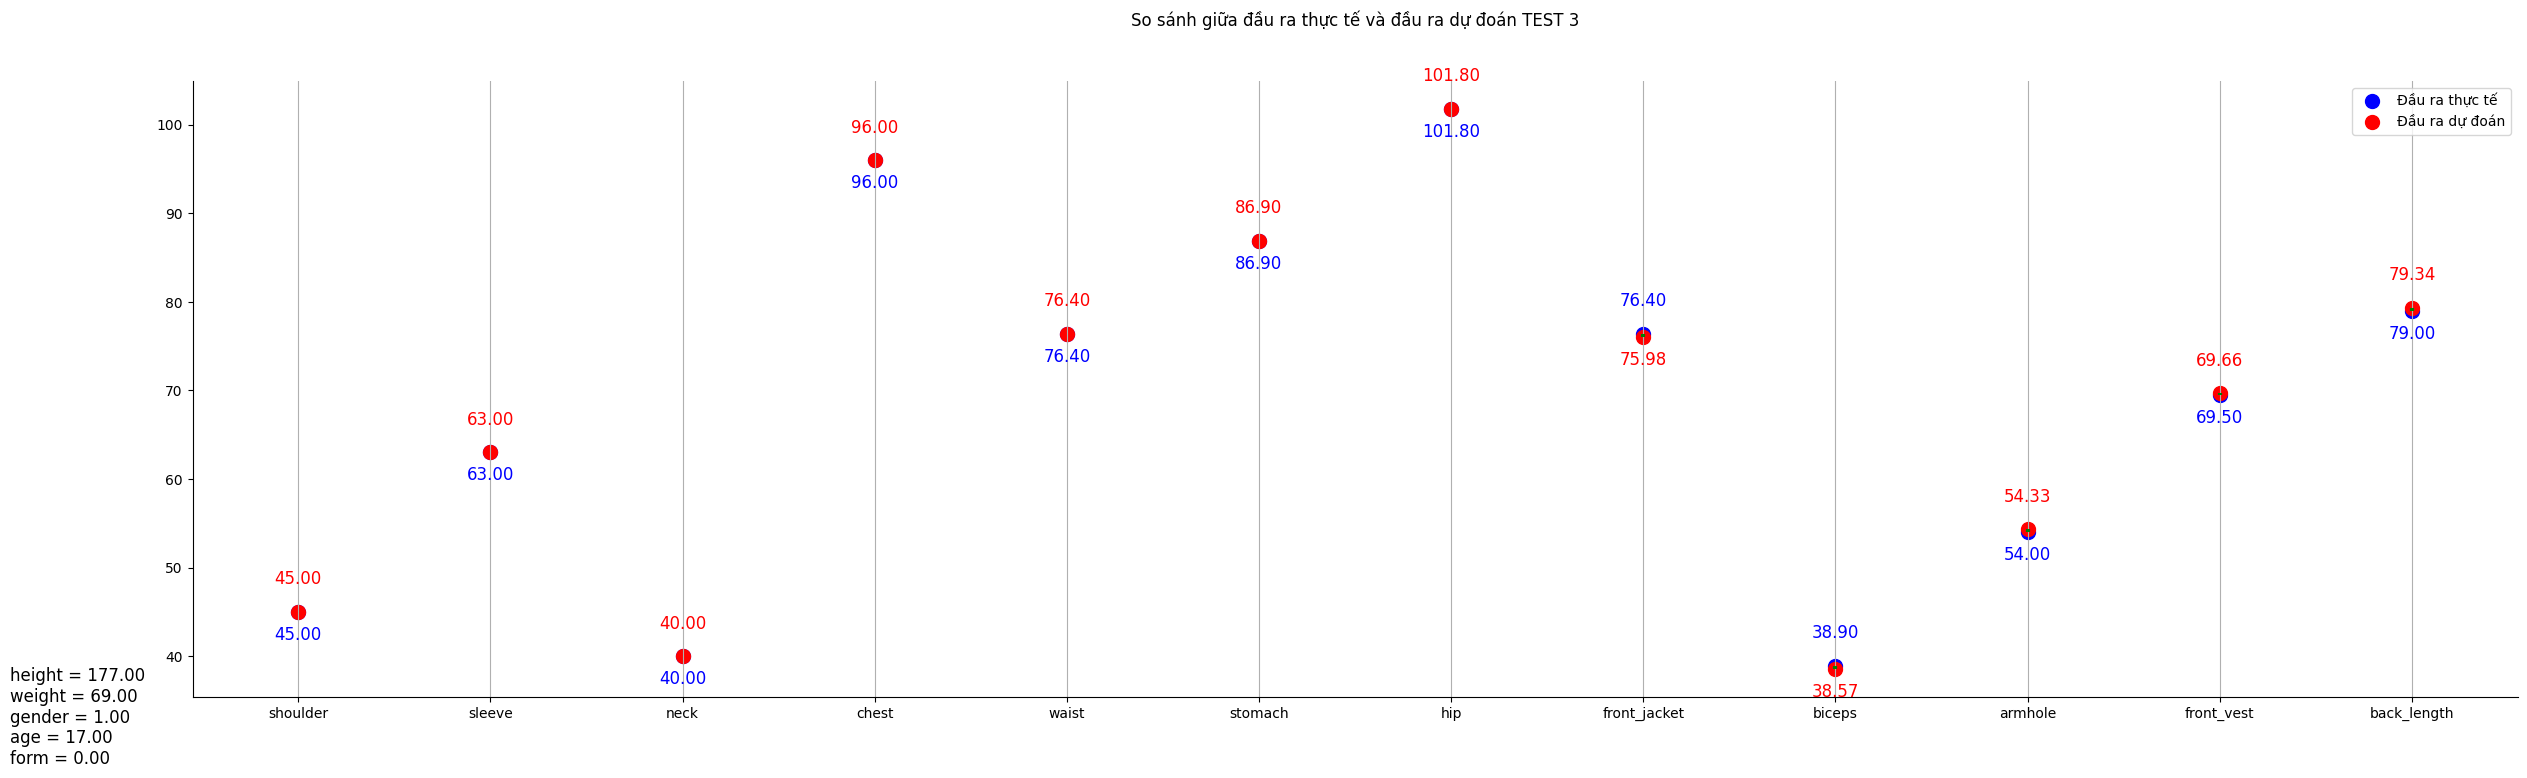

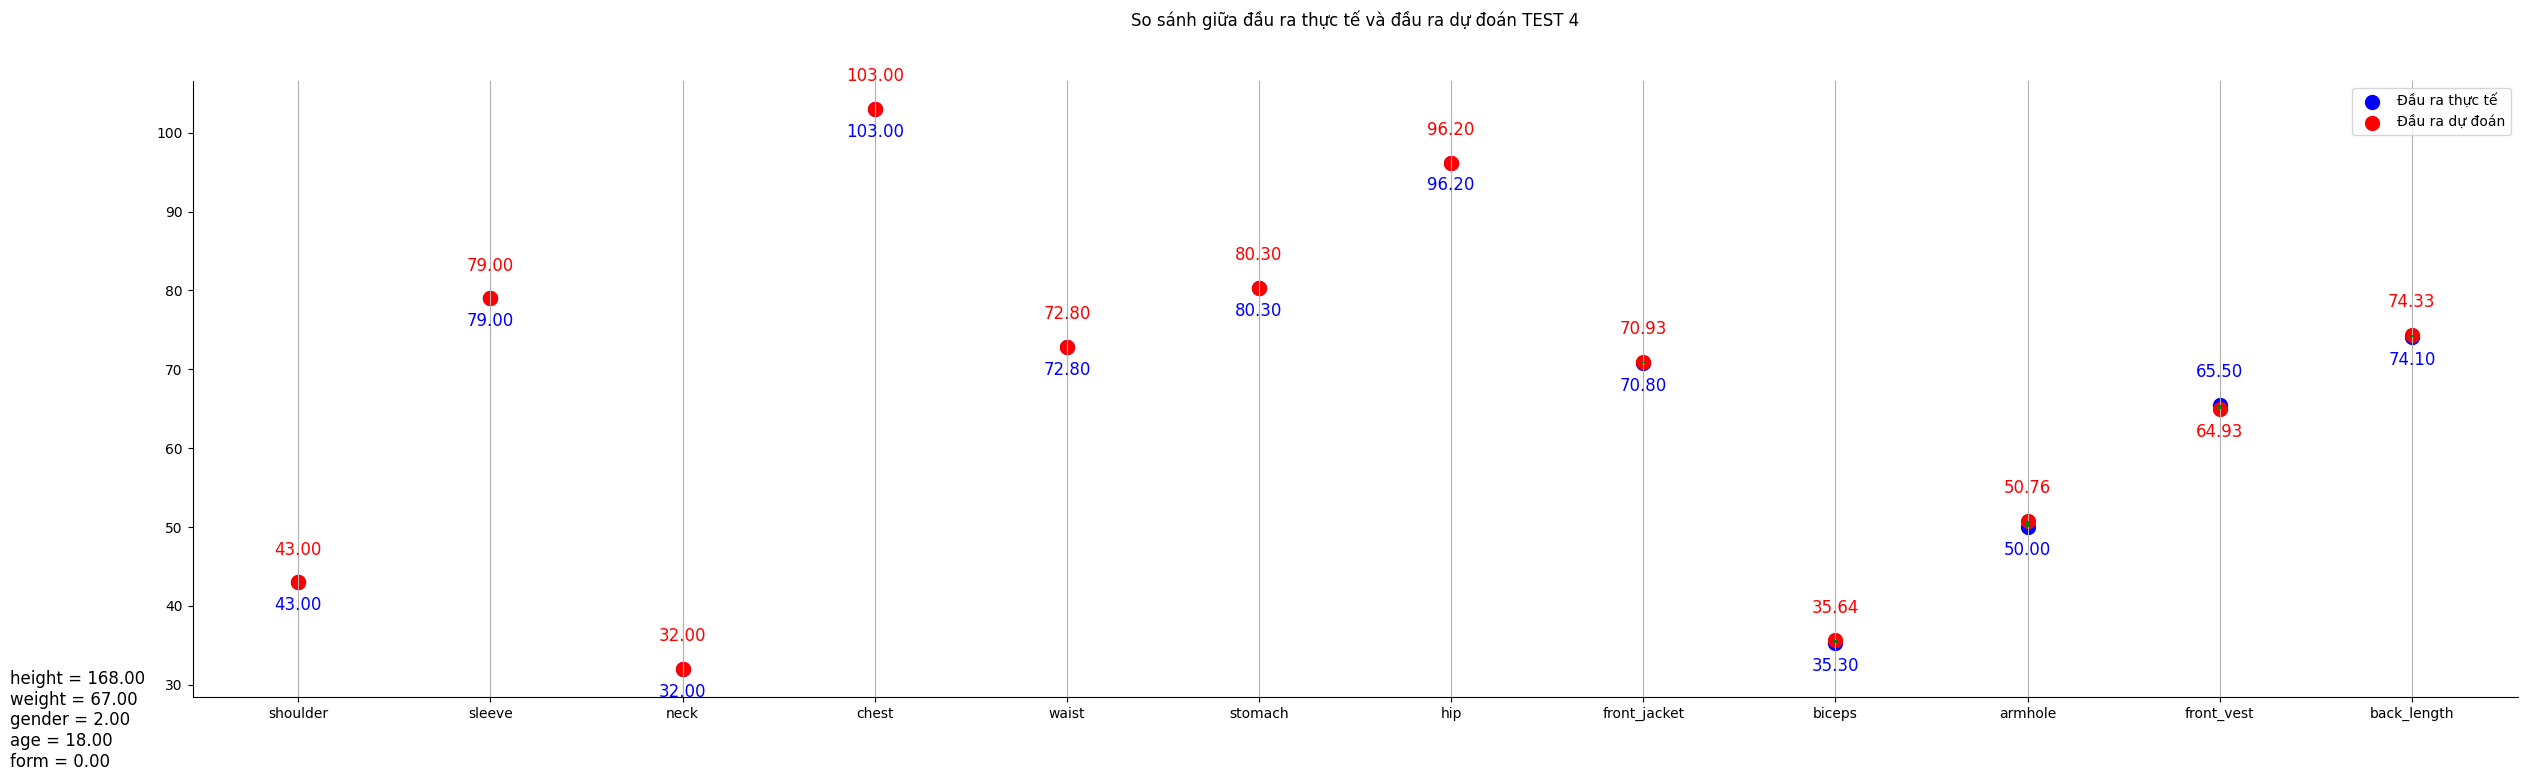

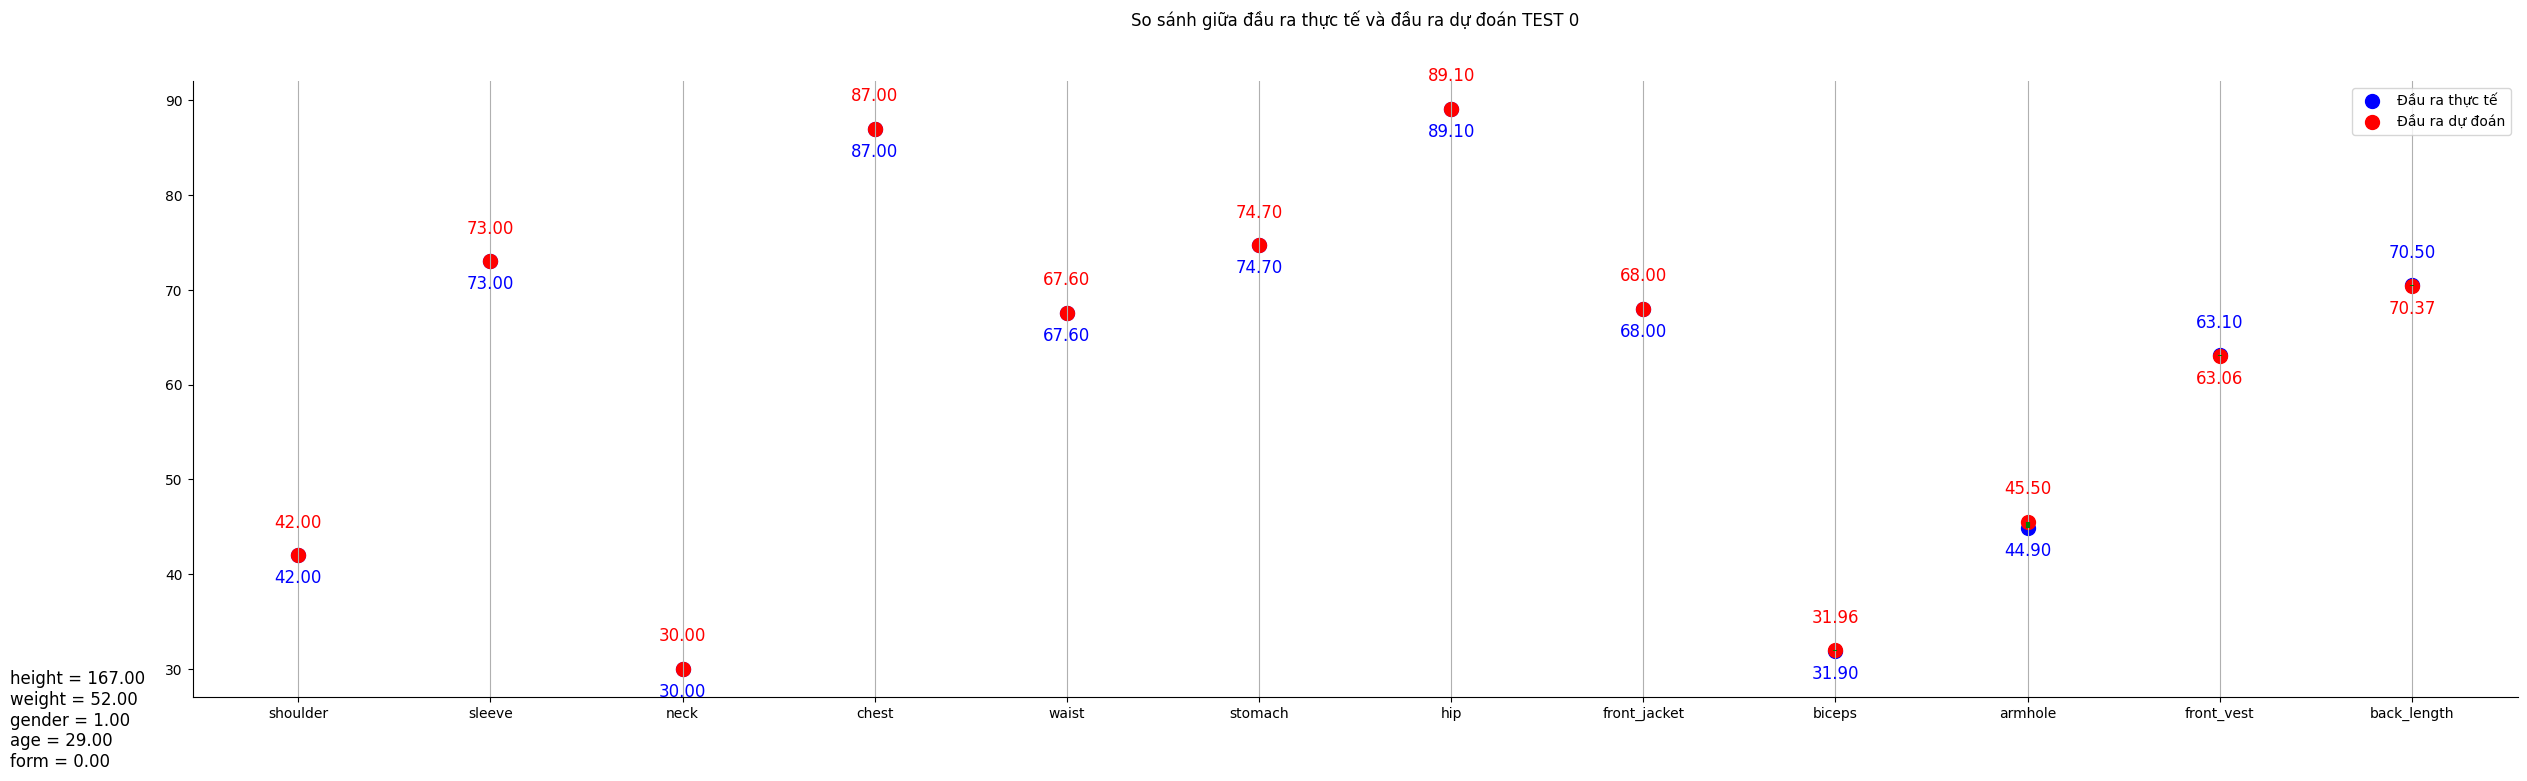

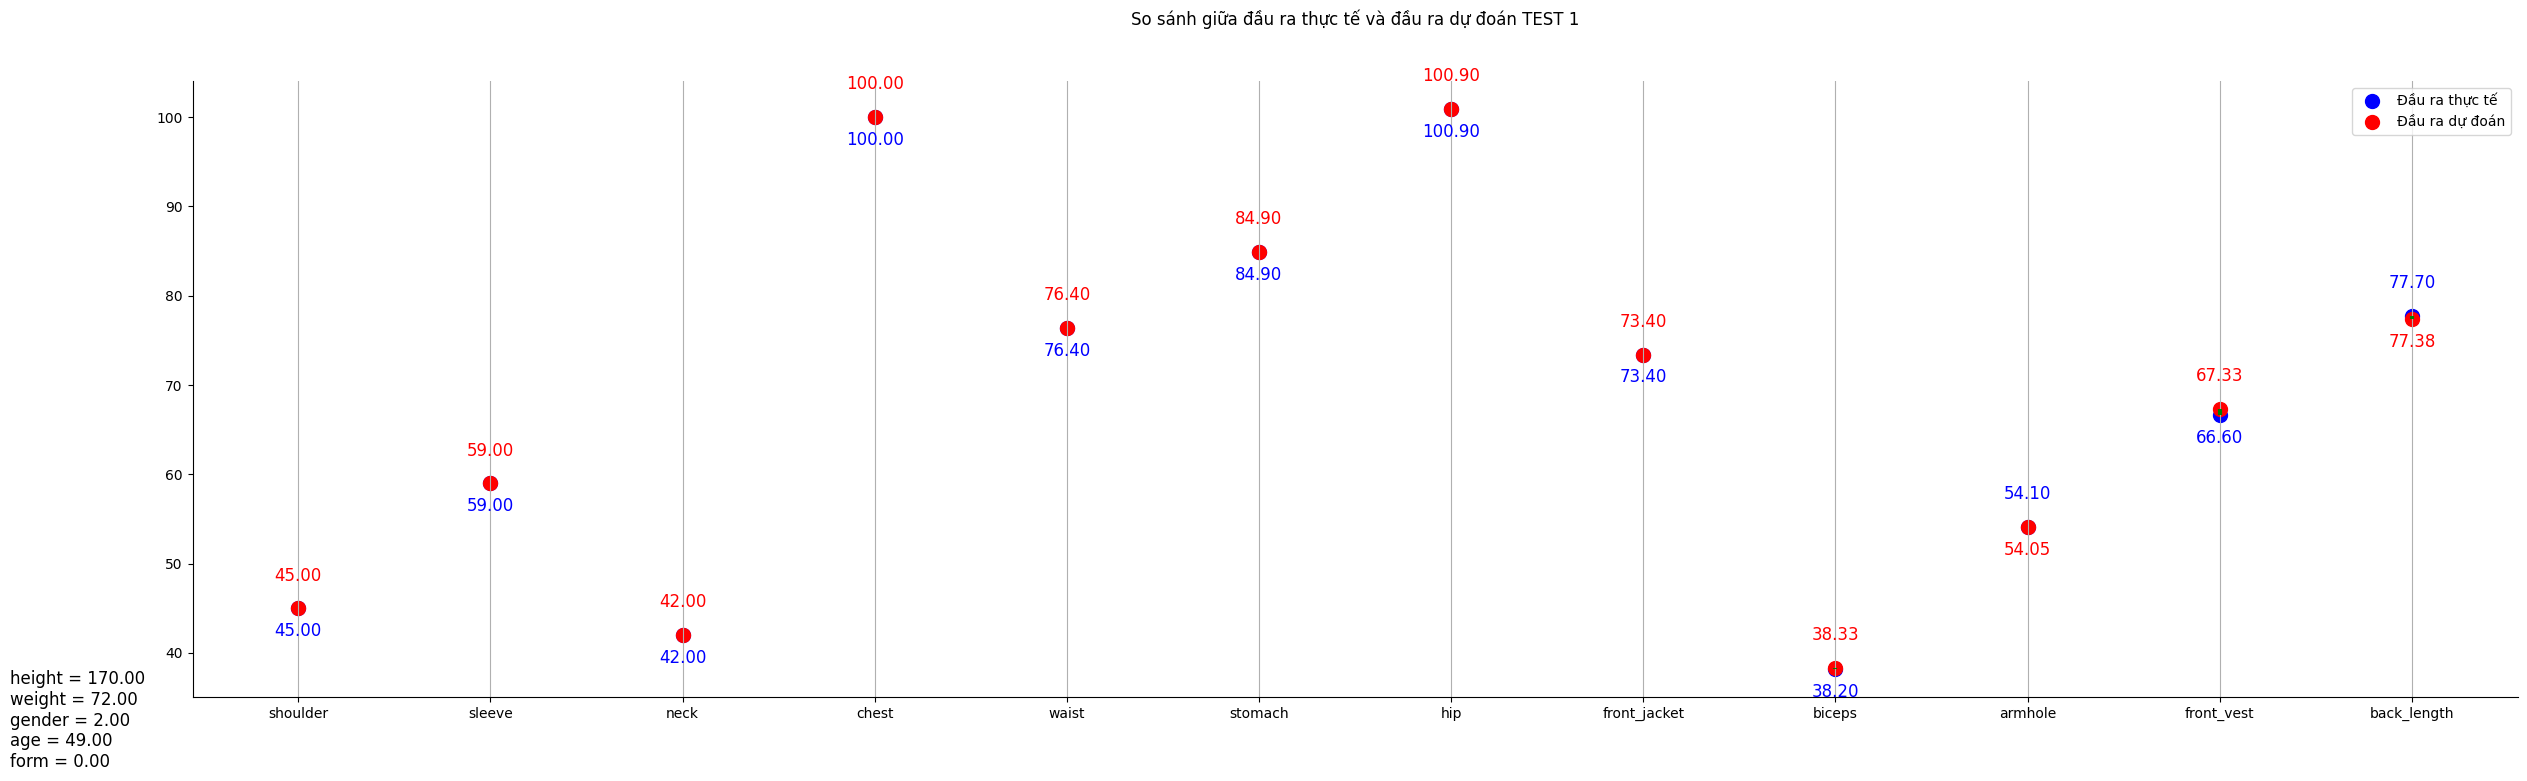

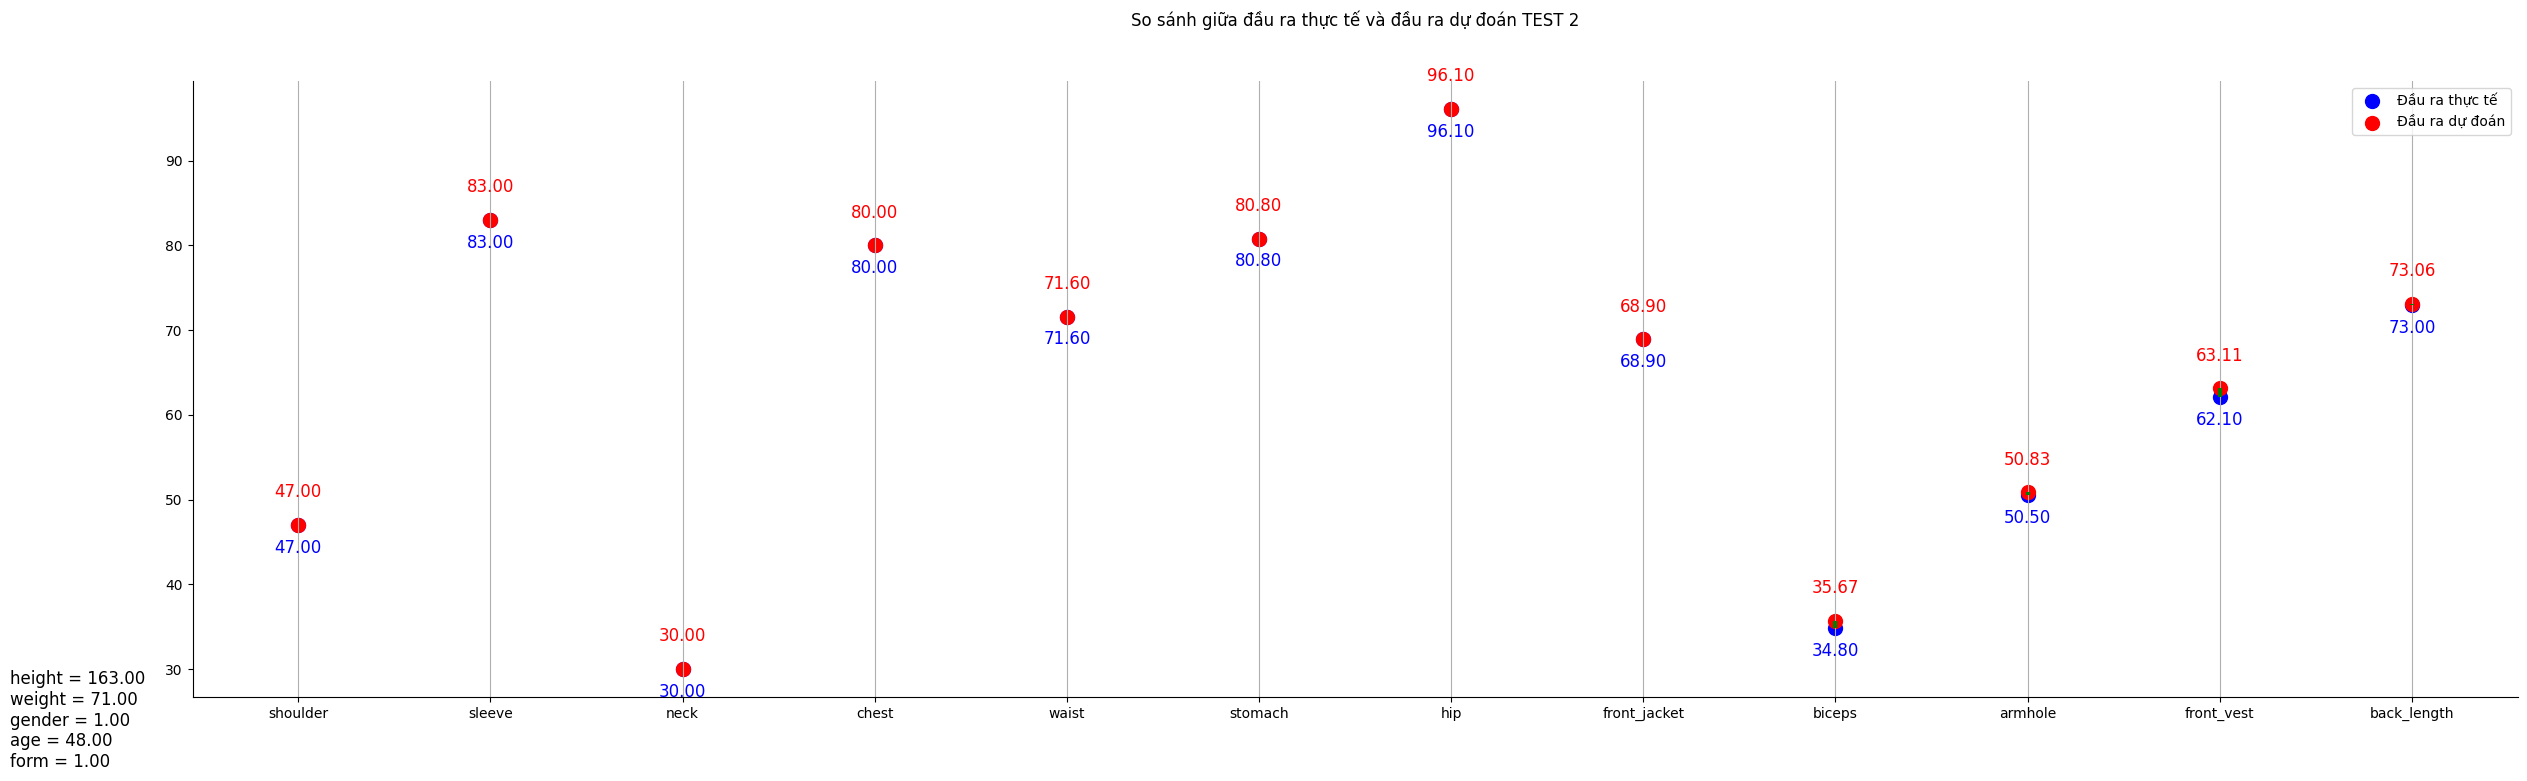

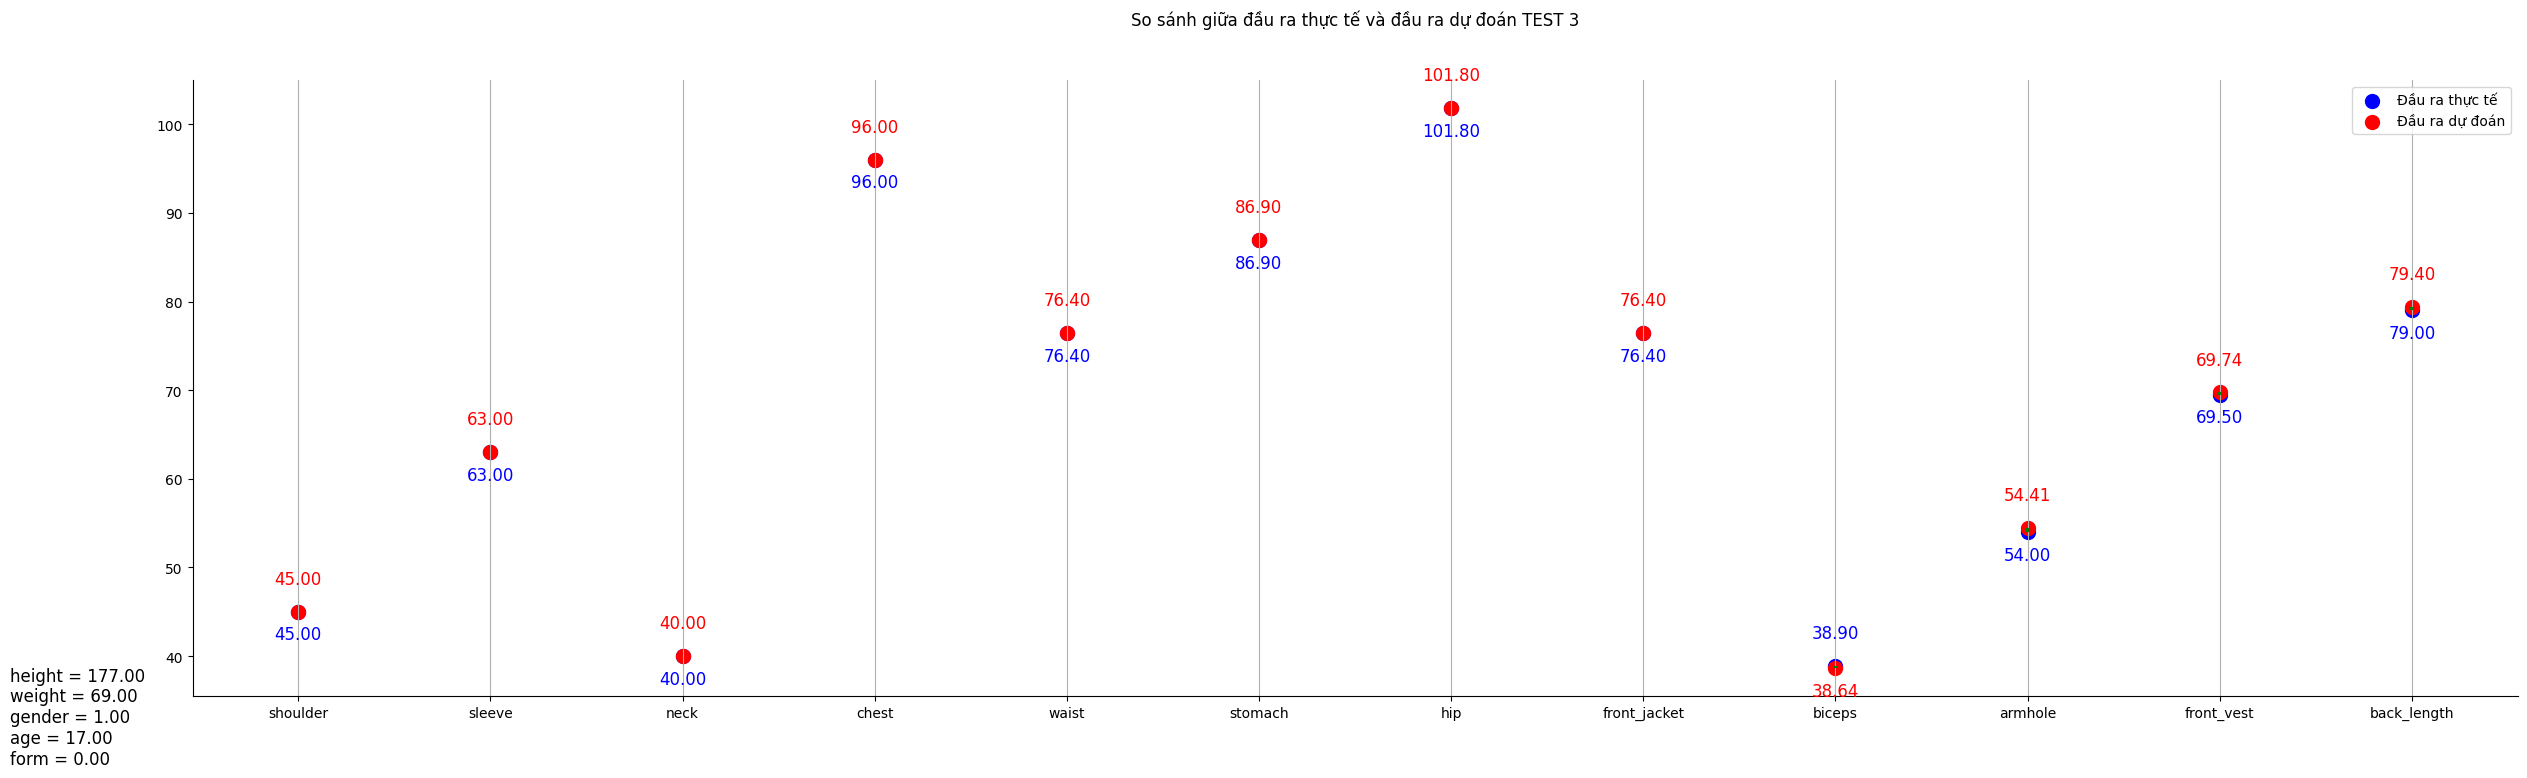

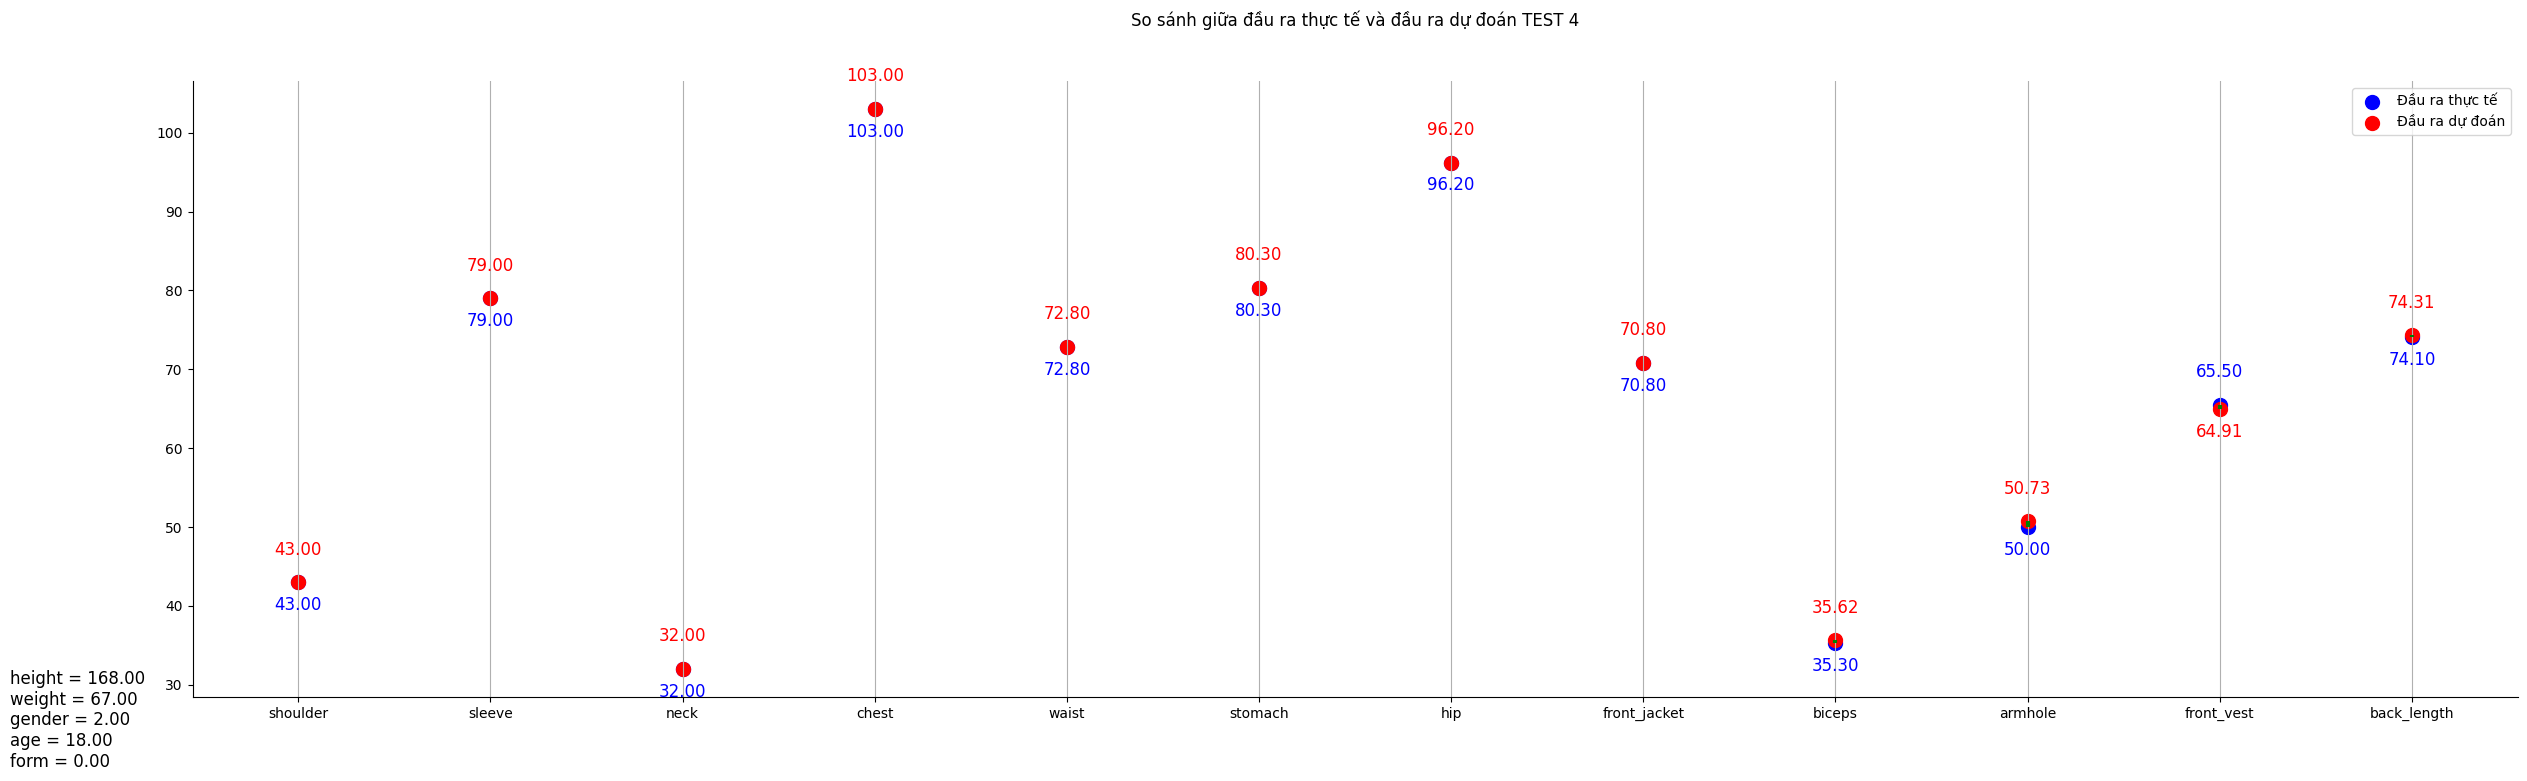

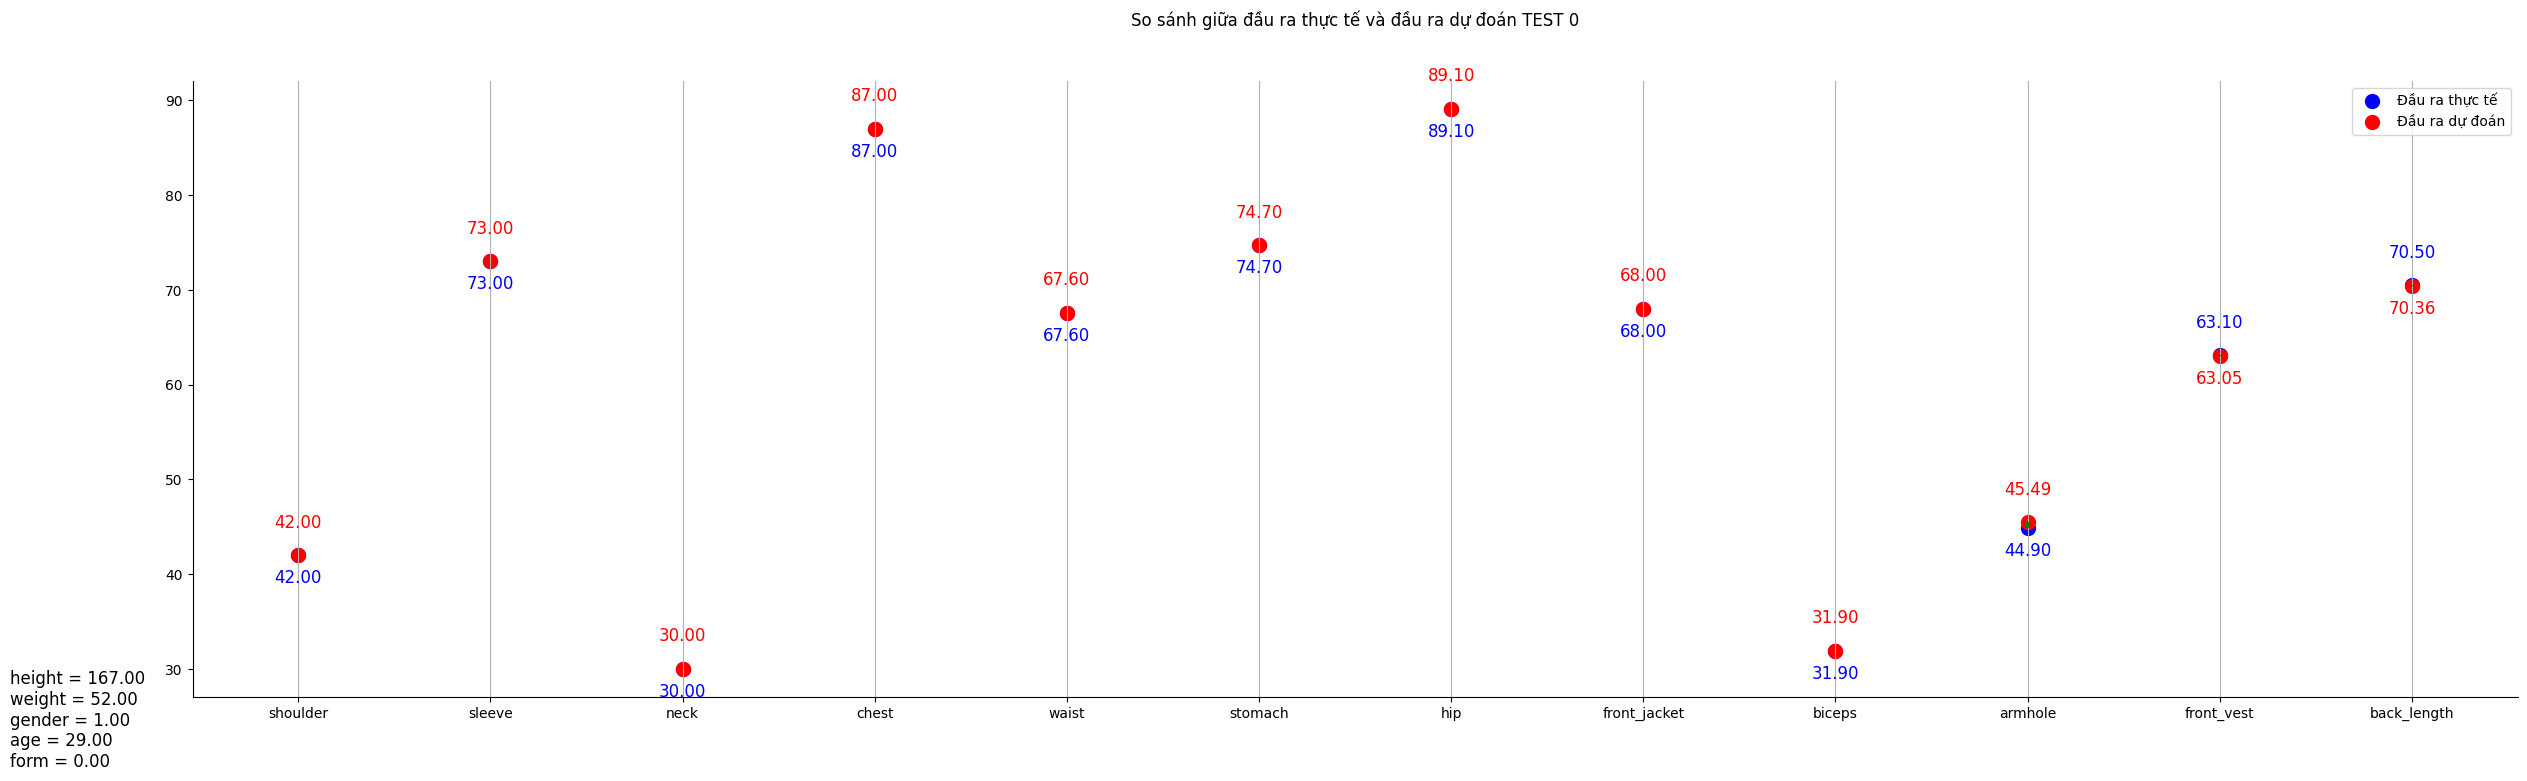

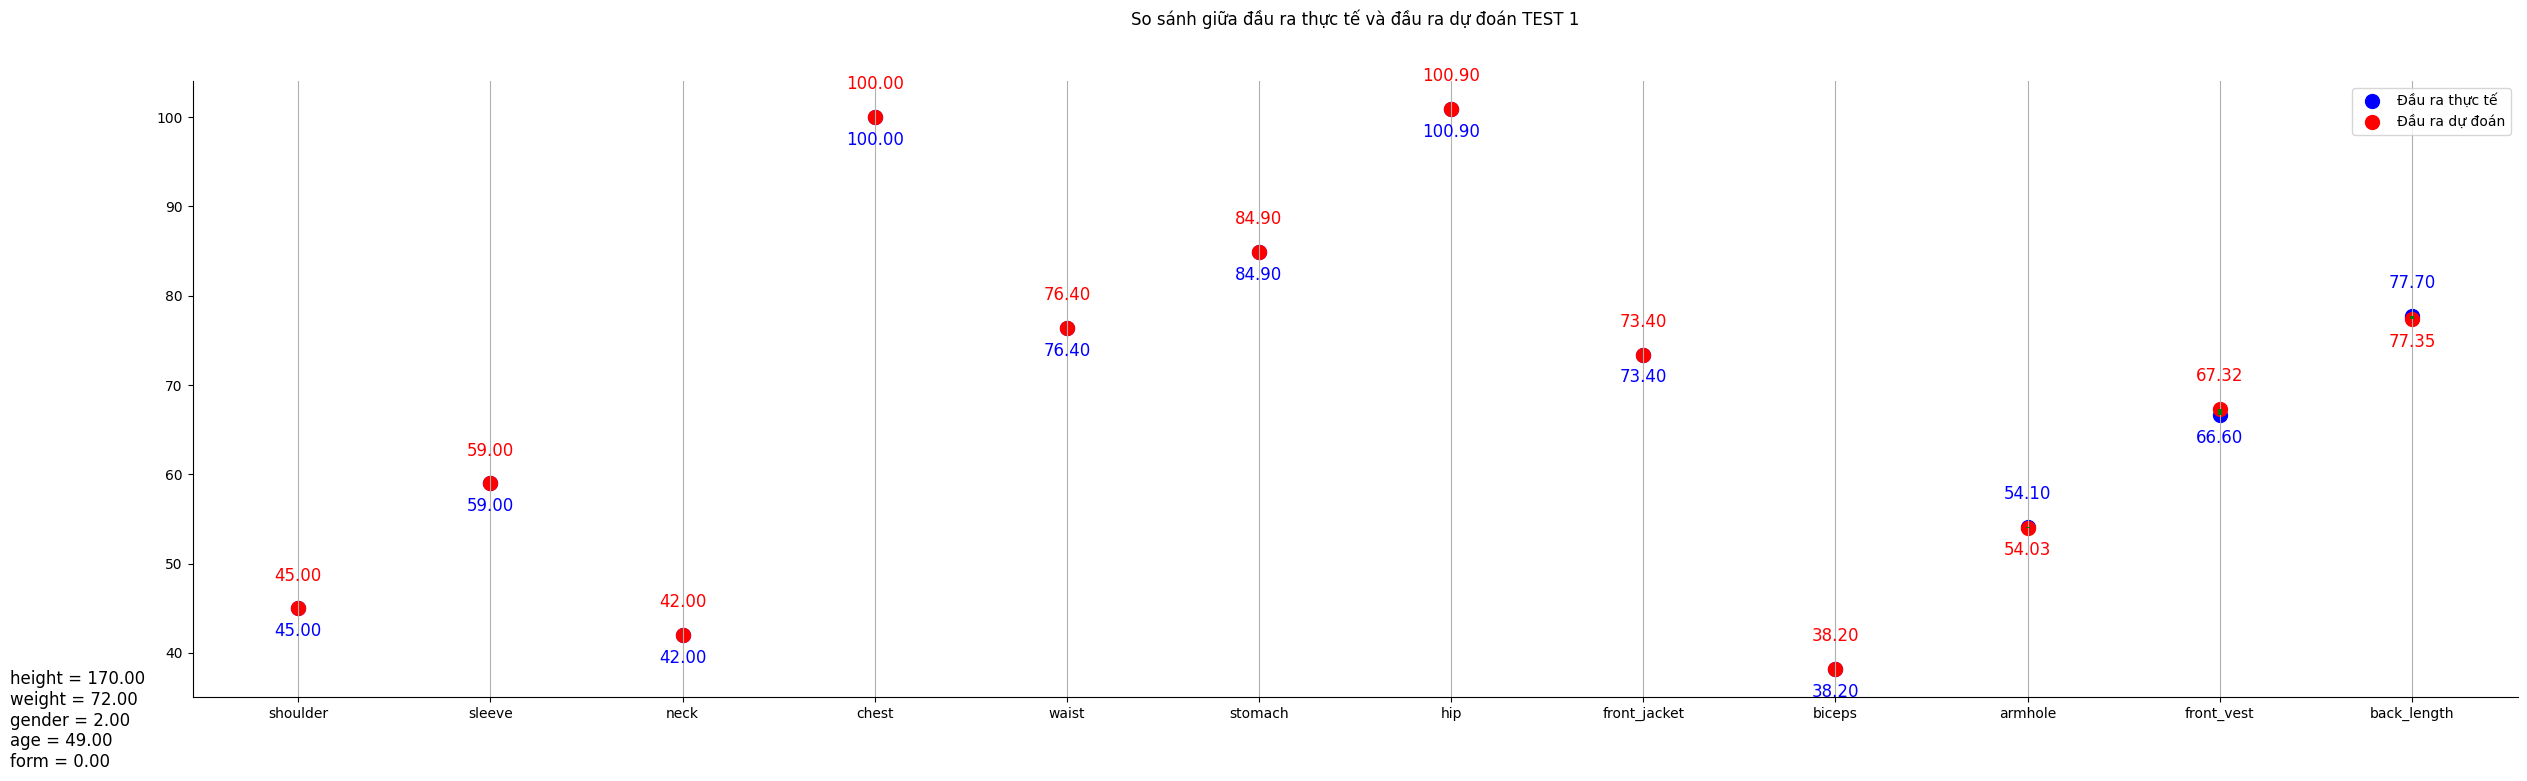

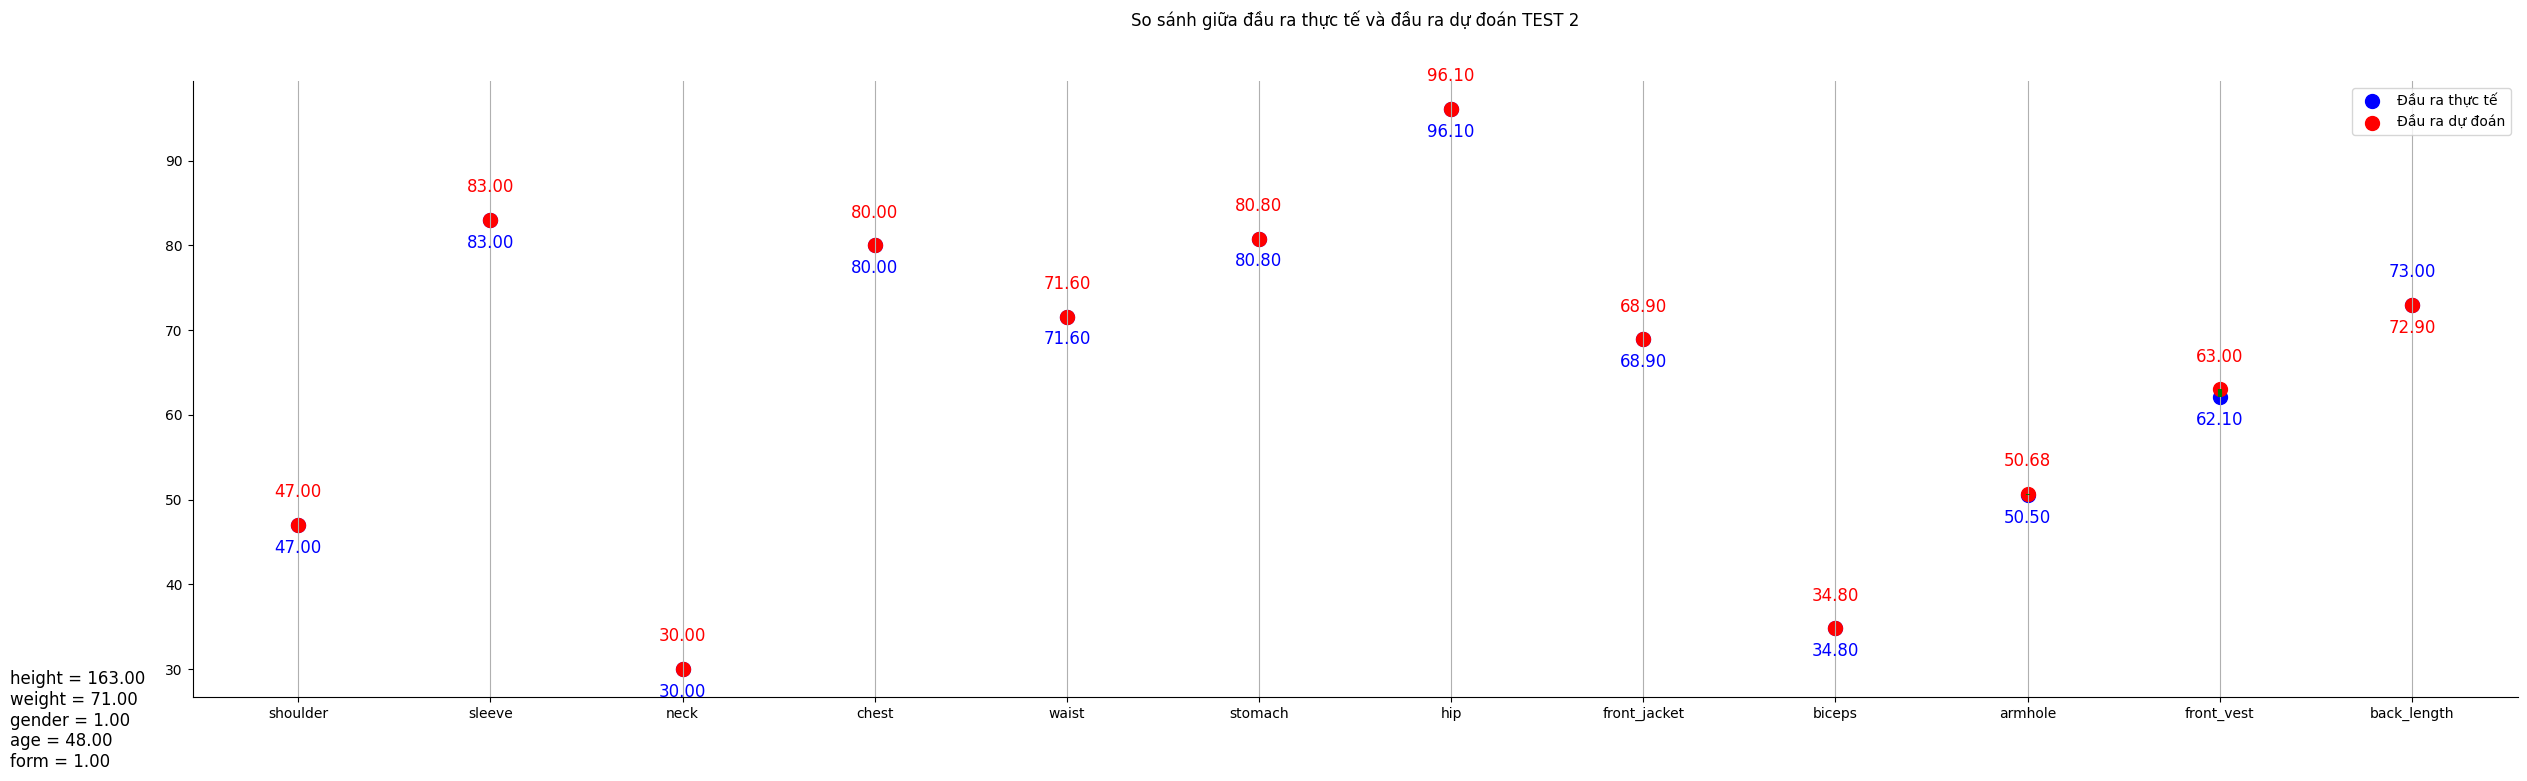

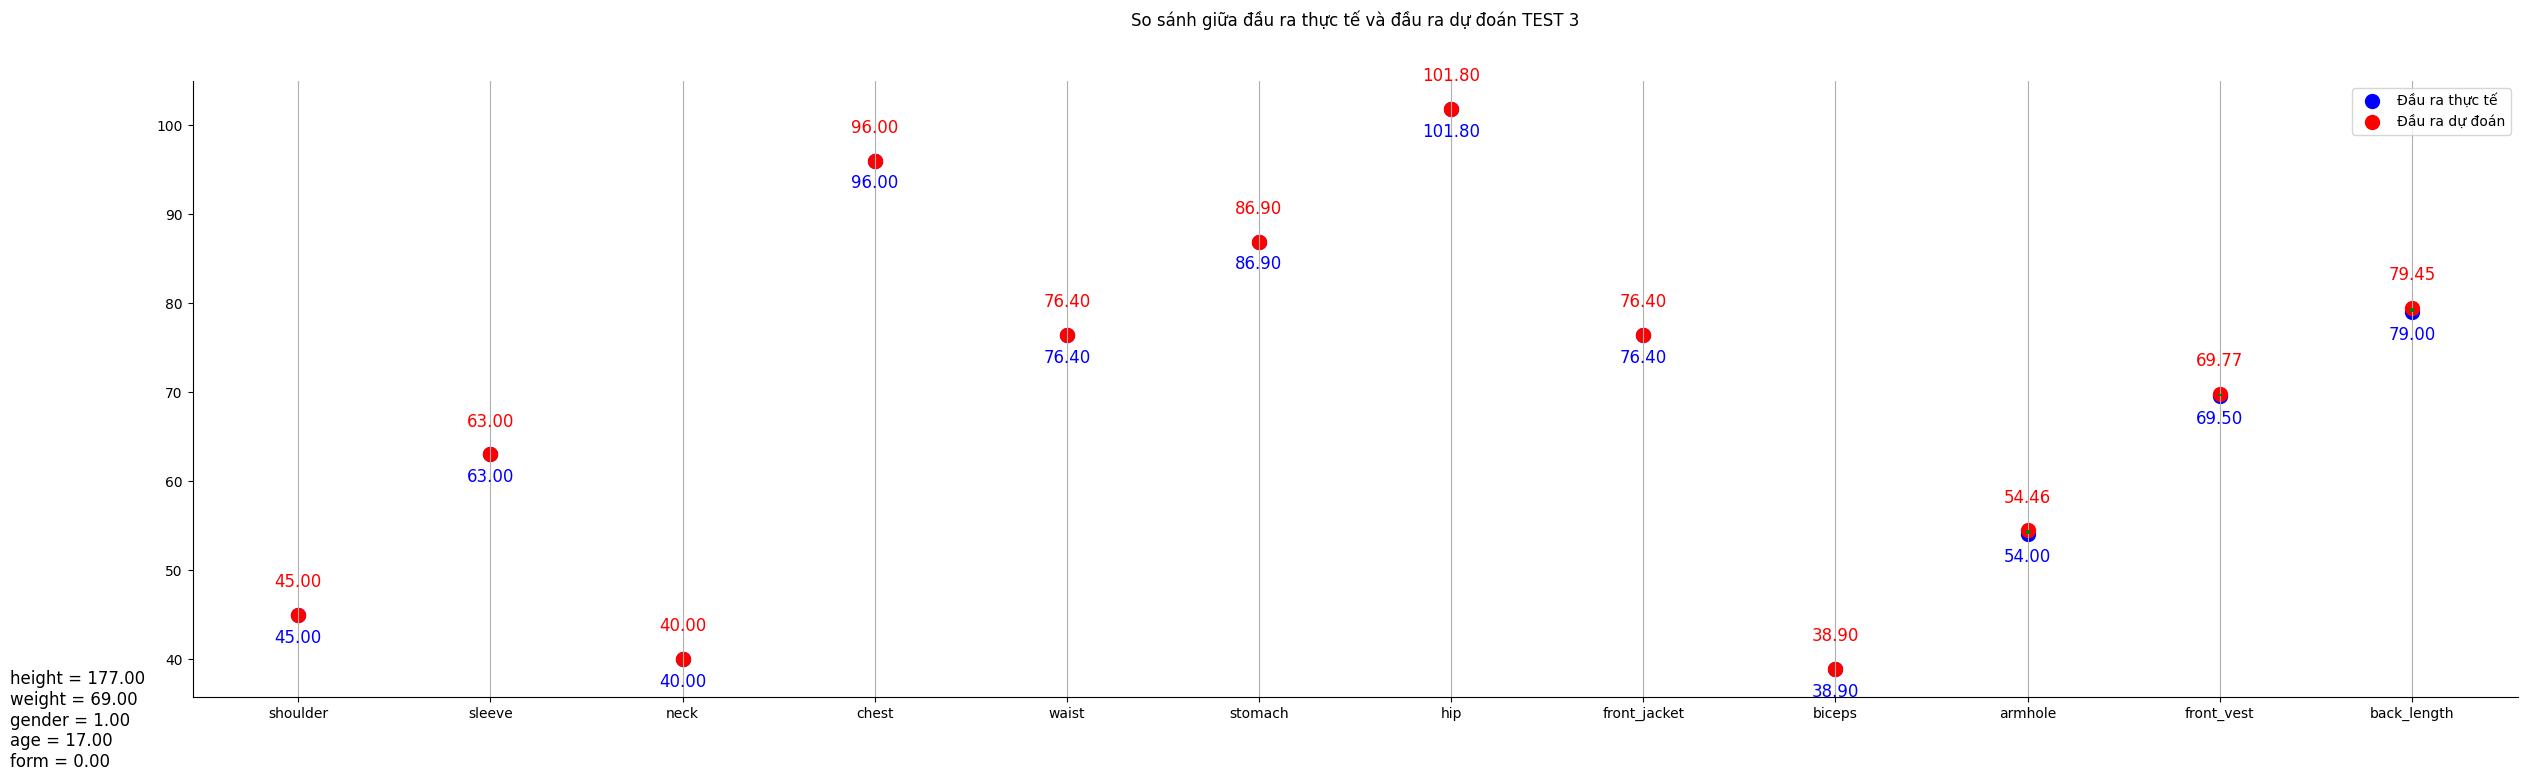

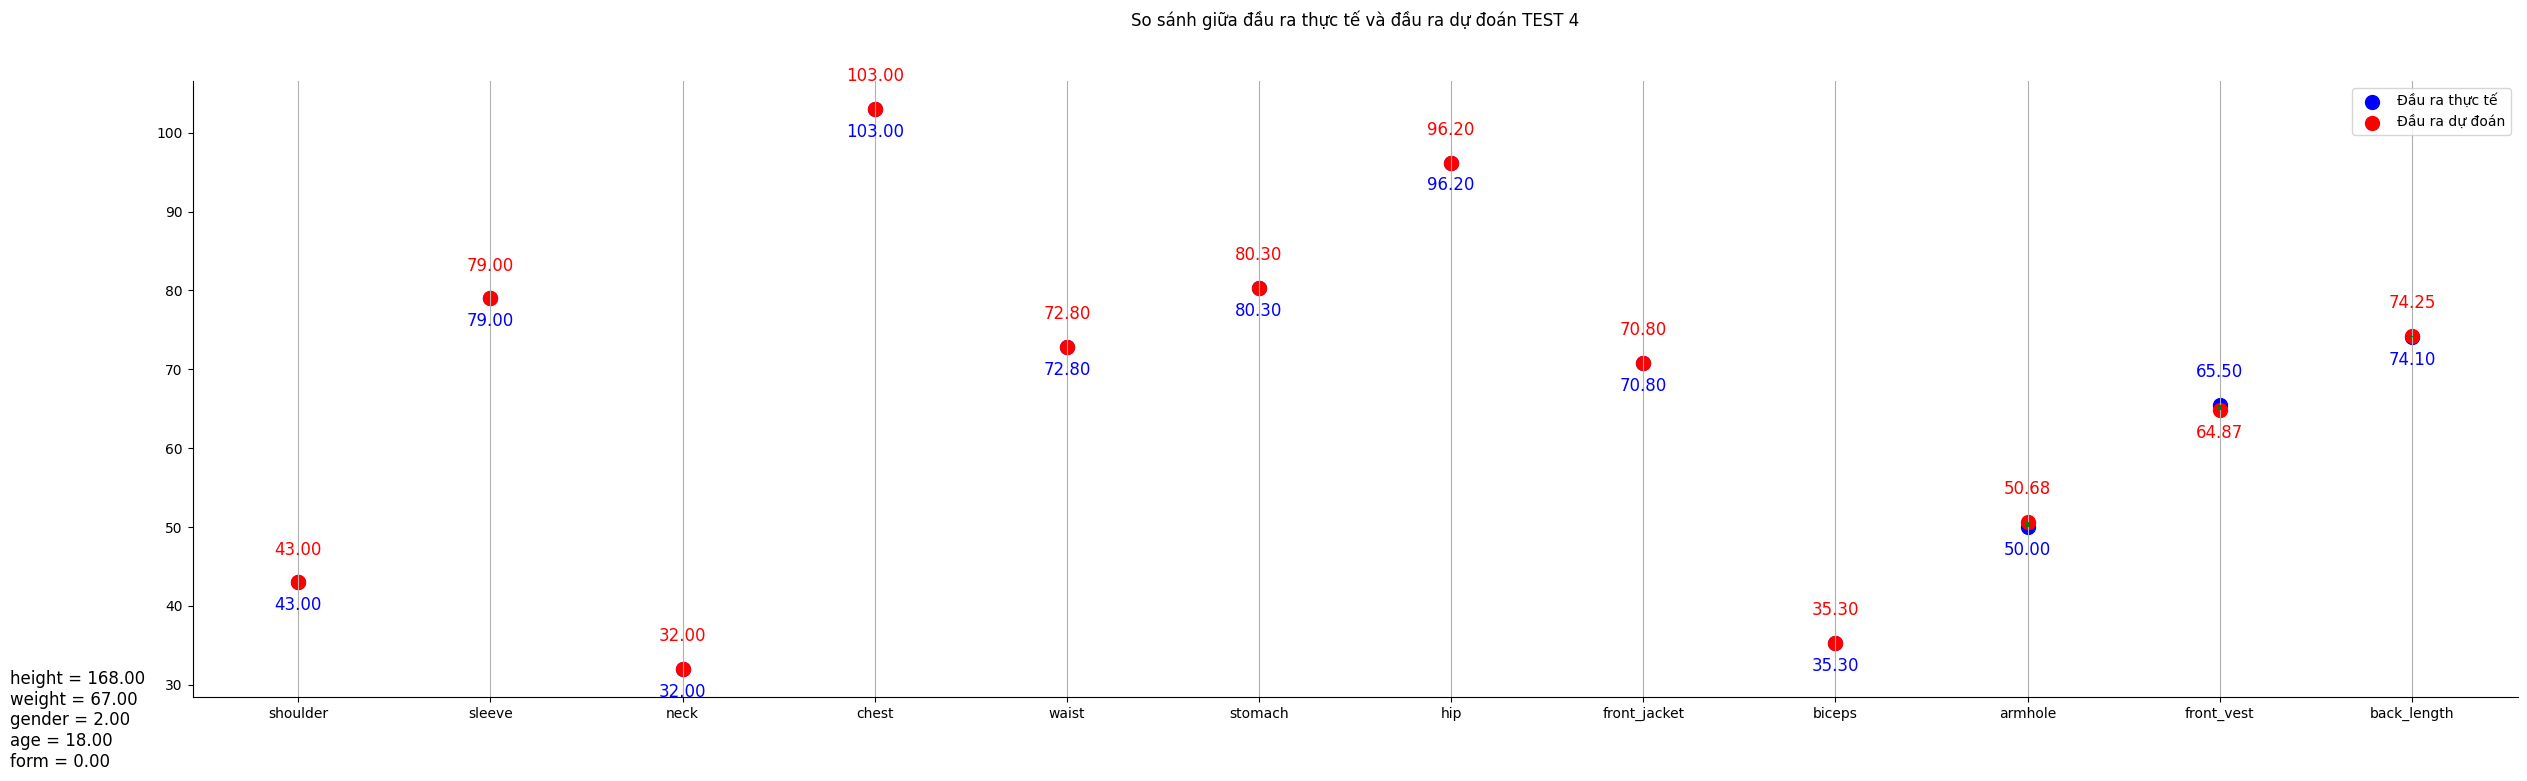

In [13]:
labels = input_columns + output_columns
input_size = len(input_columns)
output_size = len(output_columns)

for pred in pred_list:
    pred = np.array(pred)
    test = np.array(test)
    for i in range(5):
        plt.figure(figsize=(30, 8))

        # Thay đổi viền
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)

        # Vẽ đầu ra thực tế
        plt.scatter(output_columns, test[i][input_size:], marker='o', color='b', label='Đầu ra thực tế', s=100)
        
        # Vẽ đầu ra dự đoán
        plt.scatter(output_columns, pred[i][input_size:], marker='o', color='r', label='Đầu ra dự đoán', s=100)

        # Nối các điểm tương ứng của test và pred trong mỗi cột (cho output)
        for j in range(len(output_columns)):
            plt.plot([output_columns[j], output_columns[j]], 
                    [test[i][j + input_size], pred[i][j + input_size]], 
                    color='green', linestyle='--', linewidth=3)

        # Thêm giá trị vào các điểm trên đồ thị cho đầu ra thực tế
        for j in range(len(output_columns)):
            numerator = pred[i][j + input_size] - test[i][j + input_size]
            if numerator == 0:
                d = 1  # Hoặc giá trị xử lý khác bạn muốn
            else:
                d = numerator / abs(numerator)
            plt.annotate(f'{test[i][j + input_size]:.2f}', (output_columns[j], test[i][j + input_size]), textcoords="offset points", xytext=(0,-20 * d), ha='center', fontsize=12, color='blue')
            plt.annotate(f'{pred[i][j + input_size]:.2f}', (output_columns[j], pred[i][j + input_size]), textcoords="offset points", xytext=(0,20 * d), ha='center', fontsize=12, color='red')

        # Hiển thị giá trị input dưới dạng chuỗi ký tự
        input_text = "\n".join([f"{input_columns[j]} = {test[i][j]:.2f}" for j in range(input_size)])
        plt.text(-1.5, min(test[i][input_size:]) - 0.1, input_text, fontsize=12, color='black', ha='left', va='top')

        # Thêm tiêu đề và nhãn trục
        plt.title(f"So sánh giữa đầu ra thực tế và đầu ra dự đoán TEST {i}", pad=40)

        # Hiển thị legend
        plt.legend()

        # Hiển thị lưới
        plt.grid(True, axis='x')
        plt.savefig(figure_path / f"test_{i}.png")

        # Hiển thị biểu đồ
        plt.show()
